# **Machine Learning II | <span style="color: steelblue;">Segmentation</span>**

## Customer Segmentation: A Key to Unlocking Business Growth and Success

*Group 10*

*Group members* : Francisco Gomes (20221810), Maria Henriques (20221952) and Marta Almendra (20221878).

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors
import seaborn as sns
import plotly.express as px
from pylab import rcParams
rcParams['figure.figsize'] = 30, 15
import umap

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from tqdm.notebook import tqdm, trange
tqdm.pandas(desc="Progress")

import warnings
from utils2 import(
    compare_cluster_solutions,
    calculate_group_means,
    create_dendrogram,
    visualize_inertia_silhouette,
    plot_dimensionality_reduction_results,
    check_for_karens,
    plot_cluster_by_coordinates,
    plot_r2_hc
)
warnings.filterwarnings('ignore', category = FutureWarning)

In [14]:
persons = pd.read_csv('Data/persons.csv', index_col = 0)
persons_all_columns = pd.read_csv('Data/persons_all_columns.csv', index_col = 0)

In [15]:
pd.set_option('display.max_columns', None)
display(persons.head())
display(persons_all_columns.head())

customer_age  number_complaints  distinct_stores_visited  \
customer_id                                                             
1                      48                0.0                      1.0   
2                      56                0.0                      1.0   
3                      66                0.0                      1.0   
4                      40                1.0                      3.0   
5                      32                1.0                      3.0   

             lifetime_spend_groceries  lifetime_spend_electronics  \
customer_id                                                         
1                              2795.0                       169.0   
2                              4123.0                       730.0   
3                             16197.0                      8942.0   
4                              3836.0                       403.0   
5                              5401.0                      3246.0   

             typical_hour  lifetime_spend_vegetables  \
customer_id                                            
1                     9.0                     1091.0   
2                    14.0                     1176.0   
3                    16.0                      416.0   
4                    17.0                      294.0   
5                     8.0                      162.0   

             lifetime_spend_nonalcohol_drinks  lifetime_spend_alcohol_drinks  \
customer_id                                                                    
1                                       134.0                           27.0   
2                                       479.0                           93.0   
3                                       912.0                         1674.0   
4                                       485.0                          162.0   
5                                       516.0                          533.0   

             lifetime_spend_meat  lifetime_spend_fish  lifetime_spend_hygiene  \
customer_id                                                                     
1                            1.0                  1.0                   697.0   
2                            1.0                  2.0                   533.0   
3                         2341.0               4333.0                  2543.0   
4                          247.0                253.0                   102.0   
5                         1393.0               1817.0                  1845.0   

             lifetime_spend_videogames  lifetime_spend_petfood  \
customer_id                                                      
1                                314.0                   486.0   
2                                123.0                   334.0   
3                               3942.0                  3309.0   
4                                605.0                   306.0   
5                               1003.0                  1778.0   

             lifetime_total_distinct_products  \
customer_id                                     
1                                       165.0   
2                                       347.0   
3                                       152.0   
4                                         4.0   
5                                      1318.0   

             percentage_of_products_bought_promotion  customer_tenure  \
customer_id                                                             
1                                           0.320103             13.0   
2                                           0.360180             18.0   
3                                           0.181410             15.0   
4                                           0.025726             15.0   
5                                           0.084791             11.0   

              latitude  longitude  percentage_lifetime_spend_groceries  \
customer_id                                                              
1            38.761431  -9.1

customer_name  customer_gender  customer_age  \
customer_id                                                       
1            Kathleen Carmichael            False            48   
2                    Betty Smith            False            56   
3               Crystal Kitchens            False            66   
4                  Glenda Bauman            False            40   
5               Antonio Campbell             True            32   

             number_complaints  distinct_stores_visited  \
customer_id                                               
1                          0.0                      1.0   
2                          0.0                      NaN   
3                          0.0                      1.0   
4                          1.0                      3.0   
5                          1.0                      3.0   

             lifetime_spend_groceries  lifetime_spend_electronics  \
customer_id                                                         
1                              2795.0                       169.0   
2                              4123.0                       730.0   
3                             16197.0                      8942.0   
4                              3836.0                       403.0   
5                              5401.0                      3246.0   

             typical_hour  lifetime_spend_vegetables  \
customer_id                                            
1                     9.0                     1091.0   
2                    14.0                     1176.0   
3                    16.0                      416.0   
4                    17.0                      294.0   
5                     8.0                      162.0   

             lifetime_spend_nonalcohol_drinks  lifetime_spend_alcohol_drinks  \
customer_id                                                                    
1                                       134.0                           27.0   
2                                       479.0                           93.0   
3                                       912.0                         1674.0   
4                                       485.0                          162.0   
5                                       516.0                          533.0   

             lifetime_spend_meat  lifetime_spend_fish  lifetime_spend_hygiene  \
customer_id                                                                     
1                            1.0                  1.0                   697.0   
2                            1.0                  2.0                   533.0   
3                         2341.0               4333.0                  2543.0   
4                          247.0                253.0                   102.0   
5                         1393.0               1817.0                  1845.0   

             lifetime_spend_videogames  lifetime_spend_petfood  \
customer_id                                                      
1                                314.0                   486.0   
2                                123.0                   334.0   
3                               3942.0                  3309.0   
4                                605.0                   306.0   
5                               1003.0                  1778.0   

             lifetime_total_distinct_products  \
customer_id                                     
1                                       165.0   
2                                       347.0   
3                                       152.0   
4                                         4.0   
5                                      1318.0   

             percentage_of_products_bought_promotion  customer_tenure  \
customer_id                                                             
1                                           0.320103             13.0   
2                                           0.360180             18.0   
3                             

In [16]:
persons.drop(columns=['outlier', 'cluster'], axis=1, inplace=True)

In [17]:
pd.set_option('display.max_columns', None)
display(persons.head())

customer_age  number_complaints  distinct_stores_visited  \
customer_id                                                             
1                      48                0.0                      1.0   
2                      56                0.0                      1.0   
3                      66                0.0                      1.0   
4                      40                1.0                      3.0   
5                      32                1.0                      3.0   

             lifetime_spend_groceries  lifetime_spend_electronics  \
customer_id                                                         
1                              2795.0                       169.0   
2                              4123.0                       730.0   
3                             16197.0                      8942.0   
4                              3836.0                       403.0   
5                              5401.0                      3246.0   

             typical_hour  lifetime_spend_vegetables  \
customer_id                                            
1                     9.0                     1091.0   
2                    14.0                     1176.0   
3                    16.0                      416.0   
4                    17.0                      294.0   
5                     8.0                      162.0   

             lifetime_spend_nonalcohol_drinks  lifetime_spend_alcohol_drinks  \
customer_id                                                                    
1                                       134.0                           27.0   
2                                       479.0                           93.0   
3                                       912.0                         1674.0   
4                                       485.0                          162.0   
5                                       516.0                          533.0   

             lifetime_spend_meat  lifetime_spend_fish  lifetime_spend_hygiene  \
customer_id                                                                     
1                            1.0                  1.0                   697.0   
2                            1.0                  2.0                   533.0   
3                         2341.0               4333.0                  2543.0   
4                          247.0                253.0                   102.0   
5                         1393.0               1817.0                  1845.0   

             lifetime_spend_videogames  lifetime_spend_petfood  \
customer_id                                                      
1                                314.0                   486.0   
2                                123.0                   334.0   
3                               3942.0                  3309.0   
4                                605.0                   306.0   
5                               1003.0                  1778.0   

             lifetime_total_distinct_products  \
customer_id                                     
1                                       165.0   
2                                       347.0   
3                                       152.0   
4                                         4.0   
5                                      1318.0   

             percentage_of_products_bought_promotion  customer_tenure  \
customer_id                                                             
1                                           0.320103             13.0   
2                                           0.360180             18.0   
3                                           0.181410             15.0   
4                                           0.025726             15.0   
5                                           0.084791             11.0   

              latitude  longitude  percentage_lifetime_spend_groceries  \
customer_id                                                              
1            38.761431  -9.1

# **Scaling**

In [18]:
persons_no_scl = persons.copy()
persons_st_scl = StandardScaler().fit_transform(persons)
persons_mm_scl = MinMaxScaler().fit_transform(persons)
persons_rb_scl = RobustScaler().fit_transform(persons)

# **Clustering**

In the notebook, the cluster analysis is grouped by data inputs: no scaling,standard scaler, minmax scaler, and robust scaler. In each group, the following methods of clustering were used and are presented in this order:

1. KMeans
2. Ward (Hierarchical)

Given that the Ward method consistently outperforms the other methods in terms of the R2 metric across all cluster numbers, it is justifiable to focus on analyzing the Ward method for hierarchical clustering in this context. The Ward method provides a superior explanation of the variance within the data, making it the most reliable choice for this analysis.

## **No scaling**

In [35]:
plot_r2_hc(persons_no_scl, max_nclus=12)

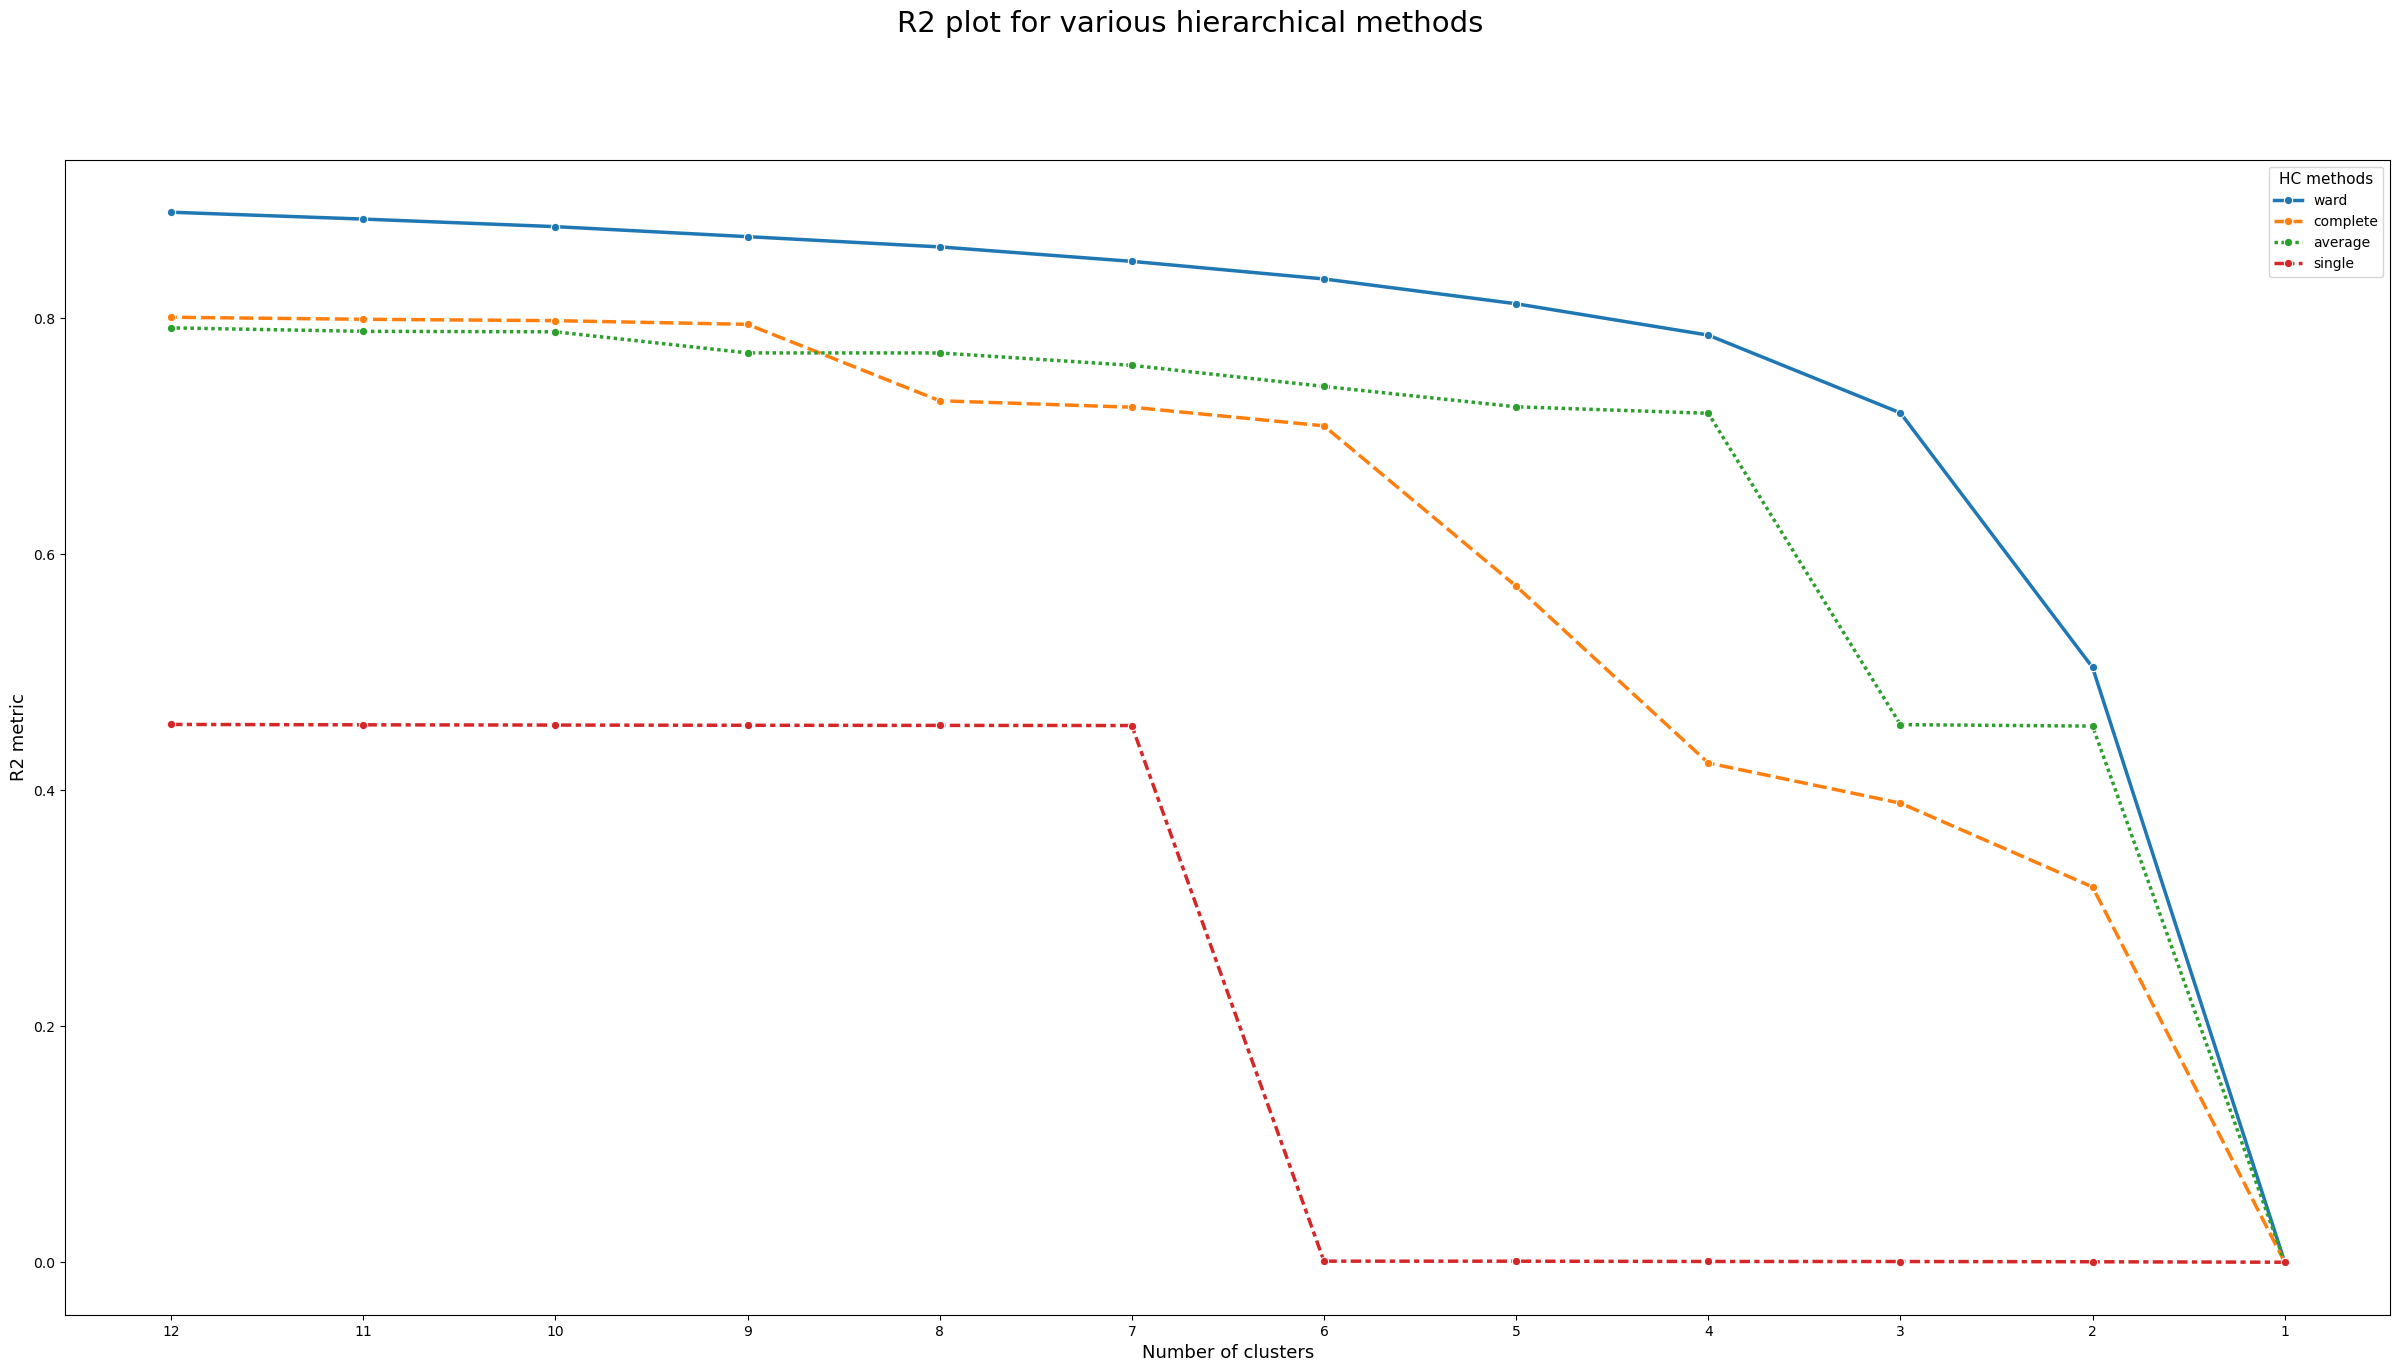

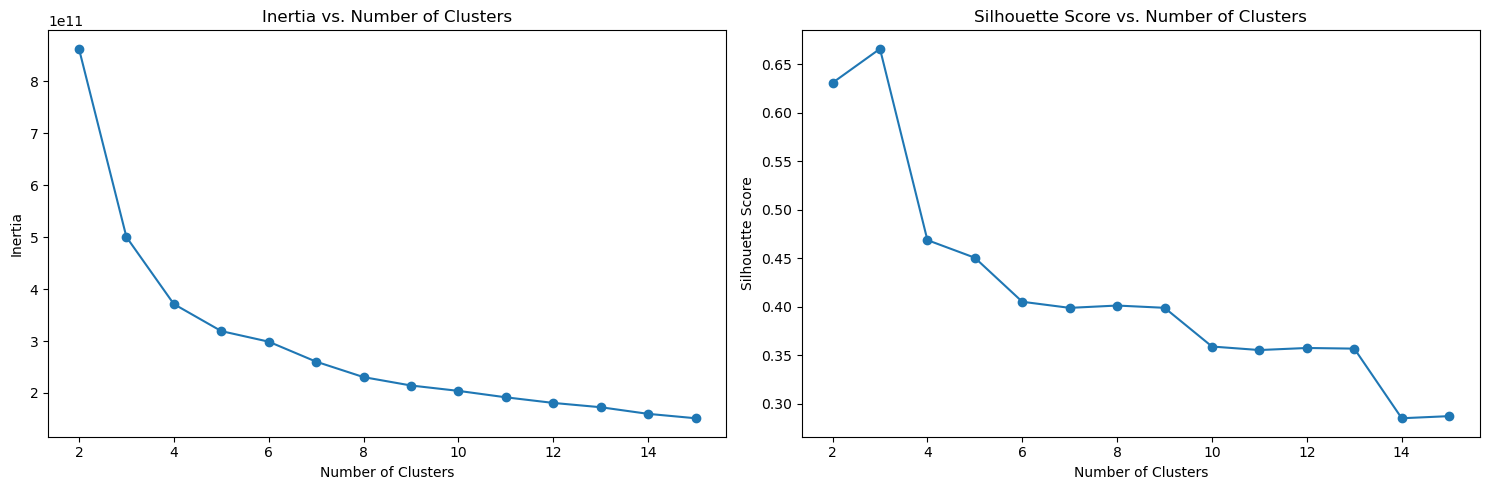

In [16]:
visualize_inertia_silhouette(persons_no_scl)

In [21]:
kmeans = KMeans(n_clusters = 4, random_state = 0).fit(persons_no_scl)
persons['no_kmeans4'] = kmeans.predict(persons_no_scl)

kmeans = KMeans(n_clusters = 2, random_state = 0).fit(persons_no_scl)
persons['no_kmeans2'] = kmeans.predict(persons_no_scl)

In [22]:
compare_cluster_solutions(persons, 'no_kmeans2', 'no_kmeans4')

no_kmeans4 Cluster 0  no_kmeans4 Cluster 1  \
no_kmeans2 Cluster 0                 18977                 13699   
no_kmeans2 Cluster 1                     0                   285   

                      no_kmeans4 Cluster 2  no_kmeans4 Cluster 3  
no_kmeans2 Cluster 0                   846                     0  
no_kmeans2 Cluster 1                  3027                  5109

In [41]:
calculate_group_means(persons, 'no_kmeans4')

no_kmeans4                                             0            1  \
customer_age                                   53.214417    51.400458   
number_complaints                               0.704360     0.840557   
distinct_stores_visited                         2.027859     1.488622   
lifetime_spend_groceries                     2300.022817  5261.210526   
lifetime_spend_electronics                    374.801286  2439.246067   
typical_hour                                   13.476553    14.090634   
lifetime_spend_vegetables                     541.819918   399.415010   
lifetime_spend_nonalcohol_drinks              351.119355   500.980764   
lifetime_spend_alcohol_drinks                 383.461348   590.868779   
lifetime_spend_meat                           290.657638   962.088458   
lifetime_spend_fish                           335.246509  1392.966176   
lifetime_spend_hygiene                        531.319545  1298.891161   
lifetime_spend_videogames                     351.675923  1057.705878   
lifetime_spend_petfood                        577.843337  1385.406393   
lifetime_total_distinct_products              320.575170   683.220180   
percentage_of_products_bought_promotion         0.309152     0.199653   
customer_tenure                                12.277757    12.995423   
latitude                                       38.746885    38.749494   
longitude                                      -9.156976    -9.154627   
percentage_lifetime_spend_groceries             0.382522     0.351488   
percentage_lifetime_spend_electronics           0.060363     0.157950   
percentage_lifetime_spend_vegetables            0.089712     0.027965   
percentage_lifetime_spend_nonalcohol_drinks     0.059486     0.033503   
percentage_lifetime_spend_alcohol_drinks        0.065315     0.037457   
percentage_lifetime_spend_meat                  0.047941     0.063497   
percentage_lifetime_spend_fish                  0.055155     0.088140   
percentage_lifetime_spend_hygiene               0.088122     0.083454   
percentage_lifetime_spend_videogames            0.058560     0.068467   
percentage_lifetime_spend_petfood               0.094173     0.088957   
nr_childs                                       1.530794     3.004494   
st_ward5                                        1.121516     1.076659   
mm_kmeans7                                      3.133530     3.396096   
no_ward4                                        2.850292     0.988344   

no_kmeans4                                              2             3  
customer_age                                    55.326104     55.252496  
number_complaints                                0.502797      0.502789  
distinct_stores_visited                          1.013190      1.395576  
lifetime_spend_groceries                     10452.281694  14489.953220  
lifetime_spend_electronics                     160.461399   8379.137992  
typical_hour                                    11.922734     13.601096  
lifetime_spend_vegetables                      199.186419    501.700186  
lifetime_spend_nonalcohol_drinks               499.829848    597.096496  
lifetime_spend_alcohol_drinks                   40.487736   1013.278724  
lifetime_spend_meat                            202.416731   2004.330789  
lifetime_spend_fish                            202.796540   4000.352124  
lifetime_spend_hygiene                          79.812807   1998.346252  
lifetime_spend_videogames                        0.000000   4004.002349  
lifetime_spend_petfood                       10287.979344   2998.871599  
lifetime_total_distinct_products                51.637490    101.203758  
percentage_of_products_bought_promotion          0.199353      0.069343  
customer_tenure                                 12.961529     12.878646  
latitude                                        38.748505     38.752105  
longitude                                       -9.173860     -9.146075  
percentage_lifetime_spend_groceries  

In [25]:
check_for_karens(persons,'no_kmeans4',0).head()
check_for_karens(persons,'no_kmeans4',1).head()

customer_age  number_complaints  distinct_stores_visited  \
customer_id                                                             
4090                   71                7.0                      3.0   
5791                   72                5.0                      1.0   
8044                   62                6.0                      3.0   
9686                   64                6.0                      2.0   
10734                  74                5.0                      3.0   

             lifetime_spend_groceries  lifetime_spend_electronics  \
customer_id                                                         
4090                           4607.0                       925.0   
5791                           5612.0                      2160.0   
8044                           5255.0                       455.0   
9686                           4683.0                      2861.0   
10734                          4871.0                       438.0   

             typical_hour  lifetime_spend_vegetables  \
customer_id                                            
4090                 13.0                      271.0   
5791                 21.0                      217.0   
8044                 17.0                      276.0   
9686                 12.0                      268.0   
10734                15.0                      297.0   

             lifetime_spend_nonalcohol_drinks  lifetime_spend_alcohol_drinks  \
customer_id                                                                    
4090                                    415.0                         1116.0   
5791                                     11.0                         1939.0   
8044                                    333.0                         1458.0   
9686                                    344.0                         1797.0   
10734                                   249.0                         1577.0   

             lifetime_spend_meat  lifetime_spend_fish  lifetime_spend_hygiene  \
customer_id                                                                     
4090                       558.0                304.0                  1371.0   
5791                        24.0                144.0                  1174.0   
8044                       557.0                731.0                  1629.0   
9686                        13.0               1047.0                   509.0   
10734                      417.0                130.0                   945.0   

             lifetime_spend_videogames  lifetime_spend_petfood  \
customer_id                                                      
4090                            1364.0                    14.0   
5791                             386.0                   740.0   
8044                             213.0                   758.0   
9686                            1014.0                   434.0   
10734                           1200.0                   200.0   

             lifetime_total_distinct_products  \
customer_id                                     
4090                                    495.0   
5791                                     51.0   
8044                                    841.0   
9686                                    378.0   
10734                                   572.0   

             percentage_of_products_bought_promotion  customer_tenure  \
customer_id                                                             
4090                                        0.068943             13.0   
5791                                        0.265374             14.0   
8044                                        0.000000             11.0   
9686                                        0.701780             15.0   
10734                                       0.102781             13.0   

              latitude  longitude  percentage_lifetime_spend_groceries  \
customer_id                                                              
4090         38.738700  -9.1

0. **Karens (almost)**

1. **Tech Enthusiasts + Karens**

2. **Pet Lovers**

3. **High Spenders**

We decided to comment out the functions **cluster_comparison** and **check_for_karens** in the rest of the notebook because they were occupying too much space.

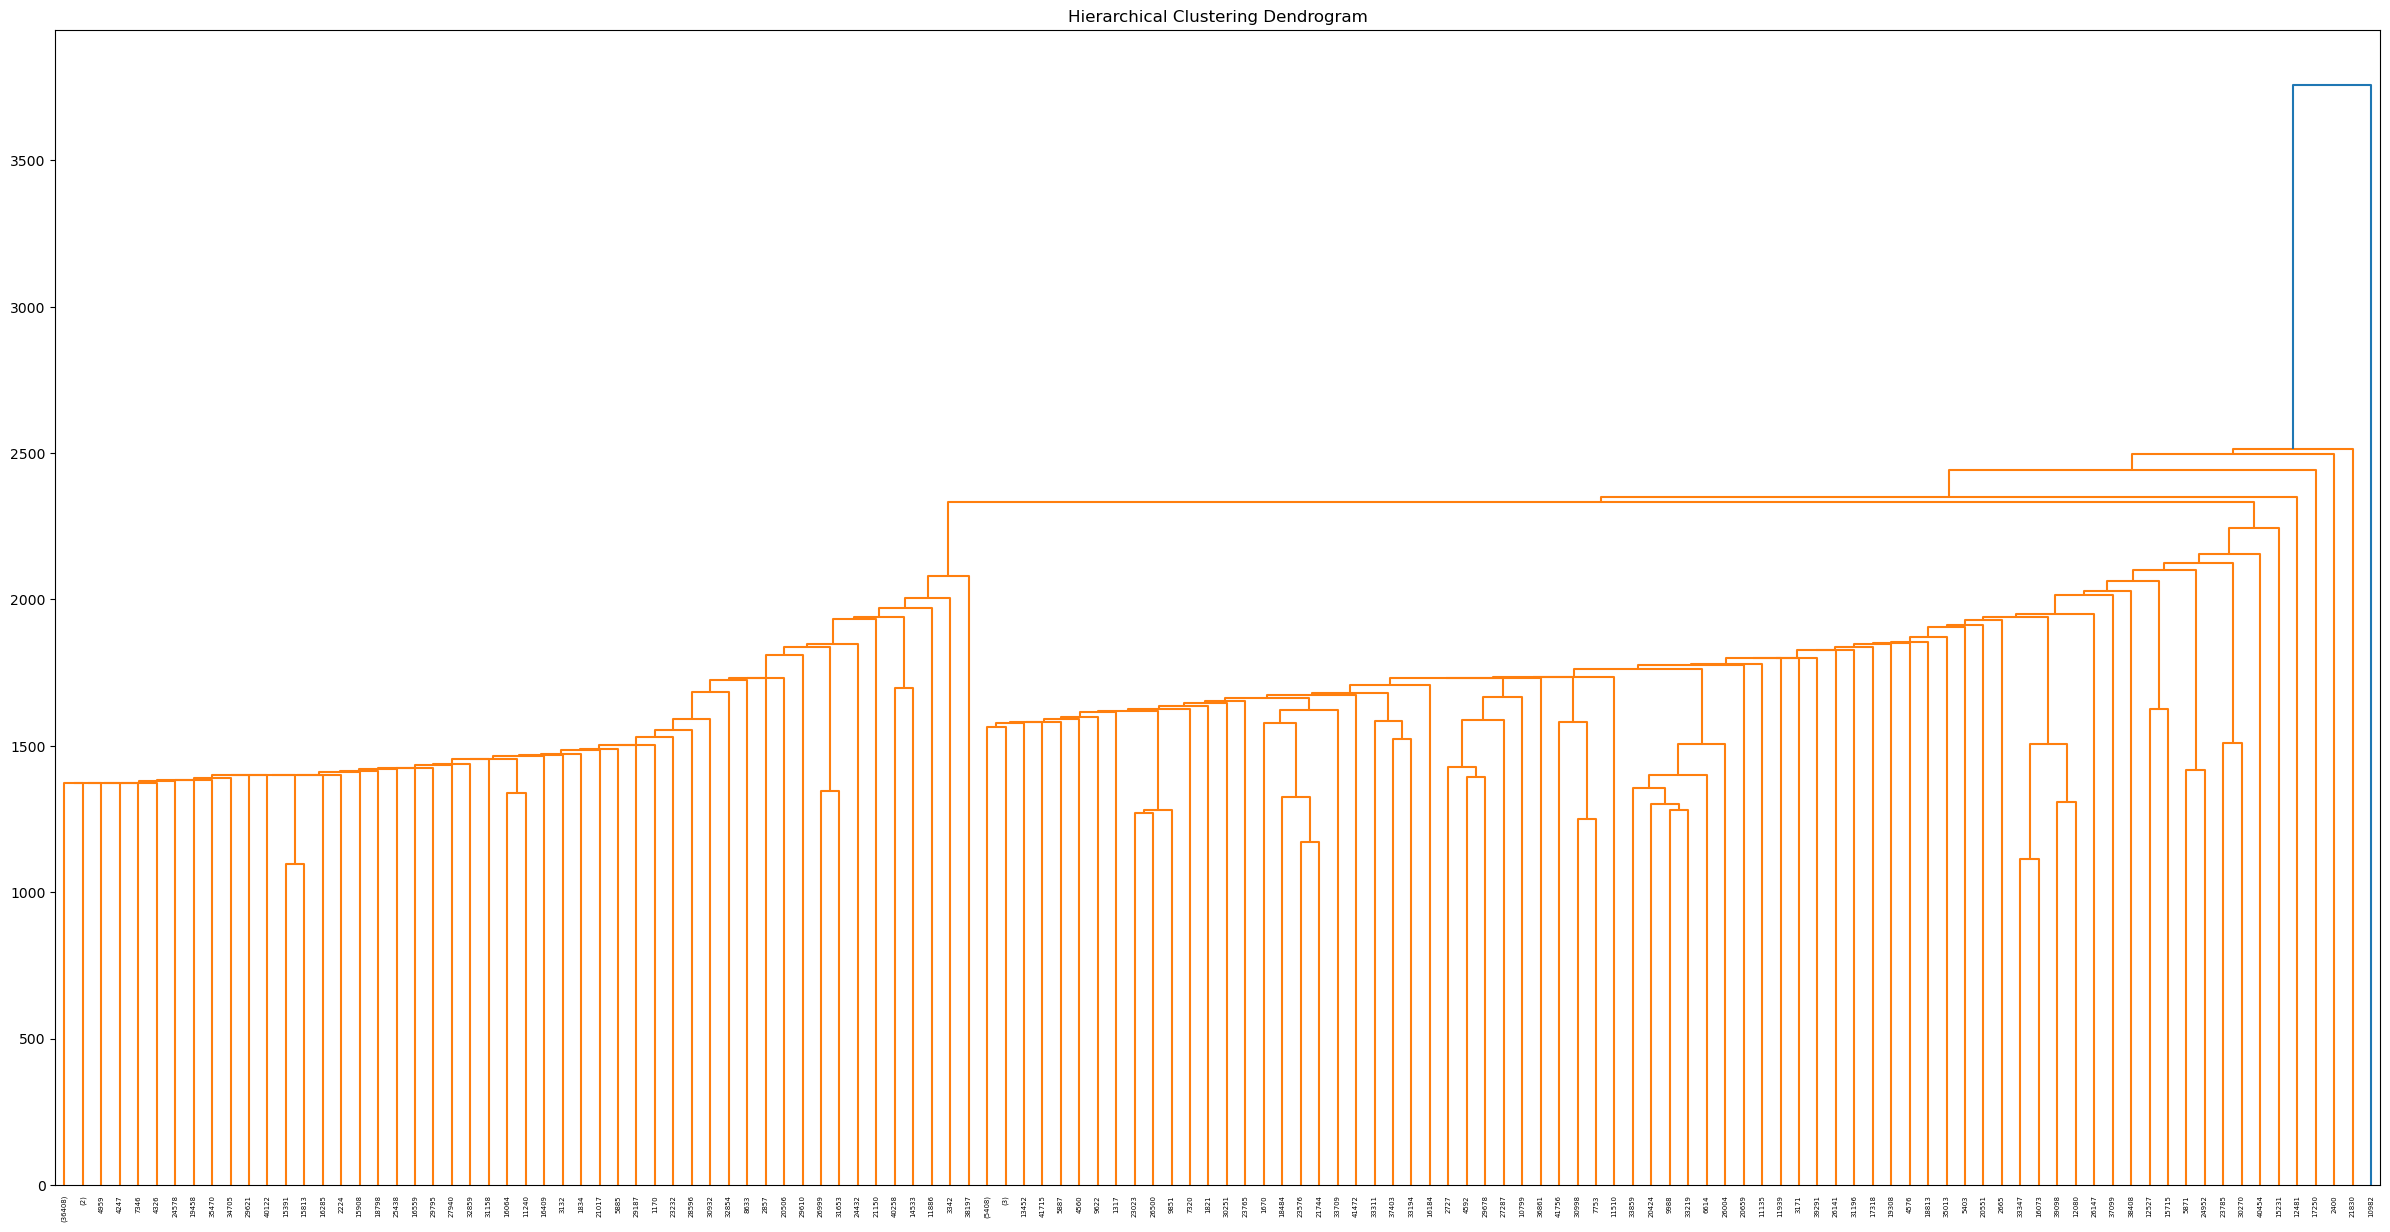

In [20]:
create_dendrogram(persons_no_scl, 'single')

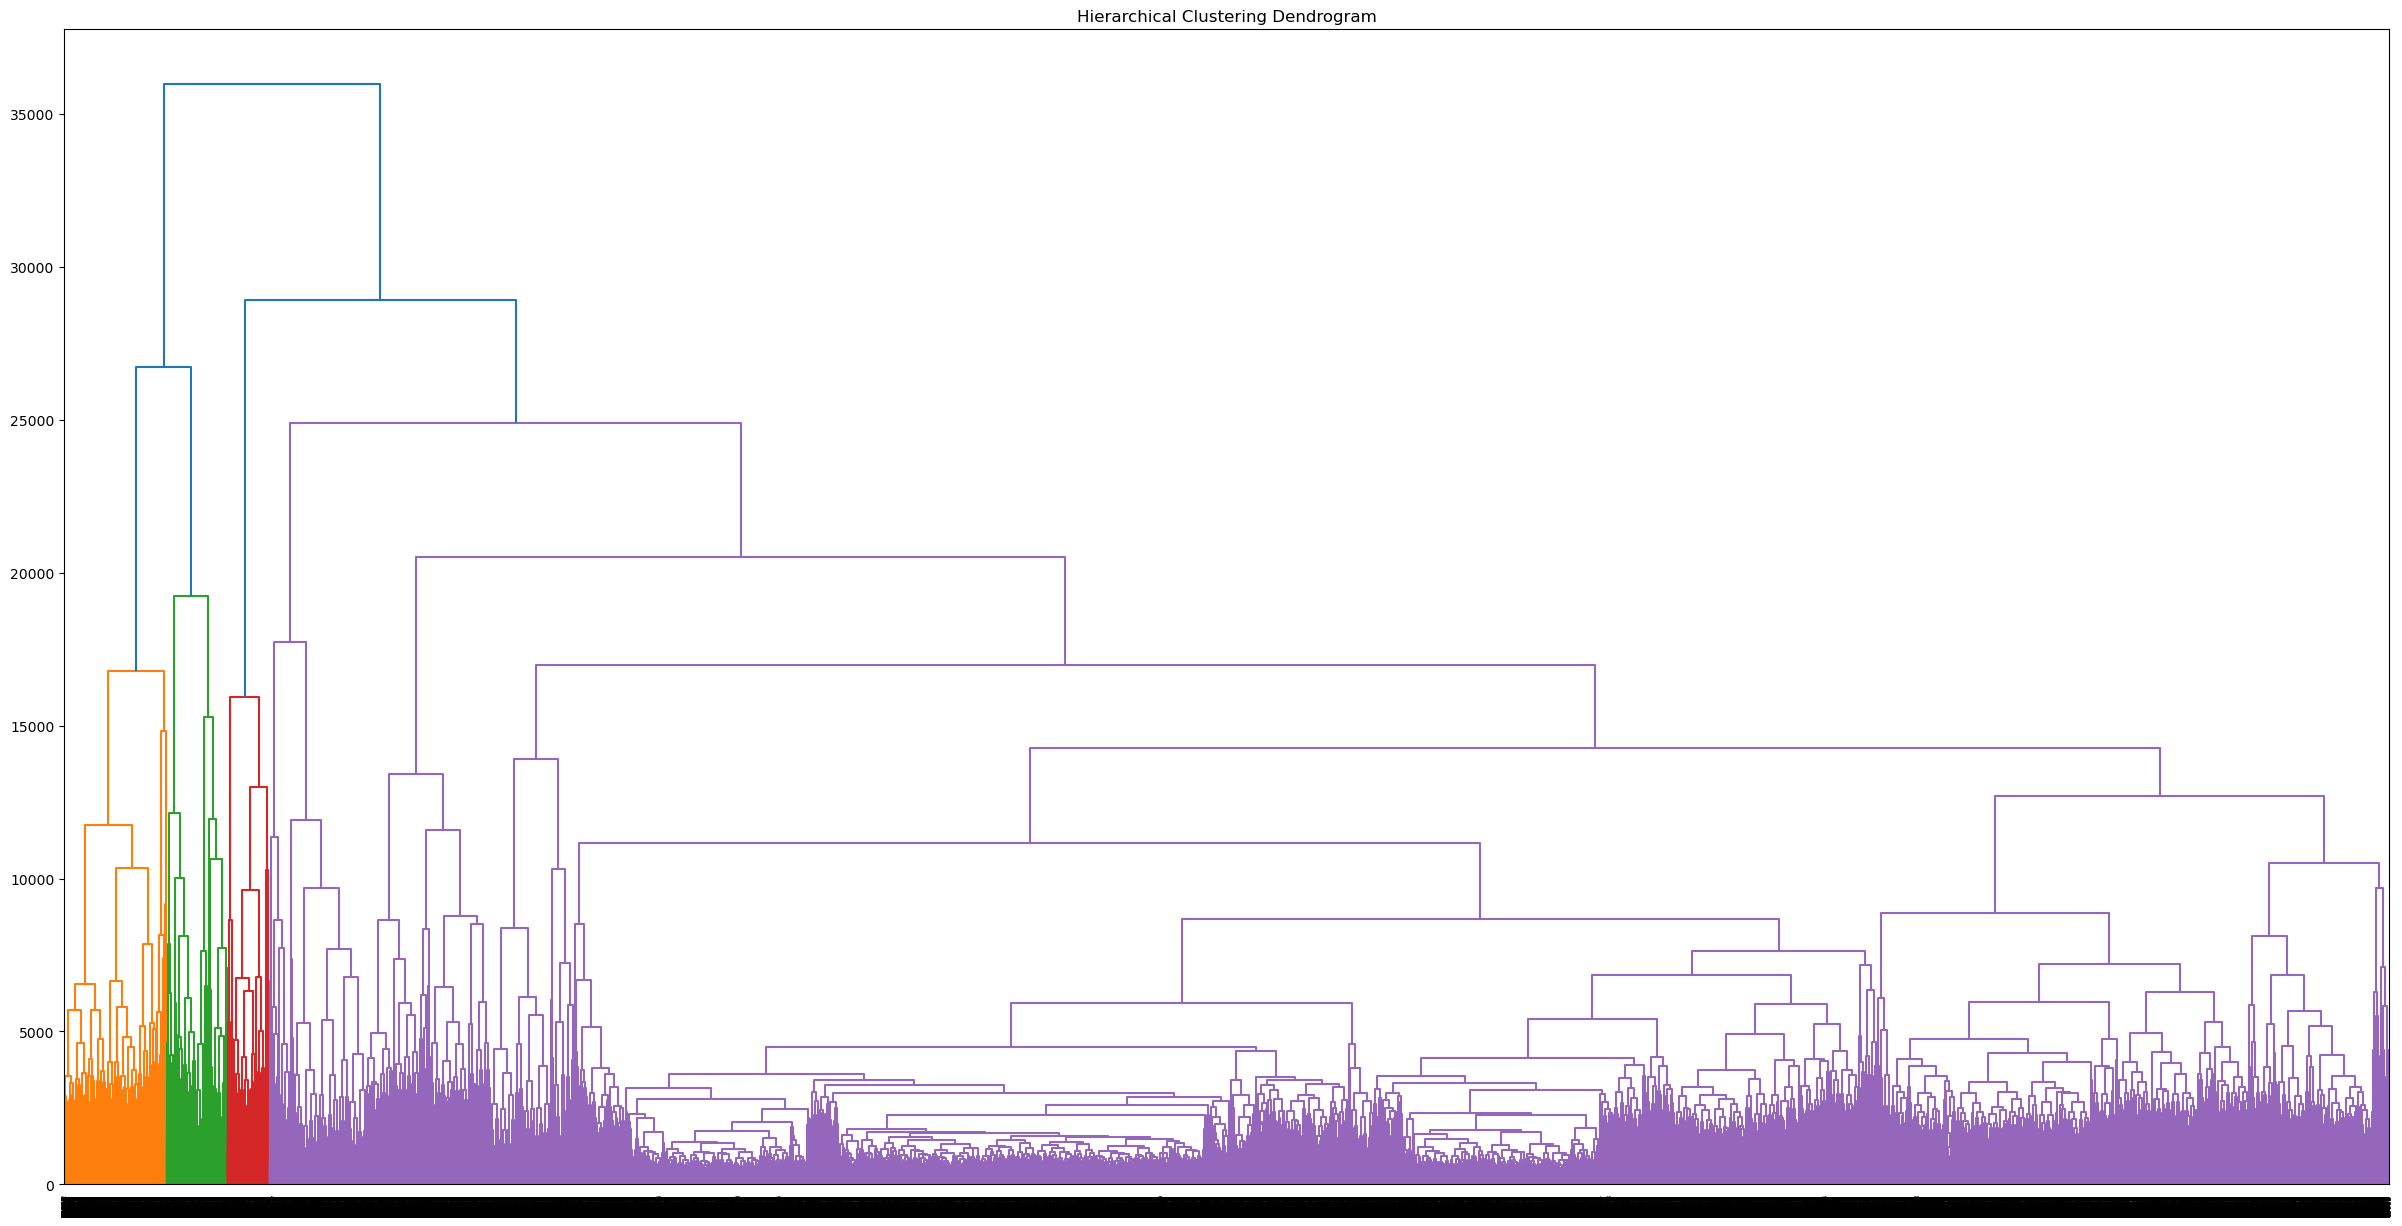

In [21]:
create_dendrogram(persons_no_scl, 'complete')

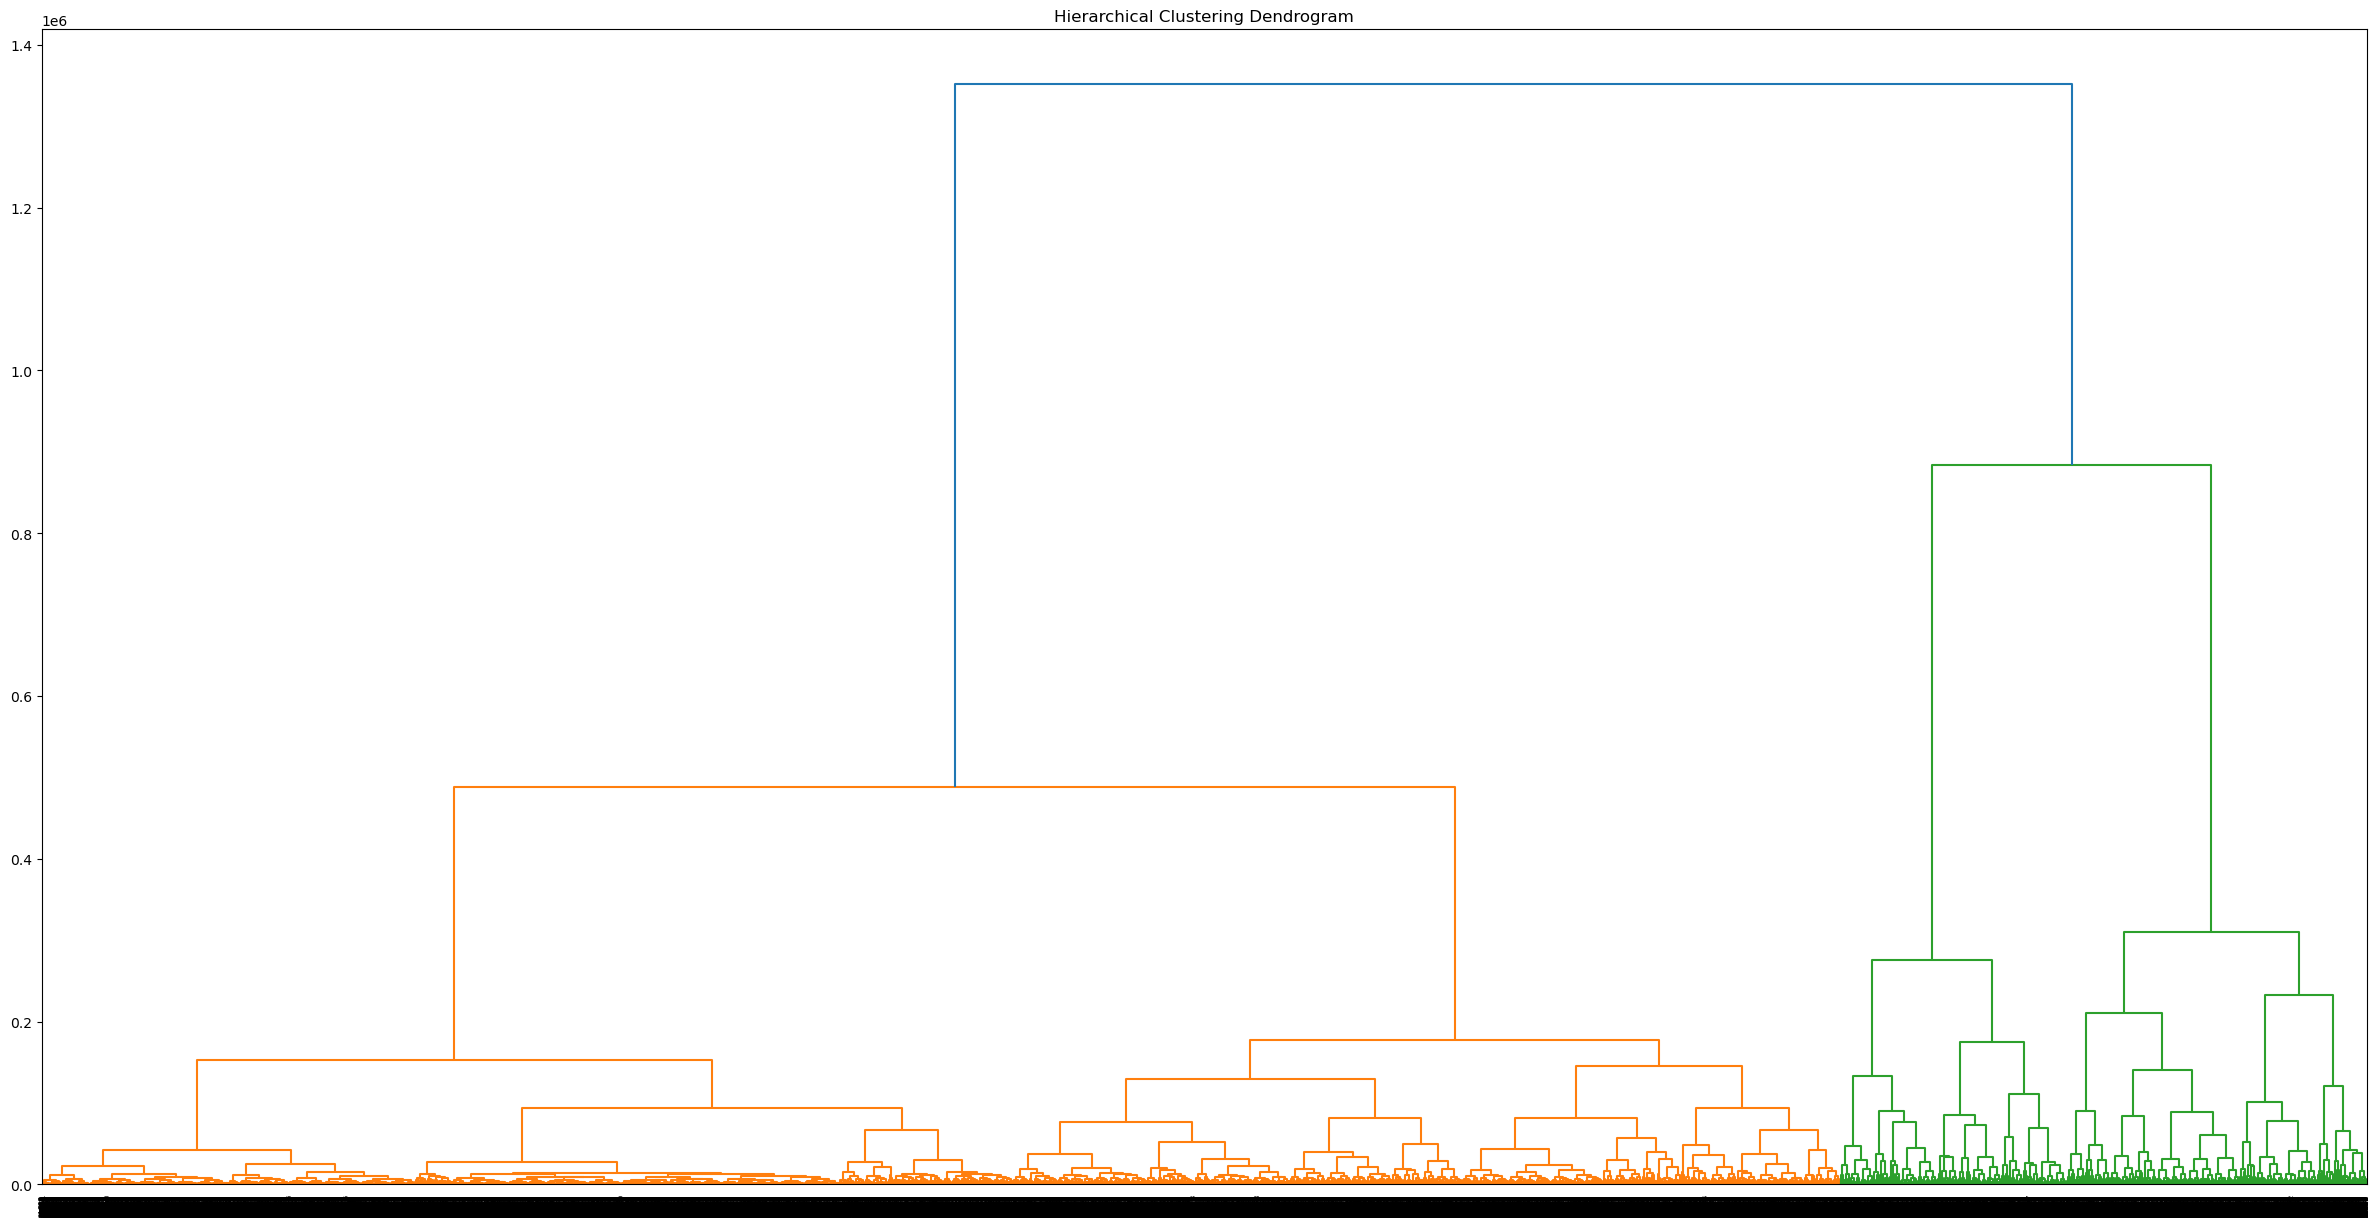

In [22]:
create_dendrogram(persons_no_scl, 'ward')

In [7]:
persons['no_ward4'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 4
    ).fit_predict(persons_no_scl)

In [67]:
calculate_group_means(persons, 'no_ward4')

no_ward4                                                0            1  \
customer_age                                    55.190978    51.533427   
number_complaints                                0.502819     0.852758   
distinct_stores_visited                          1.395683     1.517405   
lifetime_spend_groceries                     14120.771307  5021.508106   
lifetime_spend_electronics                    8168.459789  2266.479569   
typical_hour                                    13.628536    14.110437   
lifetime_spend_vegetables                      501.757488   403.548935   
lifetime_spend_nonalcohol_drinks               596.903309   497.521436   
lifetime_spend_alcohol_drinks                 1014.084489   581.685758   
lifetime_spend_meat                           2004.355519   925.379220   
lifetime_spend_fish                           3999.567573  1300.894427   
lifetime_spend_hygiene                        1997.892217  1259.290394   
lifetime_spend_videogames                     4004.969680   974.655212   
lifetime_spend_petfood                        2999.717138  1278.372454   
lifetime_total_distinct_products               100.692365   686.504823   
percentage_of_products_bought_promotion          0.069594     0.203502   
customer_tenure                                 12.869662    12.996249   
latitude                                        38.752068    38.749340   
longitude                                       -9.146106    -9.154752   
percentage_lifetime_spend_groceries              0.355914     0.353246   
percentage_lifetime_spend_electronics            0.201915     0.152291   
percentage_lifetime_spend_vegetables             0.013911     0.030130   
percentage_lifetime_spend_nonalcohol_drinks      0.015425     0.035289   
percentage_lifetime_spend_alcohol_drinks         0.026126     0.039404   
percentage_lifetime_spend_meat                   0.051768     0.064600   
percentage_lifetime_spend_fish                   0.103418     0.087190   
percentage_lifetime_spend_hygiene                0.051631     0.084865   
percentage_lifetime_spend_videogames             0.103575     0.067840   
percentage_lifetime_spend_petfood                0.077567     0.086013   
nr_childs                                        1.993622     3.015106   
mm_ward9                                         1.000000     5.071275   
no_ward9                                         4.515807     5.257637   
rb_ward9                                         5.000000     4.073486   

no_ward4                                                2            3  
customer_age                                    55.318894    53.158961  
number_complaints                                0.502896     0.692495  
distinct_stores_visited                          1.013359     2.055480  
lifetime_spend_groceries                     10161.002692  2218.777226  
lifetime_spend_electronics                     160.300538   341.398973  
typical_hour                                    11.934410    13.432156  
lifetime_spend_vegetables                      199.682881   550.689631  
lifetime_spend_nonalcohol_drinks               498.789525   340.274543  
lifetime_spend_alcohol_drinks                   40.322810   373.285274  
lifetime_spend_meat                            201.977729   257.582192  
lifetime_spend_fish                            202.941263   295.765468  
lifetime_spend_hygiene                          79.549192   504.274372  
lifetime_spend_videogames                        0.000000   325.834874  
lifetime_spend_petfood                       10047.236172   521.907192  
lifetime_total_distinct_products                51.645130   305.418779  
percentage_of_products_bought_promotion          0.198585     0.317316  
customer_tenure                                 12.955458    12.223973  
latitude                                        38.748622    38.746751  
longitude                                       -9.173711    -9.157003  
percentage_lifetime_spe

In [73]:
#check_for_karens(persons, 'no_ward4',0)

0. **High Spenders**

1. **Tech Enthusiasts + Karens**

2. **Pet Food**

3. **Promo Hunters + Karens**

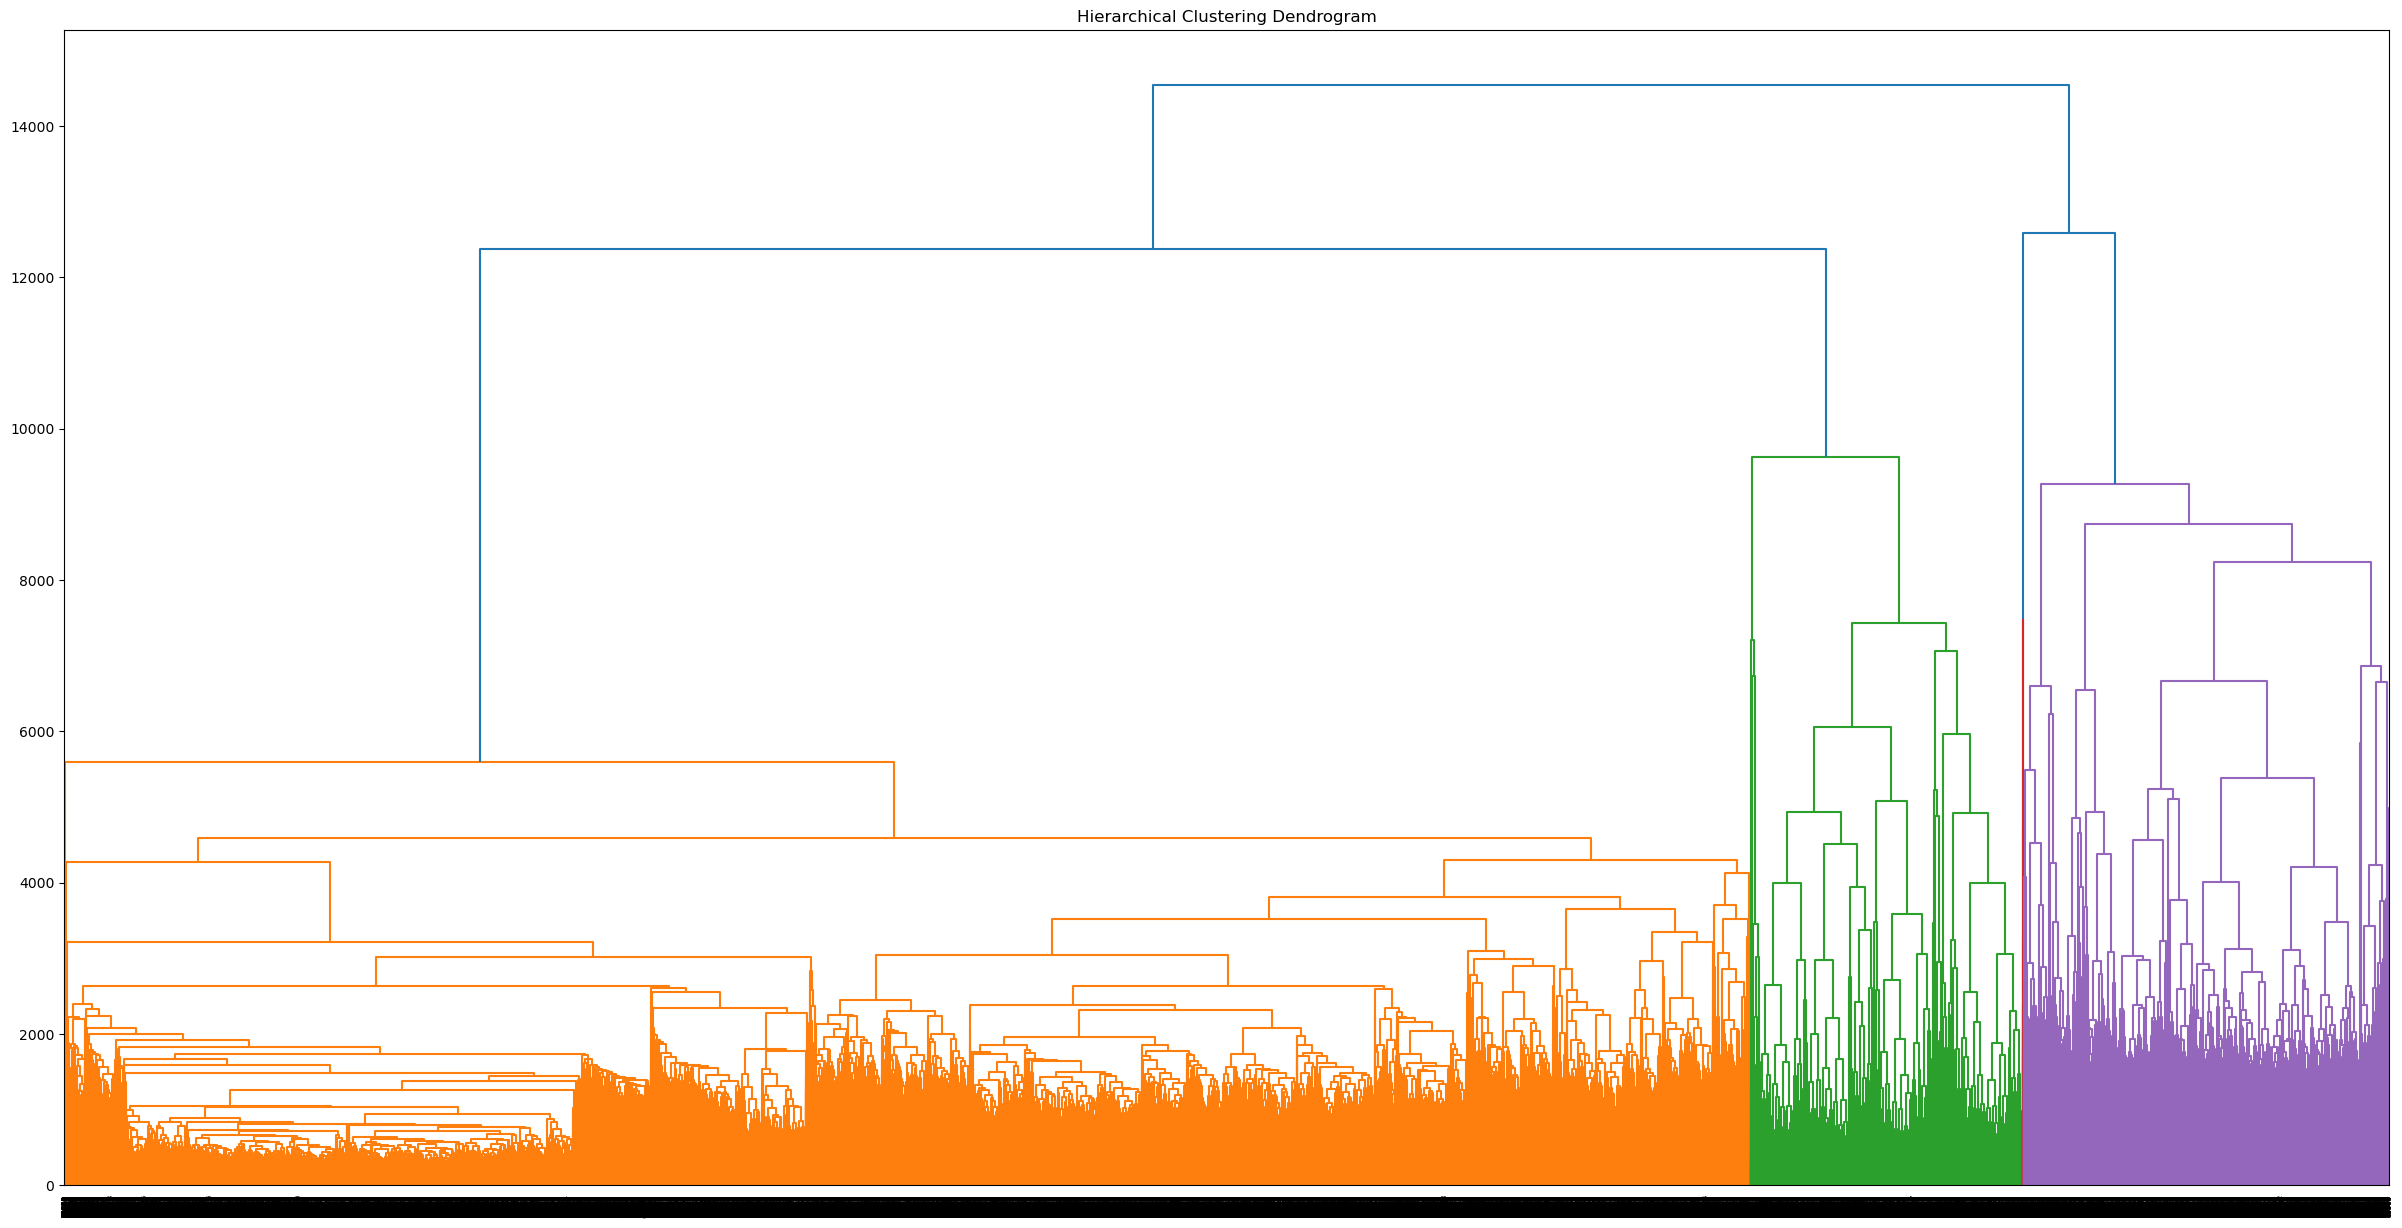

In [25]:
create_dendrogram(persons_no_scl, 'average')

_________________________________________________________________________________________________________________________________________________________________________________

## **Standard**

In [36]:
plot_r2_hc(persons_st_scl, max_nclus=12)

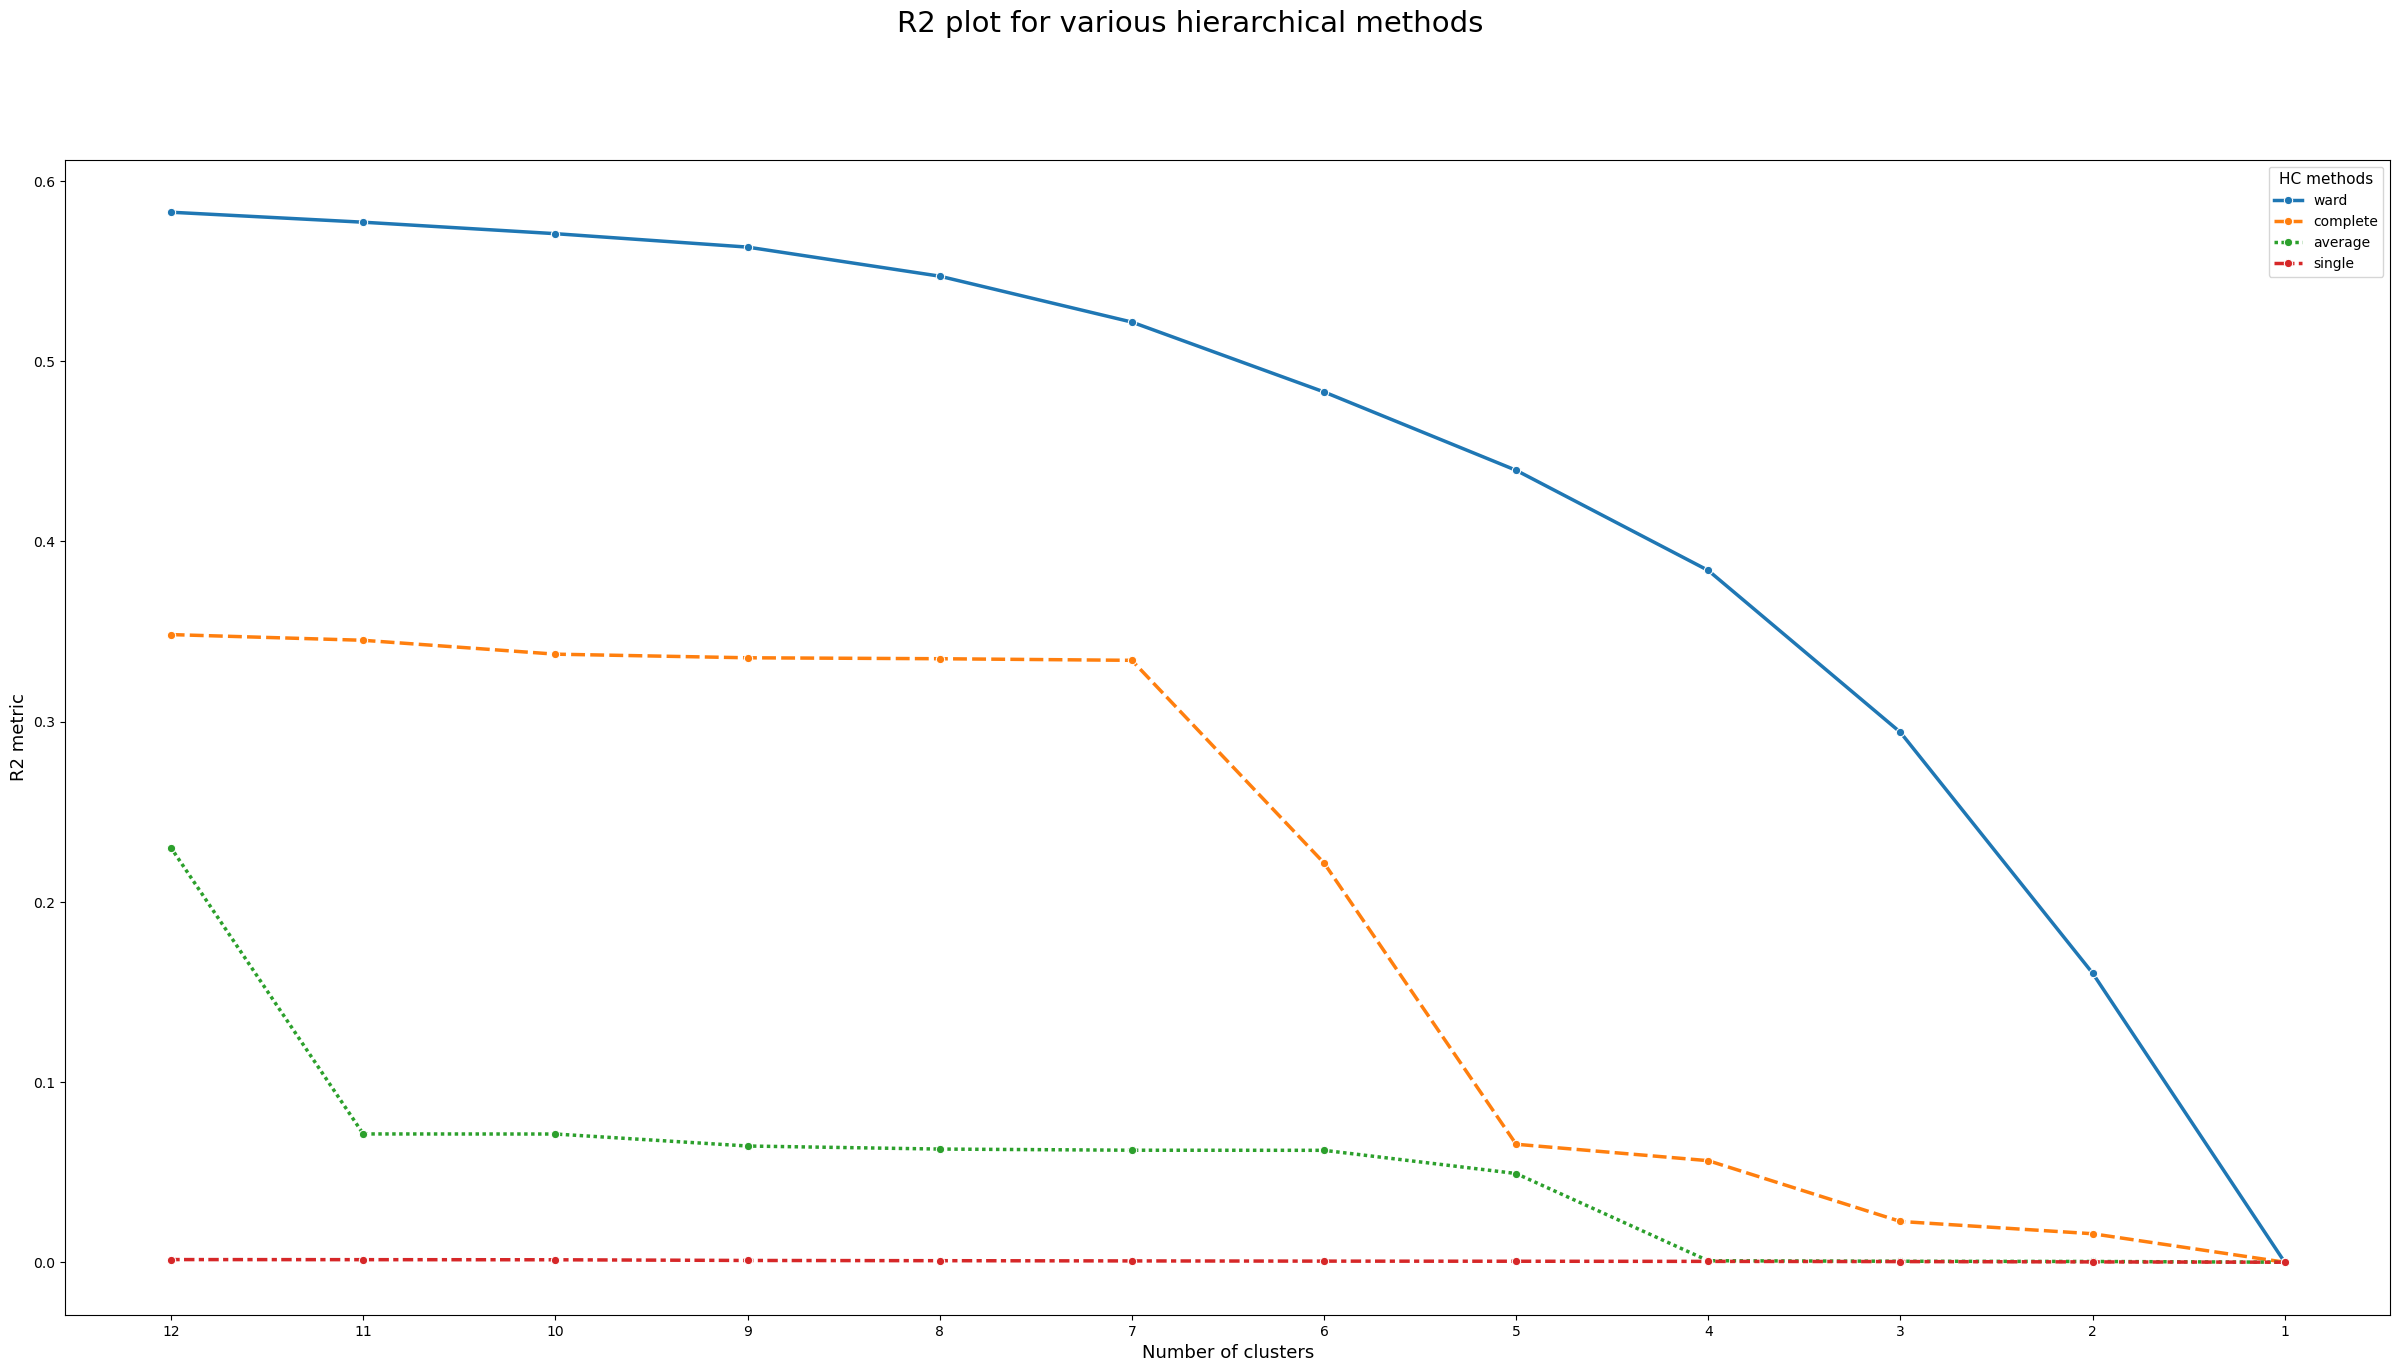

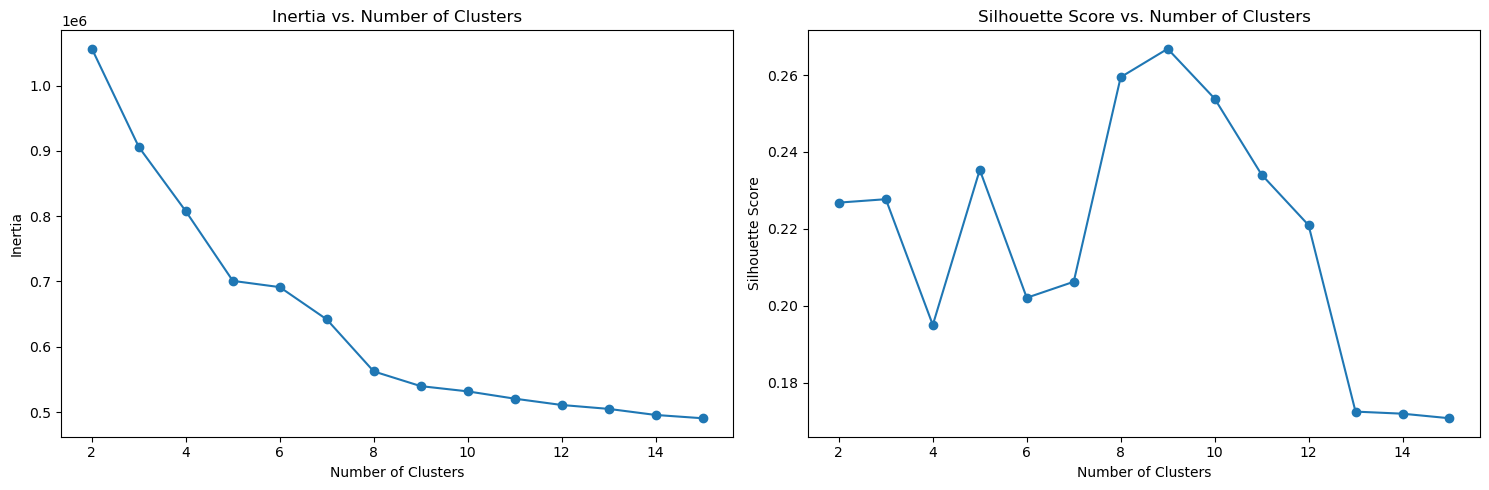

In [26]:
visualize_inertia_silhouette(persons_st_scl)

In [7]:
kmeans = KMeans(n_clusters = 5, random_state = 0).fit(persons_st_scl)
persons['st_kmeans5'] = kmeans.predict(persons_st_scl)

In [28]:
#clusters_comparison(persons, 'st_kmeans5', 'no_ward7')

In [8]:
calculate_group_means(persons, 'st_kmeans5')

st_kmeans5                                             0            1  \
customer_age                                   55.098300    51.848474   
number_complaints                               0.513018     0.814771   
distinct_stores_visited                         1.216644     2.642753   
lifetime_spend_groceries                     3044.716927  1869.451361   
lifetime_spend_electronics                    409.743440   300.940327   
typical_hour                                   13.743406    13.197917   
lifetime_spend_vegetables                     988.115466   252.073978   
lifetime_spend_nonalcohol_drinks              306.053433   372.312339   
lifetime_spend_alcohol_drinks                 137.667437   547.211659   
lifetime_spend_meat                            27.446227   422.457337   
lifetime_spend_fish                            29.794969   482.459728   
lifetime_spend_hygiene                        498.977838   506.983634   
lifetime_spend_videogames                     213.119646   409.423042   
lifetime_spend_petfood                        503.093270   536.444925   
lifetime_total_distinct_products              213.053161   365.195660   
percentage_of_products_bought_promotion         0.200965     0.395580   
customer_tenure                                12.901428    11.763332   
latitude                                       38.747806    38.745962   
longitude                                      -9.156823    -9.157087   
percentage_lifetime_spend_groceries             0.493606     0.323742   
percentage_lifetime_spend_electronics           0.065603     0.053178   
percentage_lifetime_spend_vegetables            0.162235     0.044021   
percentage_lifetime_spend_nonalcohol_drinks     0.050423     0.066358   
percentage_lifetime_spend_alcohol_drinks        0.022142     0.095977   
percentage_lifetime_spend_meat                  0.003788     0.074325   
percentage_lifetime_spend_fish                  0.004104     0.085319   
percentage_lifetime_spend_hygiene               0.081754     0.090320   
percentage_lifetime_spend_videogames            0.034902     0.072515   
percentage_lifetime_spend_petfood               0.083206     0.095376   
nr_childs                                       1.448343     1.449336   

st_kmeans5                                             2             3  \
customer_age                                   51.426883     55.308705   
number_complaints                               0.862899      0.502093   
distinct_stores_visited                         1.476045      1.013310   
lifetime_spend_groceries                     4998.411948  10151.315533   
lifetime_spend_electronics                   2347.263024    160.290661   
typical_hour                                   14.172100     11.930566   
lifetime_spend_vegetables                     398.128079    199.651426   
lifetime_spend_nonalcohol_drinks              498.184173    498.760059   
lifetime_spend_alcohol_drinks                 579.217441     40.310412   
lifetime_spend_meat                           947.355110    202.046330   
lifetime_spend_fish                          1333.544946    202.785662   
lifetime_spend_hygiene                       1295.470343     79.501341   
lifetime_spend_videogames                     987.269819      0.000000   
lifetime_spend_petfood                       1304.937854  10018.038283   
lifetime_total_distinct_products              711.502477     51.678371   
percentage_of_products_bought_promotion         0.198759      0.198726   
customer_tenure                                13.040416     12.957815   
latitude                                       38.749525     38.748610   
longitude                                      -9.154707     -9.173726   
percentage_lifetime_spend_groceries             0.342287      0.460825   
percentage_lifetime_spend_electronics           0.157951      0.007850   
percentage_lifetime_spend_vegetables            0.029078      0.010070   
percentage_lifetime_spend_nonalcoh

In [17]:
#check_for_karens(persons,'st_kmeans5',1)
#check_for_karens(persons,'st_kmeans5',2)

0. **Vegetarians**

1. **Promo Hunters + Karens**

2. **Tech Enthusiasts + Karens**

3. **Pet Lovers**

4. **High Spenders**

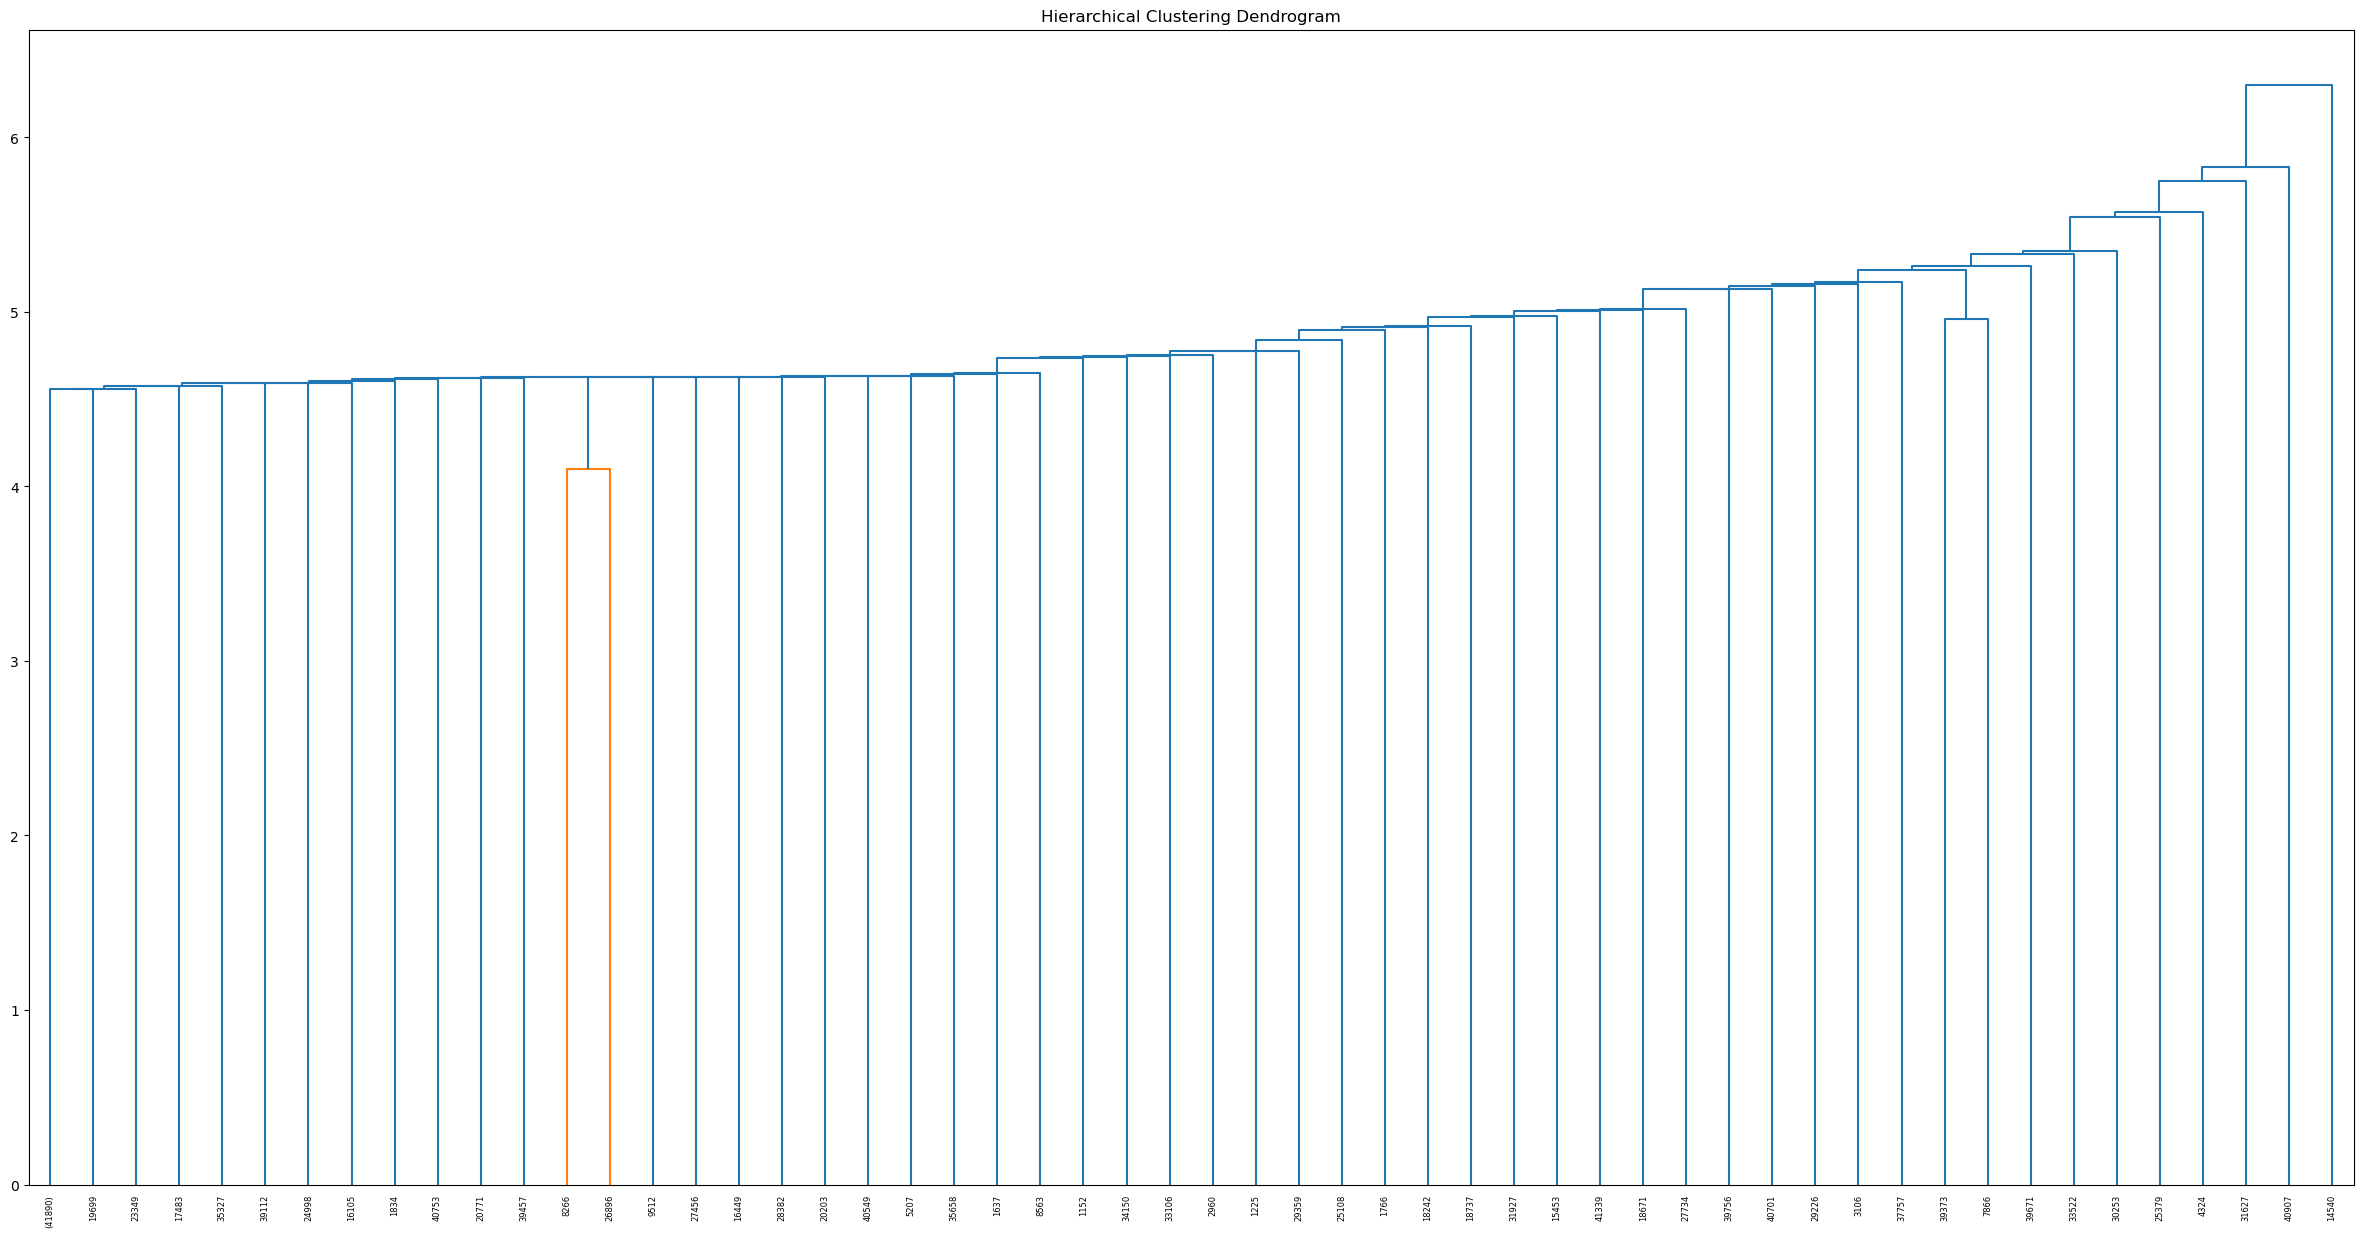

In [30]:
create_dendrogram(persons_st_scl, 'single')

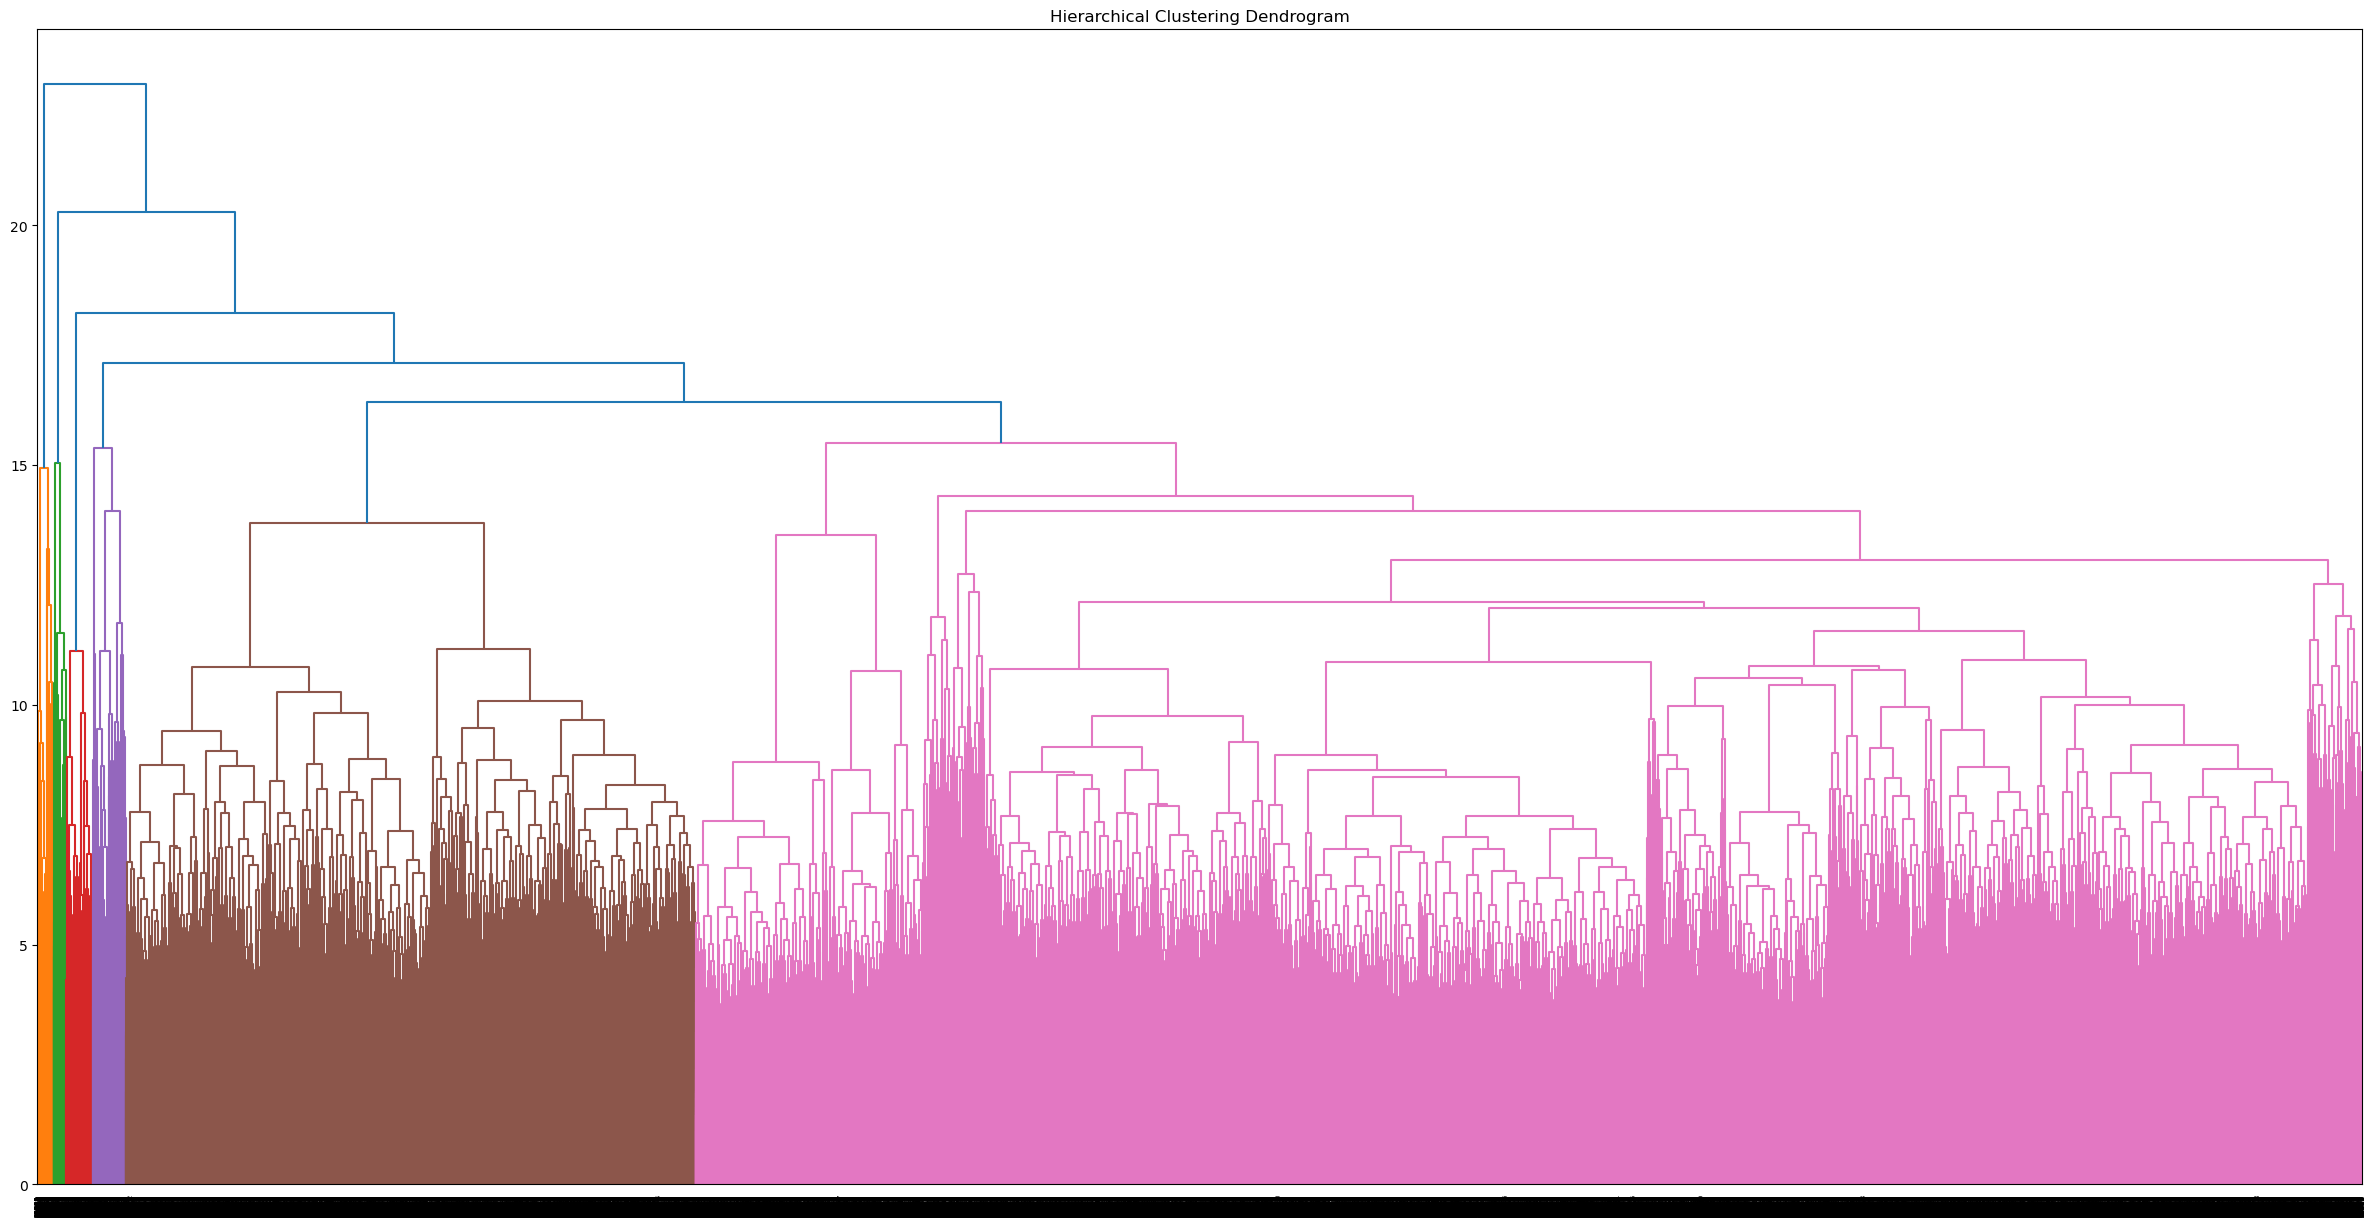

In [31]:
create_dendrogram(persons_st_scl, 'complete')

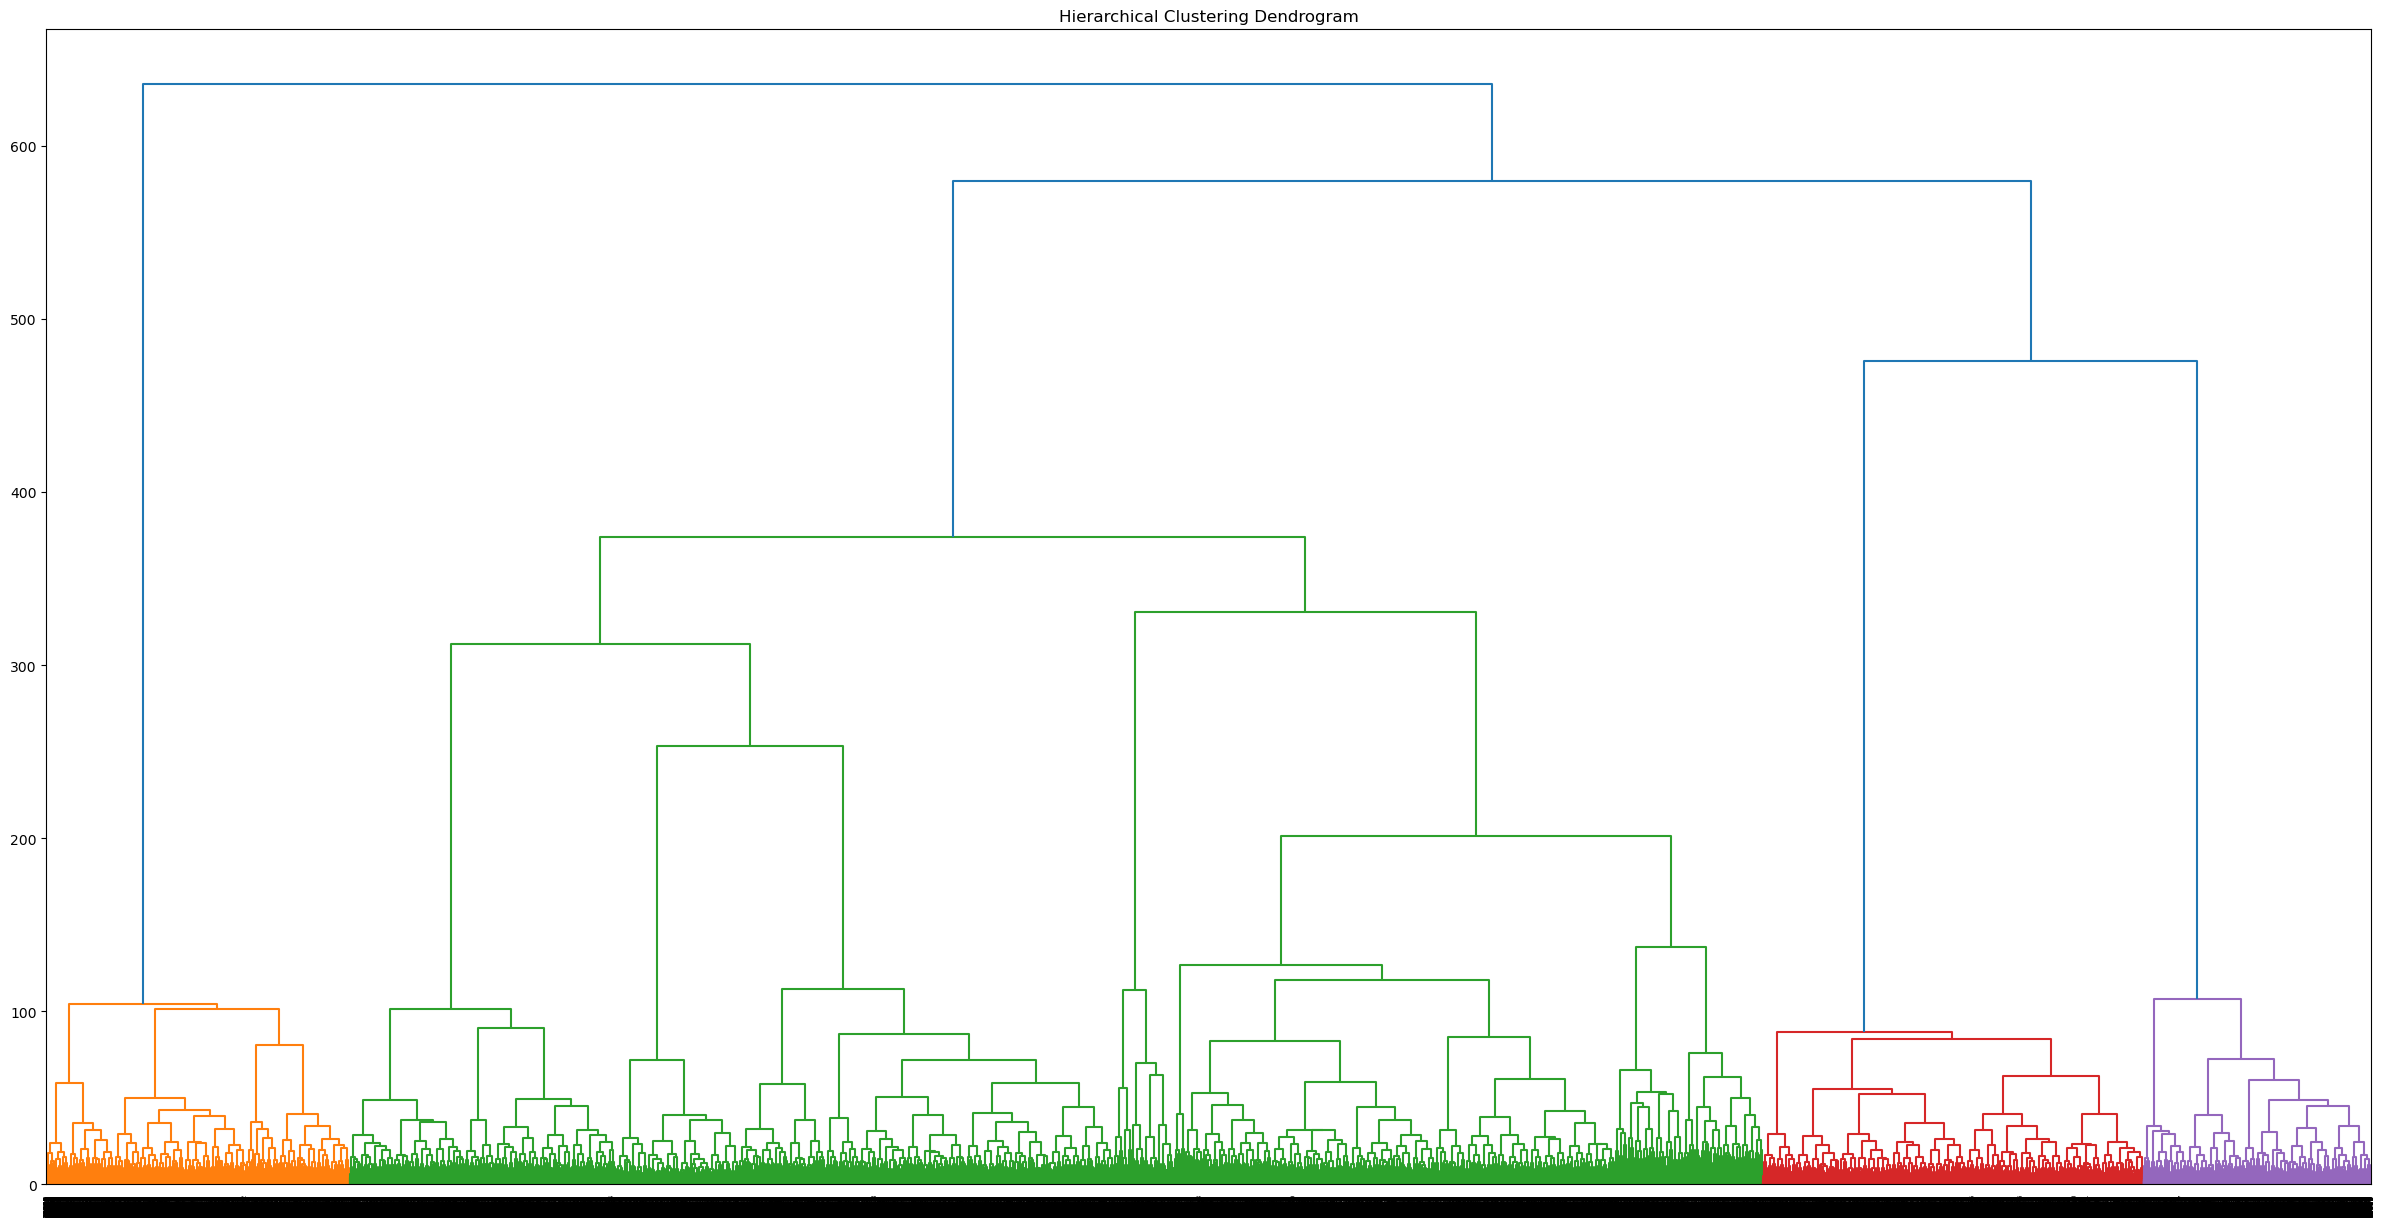

In [32]:
create_dendrogram(persons_st_scl, 'ward')

In [7]:
persons['st_ward5'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 5
    ).fit_predict(persons_st_scl)

#persons['st_ward7'] = AgglomerativeClustering(
    #linkage = 'ward', n_clusters = 7
    #).fit_predict(persons_st_scl)

#persons['st_ward8'] = AgglomerativeClustering(
    #linkage = 'ward', n_clusters = 8
    #).fit_predict(persons_st_scl)

#persons['st_ward5'] = AgglomerativeClustering(
    #linkage = 'ward', n_clusters = 5
    #).fit_predict(persons_st_scl)

In [34]:
#compare_cluster_solutions(persons, 'st_ward7', 'st_ward8')

In [8]:
calculate_group_means(persons, 'st_ward5')

st_ward5                                               0            1  \
customer_age                                   52.356984    51.086436   
number_complaints                               0.829629     0.841144   
distinct_stores_visited                         2.572378     1.477560   
lifetime_spend_groceries                     1949.018443  5045.675013   
lifetime_spend_electronics                    322.934170  2385.512229   
typical_hour                                   13.257190    14.166177   
lifetime_spend_vegetables                     289.281407   396.942685   
lifetime_spend_nonalcohol_drinks              372.106130   502.102402   
lifetime_spend_alcohol_drinks                 546.988473   575.726323   
lifetime_spend_meat                           427.527920   954.977575   
lifetime_spend_fish                           484.644382  1350.781261   
lifetime_spend_hygiene                        515.205686  1306.835692   
lifetime_spend_videogames                     409.571636  1000.402714   
lifetime_spend_petfood                        536.095970  1324.129908   
lifetime_total_distinct_products              375.541752   711.755352   
percentage_of_products_bought_promotion         0.378322     0.200998   
customer_tenure                                11.869279    13.011975   
latitude                                       38.746037    38.749523   
longitude                                      -9.157240    -9.154491   
percentage_lifetime_spend_groceries             0.326396     0.342279   
percentage_lifetime_spend_electronics           0.054853     0.159564   
percentage_lifetime_spend_vegetables            0.048672     0.028388   
percentage_lifetime_spend_nonalcohol_drinks     0.065111     0.034385   
percentage_lifetime_spend_alcohol_drinks        0.093867     0.037439   
percentage_lifetime_spend_meat                  0.073598     0.065598   
percentage_lifetime_spend_fish                  0.084064     0.089733   
percentage_lifetime_spend_hygiene               0.089654     0.086571   
percentage_lifetime_spend_videogames            0.071291     0.069013   
percentage_lifetime_spend_petfood               0.093682     0.087873   
nr_childs                                       1.489196     3.122300   

st_ward5                                                2            3  \
customer_age                                    55.312713    55.120647   
number_complaints                                0.501725     0.512604   
distinct_stores_visited                          1.013294     1.173333   
lifetime_spend_groceries                     10149.536288  3052.440478   
lifetime_spend_electronics                     160.365806   407.334110   
typical_hour                                    11.931320    13.743261   
lifetime_spend_vegetables                      199.746834   987.173576   
lifetime_spend_nonalcohol_drinks               498.772772   300.089757   
lifetime_spend_alcohol_drinks                   40.285192   117.709748   
lifetime_spend_meat                            201.835119     2.150663   
lifetime_spend_fish                            202.749391     2.515227   
lifetime_spend_hygiene                          79.489040   501.969401   
lifetime_spend_videogames                        0.000000   202.109282   
lifetime_spend_petfood                       10006.548466   501.811598   
lifetime_total_distinct_products                51.686313   201.816698   
percentage_of_products_bought_promotion          0.198642     0.202156   
customer_tenure                                 12.956892    12.923940   
latitude                                        38.748619    38.747987   
longitude                                       -9.173716    -9.156850   
percentage_lifetime_spend_groceries              0.461247     0.501862   
percentage_lifetime_spend_electronics            0.007867     0.065749   
percentage_lifetime_spend_vegetables             0.010091     0.163409   
percentage_lifetime_spend_nonalcoh

In [14]:
#check_for_karens(persons,'st_ward5',0)

0. **Promo Hunters + Karens**

1. **Tech Enthusiasts**

2. **Pet Lovers**

3. **Vegetarians**

4. **High Spenders**

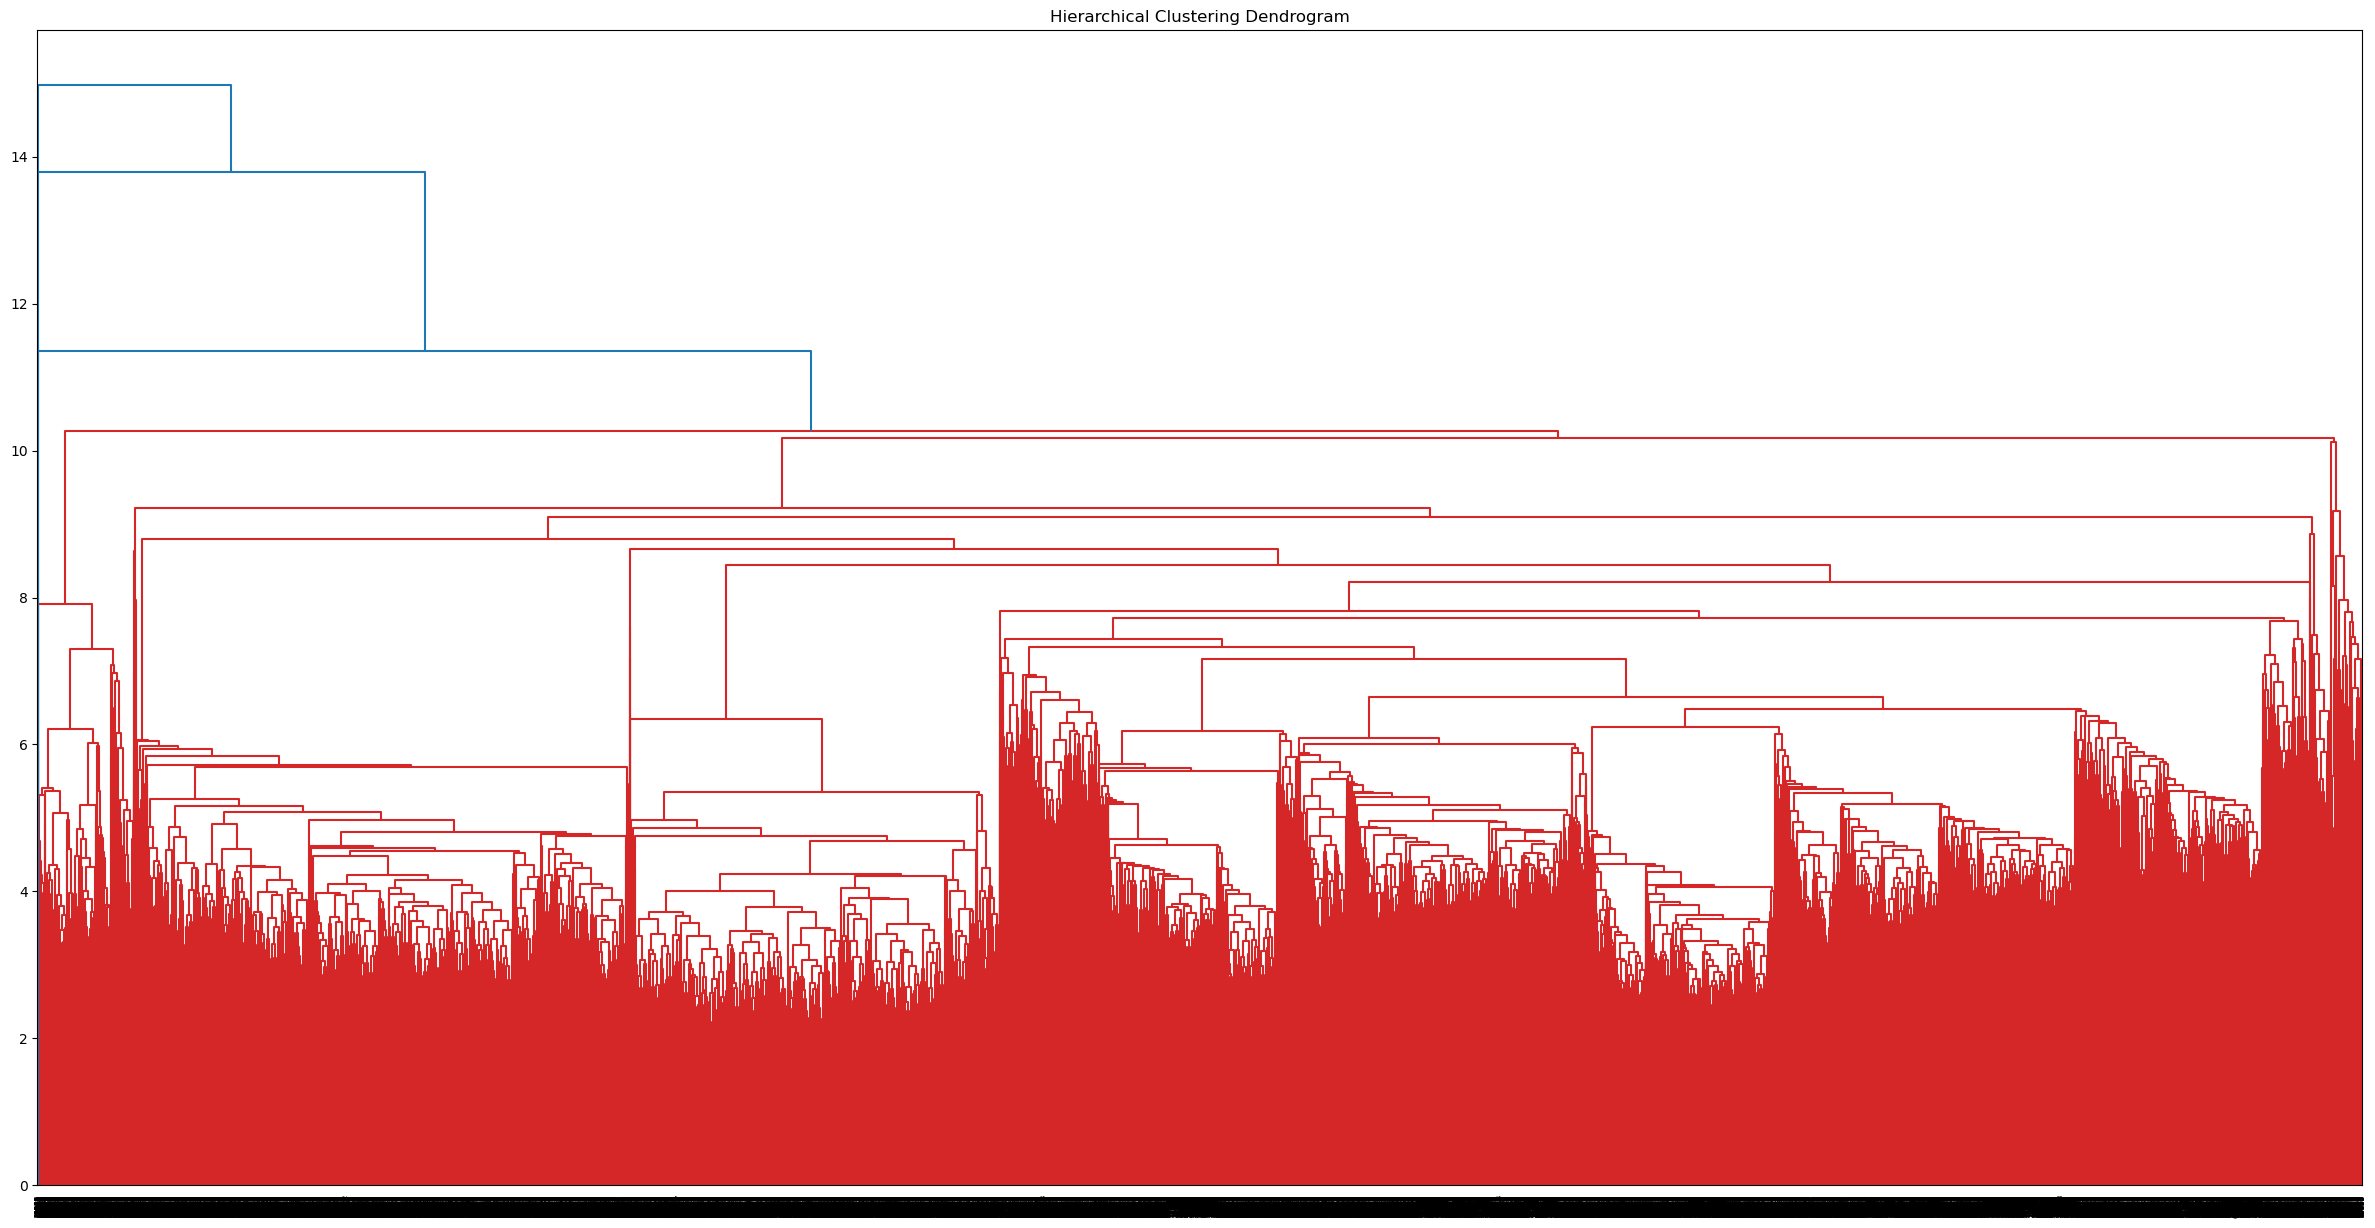

In [36]:
create_dendrogram(persons_st_scl, 'average')

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **MinMax**

In [33]:
plot_r2_hc(persons_mm_scl, max_nclus=12)

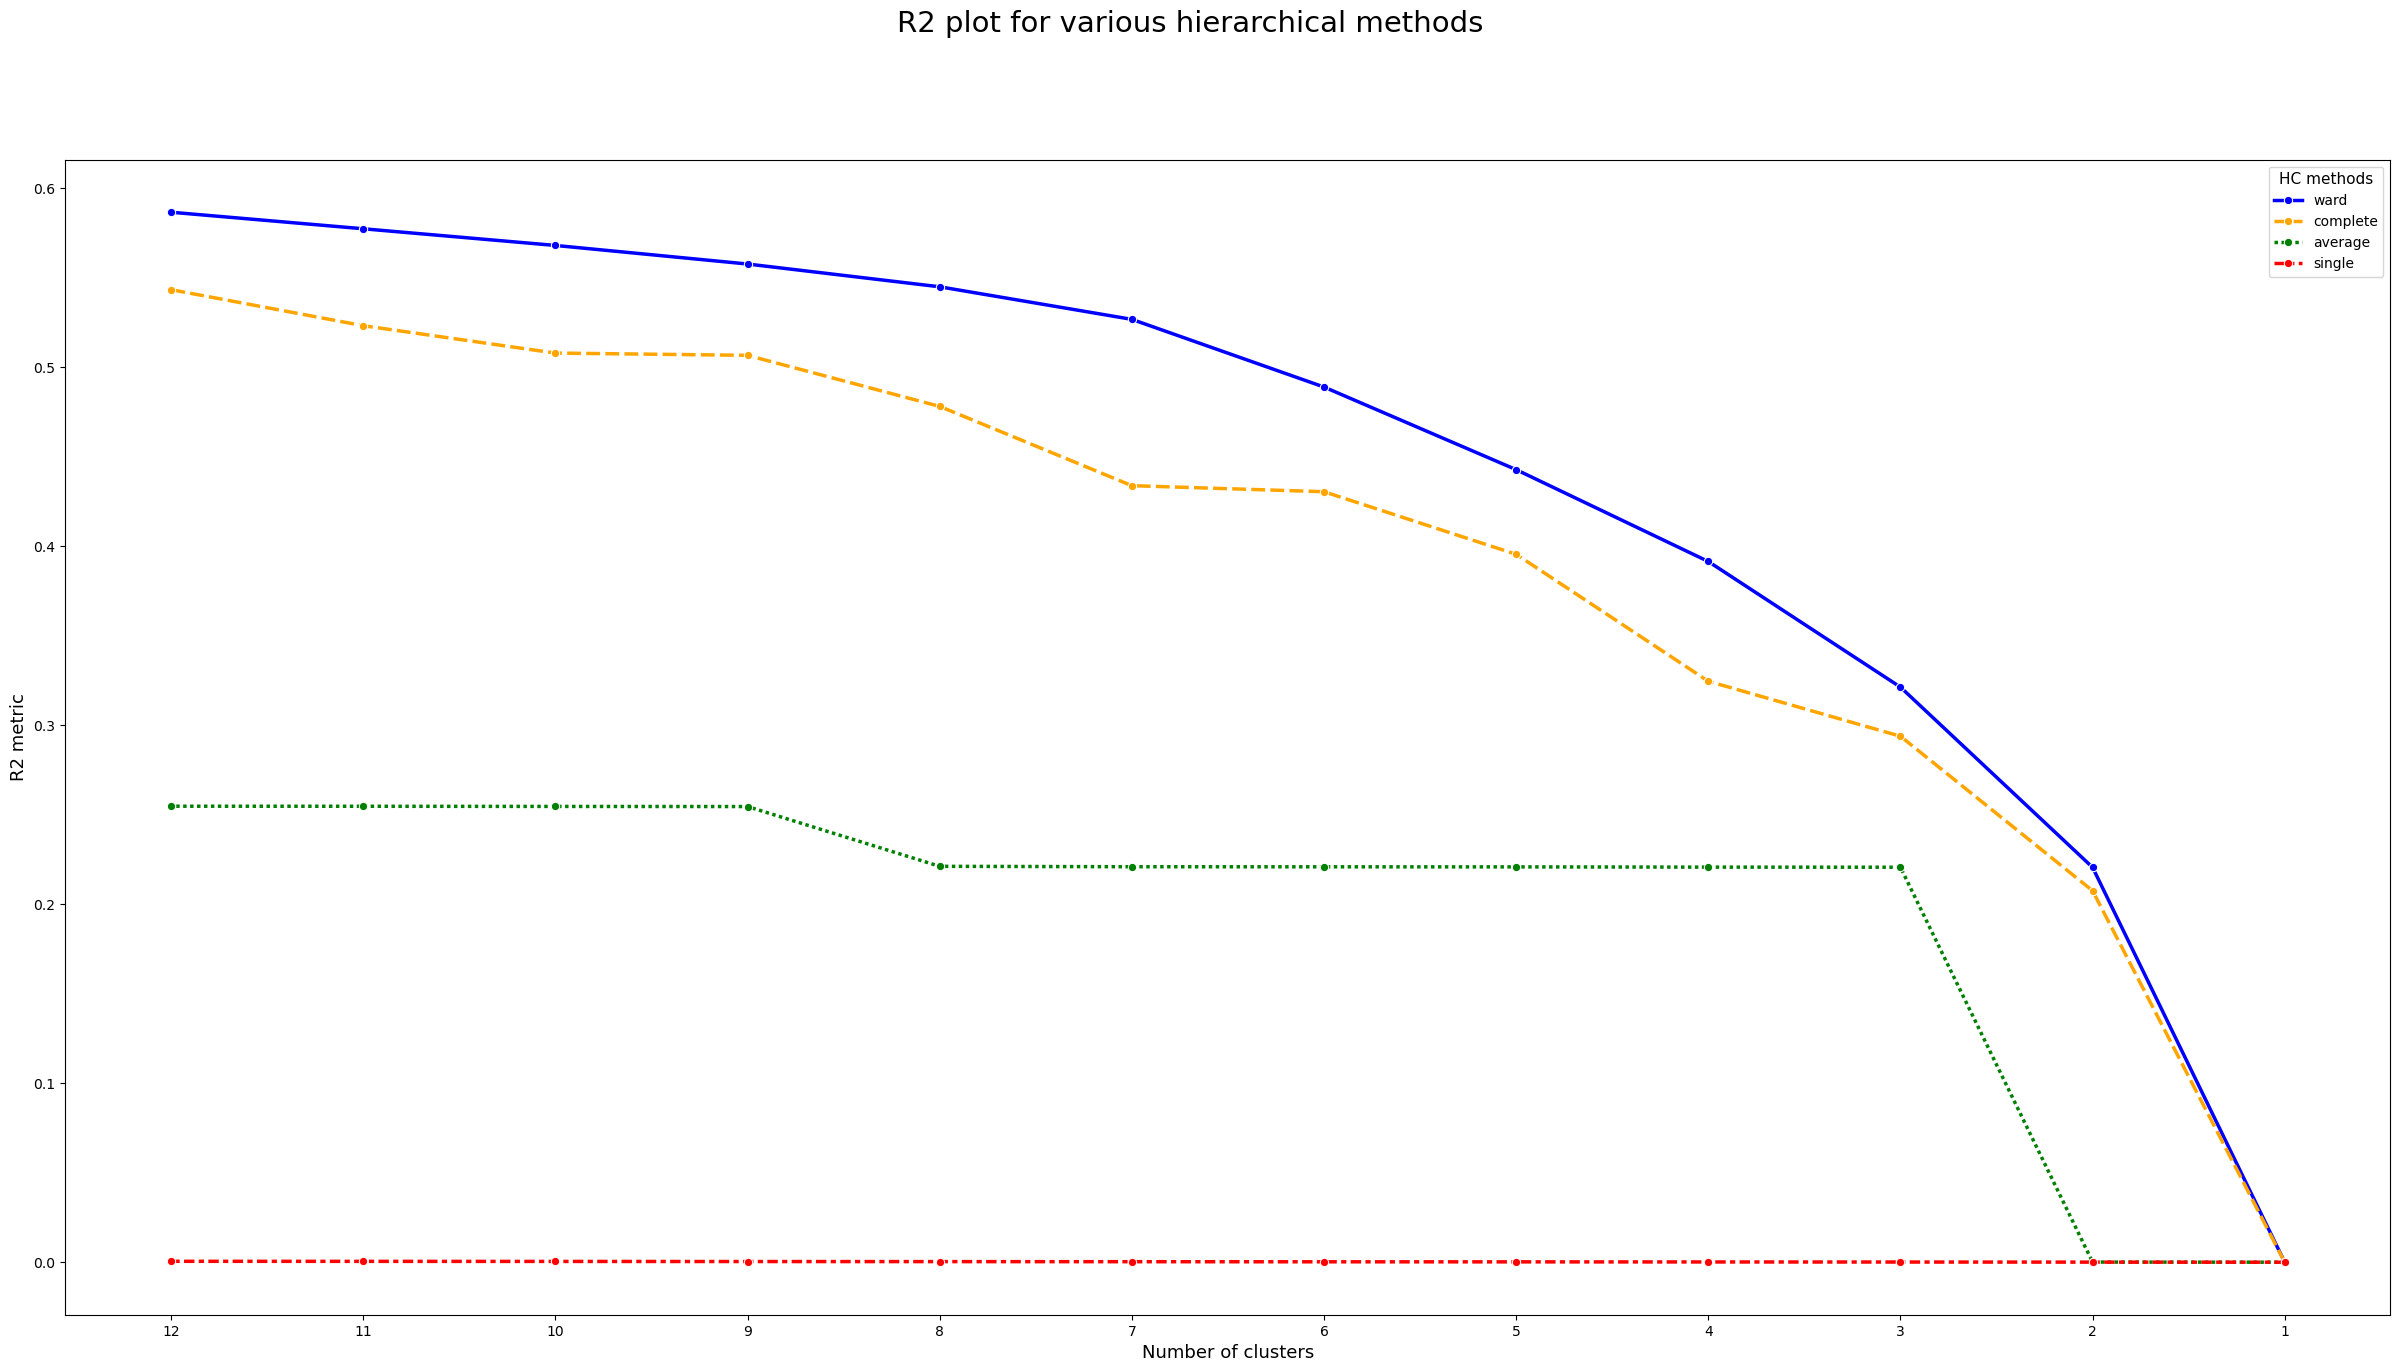

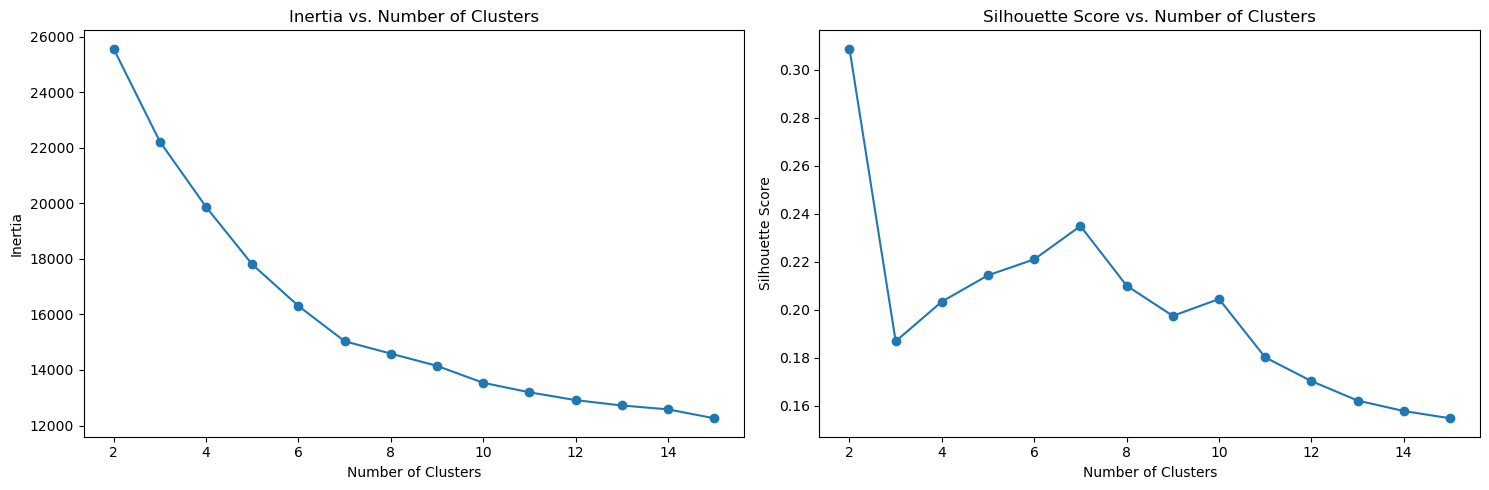

In [38]:
visualize_inertia_silhouette(persons_mm_scl)

In [15]:
kmeans = KMeans(n_clusters = 7, random_state = 0).fit(persons_mm_scl)
persons['mm_kmeans7'] = kmeans.predict(persons_mm_scl)

In [16]:
calculate_group_means(persons, 'mm_kmeans7')

mm_kmeans7                                             0            1  \
customer_age                                   55.743273    56.458385   
number_complaints                               0.515090     1.005981   
distinct_stores_visited                         1.225311     1.962505   
lifetime_spend_groceries                     3003.845552  4994.567036   
lifetime_spend_electronics                    406.370538  2084.267118   
typical_hour                                   13.702499     9.520563   
lifetime_spend_vegetables                     992.575783   310.385660   
lifetime_spend_nonalcohol_drinks              310.390308   591.284338   
lifetime_spend_alcohol_drinks                 142.995195   963.468430   
lifetime_spend_meat                            29.787754  1002.287003   
lifetime_spend_fish                            32.096925  1927.190242   
lifetime_spend_hygiene                        498.710324  1968.972325   
lifetime_spend_videogames                     214.606123   991.141451   
lifetime_spend_petfood                        502.123284  1924.621361   
lifetime_total_distinct_products              214.909116  1033.142476   
percentage_of_products_bought_promotion         0.200383     0.200274   
customer_tenure                                13.147721    15.886019   
latitude                                       38.747760    38.748063   
longitude                                      -9.156874    -9.156824   
percentage_lifetime_spend_groceries             0.488599     0.294380   
percentage_lifetime_spend_electronics           0.065341     0.120596   
percentage_lifetime_spend_vegetables            0.163433     0.019666   
percentage_lifetime_spend_nonalcohol_drinks     0.051258     0.036094   
percentage_lifetime_spend_alcohol_drinks        0.023200     0.058156   
percentage_lifetime_spend_meat                  0.004457     0.060765   
percentage_lifetime_spend_fish                  0.004752     0.116060   
percentage_lifetime_spend_hygiene               0.081971     0.119344   
percentage_lifetime_spend_videogames            0.035357     0.059998   
percentage_lifetime_spend_petfood               0.083317     0.115652   
nr_childs                                       1.445334     1.917410   
st_ward5                                        2.779654     0.978270   

mm_kmeans7                                              2             3  \
customer_age                                    55.200620     55.344727   
number_complaints                                0.501961      0.502218   
distinct_stores_visited                          1.395860      1.013326   
lifetime_spend_groceries                     13999.088820  10156.028564   
lifetime_spend_electronics                    8124.627029    160.292236   
typical_hour                                    13.620053     11.928528   
lifetime_spend_vegetables                      501.459329    199.632935   
lifetime_spend_nonalcohol_drinks               596.618822    498.813965   
lifetime_spend_alcohol_drinks                 1014.187489     40.315918   
lifetime_spend_meat                           2003.356374    202.021484   
lifetime_spend_fish                           3998.927777    202.759521   
lifetime_spend_hygiene                        1997.598942     79.510742   
lifetime_spend_videogames                     4003.763086      0.000000   
lifetime_spend_petfood                        3000.377895  10026.183594   
lifetime_total_distinct_products               100.644538     51.682373   
percentage_of_products_bought_promotion          0.069602      0.198673   
customer_tenure                                 12.861025     12.970215   
latitude                                        38.752052     38.748609   
longitude                                       -9.146056     -9.173751   
percentage_lifetime_spend_groceries              0.353654      0.460726   
percentage_lifetime_spend_electronics            0.201644      0.007842   
percentage_li

In [28]:
#check_for_karens(persons, 'mm_kmeans7',4)
#check_for_karens(persons, 'mm_kmeans7',5)
#check_for_karens(persons, 'mm_kmeans7',1)

0. **Vegetarians**

1. **Tech Enthusiasts + Karens**

2. **High Spenders**

3. **Pet Lovers**

4. **Large Families + Karens** 

5. **Promo Hunters + Karens**

6. **College Students**

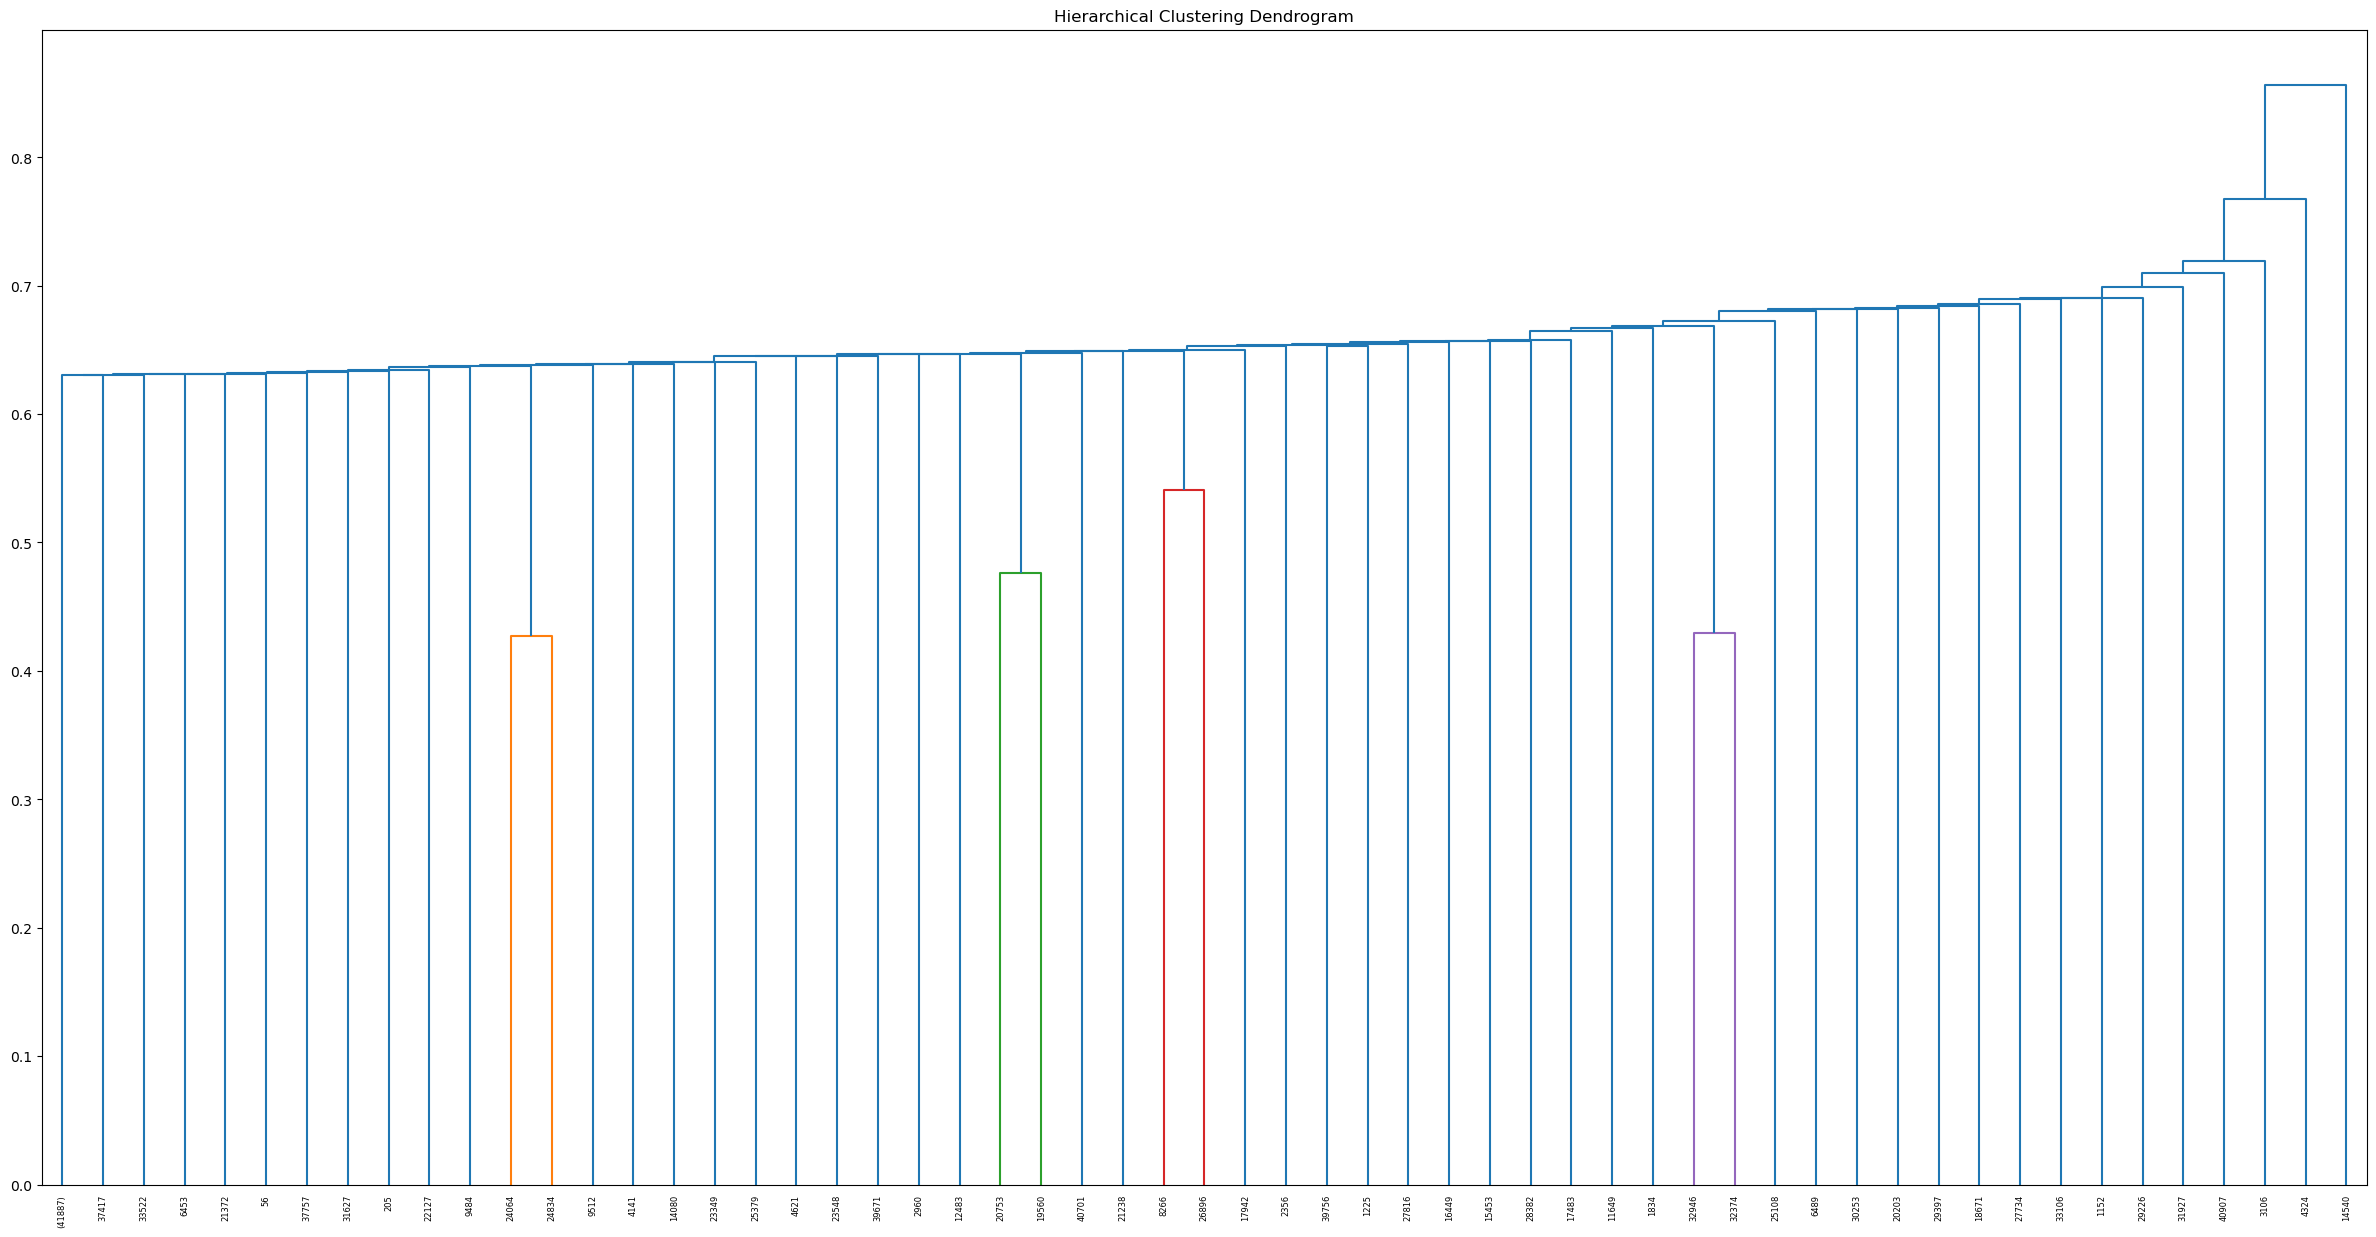

In [41]:
create_dendrogram(persons_mm_scl, 'single')

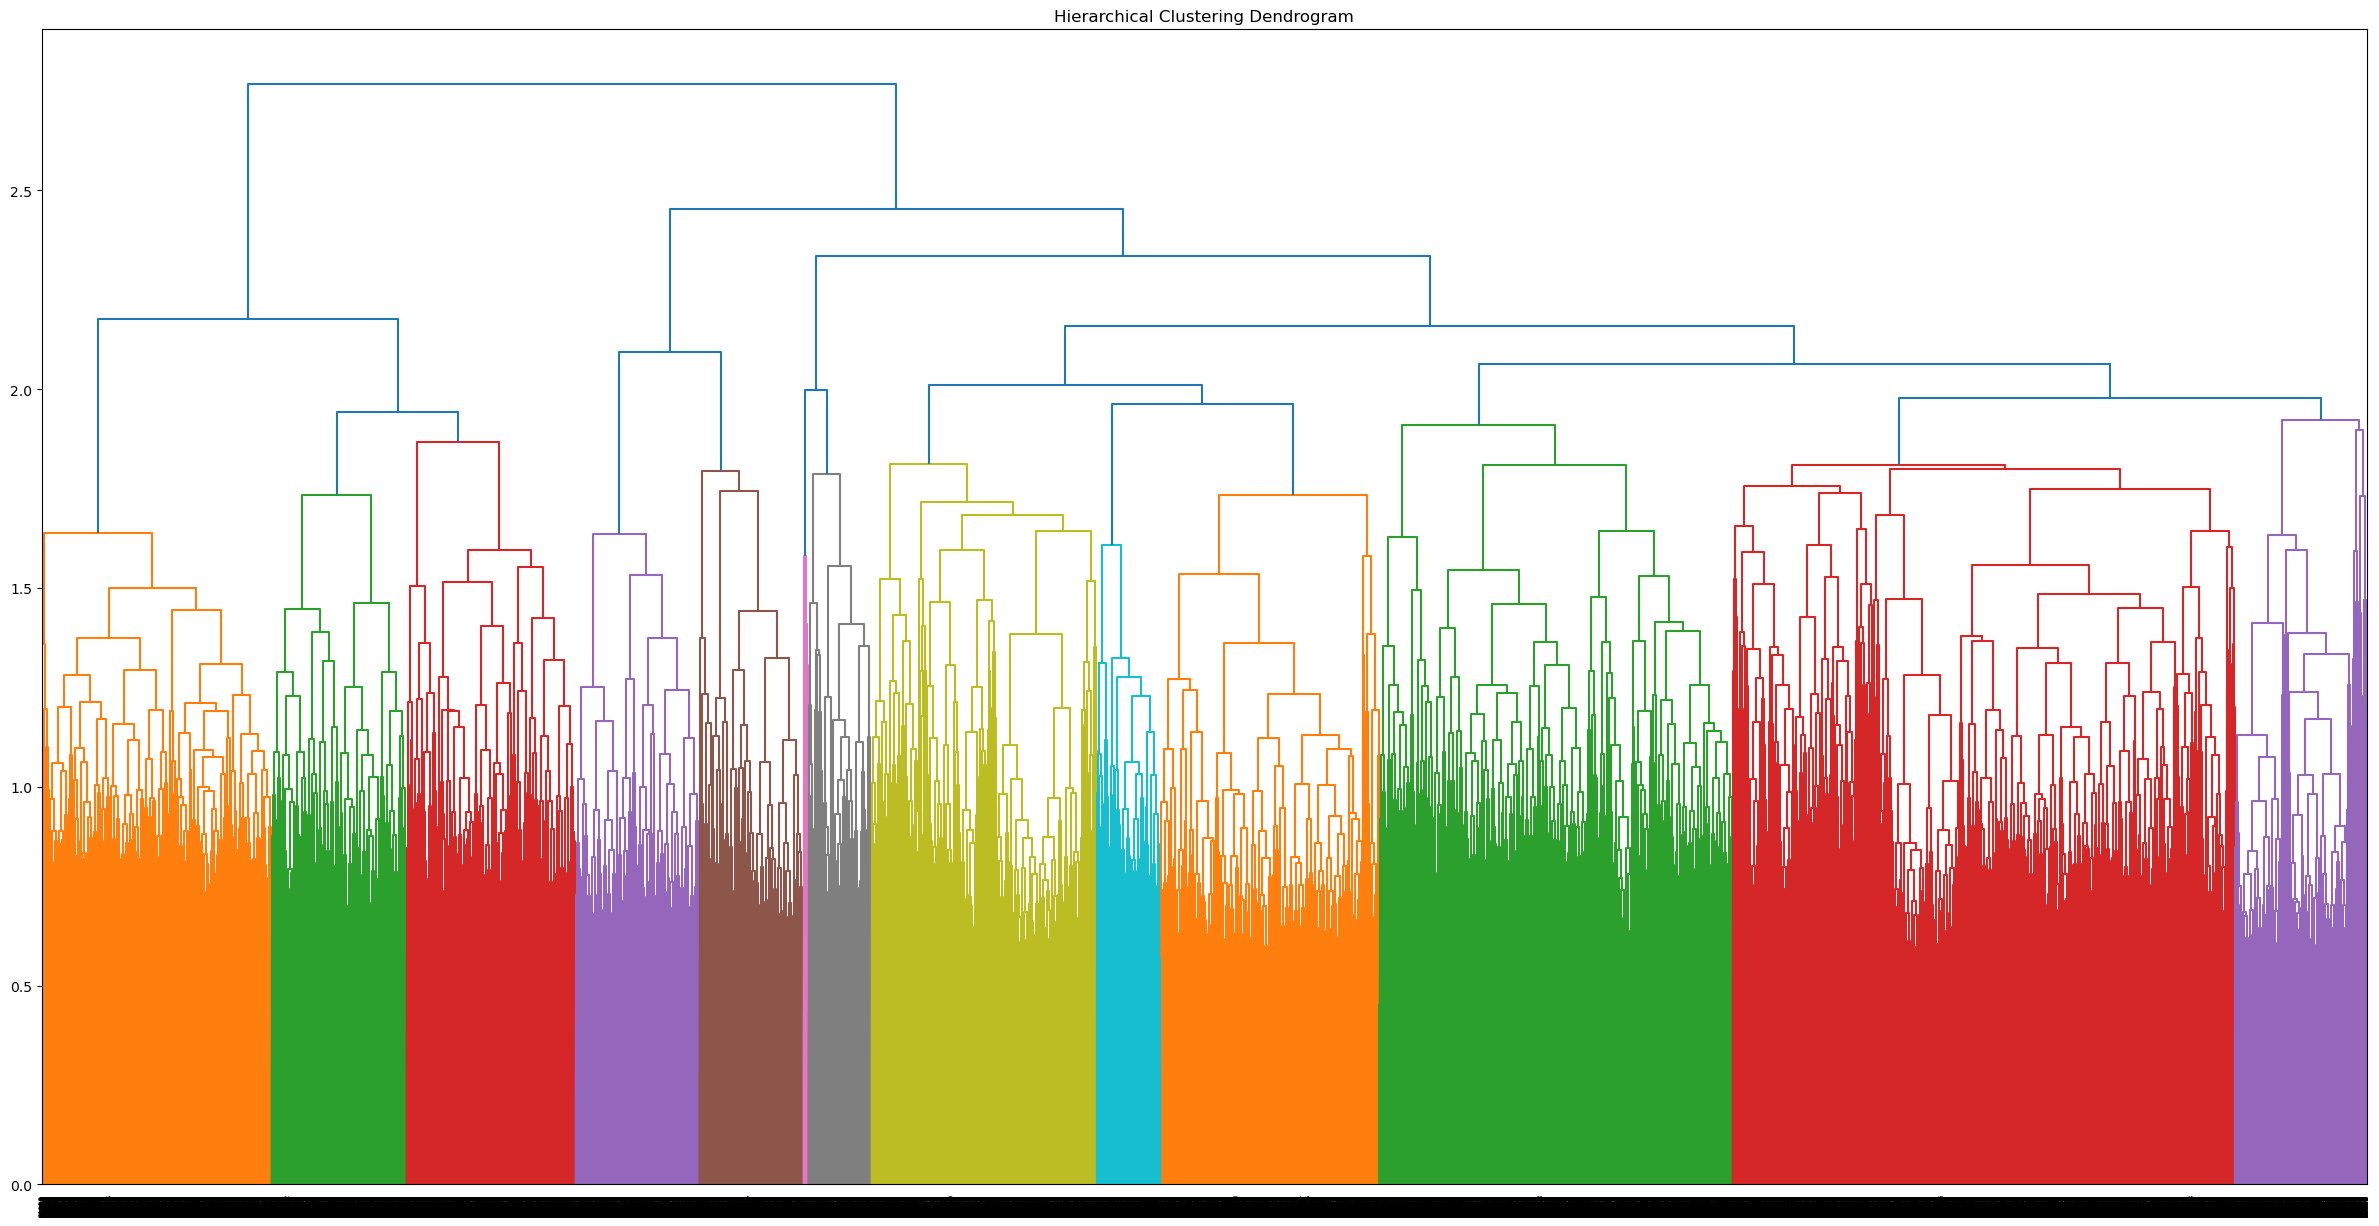

In [42]:
create_dendrogram(persons_mm_scl, 'complete')

In [43]:
create_dendrogram(persons_mm_scl, 'ward')

In [48]:
#persons['mm_ward8'] = AgglomerativeClustering(
    #linkage = 'ward', n_clusters = 8
    #).fit_predict(persons_mm_scl)

In [26]:
persons['mm_ward9'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 9
    ).fit_predict(persons_mm_scl)

In [46]:
#persons['mm_ward7'] = AgglomerativeClustering(
    #linkage = 'ward', n_clusters = 7
    #).fit_predict(persons_mm_scl)

In [53]:
#compare_cluster_solutions(persons, 'mm_ward8', 'mm_ward9')

In [99]:
calculate_group_means(persons, 'mm_ward9')

mm_ward9                                               0             1  \
customer_age                                   63.739191     55.200620   
number_complaints                               0.903401      0.501961   
distinct_stores_visited                         2.614954      1.395860   
lifetime_spend_groceries                     2017.359098  13999.088820   
lifetime_spend_electronics                    347.069984   8124.627029   
typical_hour                                   12.935038     13.620053   
lifetime_spend_vegetables                     346.755288    501.459329   
lifetime_spend_nonalcohol_drinks              377.249300    596.618822   
lifetime_spend_alcohol_drinks                 448.771851   1014.187489   
lifetime_spend_meat                           478.972162   2003.356374   
lifetime_spend_fish                           513.758320   3998.927777   
lifetime_spend_hygiene                        525.490358   1997.598942   
lifetime_spend_videogames                     426.319440   4003.763086   
lifetime_spend_petfood                        569.702333   3000.377895   
lifetime_total_distinct_products              412.719285    100.644538   
percentage_of_products_bought_promotion         0.352874      0.069602   
customer_tenure                                13.775117     12.861025   
latitude                                       38.745642     38.752052   
longitude                                      -9.158026     -9.146056   
percentage_lifetime_spend_groceries             0.324811      0.353654   
percentage_lifetime_spend_electronics           0.056009      0.201644   
percentage_lifetime_spend_vegetables            0.057408      0.013969   
percentage_lifetime_spend_nonalcohol_drinks     0.064149      0.015506   
percentage_lifetime_spend_alcohol_drinks        0.072446      0.026286   
percentage_lifetime_spend_meat                  0.080834      0.052038   
percentage_lifetime_spend_fish                  0.087272      0.104013   
percentage_lifetime_spend_hygiene               0.088308      0.051927   
percentage_lifetime_spend_videogames            0.072407      0.104150   
percentage_lifetime_spend_petfood               0.097651      0.078053   
nr_childs                                       1.644641      1.992887   

mm_ward9                                               2             3  \
customer_age                                   55.072296     55.317905   
number_complaints                               0.515182      0.501847   
distinct_stores_visited                         1.176668      1.013297   
lifetime_spend_groceries                     3054.525593  10149.512789   
lifetime_spend_electronics                    406.875072    160.365408   
typical_hour                                   13.711828     11.930633   
lifetime_spend_vegetables                     987.441910    199.739220   
lifetime_spend_nonalcohol_drinks              300.773424    498.760780   
lifetime_spend_alcohol_drinks                 120.382157     40.292326   
lifetime_spend_meat                             4.181029    201.883313   
lifetime_spend_fish                             4.434789    202.722290   
lifetime_spend_hygiene                        500.611914     79.507917   
lifetime_spend_videogames                     203.203586      0.000000   
lifetime_spend_petfood                        502.138664  10008.921072   
lifetime_total_distinct_products              203.383025     51.678928   
percentage_of_products_bought_promotion         0.202071      0.198647   
customer_tenure                                12.934500     12.956638   
latitude                                       38.748048     38.748611   
longitude                                      -9.156836     -9.173722   
percentage_lifetime_spend_groceries             0.501461      0.461148   
percentage_lifetime_spend_electronics           0.065616      0.007865   
percentage_lifetime_spend_vegetables            0.163244      0.010089   
per

In [102]:
#check_for_karens(persons, "mm_ward9", 0)

0. **Karens**

1. **High Spenders**

2. **Vegetarians**

3. **Petlovers**

5. **Tech Enthusiasts**

6. **Demanding Foodies**

7. **Large Families**

8. **College Students**

9. **Promo Hunters**

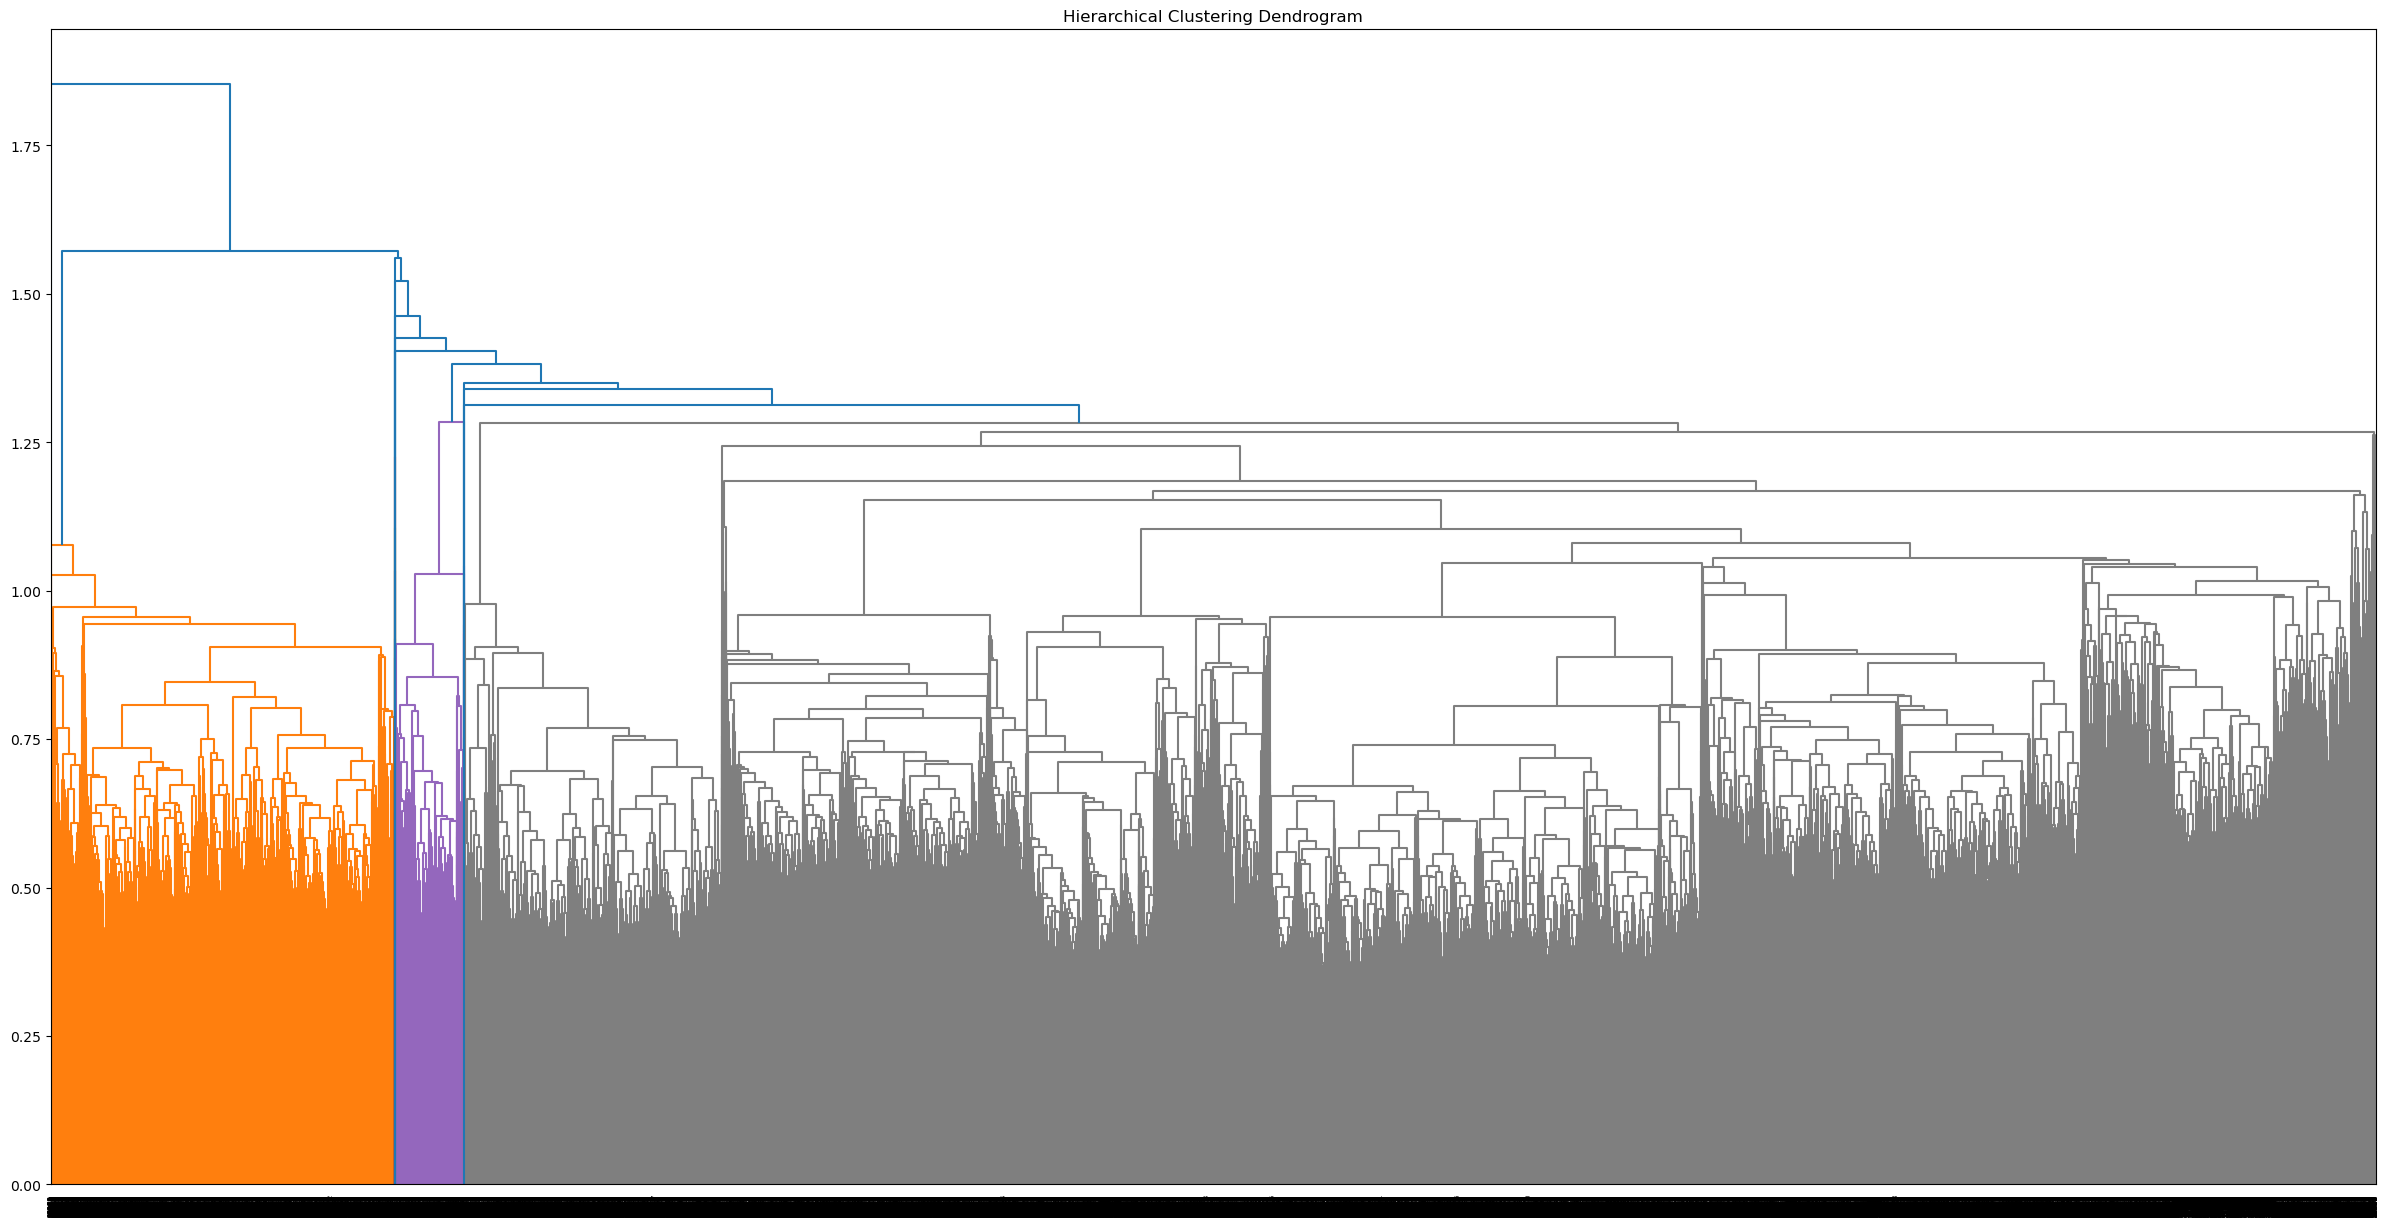

In [51]:
create_dendrogram(persons_mm_scl, 'average')

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **Robust**

In [32]:
plot_r2_hc(persons_rb_scl, max_nclus=12)

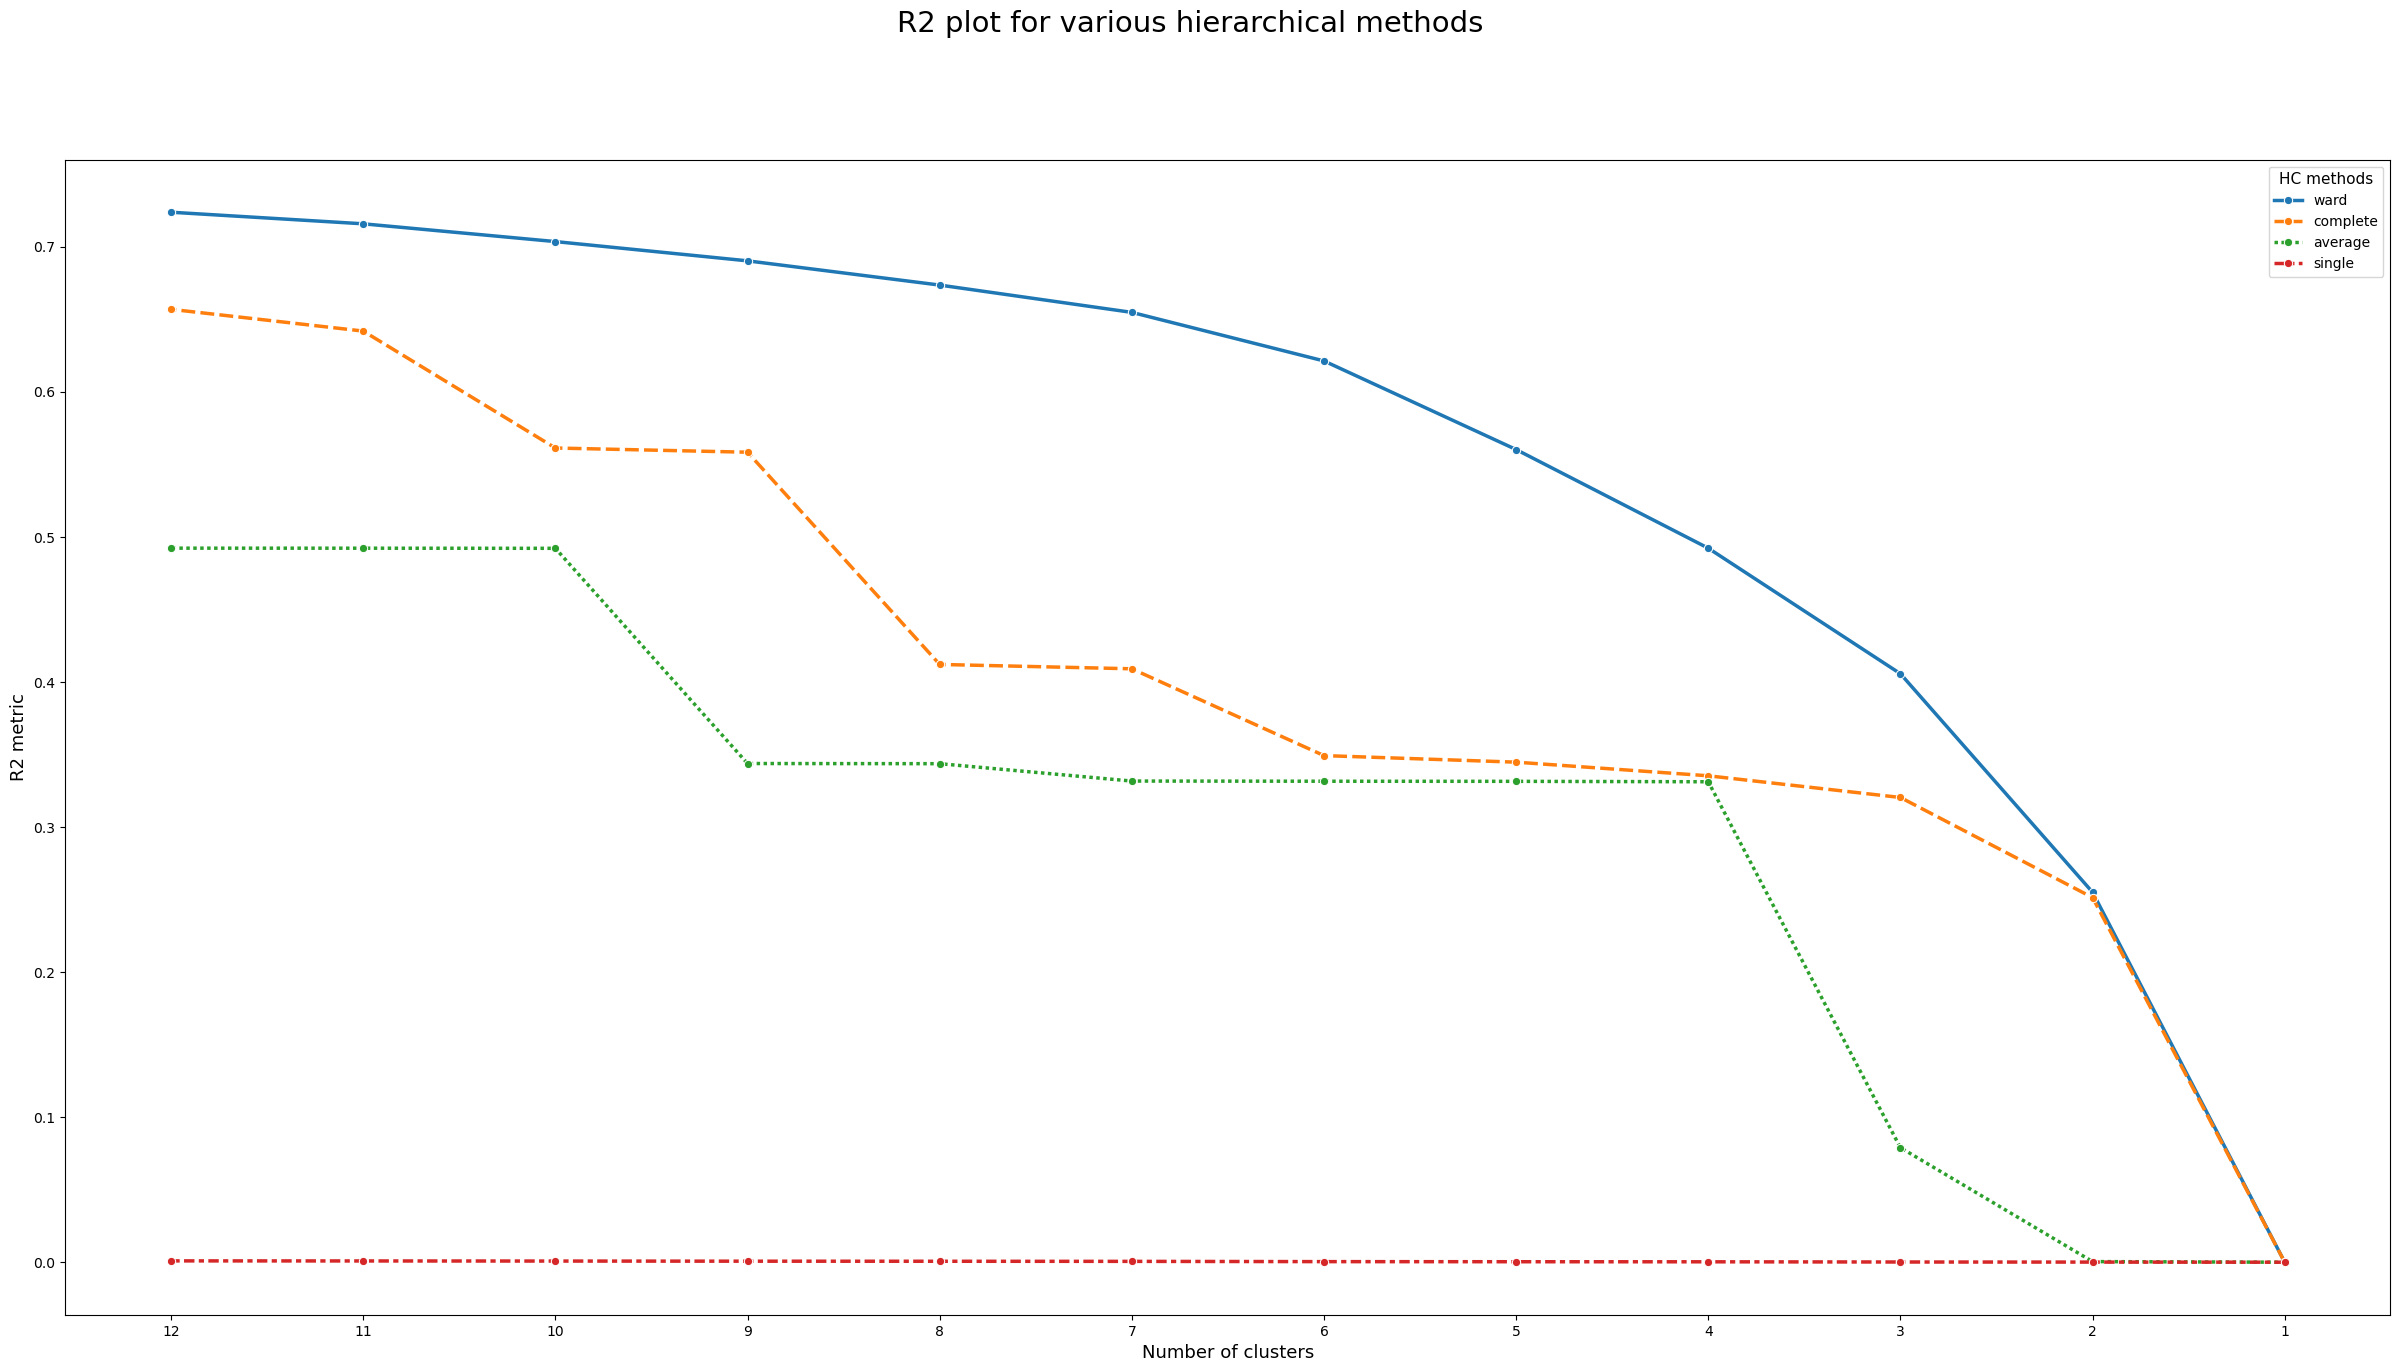

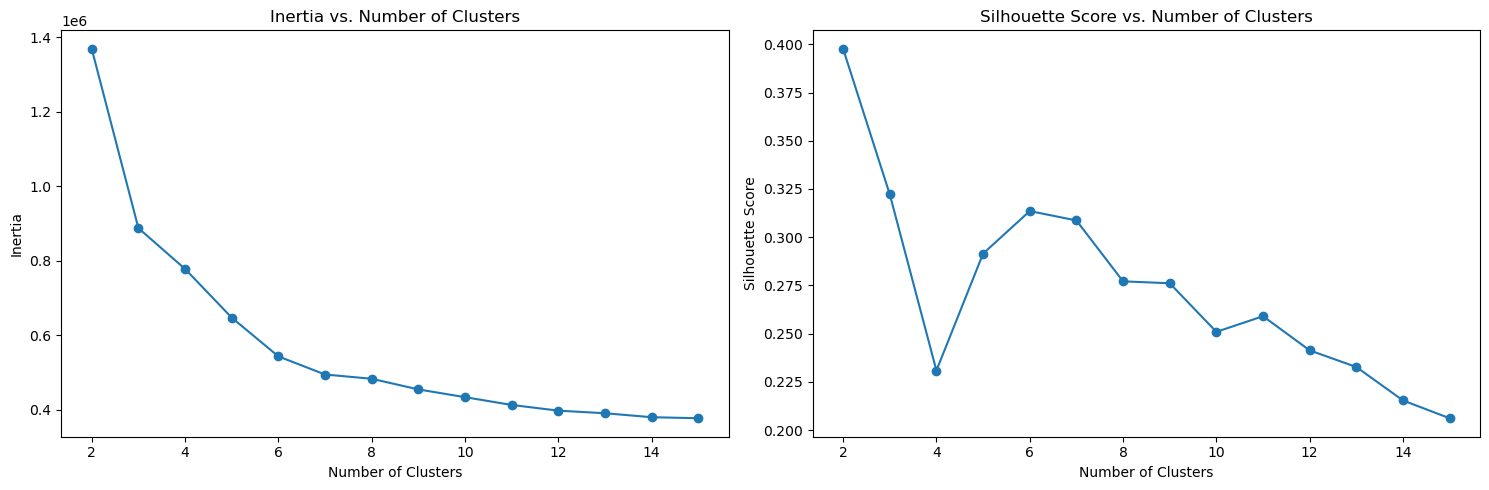

In [52]:
visualize_inertia_silhouette(persons_rb_scl)

In [63]:
kmeans = KMeans(n_clusters = 6, random_state = 0).fit(persons_rb_scl)
persons['rb_kmeans6'] = kmeans.predict(persons_rb_scl)

In [54]:
#clusters_comparison(persons, 'rb_kmeans7', 'mm_ward6')

In [64]:
calculate_group_means(persons, 'rb_kmeans6')

rb_kmeans6                                             0            1  \
customer_age                                   54.968762    54.819455   
number_complaints                               0.514626     0.906597   
distinct_stores_visited                         1.236300     2.782306   
lifetime_spend_groceries                     2977.064328  2291.112346   
lifetime_spend_electronics                    412.580146   315.140567   
typical_hour                                   13.747518    12.675126   
lifetime_spend_vegetables                     991.588253   249.989881   
lifetime_spend_nonalcohol_drinks              312.676903   351.484554   
lifetime_spend_alcohol_drinks                 141.790602   310.075788   
lifetime_spend_meat                            45.328921   463.441368   
lifetime_spend_fish                            48.352879   536.162694   
lifetime_spend_hygiene                        500.199338   524.154890   
lifetime_spend_videogames                     221.509067   437.520684   
lifetime_spend_petfood                        501.720450   643.264671   
lifetime_total_distinct_products              218.536201   396.746446   
percentage_of_products_bought_promotion         0.201640     0.434047   
customer_tenure                                12.879682    12.838375   
latitude                                       38.747689    38.747740   
longitude                                      -9.156835    -9.156882   
percentage_lifetime_spend_groceries             0.482449     0.364512   
percentage_lifetime_spend_electronics           0.066043     0.048029   
percentage_lifetime_spend_vegetables            0.163315     0.041432   
percentage_lifetime_spend_nonalcohol_drinks     0.051542     0.059929   
percentage_lifetime_spend_alcohol_drinks        0.023052     0.053686   
percentage_lifetime_spend_meat                  0.006856     0.076917   
percentage_lifetime_spend_fish                  0.007289     0.089364   
percentage_lifetime_spend_hygiene               0.082087     0.088134   
percentage_lifetime_spend_videogames            0.036390     0.072954   
percentage_lifetime_spend_petfood               0.082986     0.106183   
nr_childs                                       1.451732     1.546348   
st_ward5                                        2.719788     0.076857   
mm_kmeans7                                      0.273991     4.977980   
no_ward4                                        2.928127     2.775414   
no_kmeans4                                      0.016413     0.076644   
mm_ward9                                        1.911317     3.716729   

rb_kmeans6                                             2             3  \
customer_age                                   55.253726     55.200620   
number_complaints                               1.001762      0.501961   
distinct_stores_visited                         1.133816      1.395860   
lifetime_spend_groceries                     5044.865684  13999.088820   
lifetime_spend_electronics                   2025.322031   8124.627029   
typical_hour                                   17.492444     13.620053   
lifetime_spend_vegetables                     497.196642    501.459329   
lifetime_spend_nonalcohol_drinks              501.436364    596.618822   
lifetime_spend_alcohol_drinks                 302.003604   1014.187489   
lifetime_spend_meat                          1005.816052   2003.356374   
lifetime_spend_fish                          1015.251925   3998.927777   
lifetime_spend_hygiene                       1005.806716   1997.598942   
lifetime_spend_videogames                     999.331368   4003.763086   
lifetime_spend_petfood                       1003.075020   3000.377895   
lifetime_total_distinct_products              515.903358    100.644538   
percentage_of_products_bought_promotion         0.199255      0.069602   
customer_tenure                                12.923833     12.861025   
latitude                               

In [79]:
#check_for_karens(persons,'rb_kmeans6',1)
#check_for_karens(persons,'rb_kmeans6',2)
#check_for_karens(persons,'rb_kmeans6',5)

0. **Vegetarians**

1. **Promo Hunters**

2. **Tech Enthusiasts**

3. **High Spenders**

4. **Pet Lovers**

5. **Demanding Foodies**

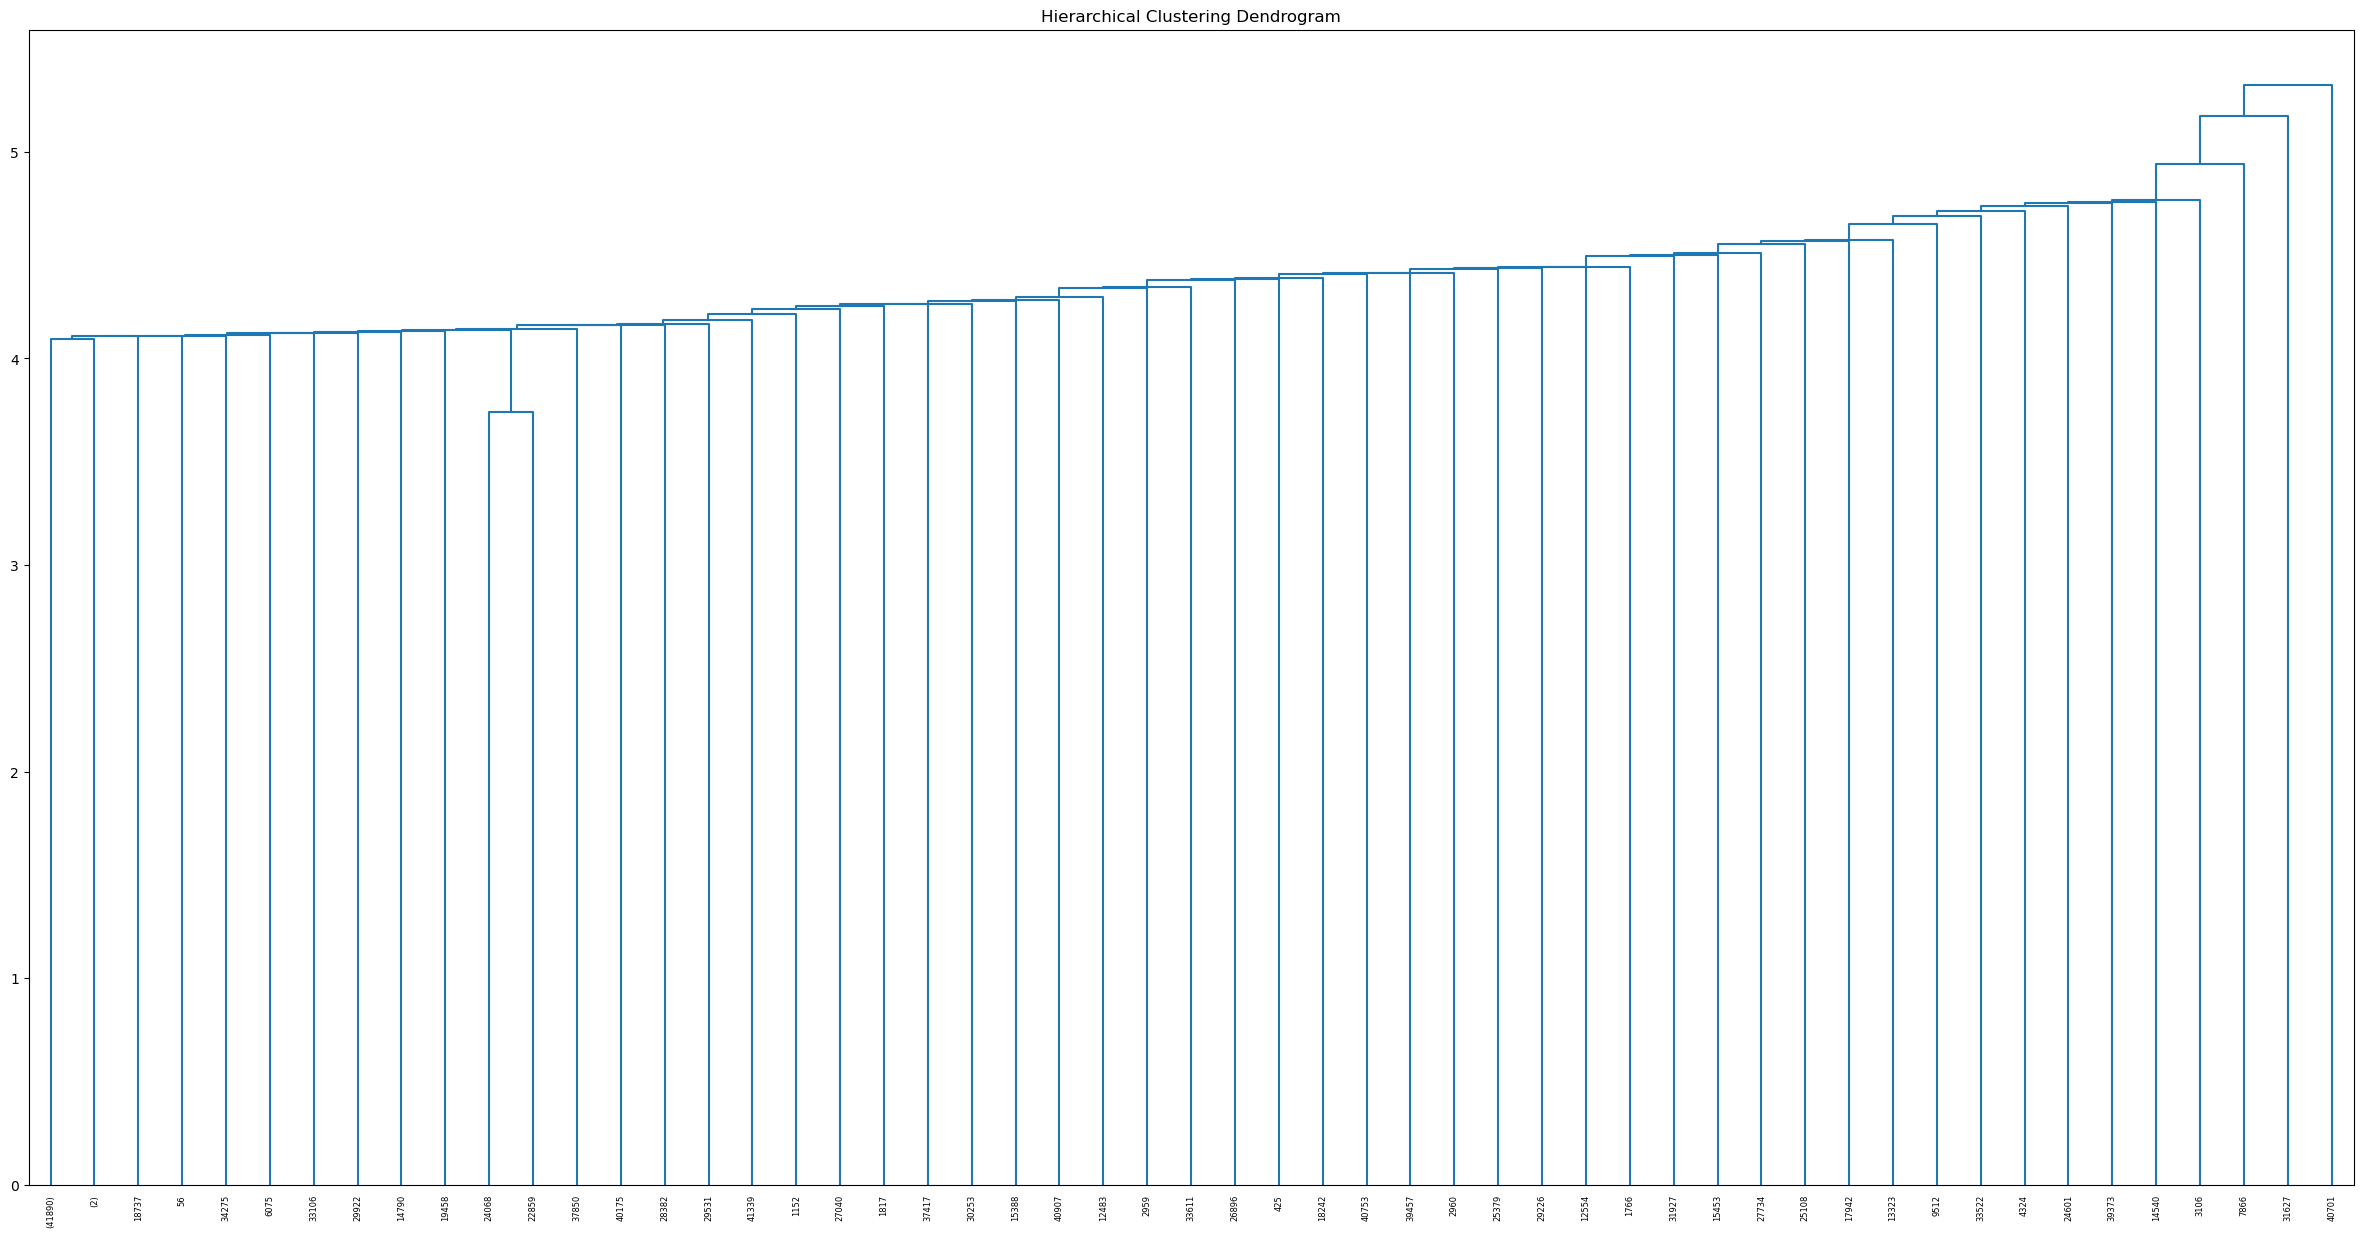

In [56]:
create_dendrogram(persons_rb_scl, 'single')

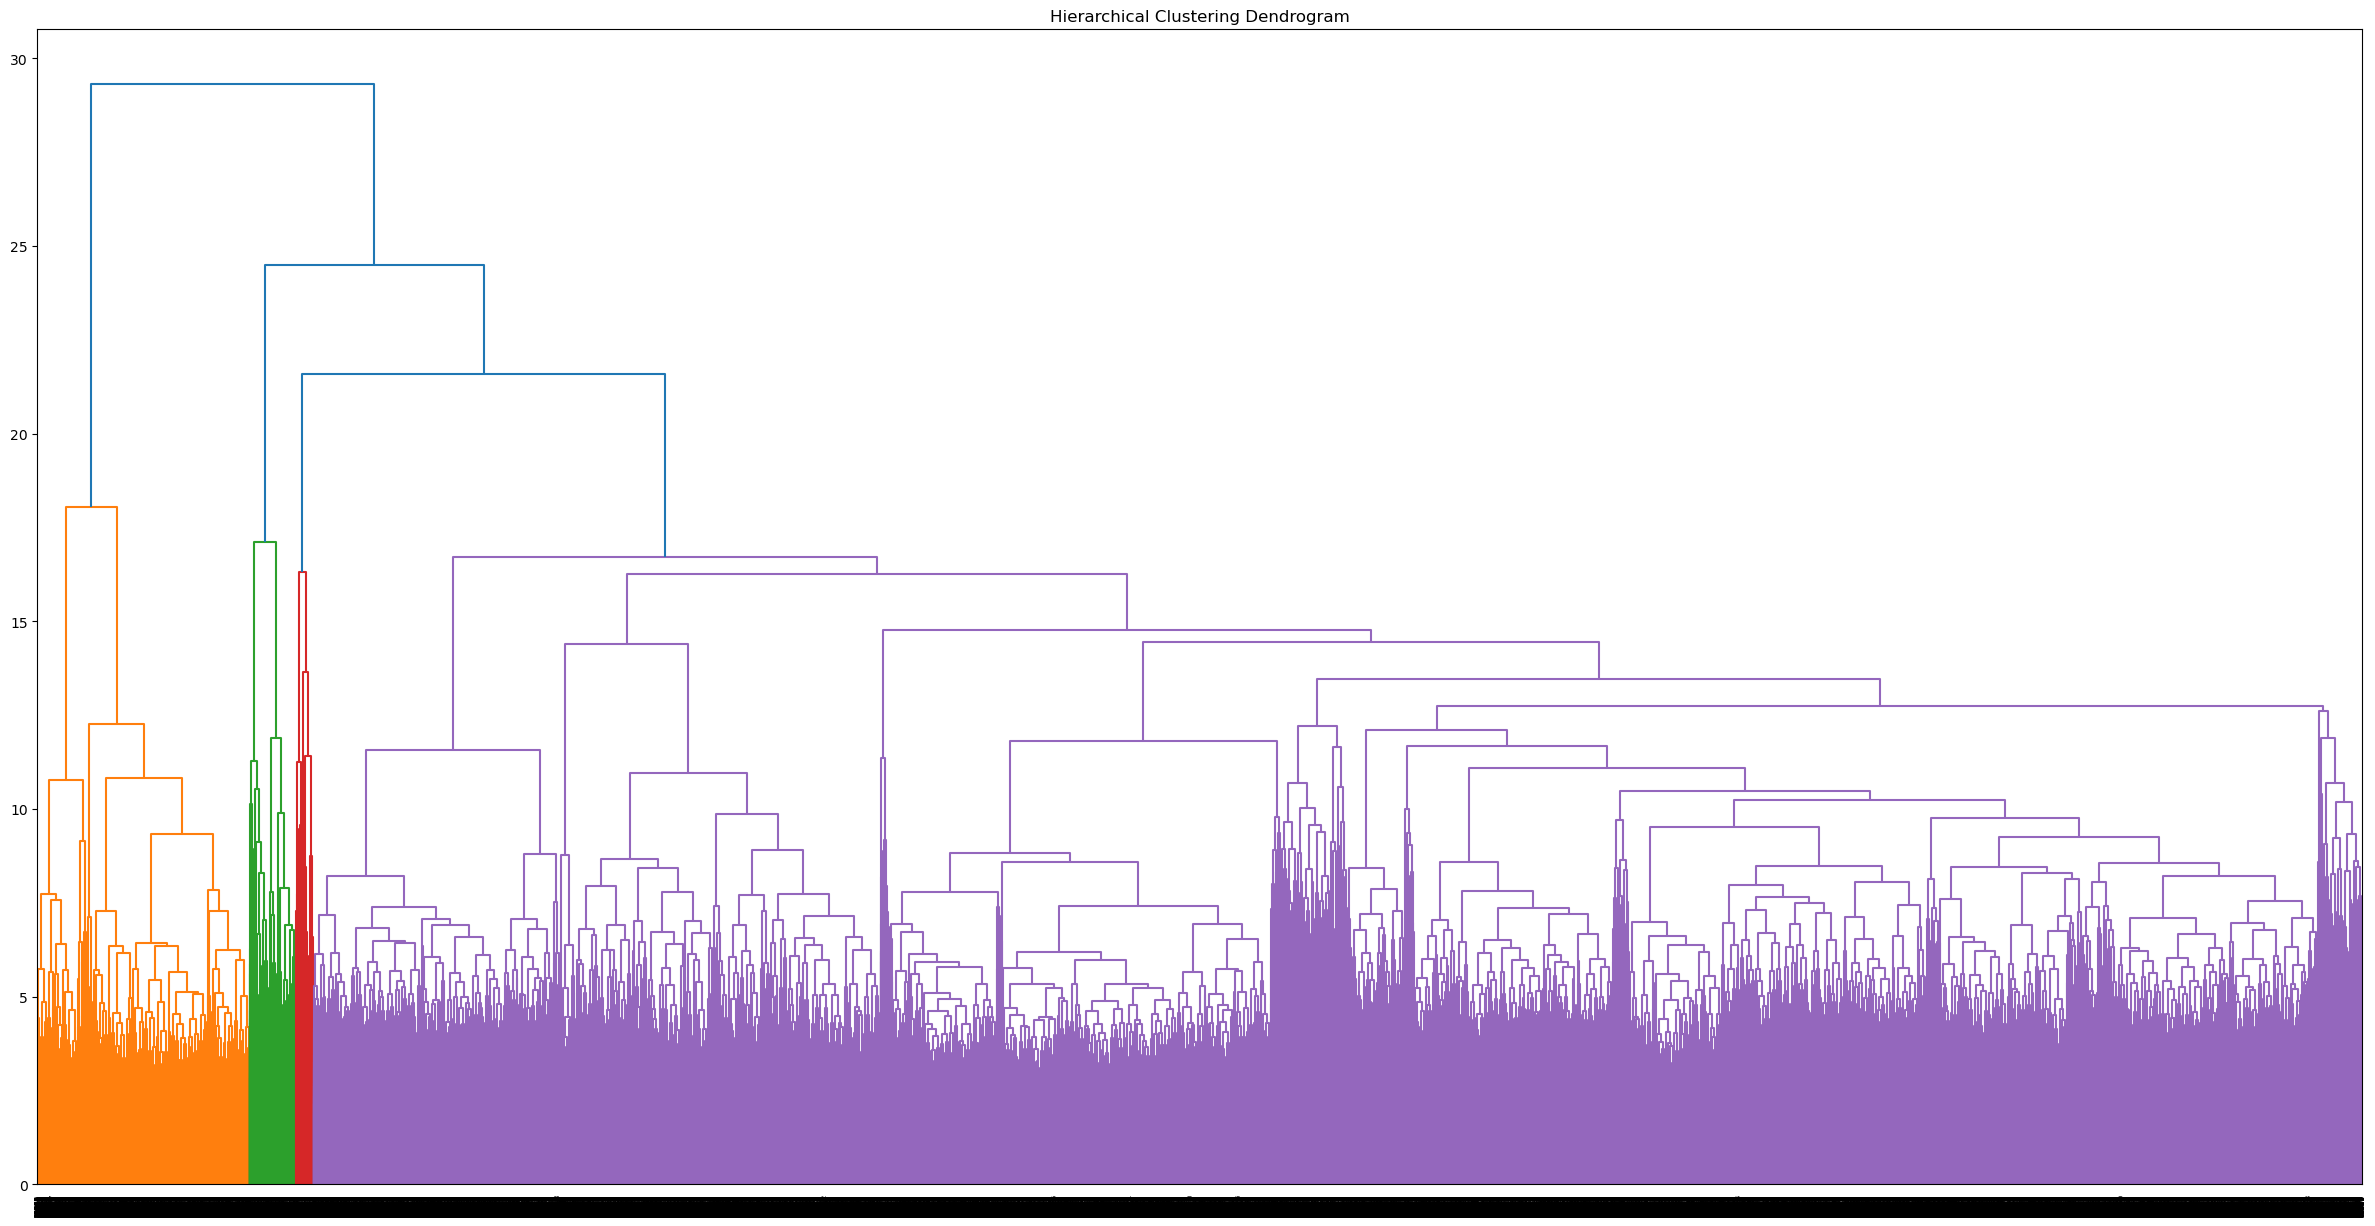

In [57]:
create_dendrogram(persons_rb_scl, 'complete')

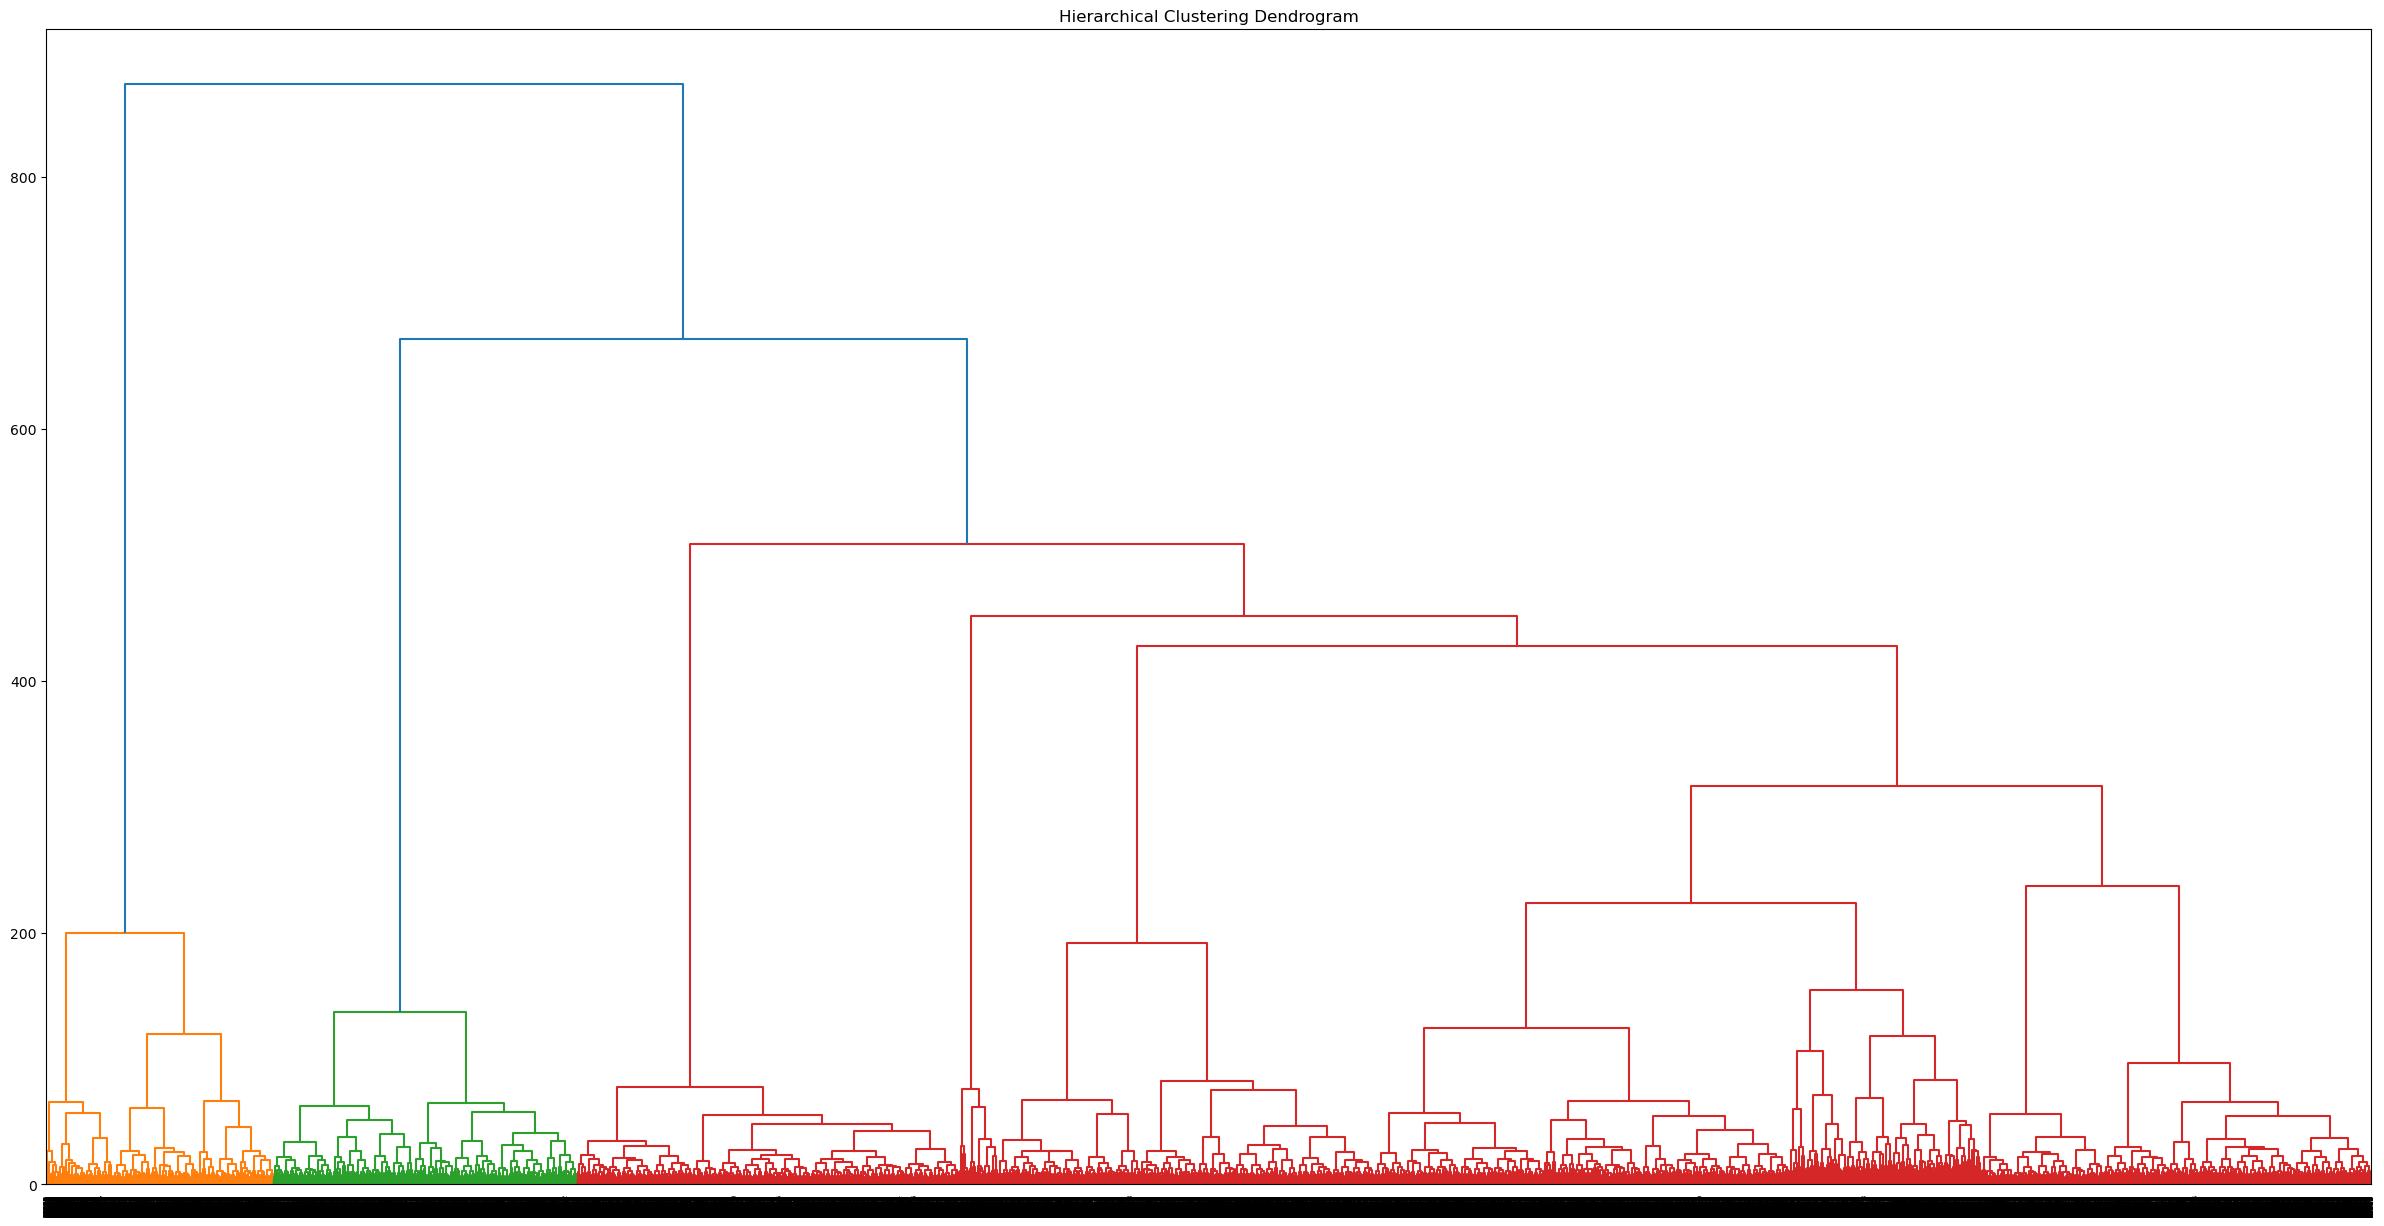

In [58]:
create_dendrogram(persons_rb_scl, 'ward')

In [91]:
#persons['rb_ward7'] = AgglomerativeClustering(
    #linkage = 'ward', n_clusters = 7
    #).fit_predict(persons_rb_scl)

persons['rb_ward8'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 8
    ).fit_predict(persons_rb_scl)

In [8]:
persons['rb_ward9'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 9
    ).fit_predict(persons_rb_scl)

In [92]:
calculate_group_means(persons, 'rb_ward8')

rb_ward8                                               0             1  \
customer_age                                   54.204452     55.309472   
number_complaints                               0.881598      0.501846   
distinct_stores_visited                         2.654011      1.013290   
lifetime_spend_groceries                     2009.382903  10149.565376   
lifetime_spend_electronics                    310.929568    160.342099   
typical_hour                                   12.924319     11.930850   
lifetime_spend_vegetables                     301.453776    199.745922   
lifetime_spend_nonalcohol_drinks              363.903658    498.762844   
lifetime_spend_alcohol_drinks                 421.261929     40.293158   
lifetime_spend_meat                           443.742907    201.854395   
lifetime_spend_fish                           503.065961    202.775505   
lifetime_spend_hygiene                        516.756135     79.507913   
lifetime_spend_videogames                     415.374327      0.000000   
lifetime_spend_petfood                        562.947085  10004.434380   
lifetime_total_distinct_products              396.830855     51.694911   
percentage_of_products_bought_promotion         0.393985      0.198677   
customer_tenure                                12.487091     12.957390   
latitude                                       38.746972     38.748623   
longitude                                      -9.157181     -9.173711   
percentage_lifetime_spend_groceries             0.337415      0.461325   
percentage_lifetime_spend_electronics           0.052626      0.007866   
percentage_lifetime_spend_vegetables            0.050758      0.010092   
percentage_lifetime_spend_nonalcohol_drinks     0.063857      0.024572   
percentage_lifetime_spend_alcohol_drinks        0.071843      0.001982   
percentage_lifetime_spend_meat                  0.076439      0.009965   
percentage_lifetime_spend_fish                  0.087435      0.010014   
percentage_lifetime_spend_hygiene               0.089953      0.003915   
percentage_lifetime_spend_videogames            0.072396      0.000000   
percentage_lifetime_spend_petfood               0.098553      0.470743   
nr_childs                                       1.560286      0.071037   
st_ward5                                        0.010036      1.999513   
mm_kmeans7                                      4.833683      2.999270   
no_ward4                                        2.834504      1.994887   
no_kmeans4                                      0.028191      1.919893   
mm_ward9                                        3.266855      3.002435   
rb_kmeans6                                      1.490101      3.941320   
rb_ward7                                        2.000000      1.000000   

rb_ward8                                               2            3  \
customer_age                                   55.176497    55.049826   
number_complaints                               0.995651     0.514672   
distinct_stores_visited                         1.129821     1.174257   
lifetime_spend_groceries                     5043.682247  3055.219494   
lifetime_spend_electronics                   2022.628723   406.774550   
typical_hour                                   17.506321    13.727302   
lifetime_spend_vegetables                     498.175354   985.560757   
lifetime_spend_nonalcohol_drinks              501.120171   300.695235   
lifetime_spend_alcohol_drinks                 300.997346   117.544596   
lifetime_spend_meat                          1005.343704     2.564788   
lifetime_spend_fish                          1012.153789     3.348489   
lifetime_spend_hygiene                       1002.437334   500.892650   
lifetime_spend_videogames                     999.750958   202.389309   
lifetime_spend_petfood                        999.929814   500.882772   
lifetime_total_distinct_products              513.427750   201.803457   
percentage_of_produ

In [105]:
#check_for_karens(persons,'rb_ward7',2)

0. **Promo Hunters**

1. **Pet Lovers**

2. **Karens + Large Families**

3. **Vegetarians**

4. **College Students**

5. **High Spenders**

6. **Demanding Foodies**

7. **Tech Lovers**

In [47]:
calculate_group_means(persons, 'rb_ward9')

rb_ward9                                                0            1  \
customer_age                                    55.309472    52.199193   
number_complaints                                0.501846     0.697772   
distinct_stores_visited                          1.013290     1.980412   
lifetime_spend_groceries                     10149.565376  1787.441914   
lifetime_spend_electronics                     160.342099   508.091669   
typical_hour                                    11.930850    14.261578   
lifetime_spend_vegetables                      199.745922   498.746685   
lifetime_spend_nonalcohol_drinks               498.762844   501.522629   
lifetime_spend_alcohol_drinks                   40.293158   678.870280   
lifetime_spend_meat                            201.854395   511.132315   
lifetime_spend_fish                            202.775505   500.844912   
lifetime_spend_hygiene                          79.507913   550.899971   
lifetime_spend_videogames                        0.000000   439.705967   
lifetime_spend_petfood                       10004.434380   482.432690   
lifetime_total_distinct_products                51.694911   381.277602   
percentage_of_products_bought_promotion          0.198677     0.208386   
customer_tenure                                 12.957390    11.524935   
latitude                                        38.748623    38.745401   
longitude                                       -9.173711    -9.158050   
percentage_lifetime_spend_groceries              0.461325     0.248967   
percentage_lifetime_spend_electronics            0.007866     0.081337   
percentage_lifetime_spend_vegetables             0.010092     0.079520   
percentage_lifetime_spend_nonalcohol_drinks      0.024572     0.083753   
percentage_lifetime_spend_alcohol_drinks         0.001982     0.108922   
percentage_lifetime_spend_meat                   0.009965     0.081631   
percentage_lifetime_spend_fish                   0.010014     0.080192   
percentage_lifetime_spend_hygiene                0.003915     0.089112   
percentage_lifetime_spend_videogames             0.000000     0.071808   
percentage_lifetime_spend_petfood                0.470743     0.076936   
nr_childs                                        0.071037     1.583995   
mm_ward9                                         3.002435     1.779187   
no_ward9                                         2.157536     2.108677   

rb_ward9                                               2            3  \
customer_age                                   55.176497    55.132942   
number_complaints                               0.995651     0.966715   
distinct_stores_visited                         1.129821     2.965905   
lifetime_spend_groceries                     5043.682247  2112.147624   
lifetime_spend_electronics                   2022.628723   219.638147   
typical_hour                                   17.506321    12.305132   
lifetime_spend_vegetables                     498.175354   210.101786   
lifetime_spend_nonalcohol_drinks              501.120171   300.182328   
lifetime_spend_alcohol_drinks                 300.997346   301.982248   
lifetime_spend_meat                          1005.343704   412.539776   
lifetime_spend_fish                          1012.153789   504.094367   
lifetime_spend_hygiene                       1002.437334   500.946610   
lifetime_spend_videogames                     999.750958   404.108115   
lifetime_spend_petfood                        999.929814   600.227443   
lifetime_total_distinct_products              513.427750   404.032435   
percentage_of_products_bought_promotion         0.199850     0.479923   
customer_tenure                                12.892657    12.932595   
latitude                                       38.749675    38.747700   
longitude                                      -9.155801    -9.156779   
percentage_lifetime_spend_groceries             0.376524     0.378369   
percentage_lifetime_spen

In [121]:
#check_for_karens(persons, 'rb_ward9',1)

0. **Pet Lovers**

1. **Karens**

2. **Large Families**

3. **Promo Hunters**

4. **College Students**

5. **High Spenders**

6. **Demanding Foodies**

7. **Tech Lovers**

8. **Vegetarians**

_________________________________________________________________________________________________________________________________________________________________________________

## **Final Clustering Solutions without Fishy Data**

In [27]:
calculate_group_means(persons, 'mm_ward9')

mm_ward9                                               0             1  \
customer_age                                   63.739191     55.200620   
number_complaints                               0.903401      0.501961   
distinct_stores_visited                         2.614954      1.395860   
lifetime_spend_groceries                     2017.359098  13999.088820   
lifetime_spend_electronics                    347.069984   8124.627029   
typical_hour                                   12.935038     13.620053   
lifetime_spend_vegetables                     346.755288    501.459329   
lifetime_spend_nonalcohol_drinks              377.249300    596.618822   
lifetime_spend_alcohol_drinks                 448.771851   1014.187489   
lifetime_spend_meat                           478.972162   2003.356374   
lifetime_spend_fish                           513.758320   3998.927777   
lifetime_spend_hygiene                        525.490358   1997.598942   
lifetime_spend_videogames                     426.319440   4003.763086   
lifetime_spend_petfood                        569.702333   3000.377895   
lifetime_total_distinct_products              412.719285    100.644538   
percentage_of_products_bought_promotion         0.352874      0.069602   
customer_tenure                                13.775117     12.861025   
latitude                                       38.745642     38.752052   
longitude                                      -9.158026     -9.146056   
percentage_lifetime_spend_groceries             0.324811      0.353654   
percentage_lifetime_spend_electronics           0.056009      0.201644   
percentage_lifetime_spend_vegetables            0.057408      0.013969   
percentage_lifetime_spend_nonalcohol_drinks     0.064149      0.015506   
percentage_lifetime_spend_alcohol_drinks        0.072446      0.026286   
percentage_lifetime_spend_meat                  0.080834      0.052038   
percentage_lifetime_spend_fish                  0.087272      0.104013   
percentage_lifetime_spend_hygiene               0.088308      0.051927   
percentage_lifetime_spend_videogames            0.072407      0.104150   
percentage_lifetime_spend_petfood               0.097651      0.078053   
nr_childs                                       1.644641      1.992887   
no_kmeans4                                      0.037481      2.862484   
no_kmeans2                                      0.000000      0.974102   

mm_ward9                                               2             3  \
customer_age                                   55.072296     55.317905   
number_complaints                               0.515182      0.501847   
distinct_stores_visited                         1.176668      1.013297   
lifetime_spend_groceries                     3054.525593  10149.512789   
lifetime_spend_electronics                    406.875072    160.365408   
typical_hour                                   13.711828     11.930633   
lifetime_spend_vegetables                     987.441910    199.739220   
lifetime_spend_nonalcohol_drinks              300.773424    498.760780   
lifetime_spend_alcohol_drinks                 120.382157     40.292326   
lifetime_spend_meat                             4.181029    201.883313   
lifetime_spend_fish                             4.434789    202.722290   
lifetime_spend_hygiene                        500.611914     79.507917   
lifetime_spend_videogames                     203.203586      0.000000   
lifetime_spend_petfood                        502.138664  10008.921072   
lifetime_total_distinct_products              203.383025     51.678928   
percentage_of_products_bought_promotion         0.202071      0.198647   
customer_tenure                                12.934500     12.956638   
latitude                                       38.748048     38.748611   
longitude                                      -9.156836     -9.173722   
percentage_lifetime_spend_groceries             0.501461      0.461148   
per

0. **Karens**

1. **High Spenders**

2. **Vegetarians**

3. **Petlovers**

5. **Tech Enthusiasts**

6. **Demanding Foodies**

7. **Large Families**

8. **College Students**

9. **Promo Hunters**

In [28]:
# Define the mapping from values to categories
clusters_mapping = {
    0: 'Karens',
    1: 'High spenders',
    2: 'Vegetarians',
    3: 'Pet lovers',
    4: 'Tech enthusiasts',
    5: 'Demanding foodies',
    6: 'Large families',
    7: 'College students',
    8: 'Promo Hunters',
    9: 'Fishy'
}

In [10]:
umap_object = umap.UMAP(n_neighbors = 30, min_dist = 0.15, random_state = 42)

In [11]:
umap_embedding = umap_object.fit_transform(persons_mm_scl)

/Users/franciscogomes/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [12]:
plot_dimensionality_reduction_results(umap_embedding, persons['mm_ward9'])

/Users/franciscogomes/Desktop/Faculdade/2nd year/2nd year - 2nd semester/Machine Learning 2/Project - Group 10/Code 2/utils2.py:180: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles = [plt.scatter([], [], c=cmap(norm(i)), label=label) for i, label in enumerate(labels)]


In [62]:
plot_cluster_by_coordinates(persons,clusters_mapping,umap_embedding,0,0, 8,3, 10)

Number of points in Karens in the region: 6239


In [63]:
plot_cluster_by_coordinates(persons,clusters_mapping,umap_embedding,1,-10, 0,0, 8)

Number of points in High spenders in the region: 5483


In [64]:
plot_cluster_by_coordinates(persons,clusters_mapping,umap_embedding,2,5, 14,10, 20)

Number of points in Vegetarians in the region: 6900


In [65]:
plot_cluster_by_coordinates(persons,clusters_mapping,umap_embedding,3,15, 20,0, 8)

Number of points in Pet lovers in the region: 4105


In [29]:
plot_cluster_by_coordinates(persons,clusters_mapping,umap_embedding,4,0, 5,-10, 0)

Number of points in Tech enthusiasts in the region: 2203


In [30]:
plot_cluster_by_coordinates(persons,clusters_mapping,umap_embedding,5,7, 14,-10, -3)

Number of points in Demanding foodies in the region: 4790


In [31]:
plot_cluster_by_coordinates(persons,clusters_mapping,umap_embedding,6,5,10,-5, 5)

Number of points in Large families in the region: 6724


In [32]:
plot_cluster_by_coordinates(persons,clusters_mapping,umap_embedding,7,0,5,10,20)

Number of points in College students in the region: 1071


In [33]:
plot_cluster_by_coordinates(persons,clusters_mapping,umap_embedding,8,0, 8,3, 10)

Number of points in Promo Hunters in the region: 4072


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **Final Clustering Solution with Fishy Data**

In [29]:
# Load the 'fishy' dataset
fishy = pd.read_csv('Data/fishy.csv', index_col=0)
fishy.drop(columns=['customer_name', 'customer_gender', 'customer_loyalty', 'total_spend', 'customer_education', 'dietary_preferences'], axis=1, inplace=True)

# Create a new column in 'fishy' with the cluster label 9
fishy['mm_ward9'] = 9

# Add 'fishy' data to persons
persons = pd.concat([persons, fishy], axis=0)

# Create the final solution
persons['final_solution'] = persons['mm_ward9']

persons['Final_Cluster'] = [clusters_mapping[value] for value in persons['final_solution']]

In [30]:
persons['Final_Cluster'].value_counts()

Final_Cluster
Vegetarians          6916
Large families       6775
Karens               6430
High spenders        5483
Demanding foodies    4812
Promo Hunters        4136
Pet lovers           4105
Tech enthusiasts     2209
College students     1077
Fishy                 379
Name: count, dtype: int64

In [31]:
# Merge the DataFrames on customer_id
merged_df = pd.merge(persons, persons_all_columns[['customer_loyalty', 'total_spend', 'customer_education']],
                     left_index=True, right_index=True, how='left')

In [32]:
# Ensure Final_Cluster is the last column
columns = [col for col in merged_df.columns if col != 'Final_Cluster'] + ['Final_Cluster']
merged_df = merged_df[columns]

/Users/franciscogomes/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/franciscogomes/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/franciscogomes/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/franciscogomes/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: De

  0%|          | 0/34 [00:00<?, ?it/s]

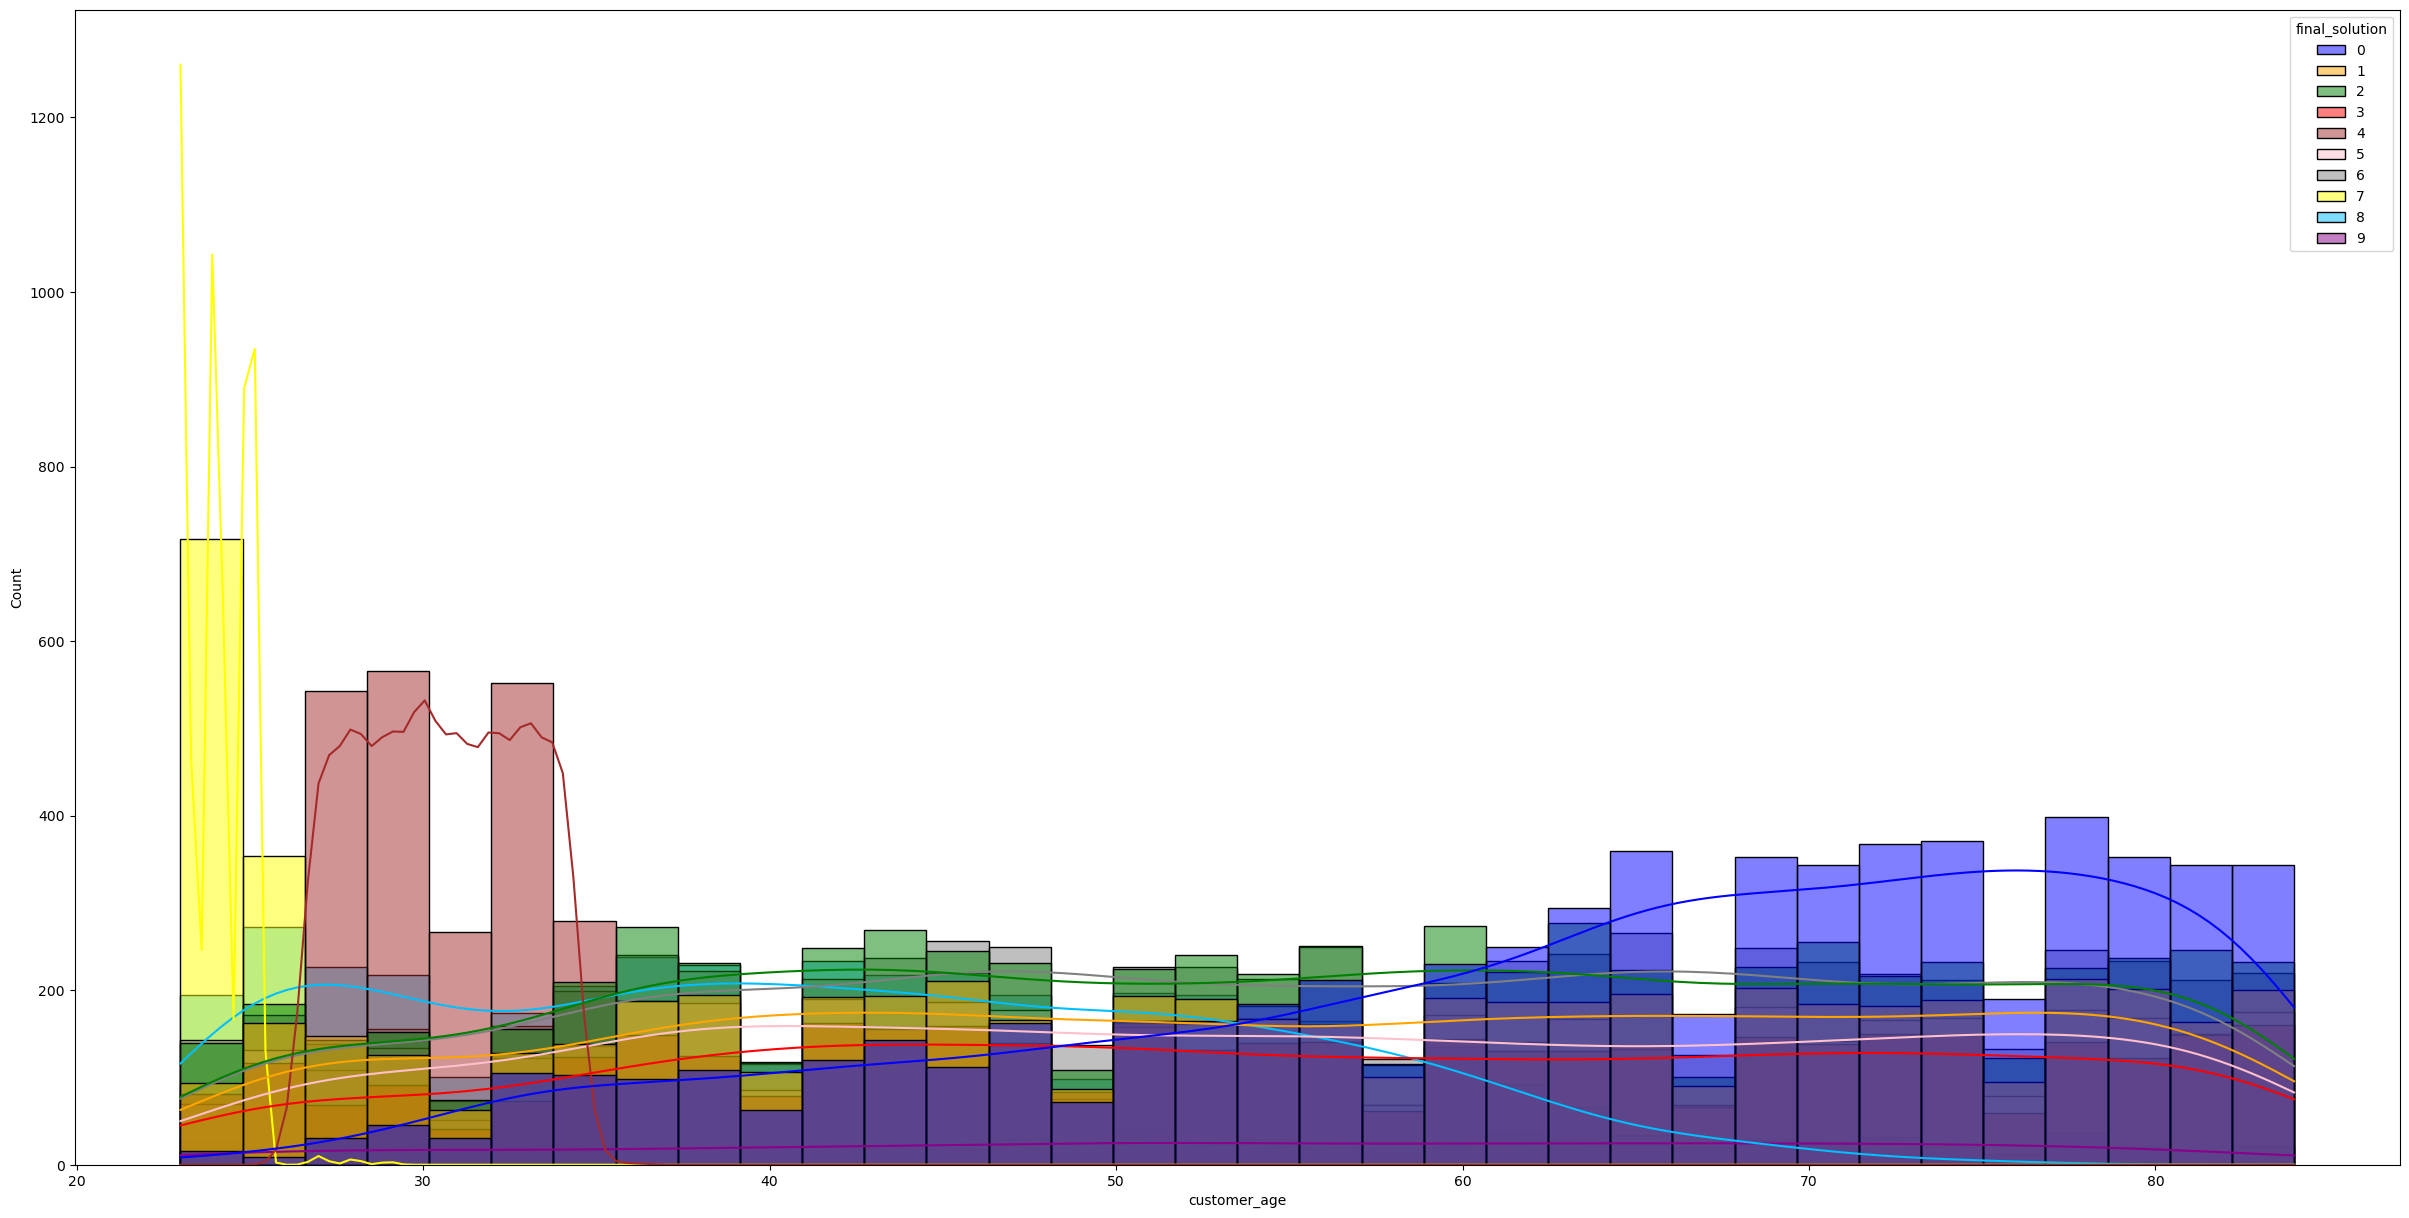

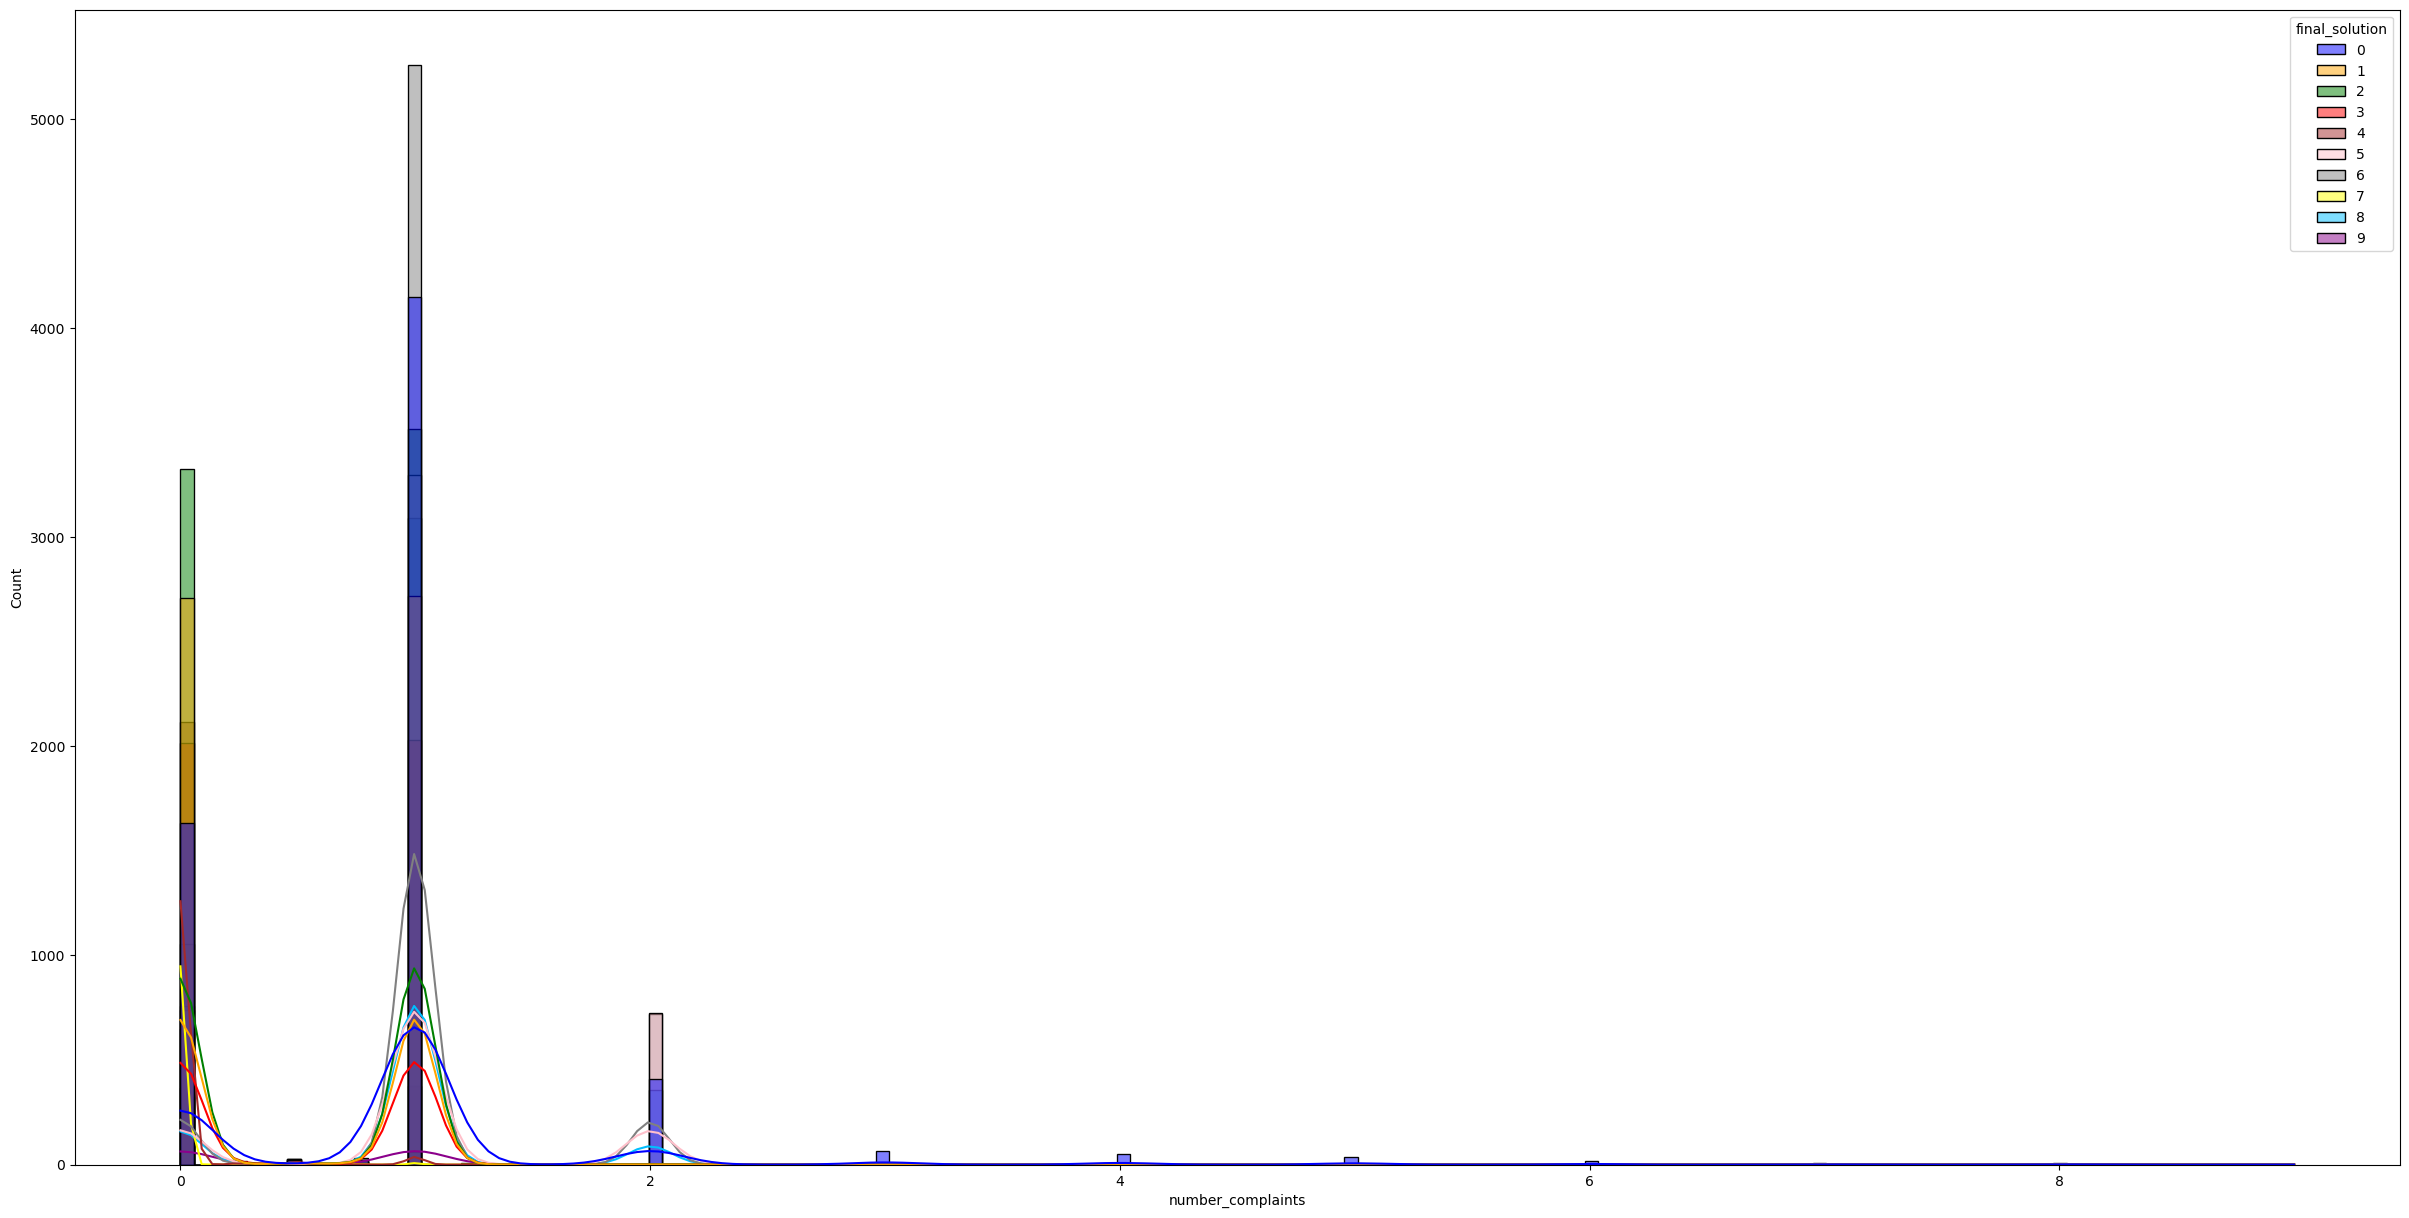

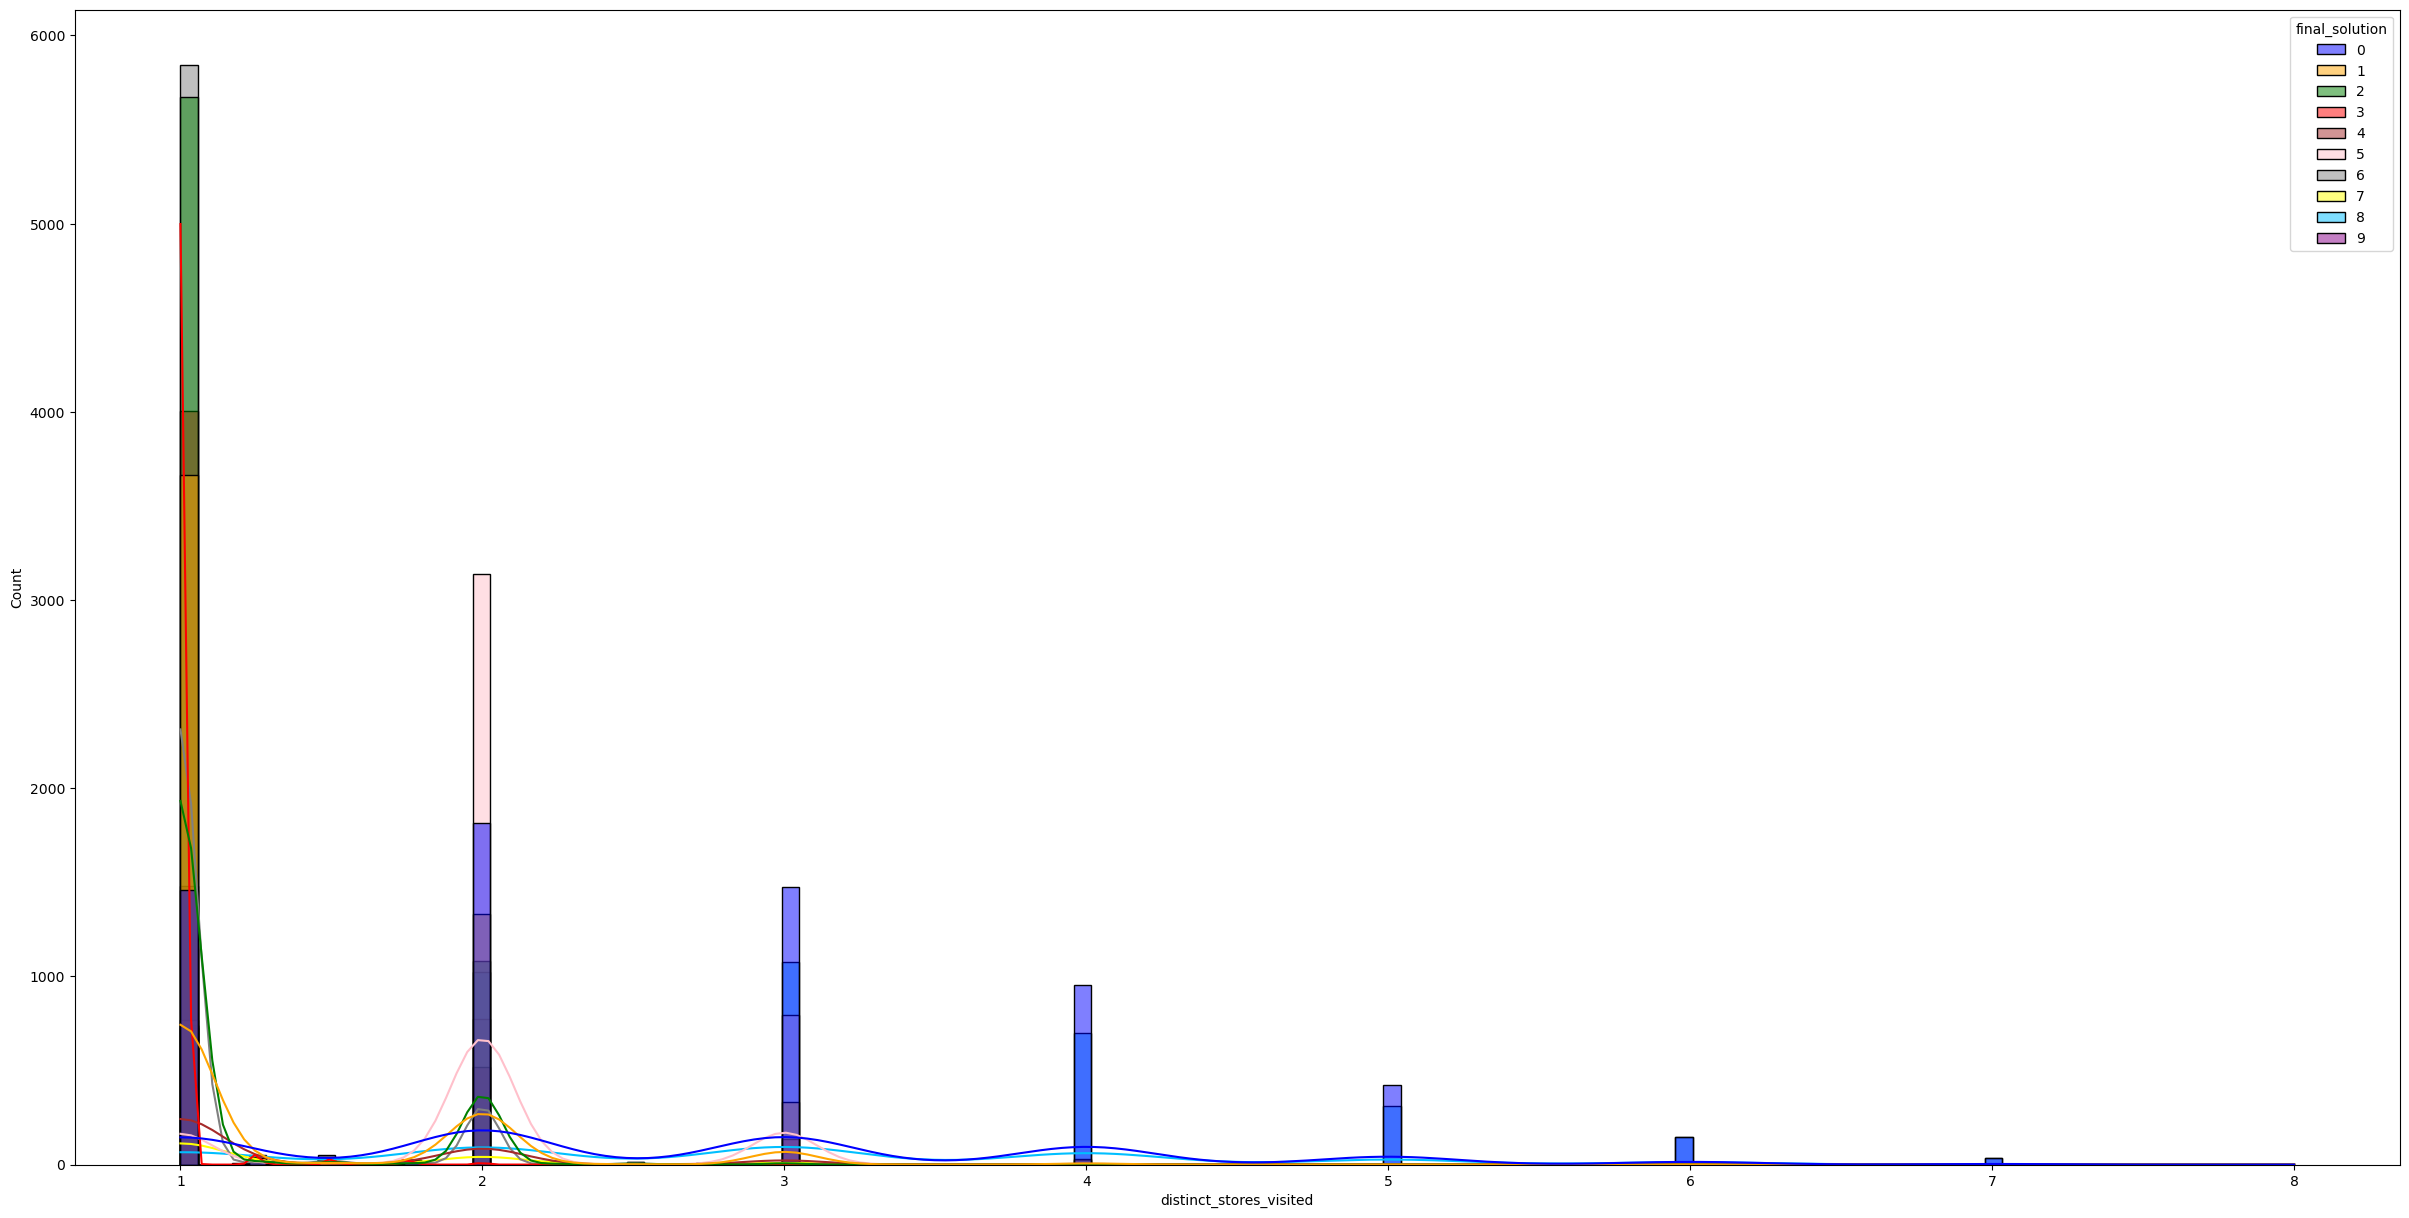

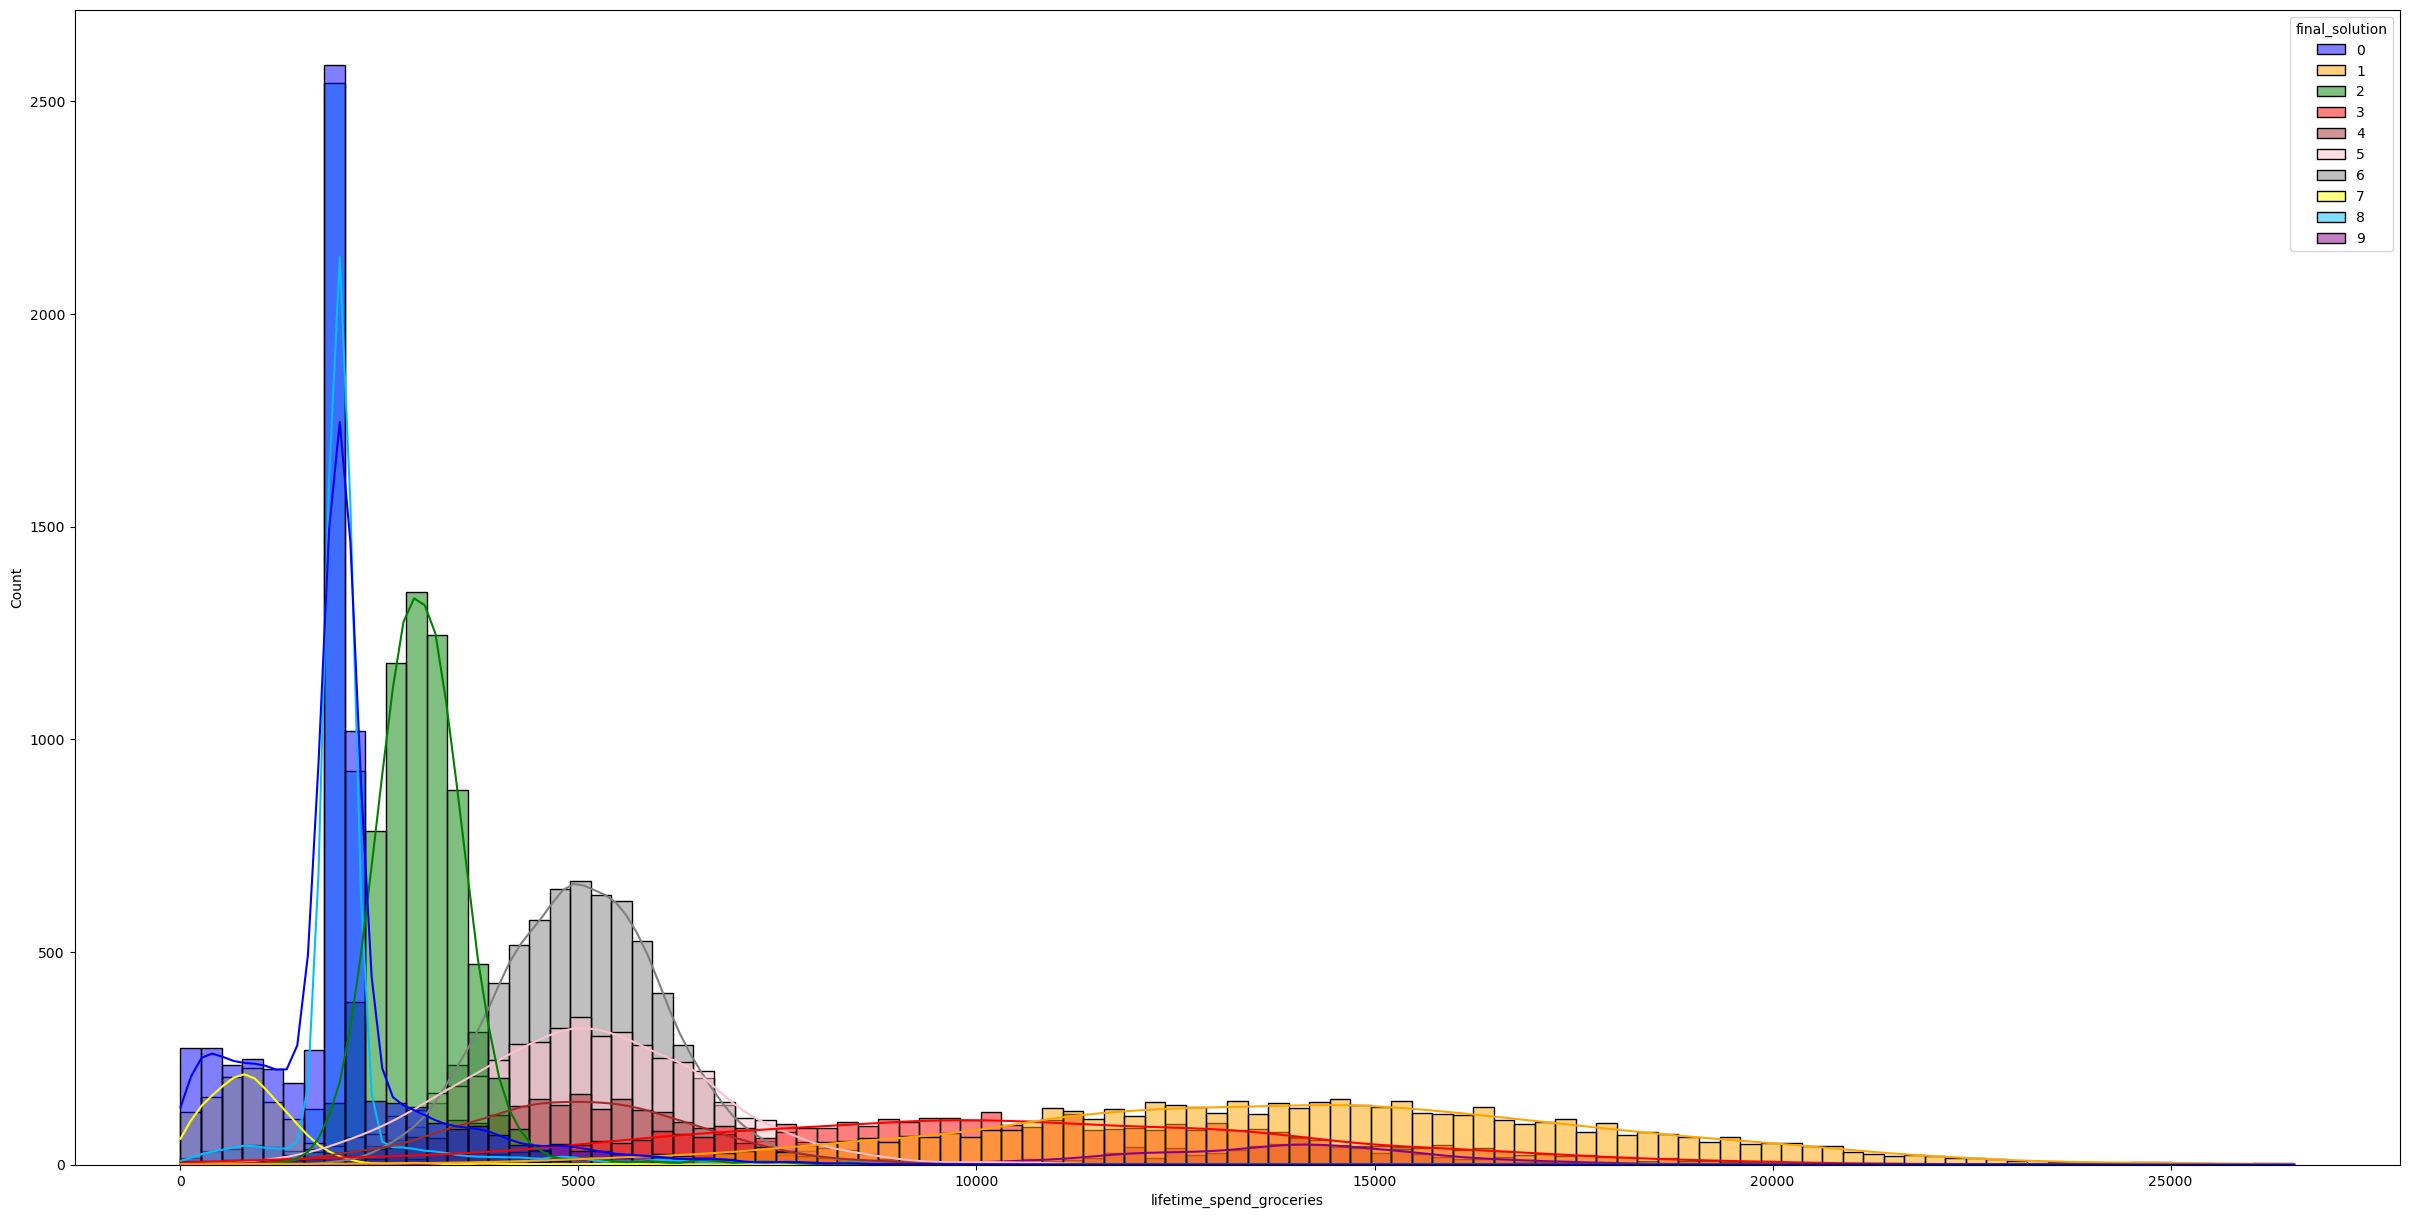

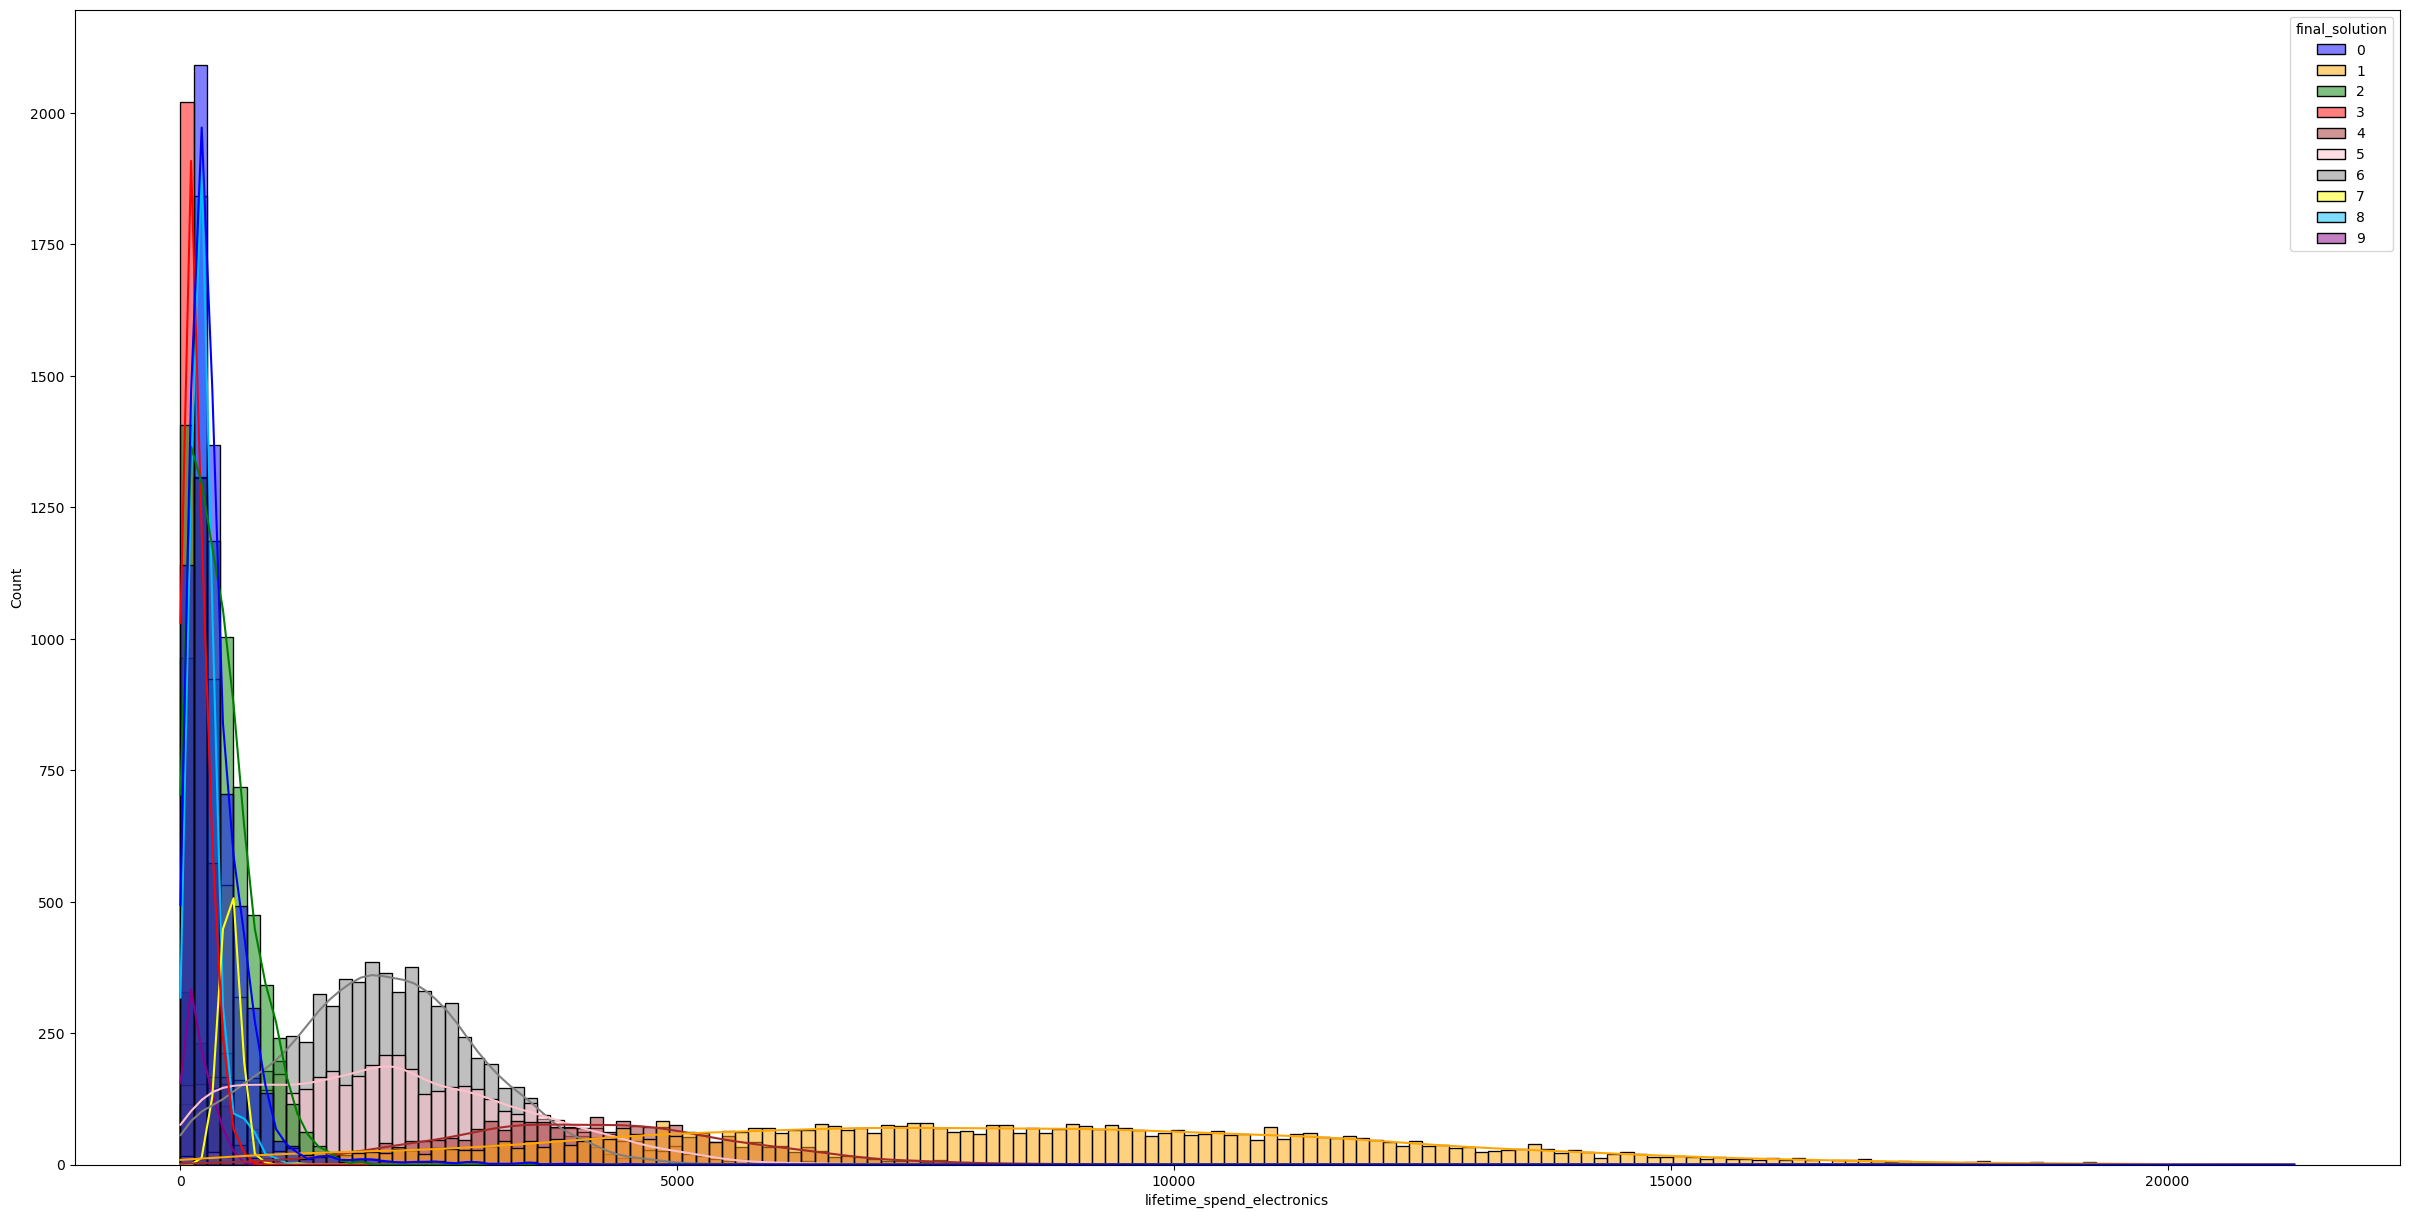

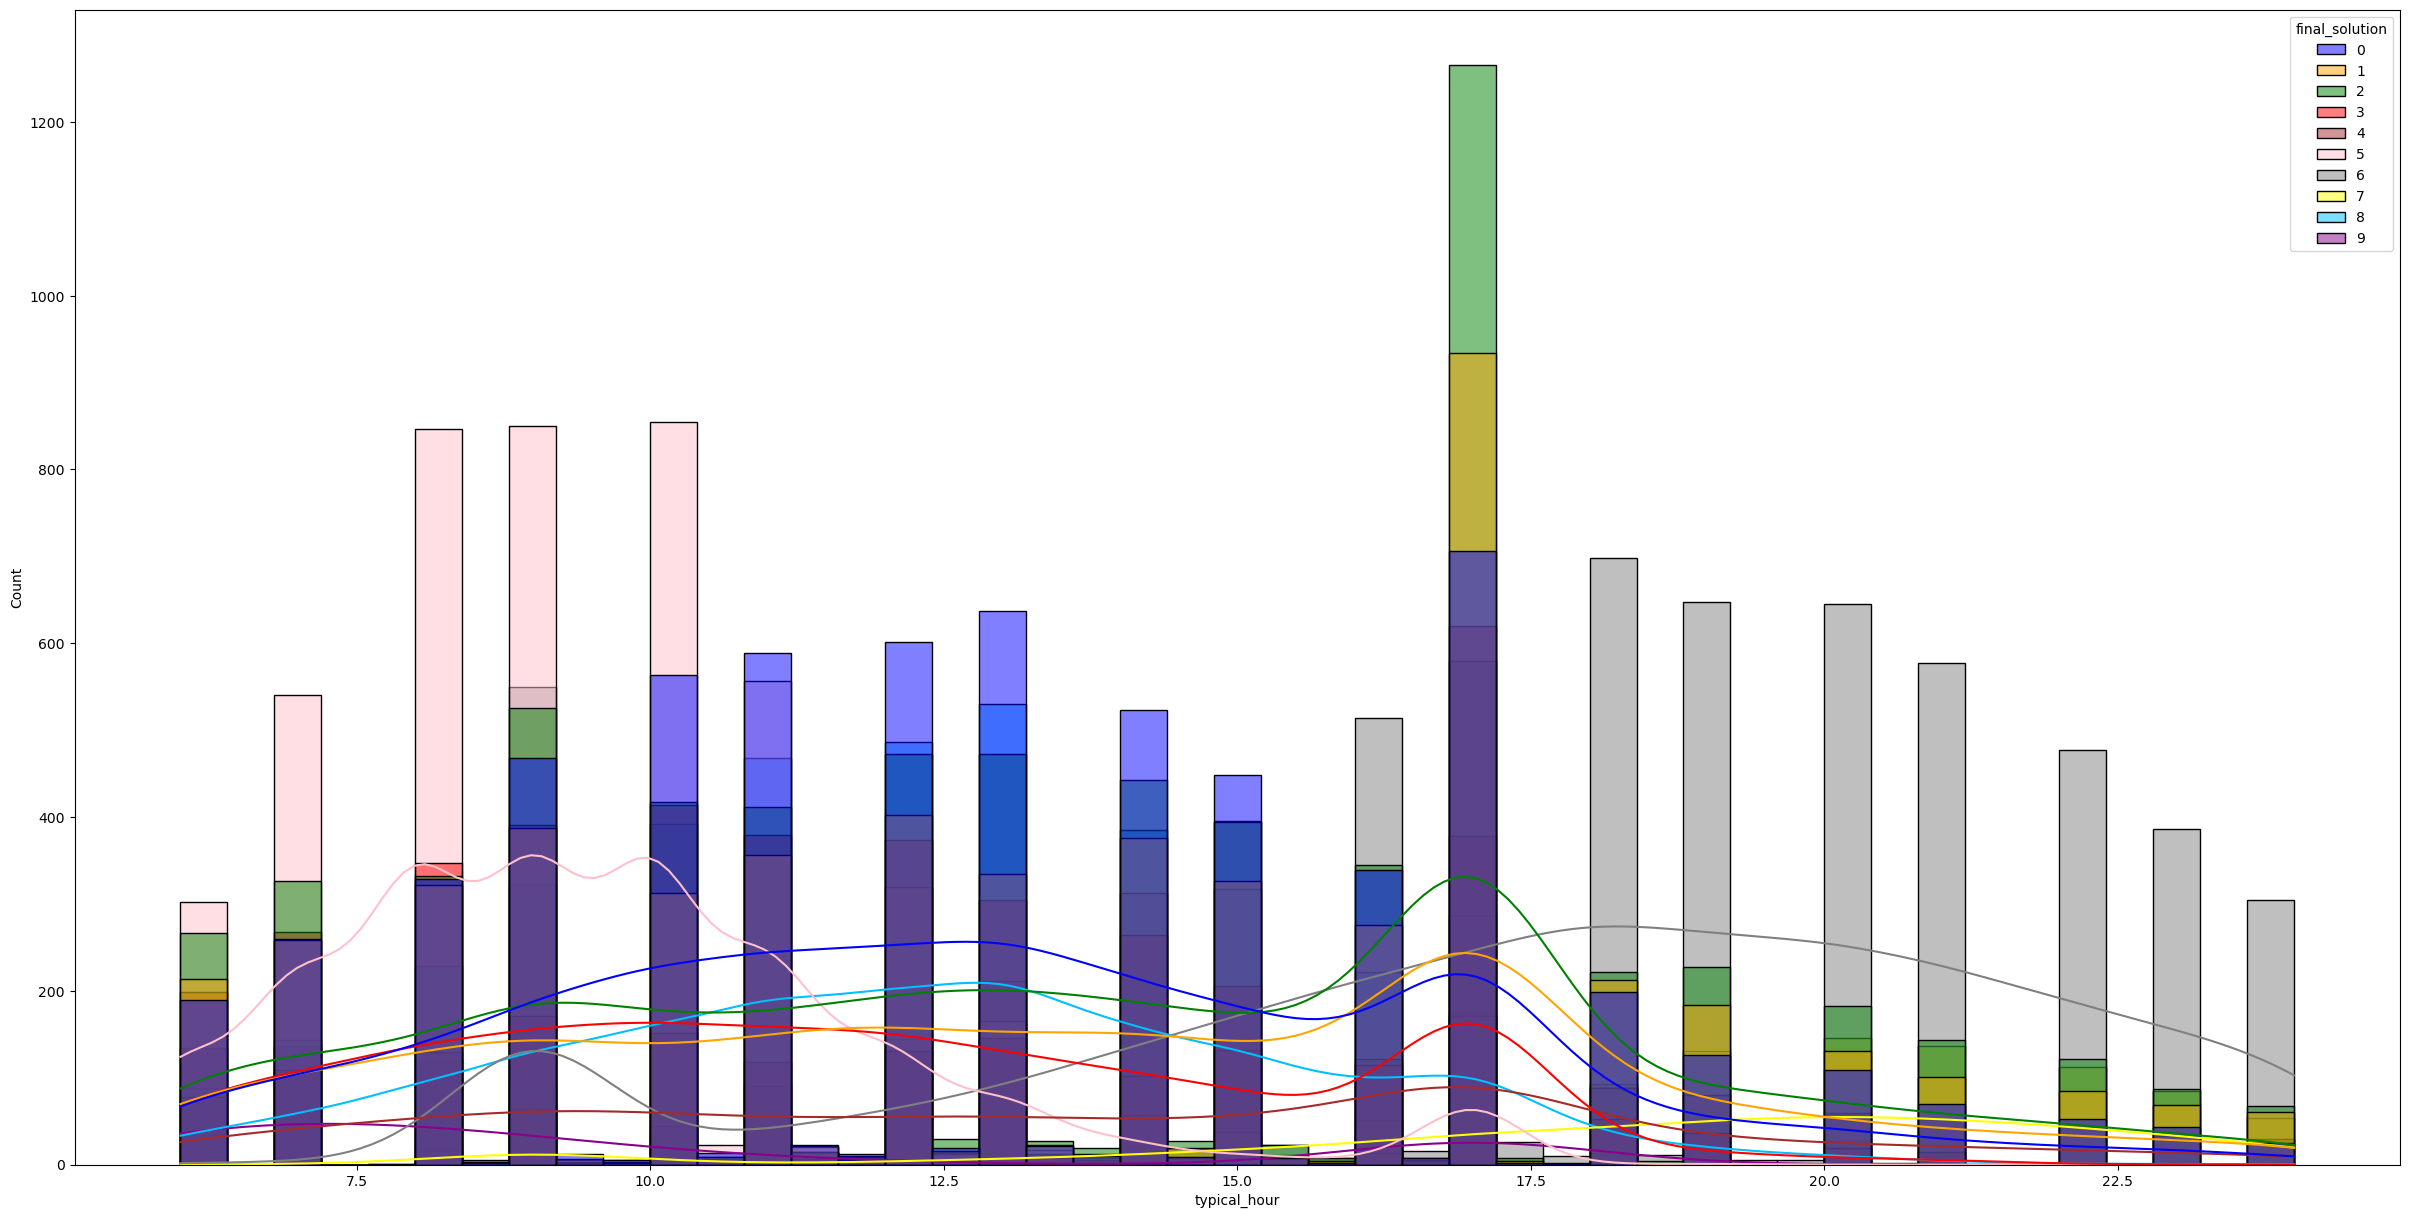

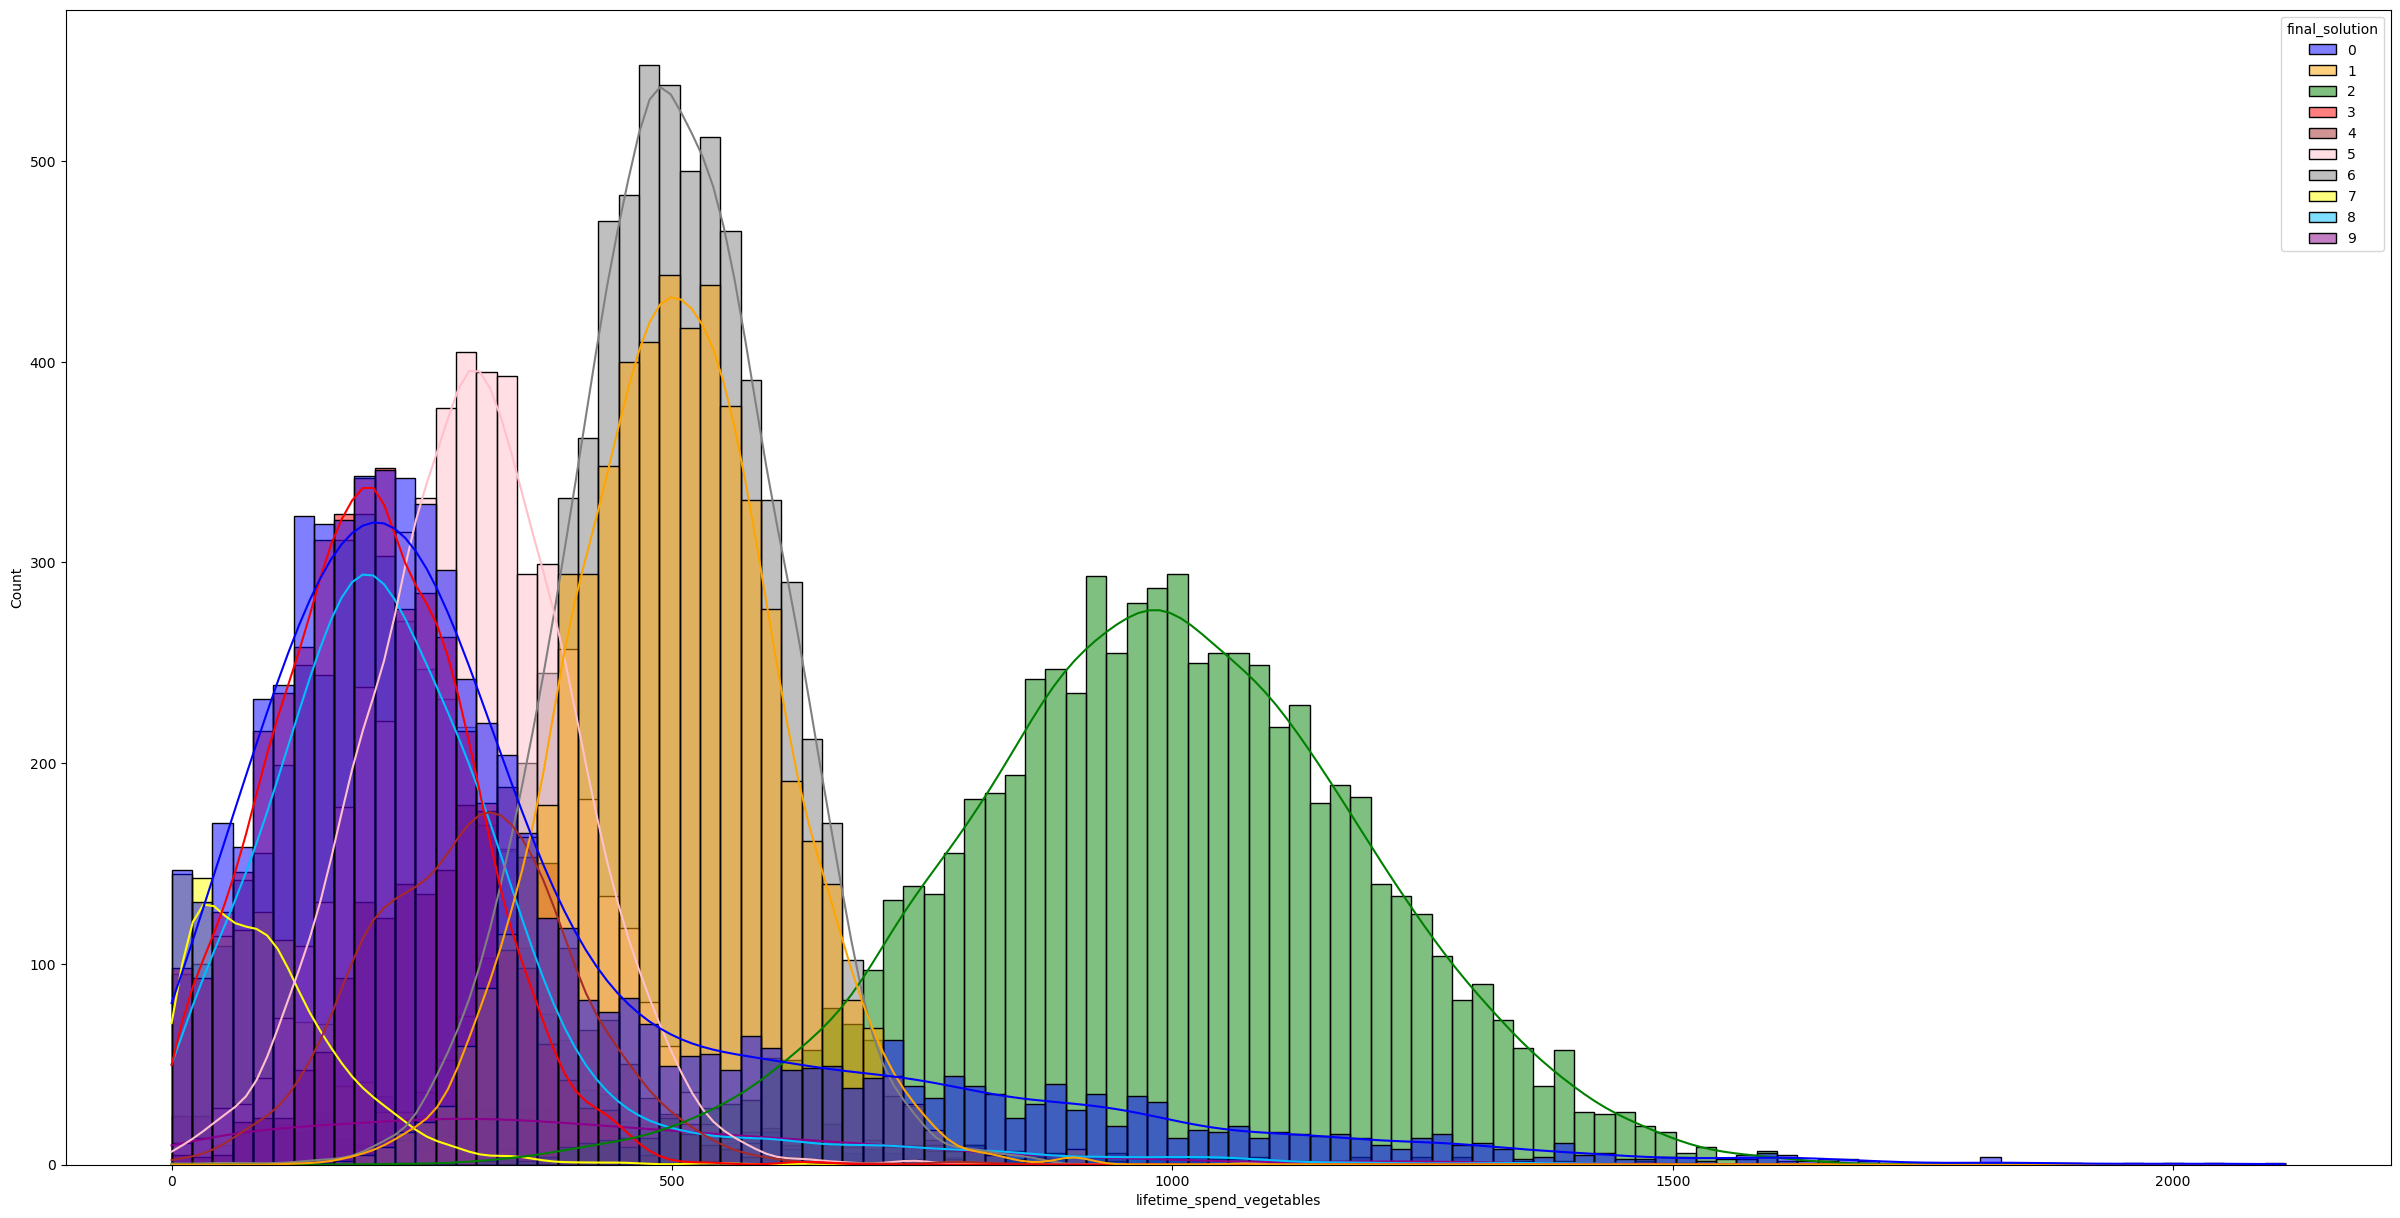

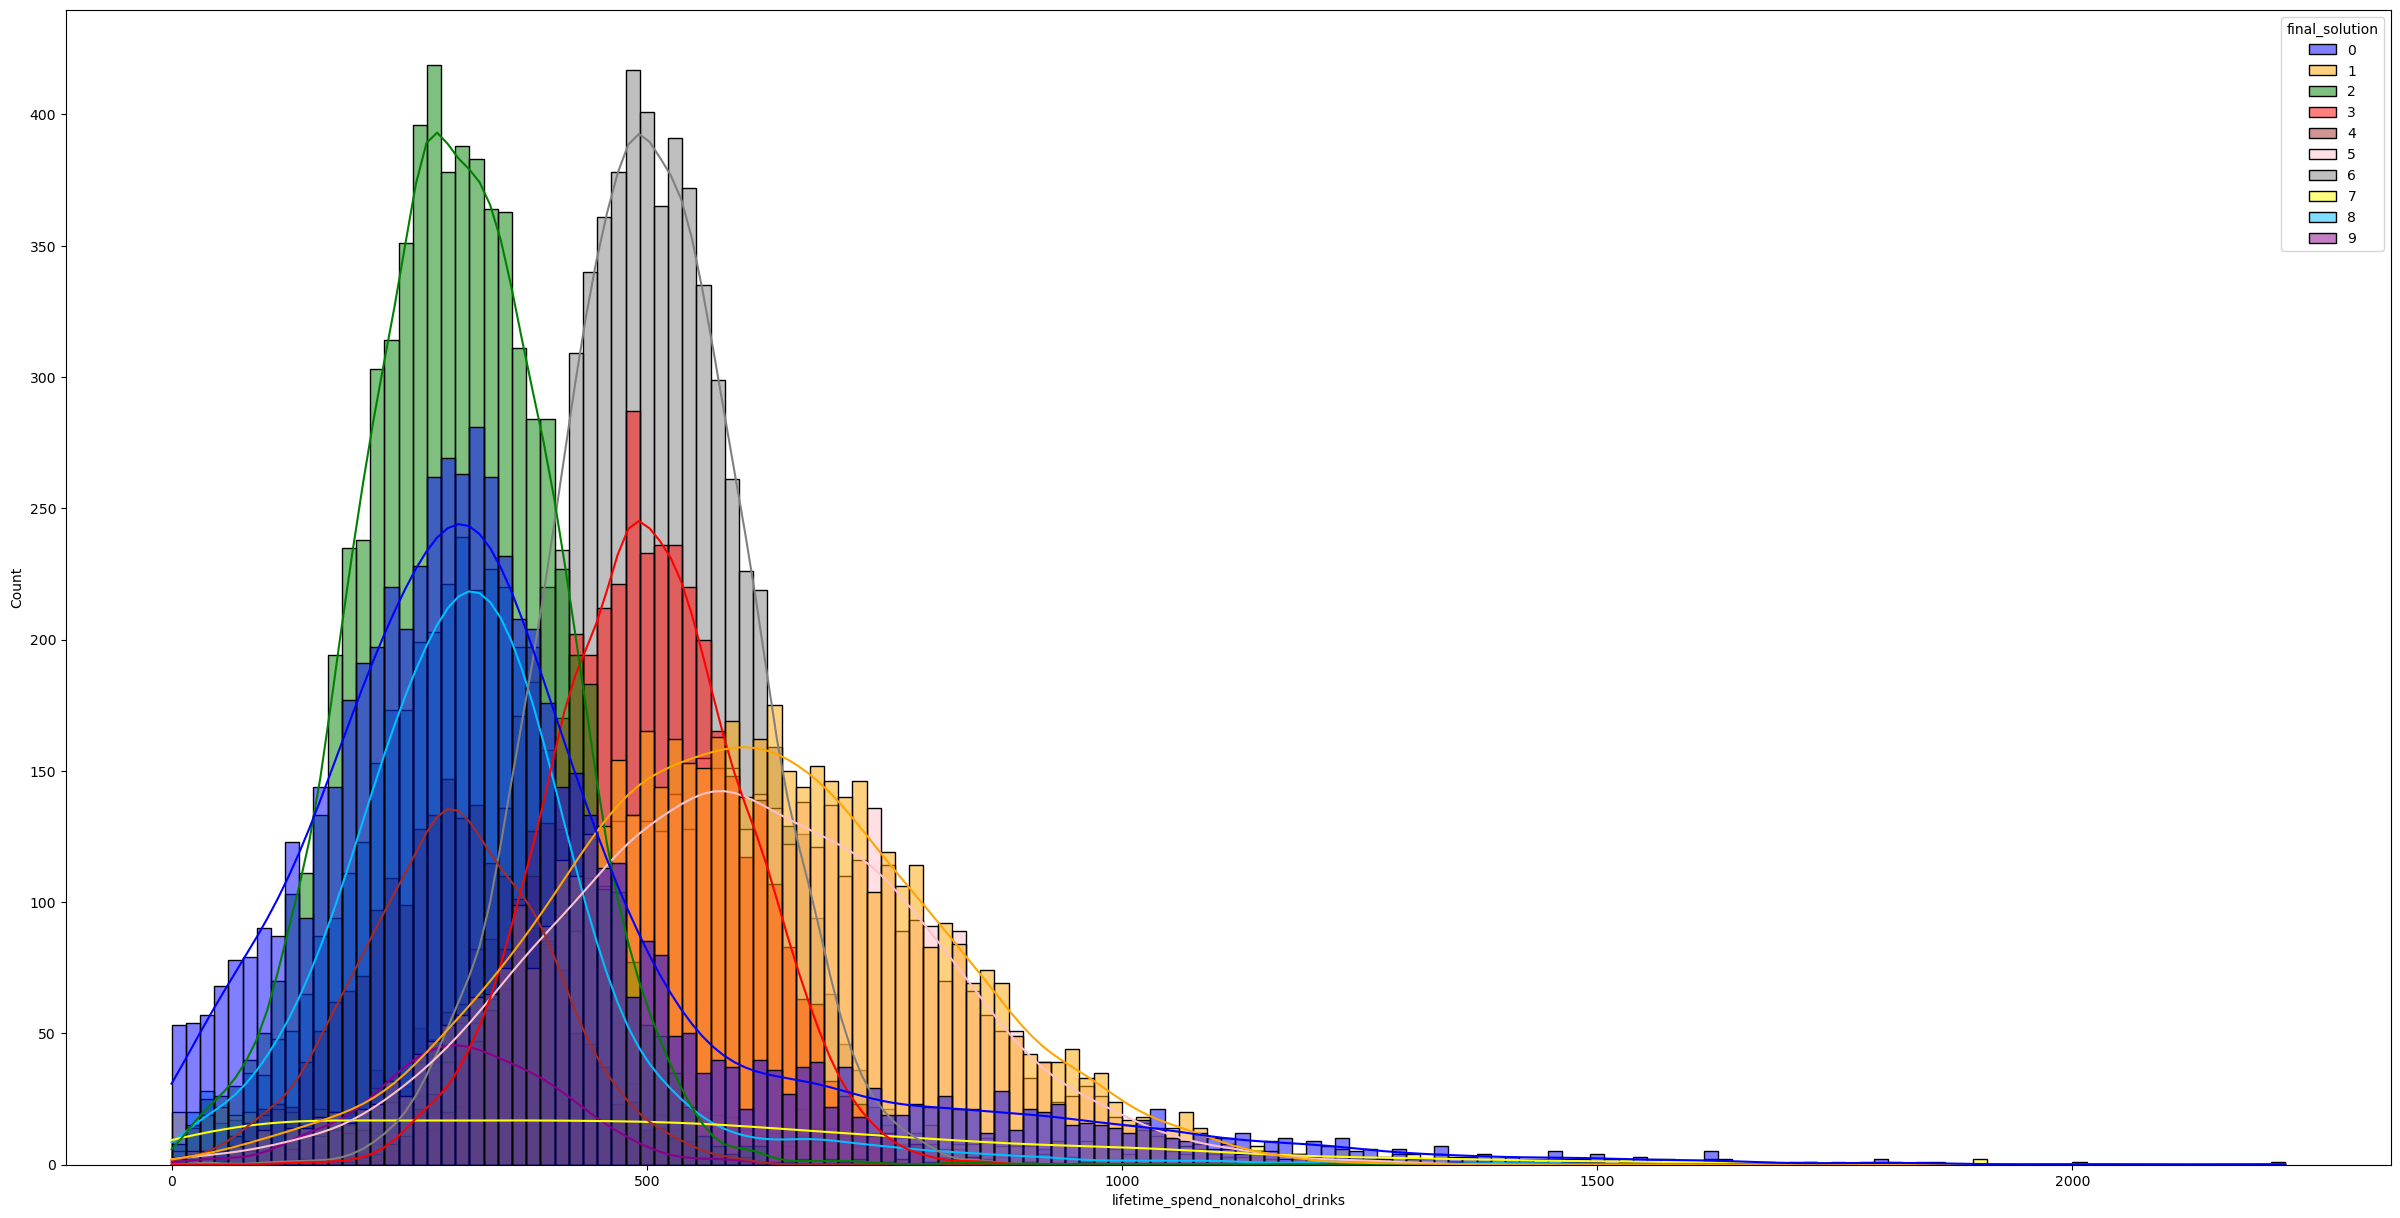

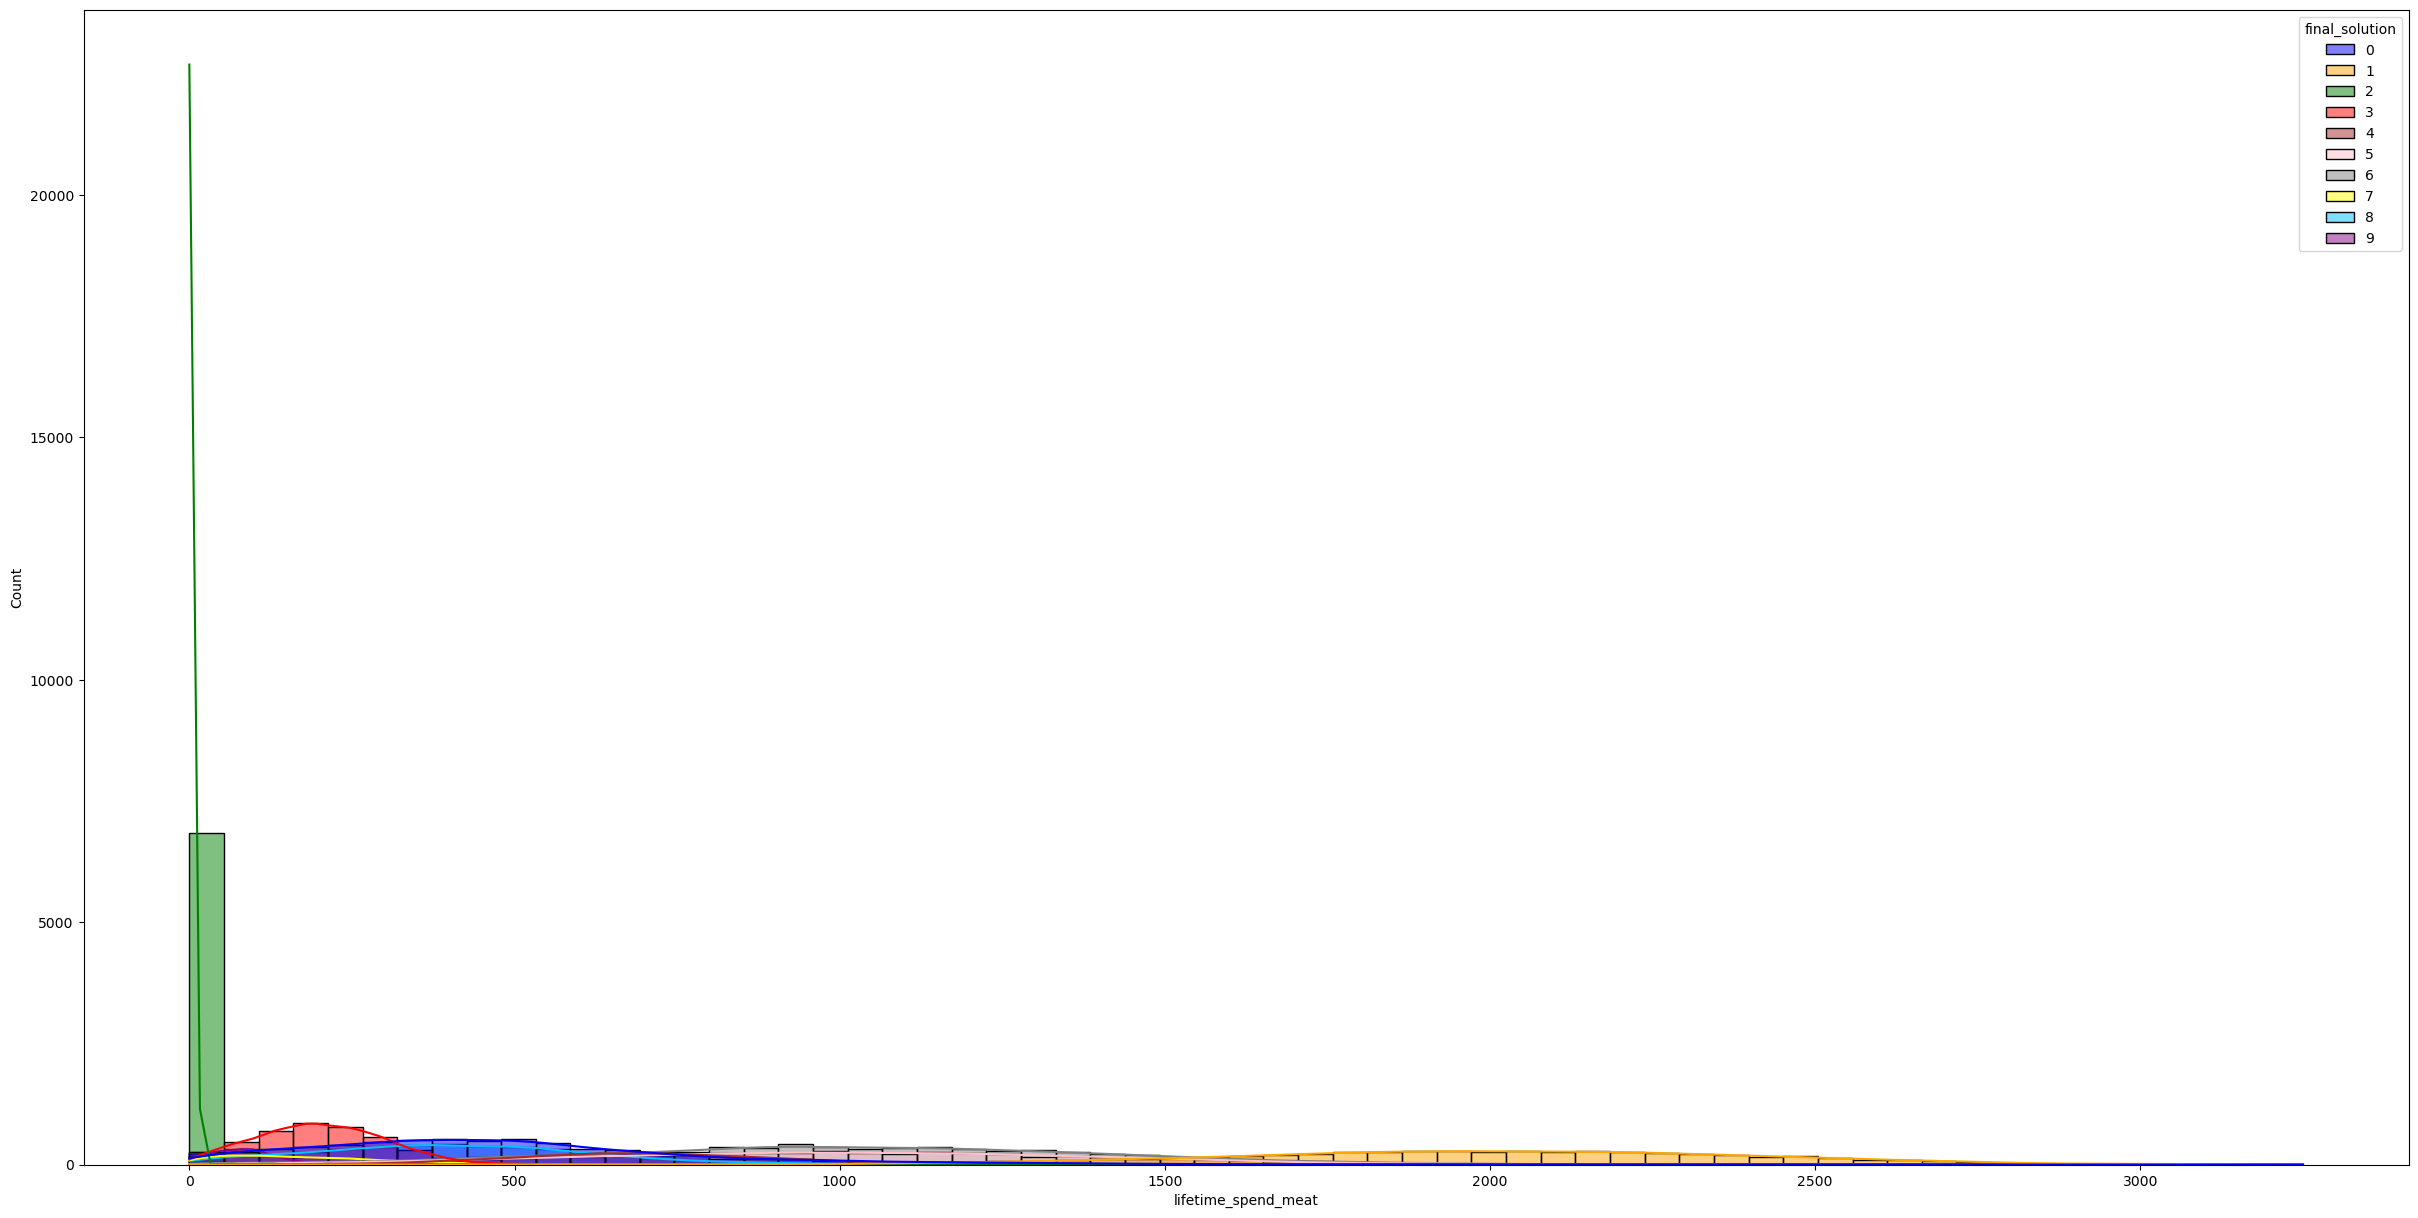

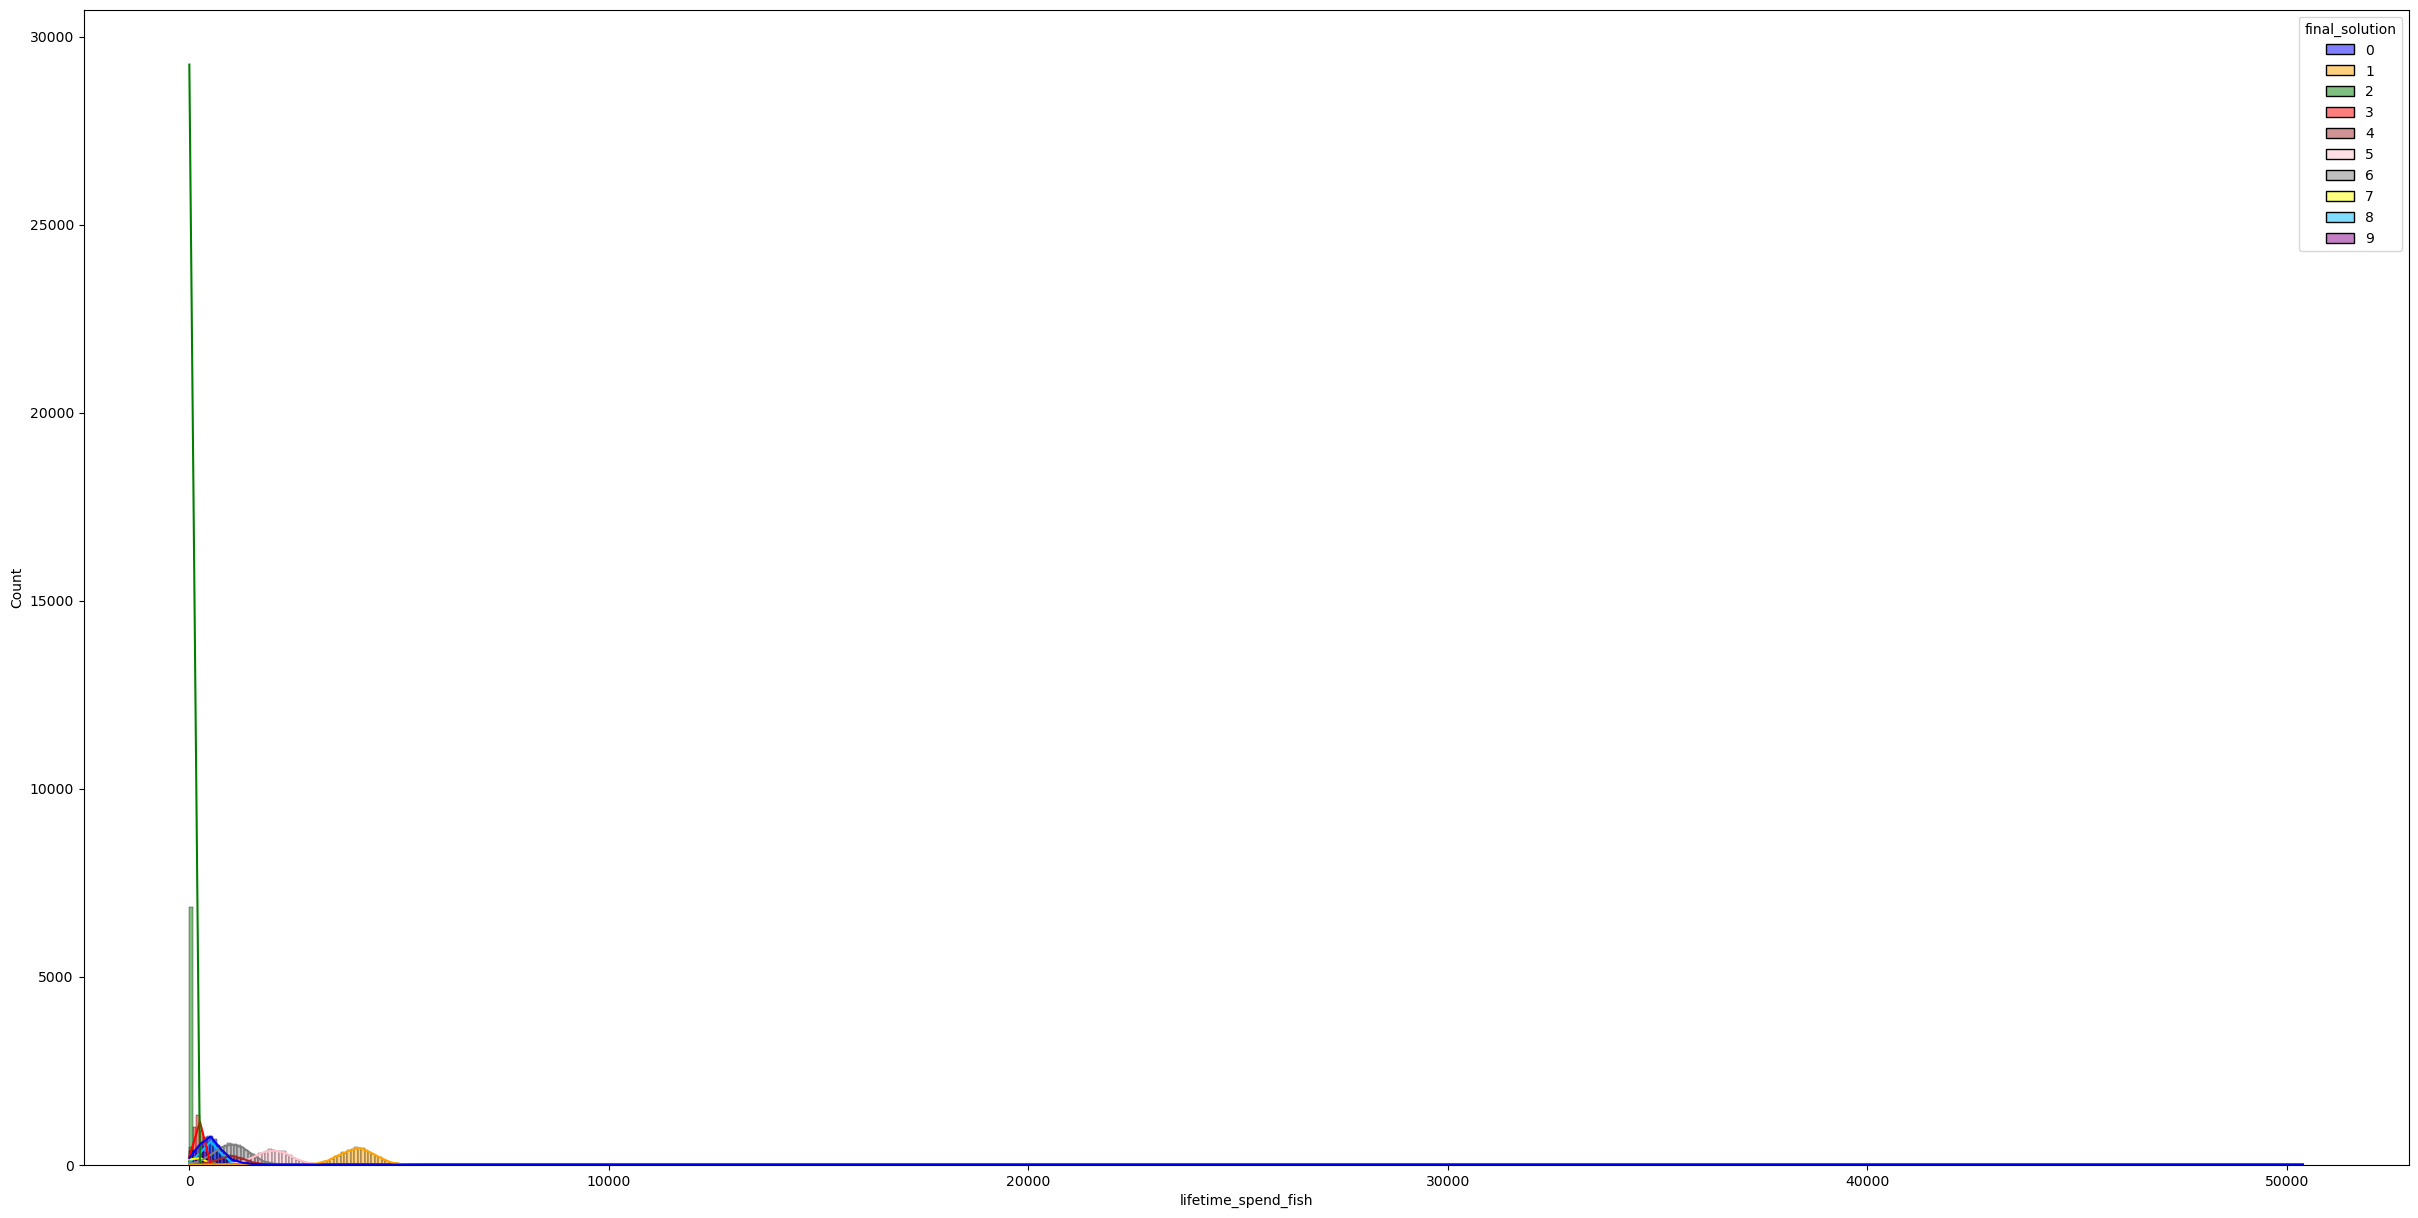

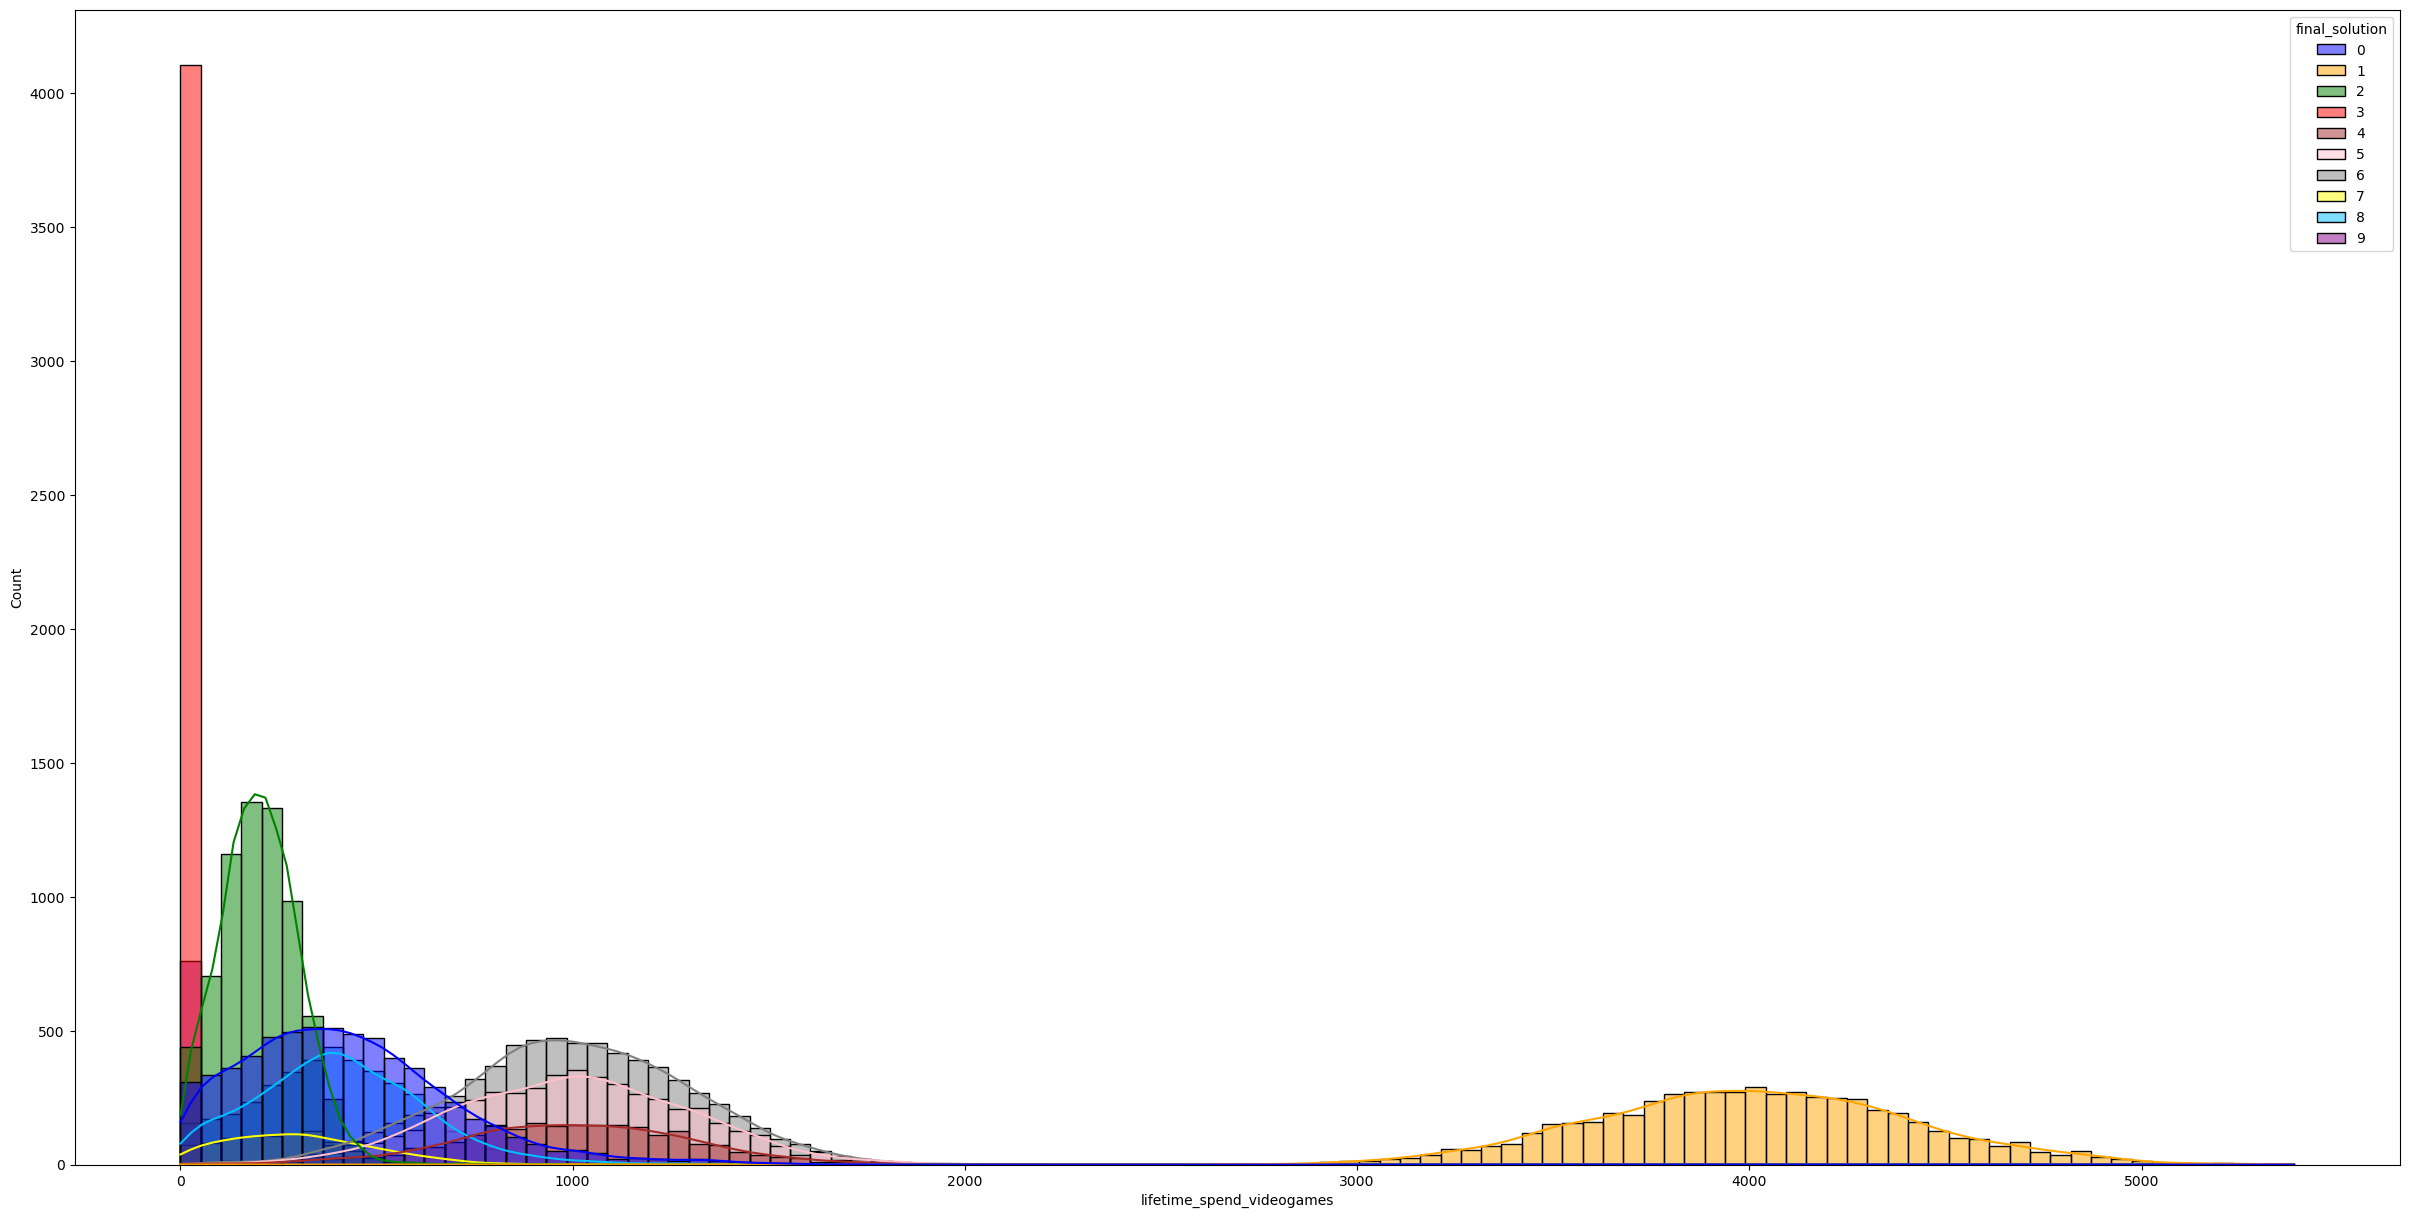

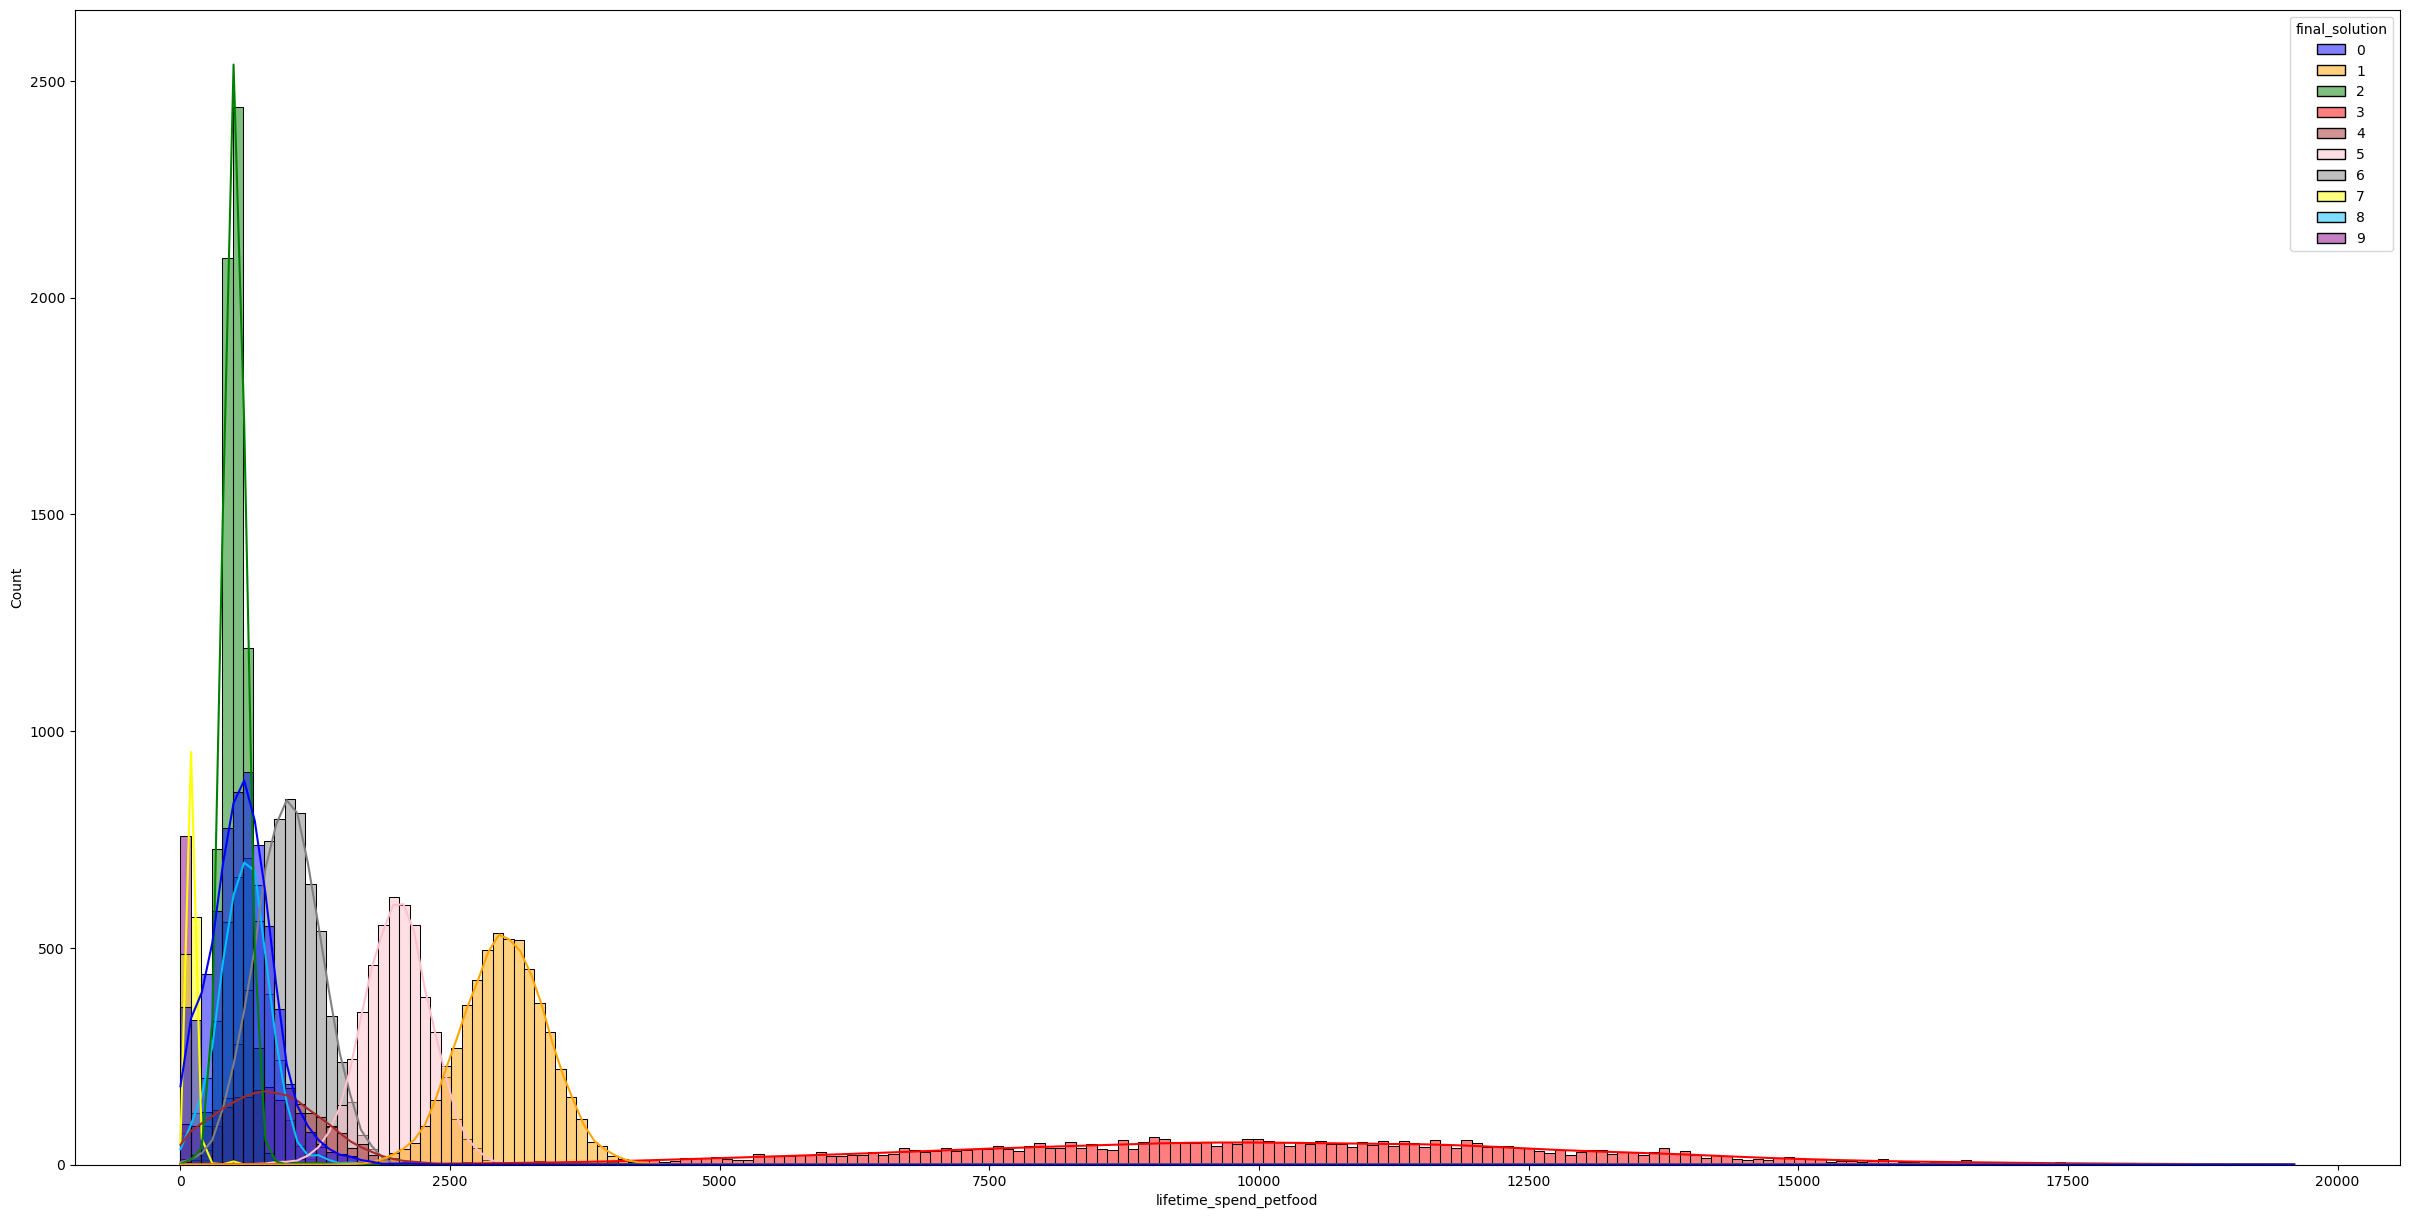

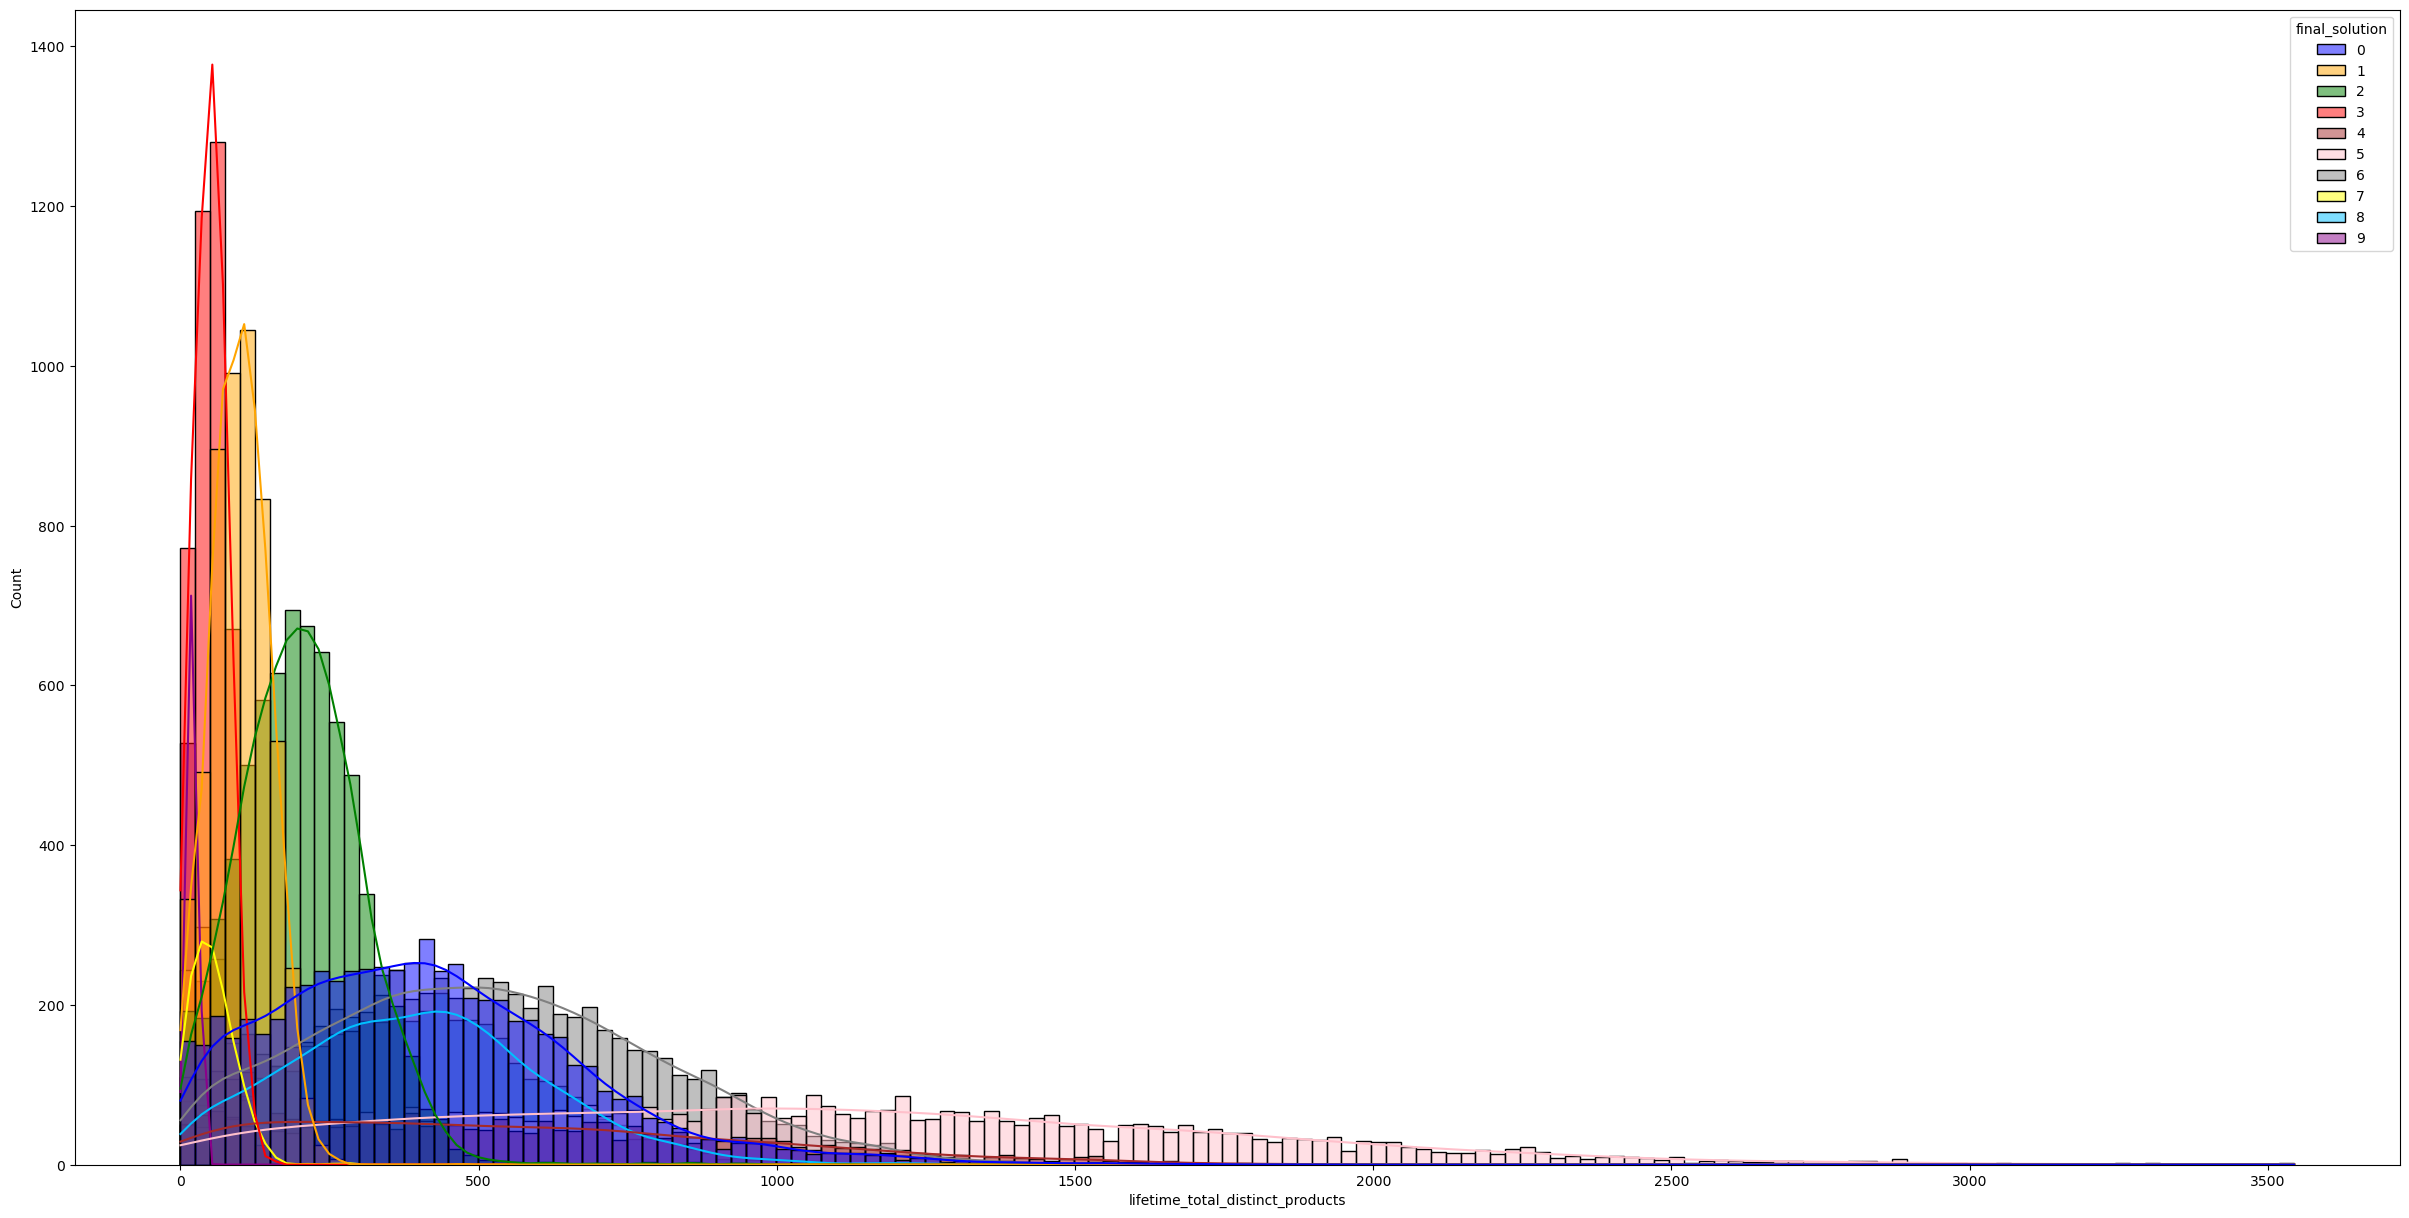

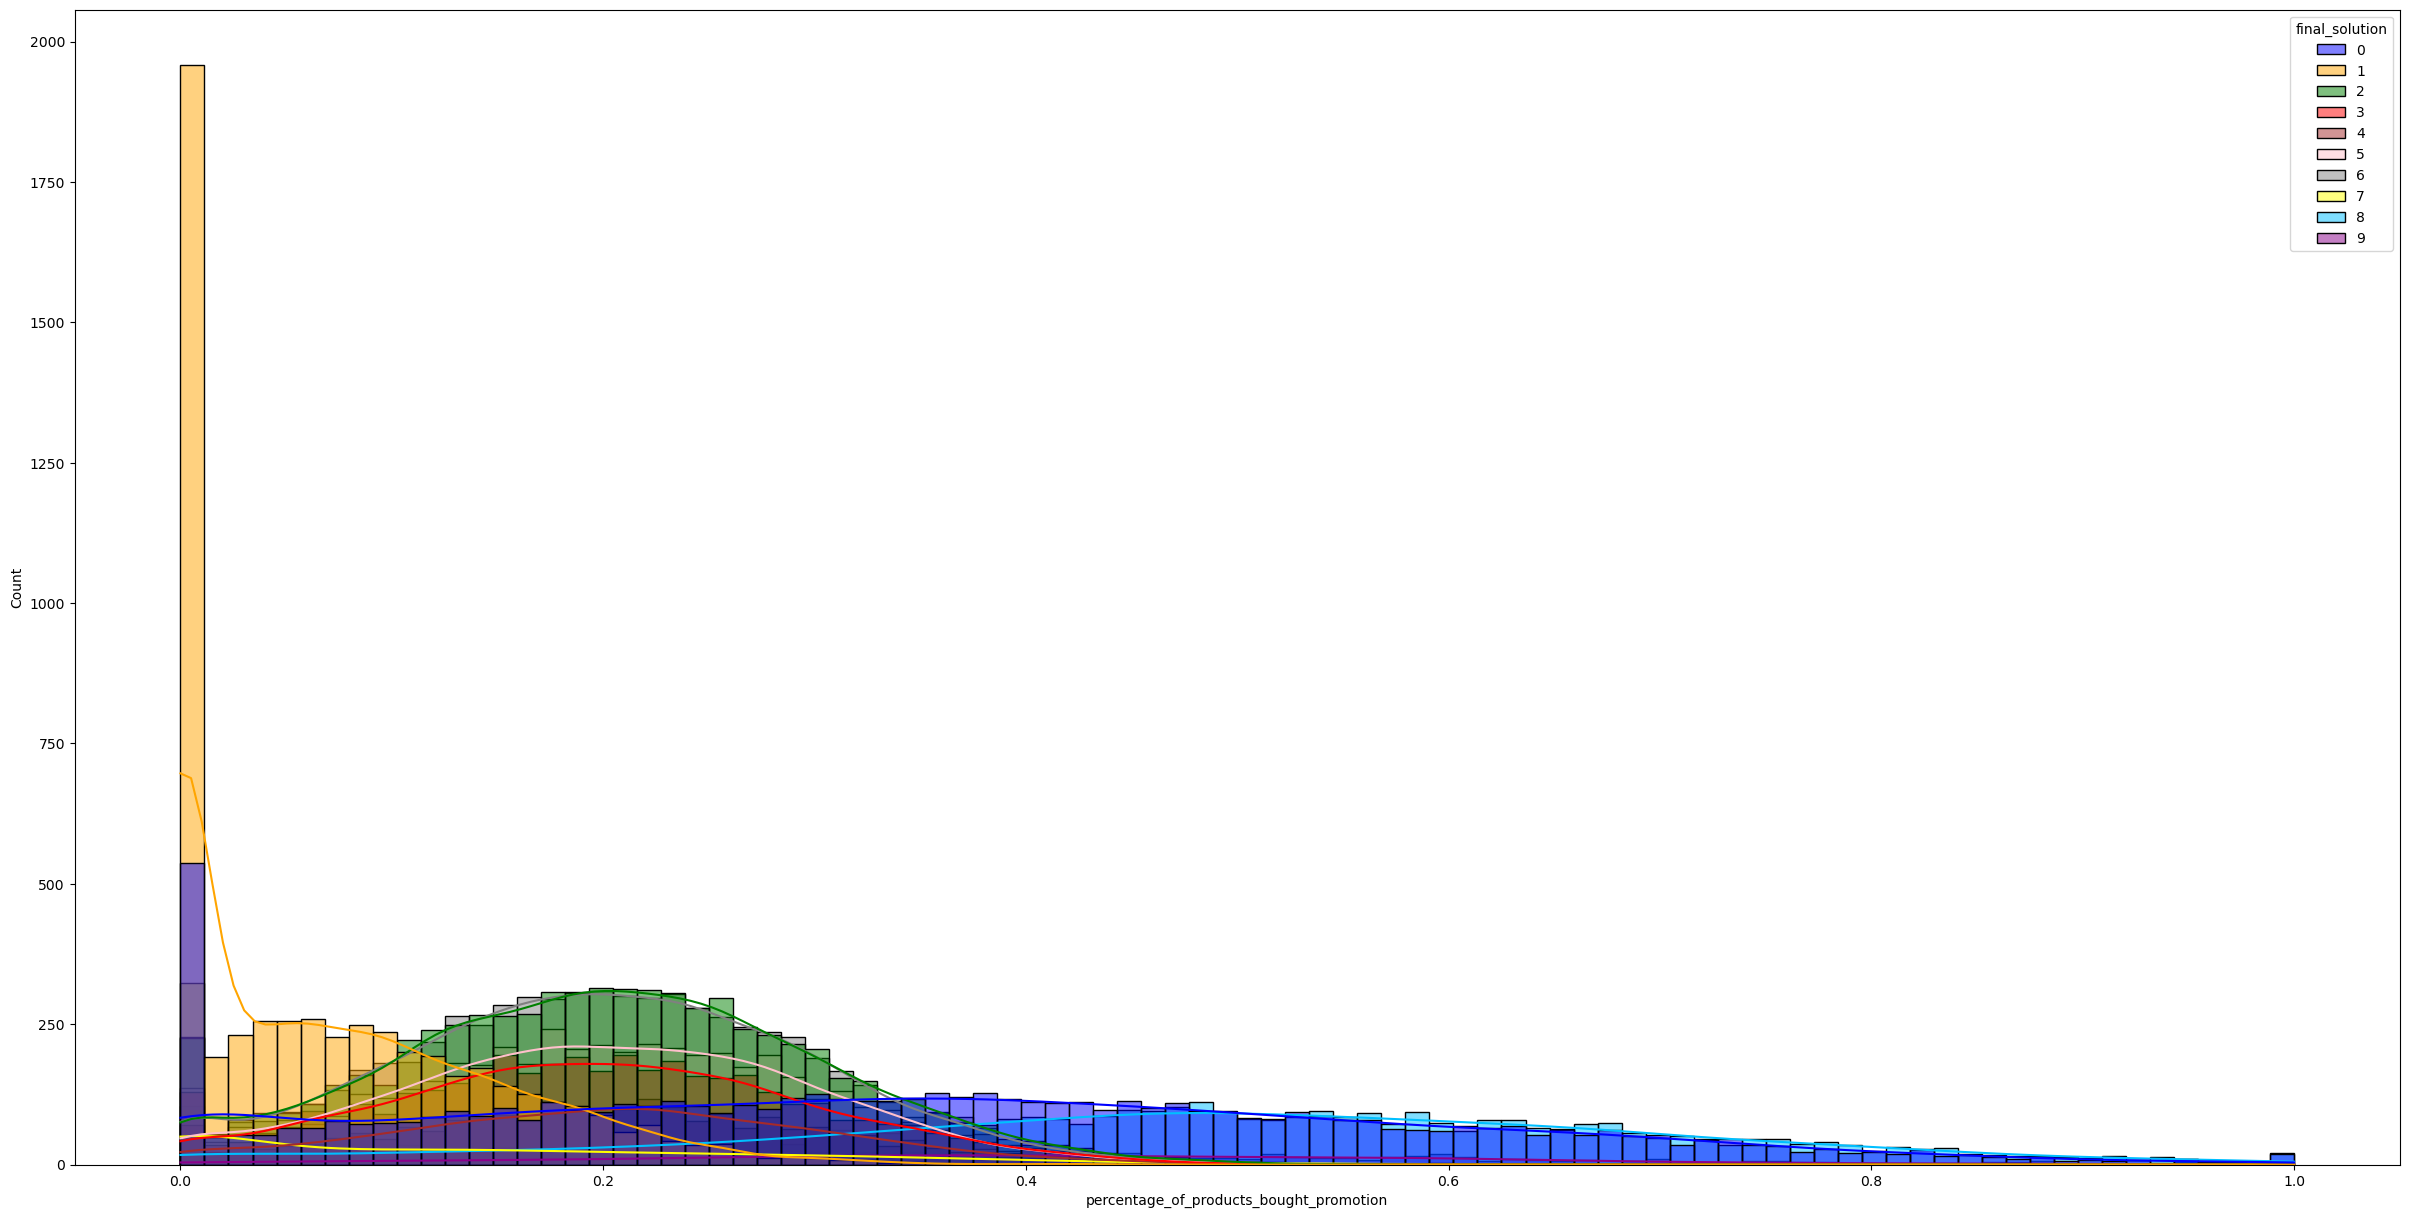

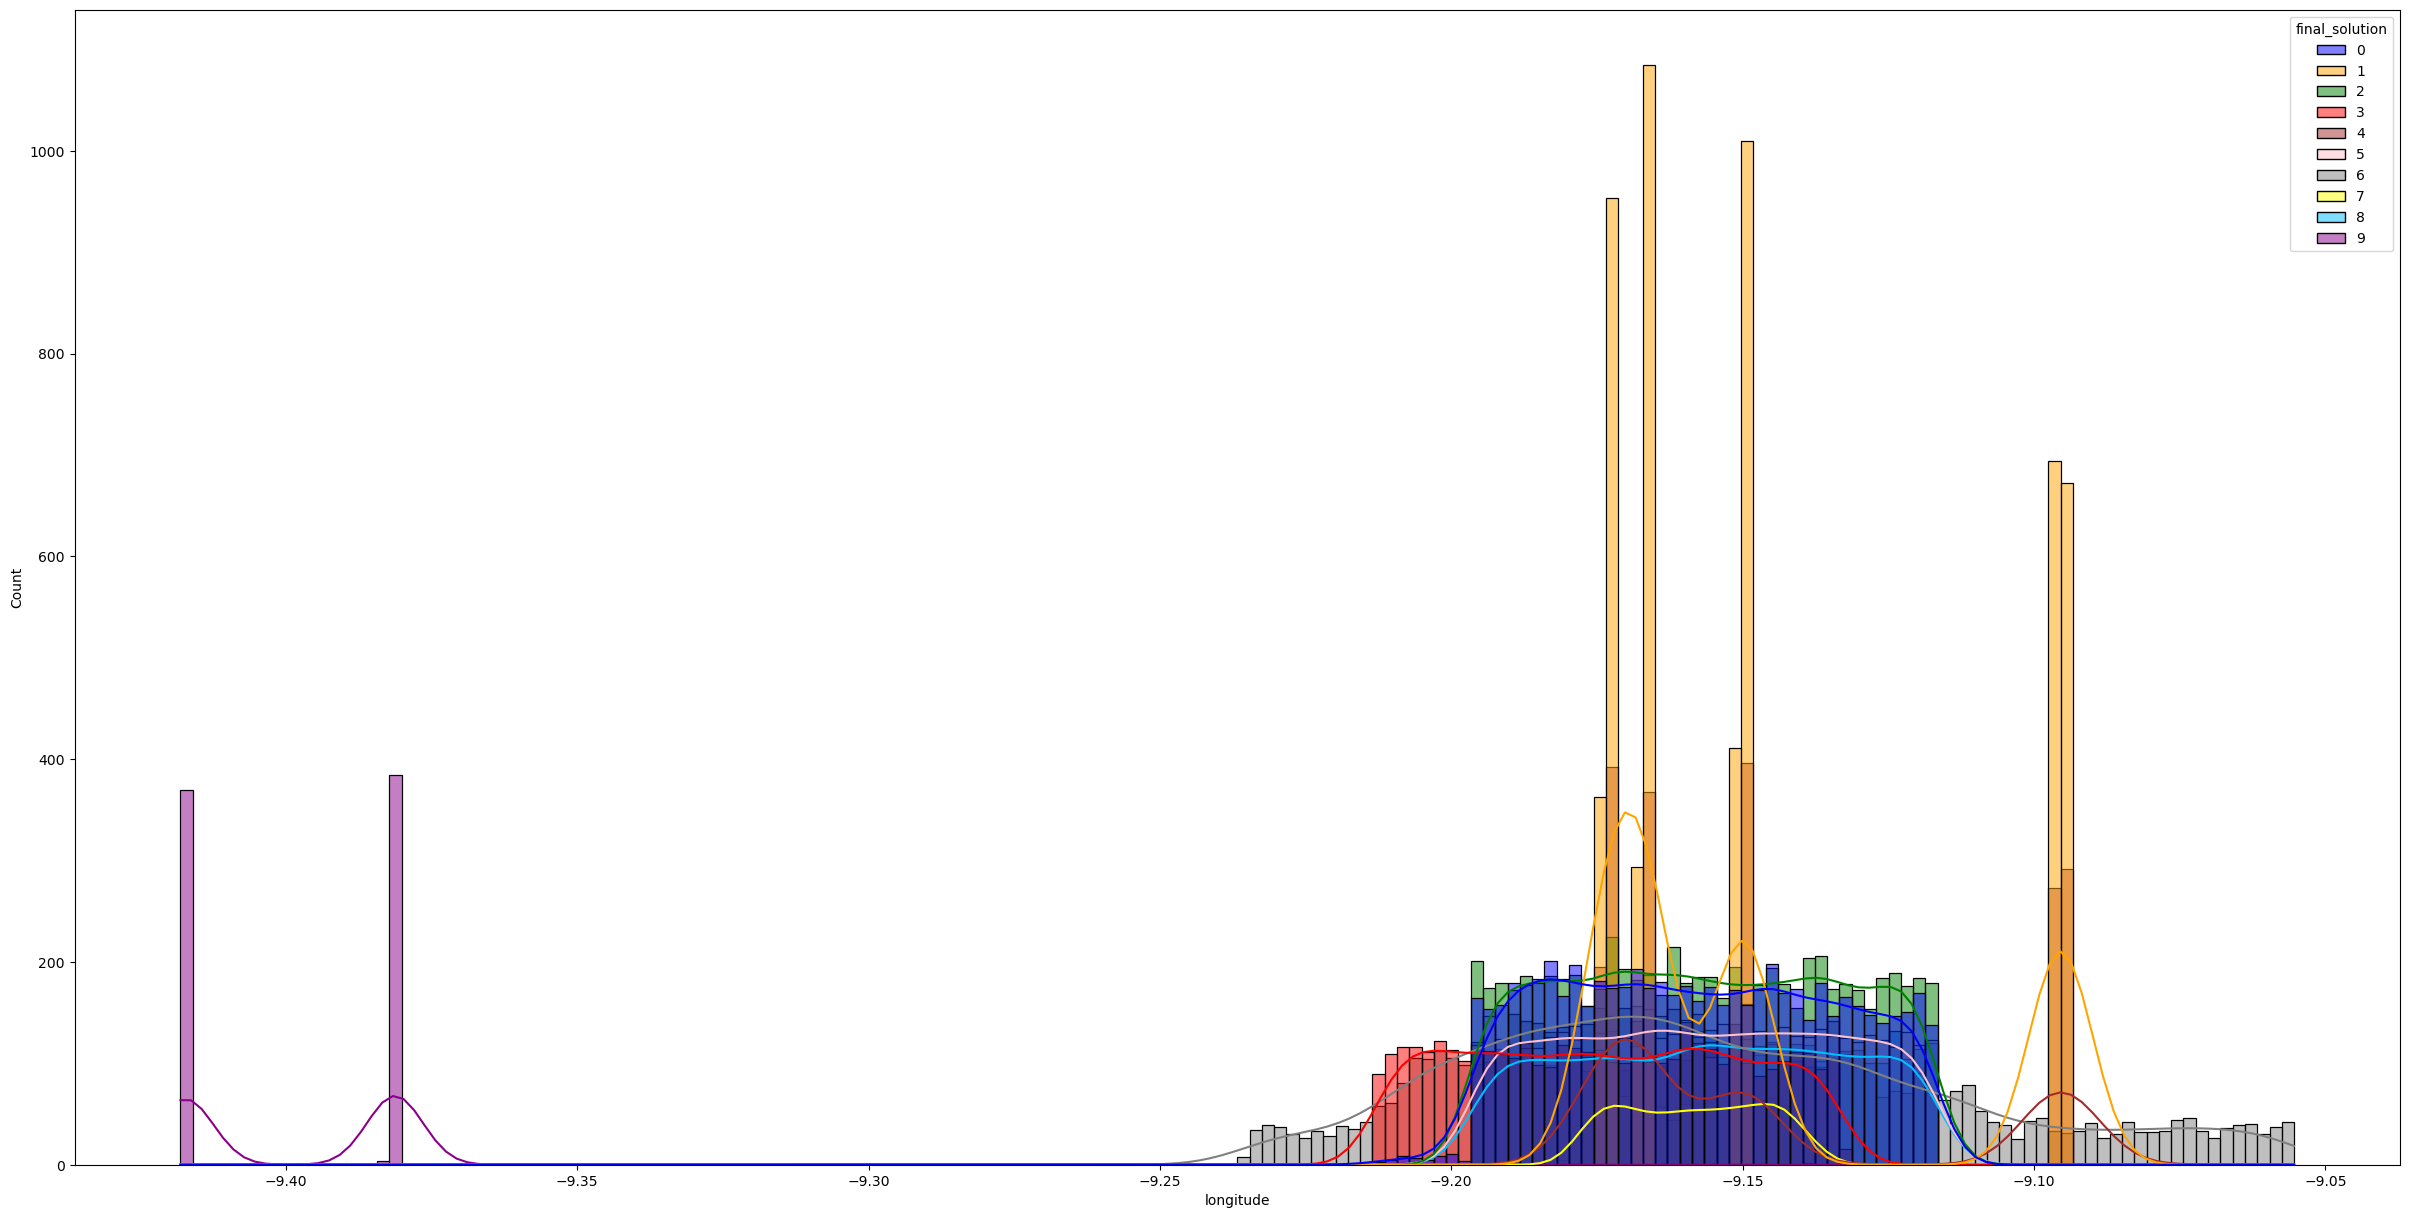

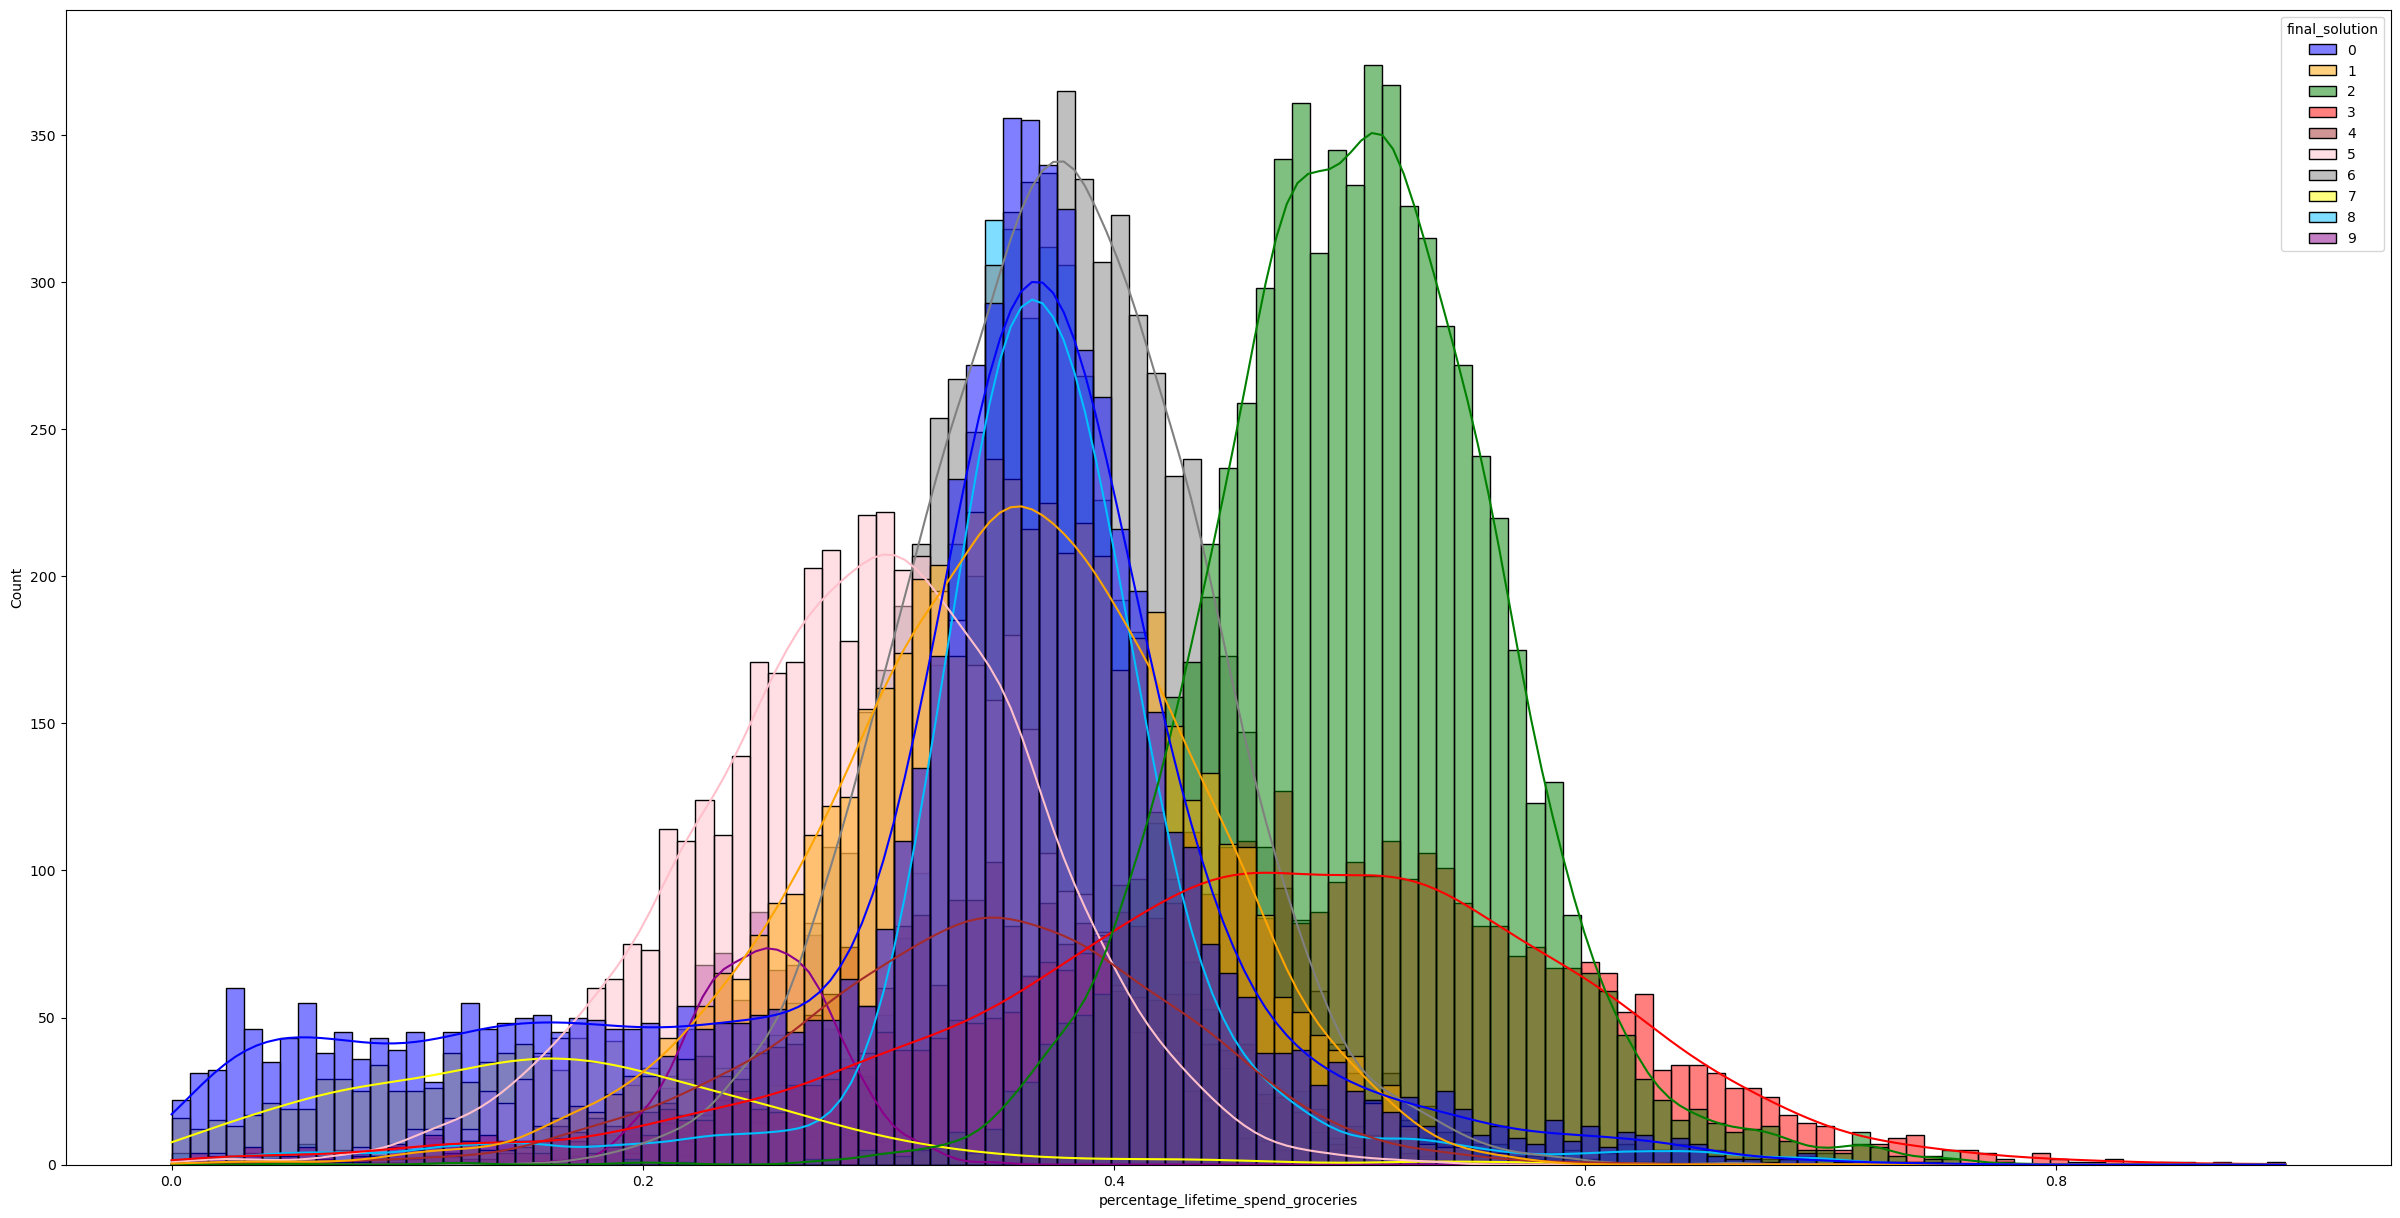

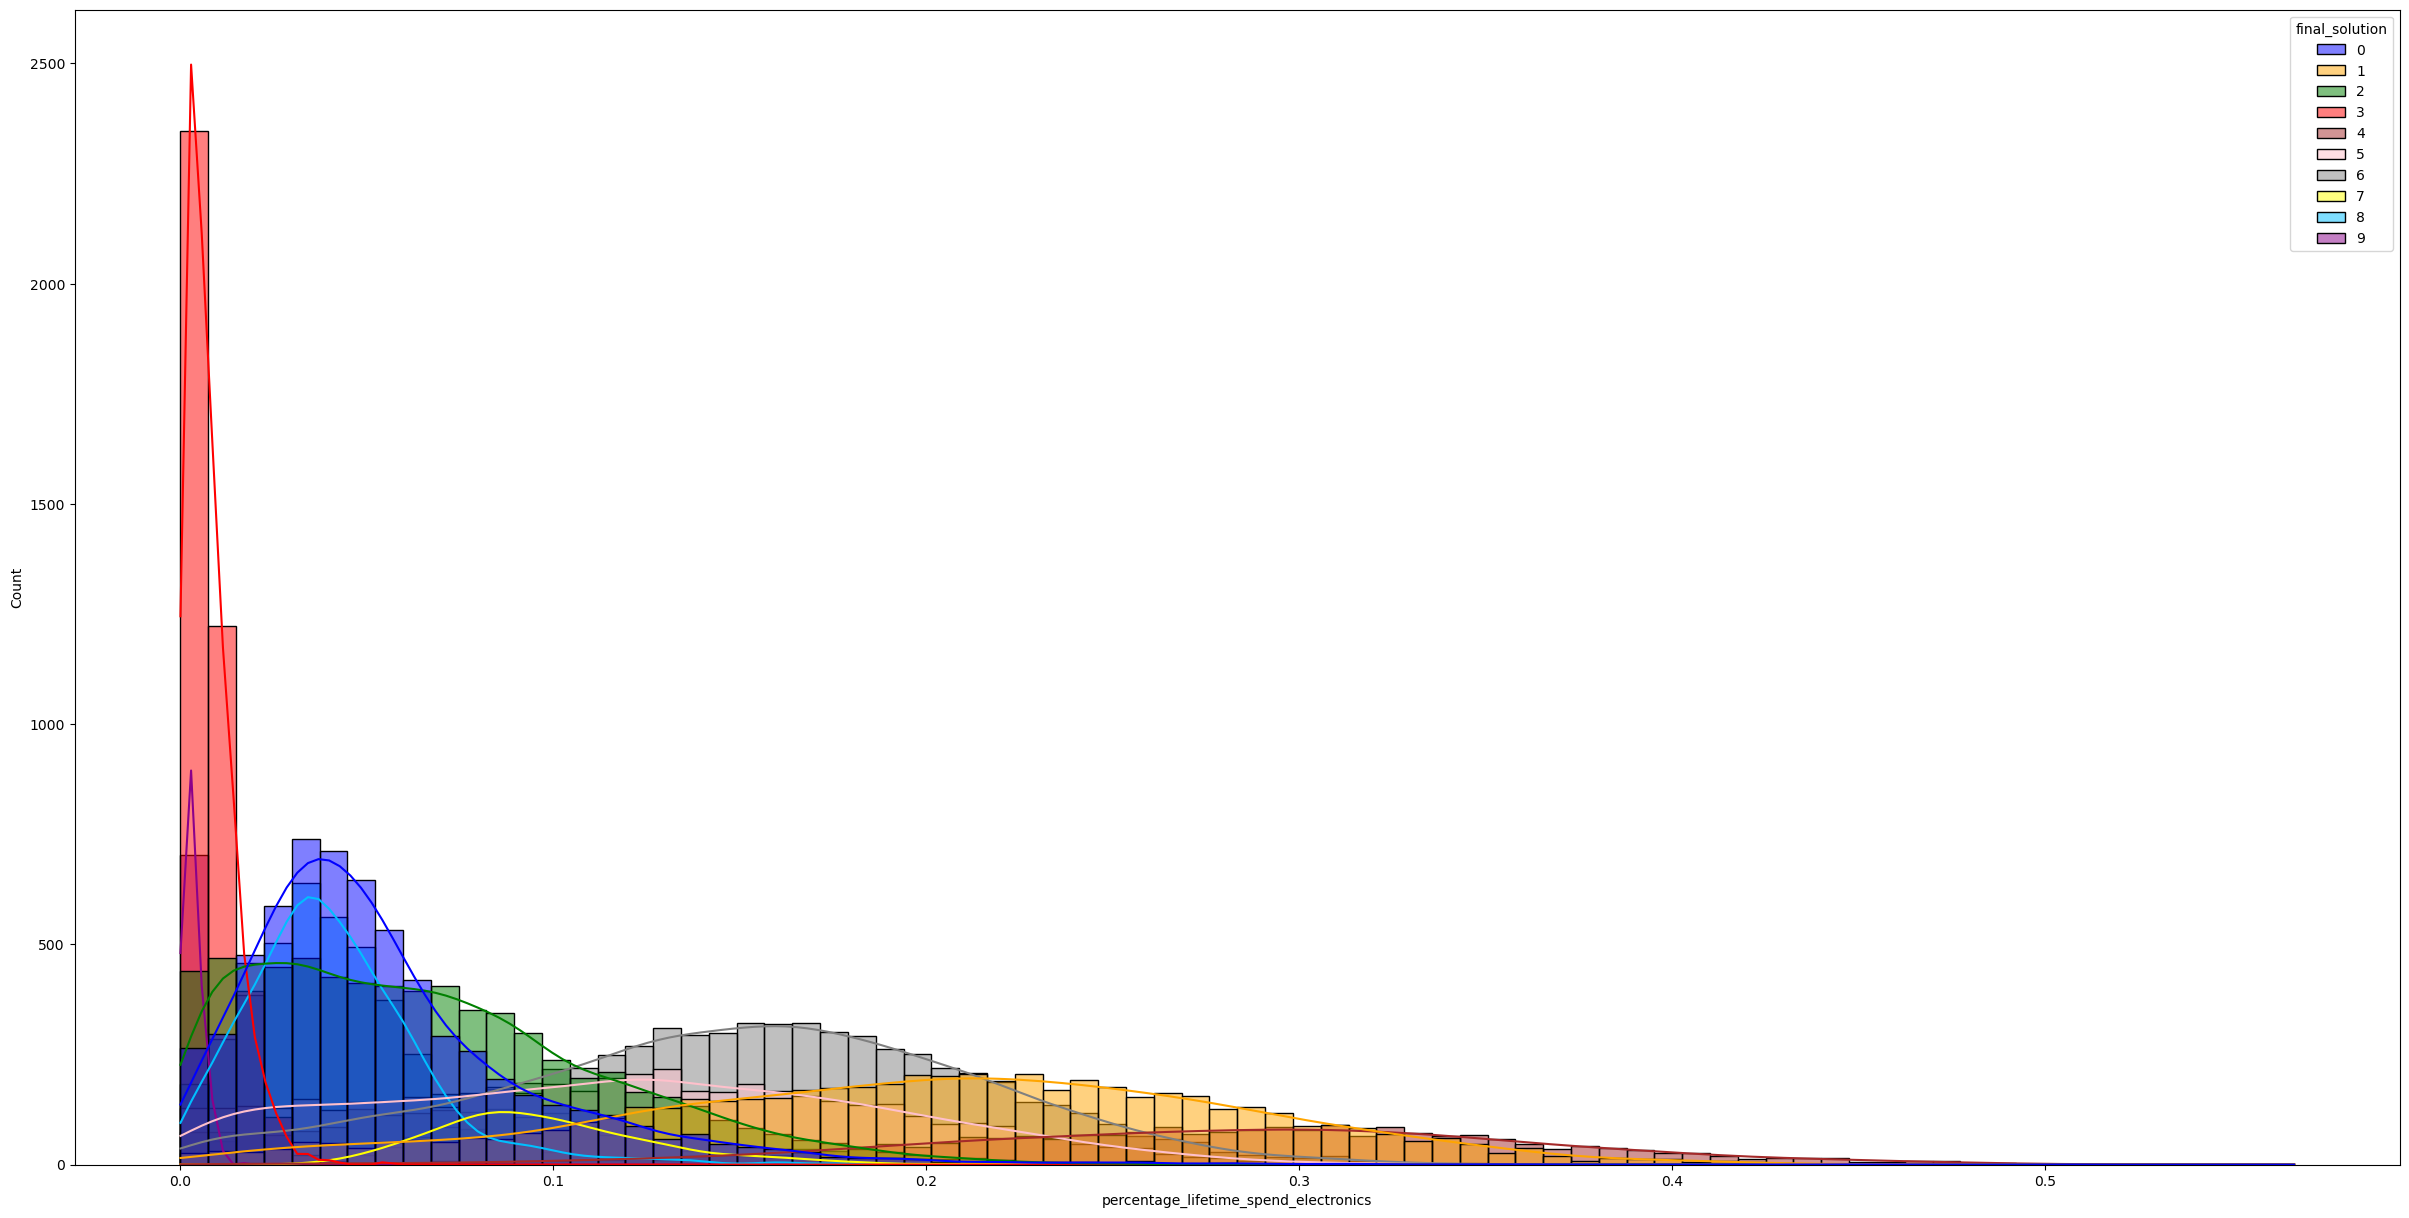

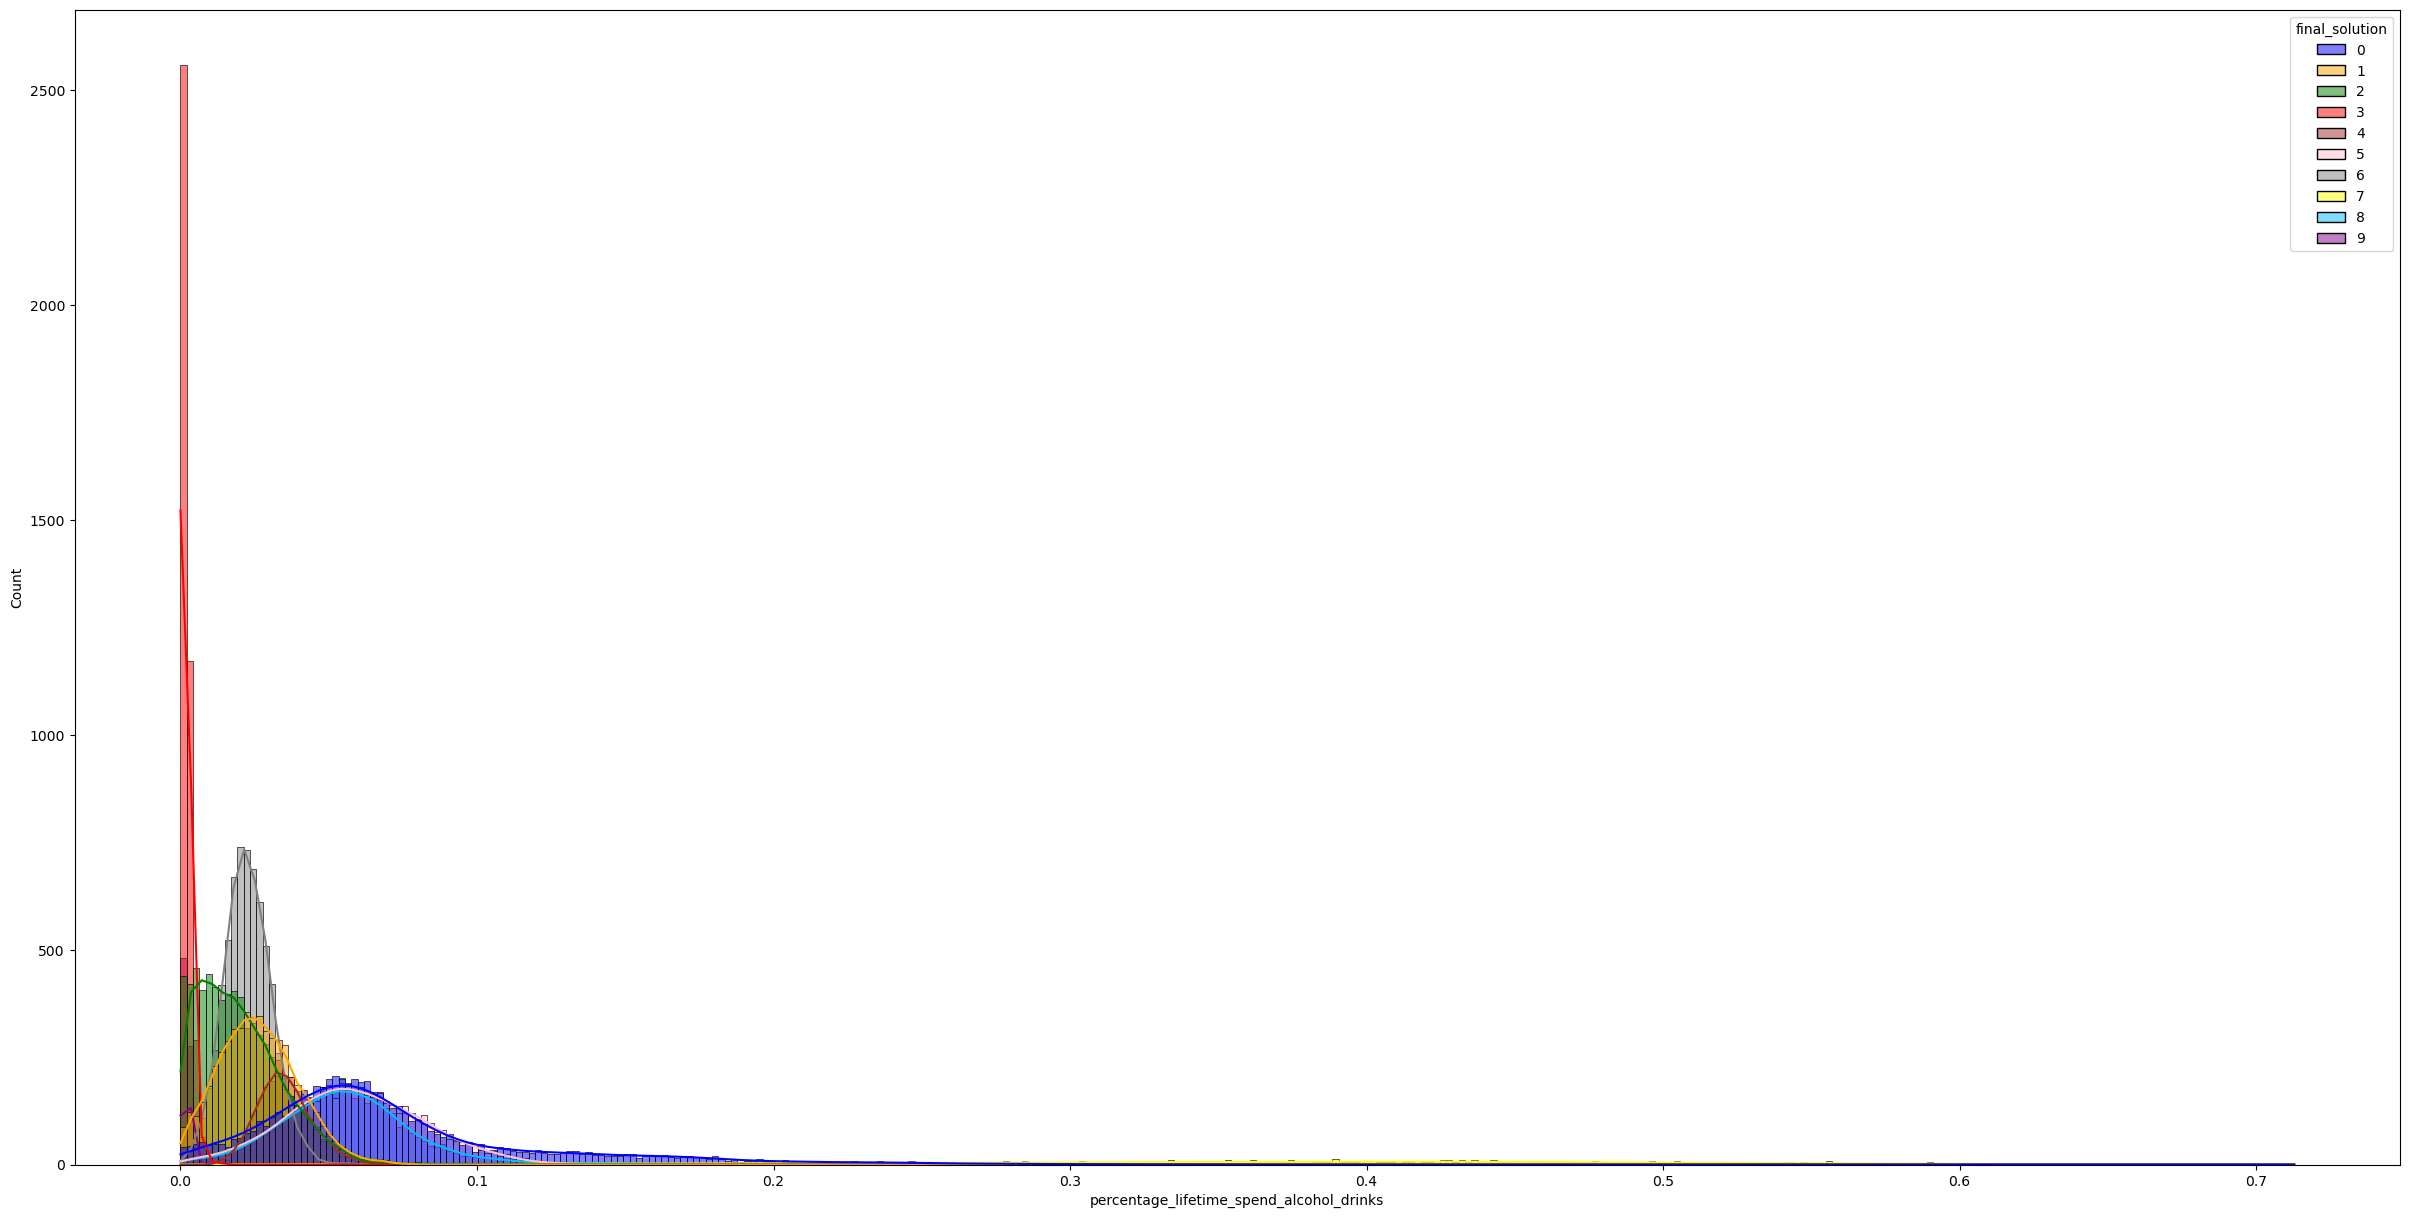

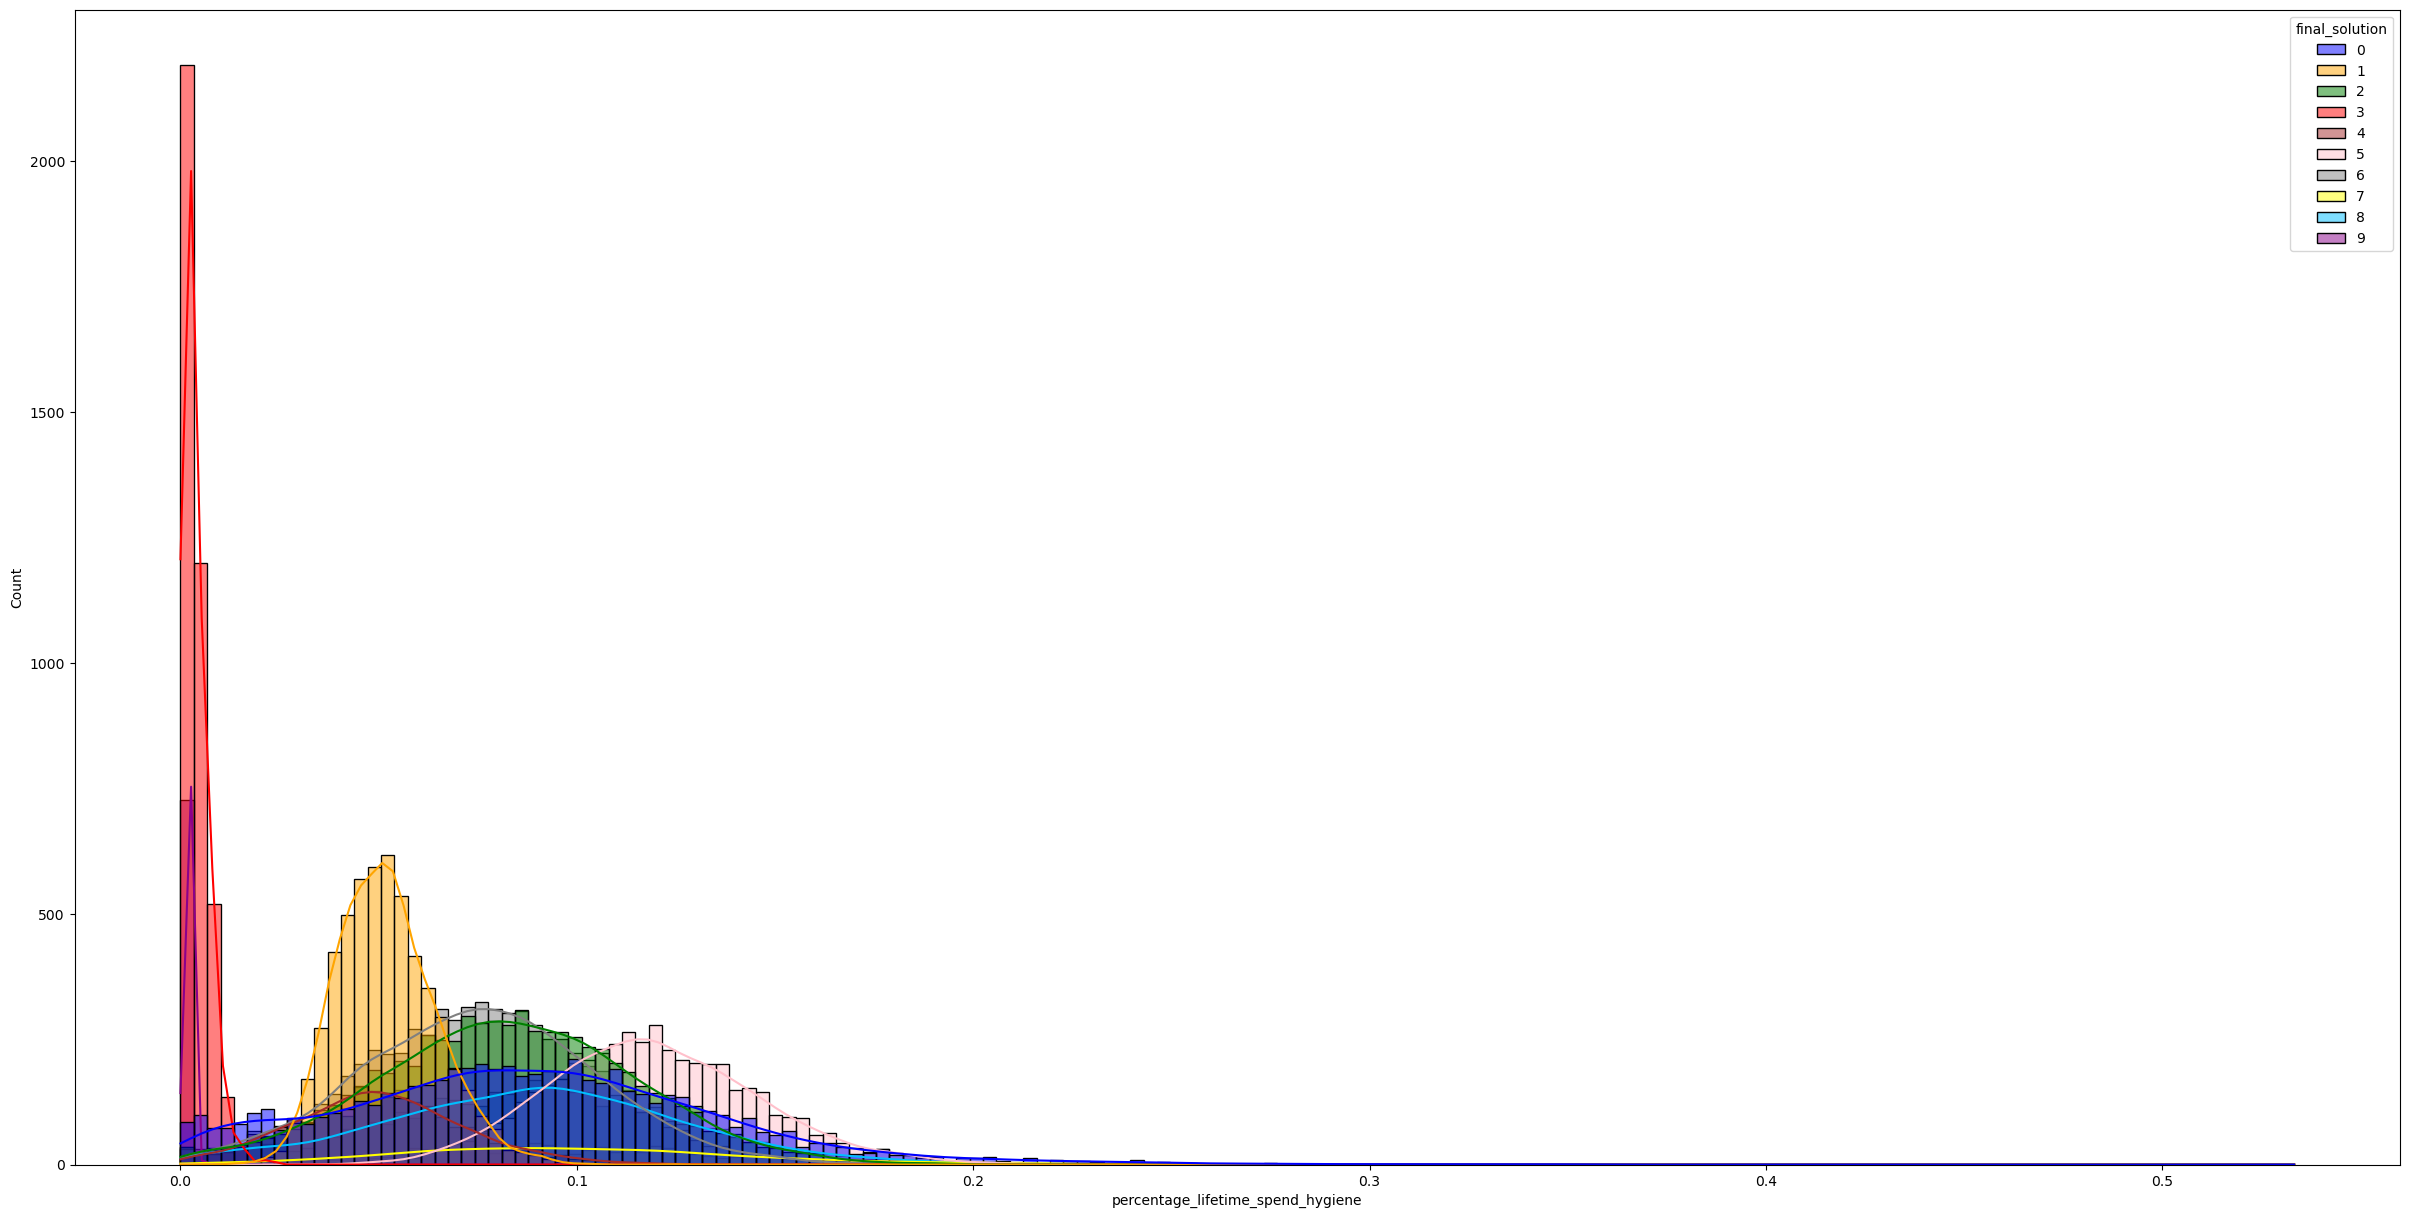

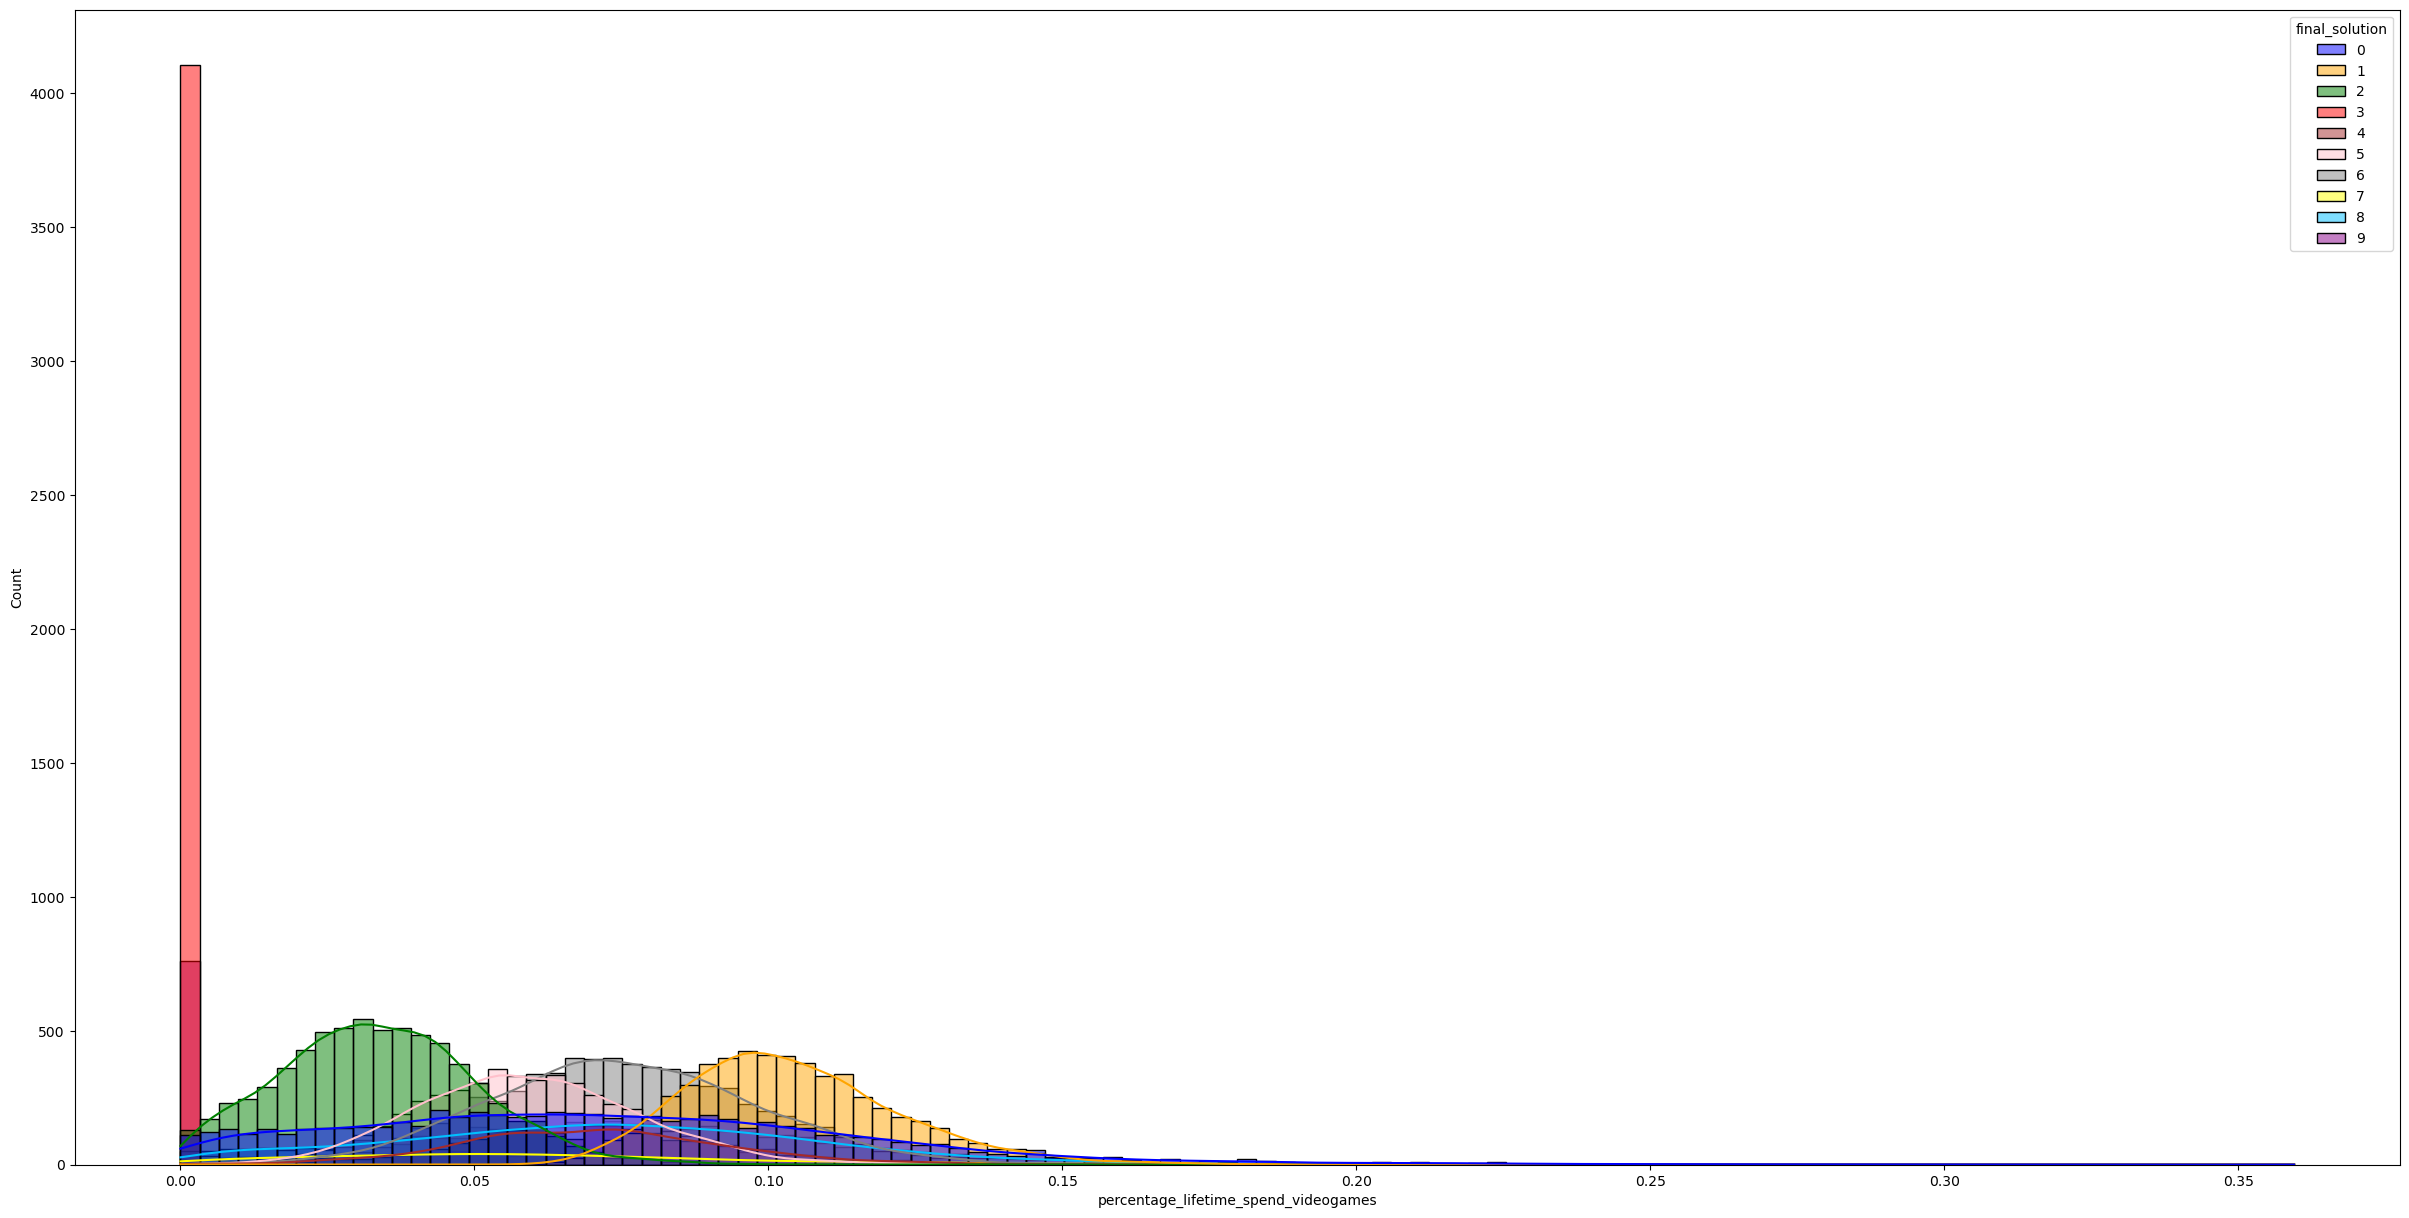

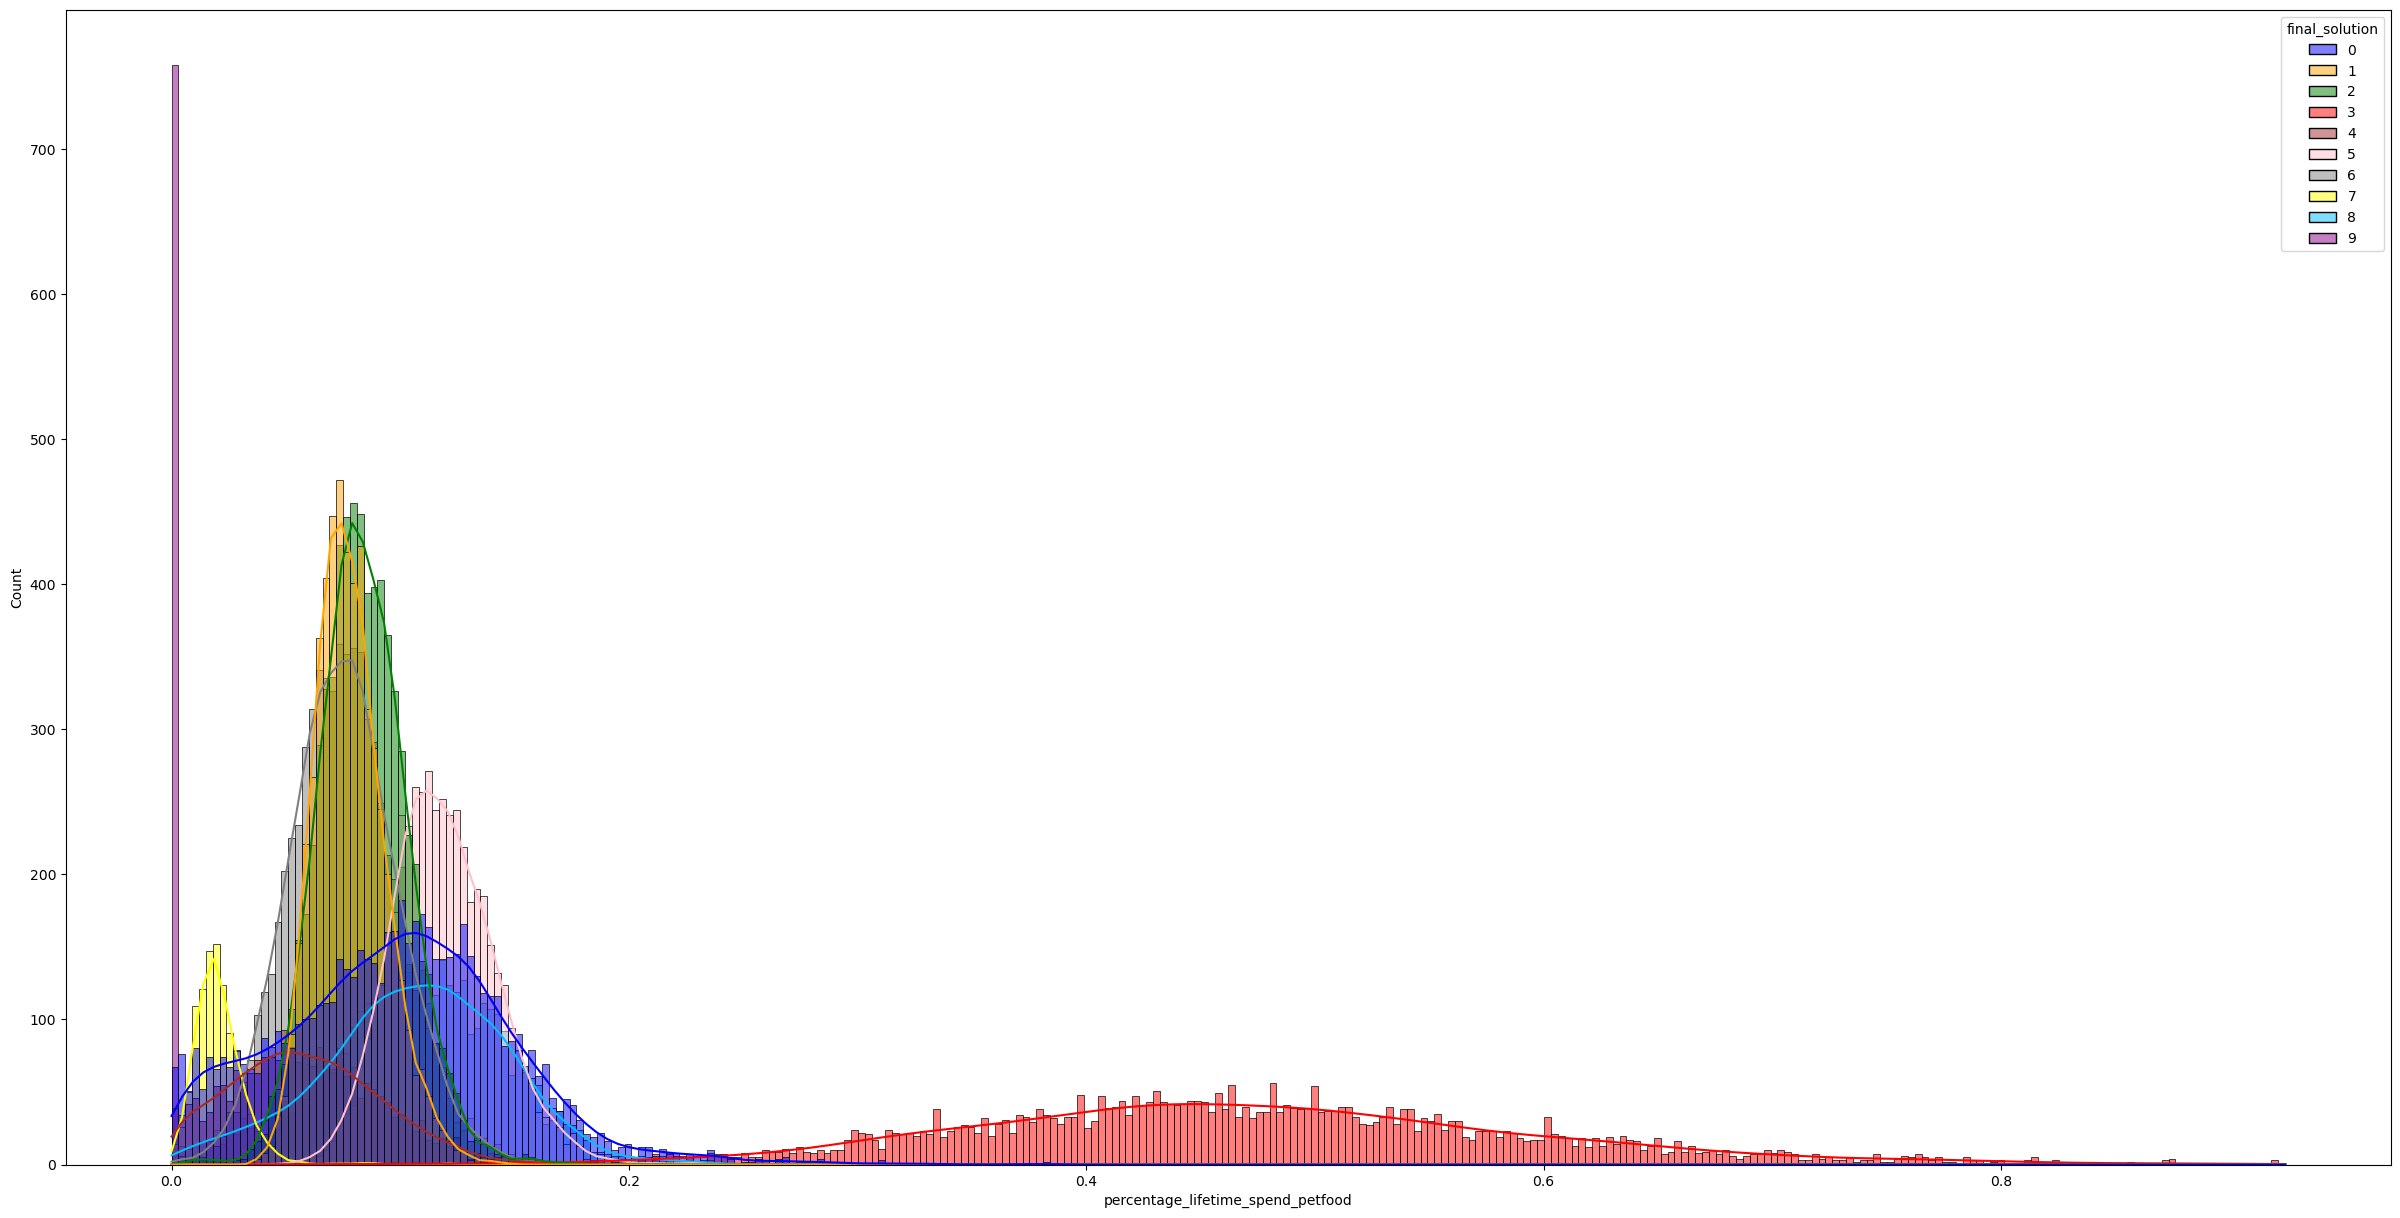

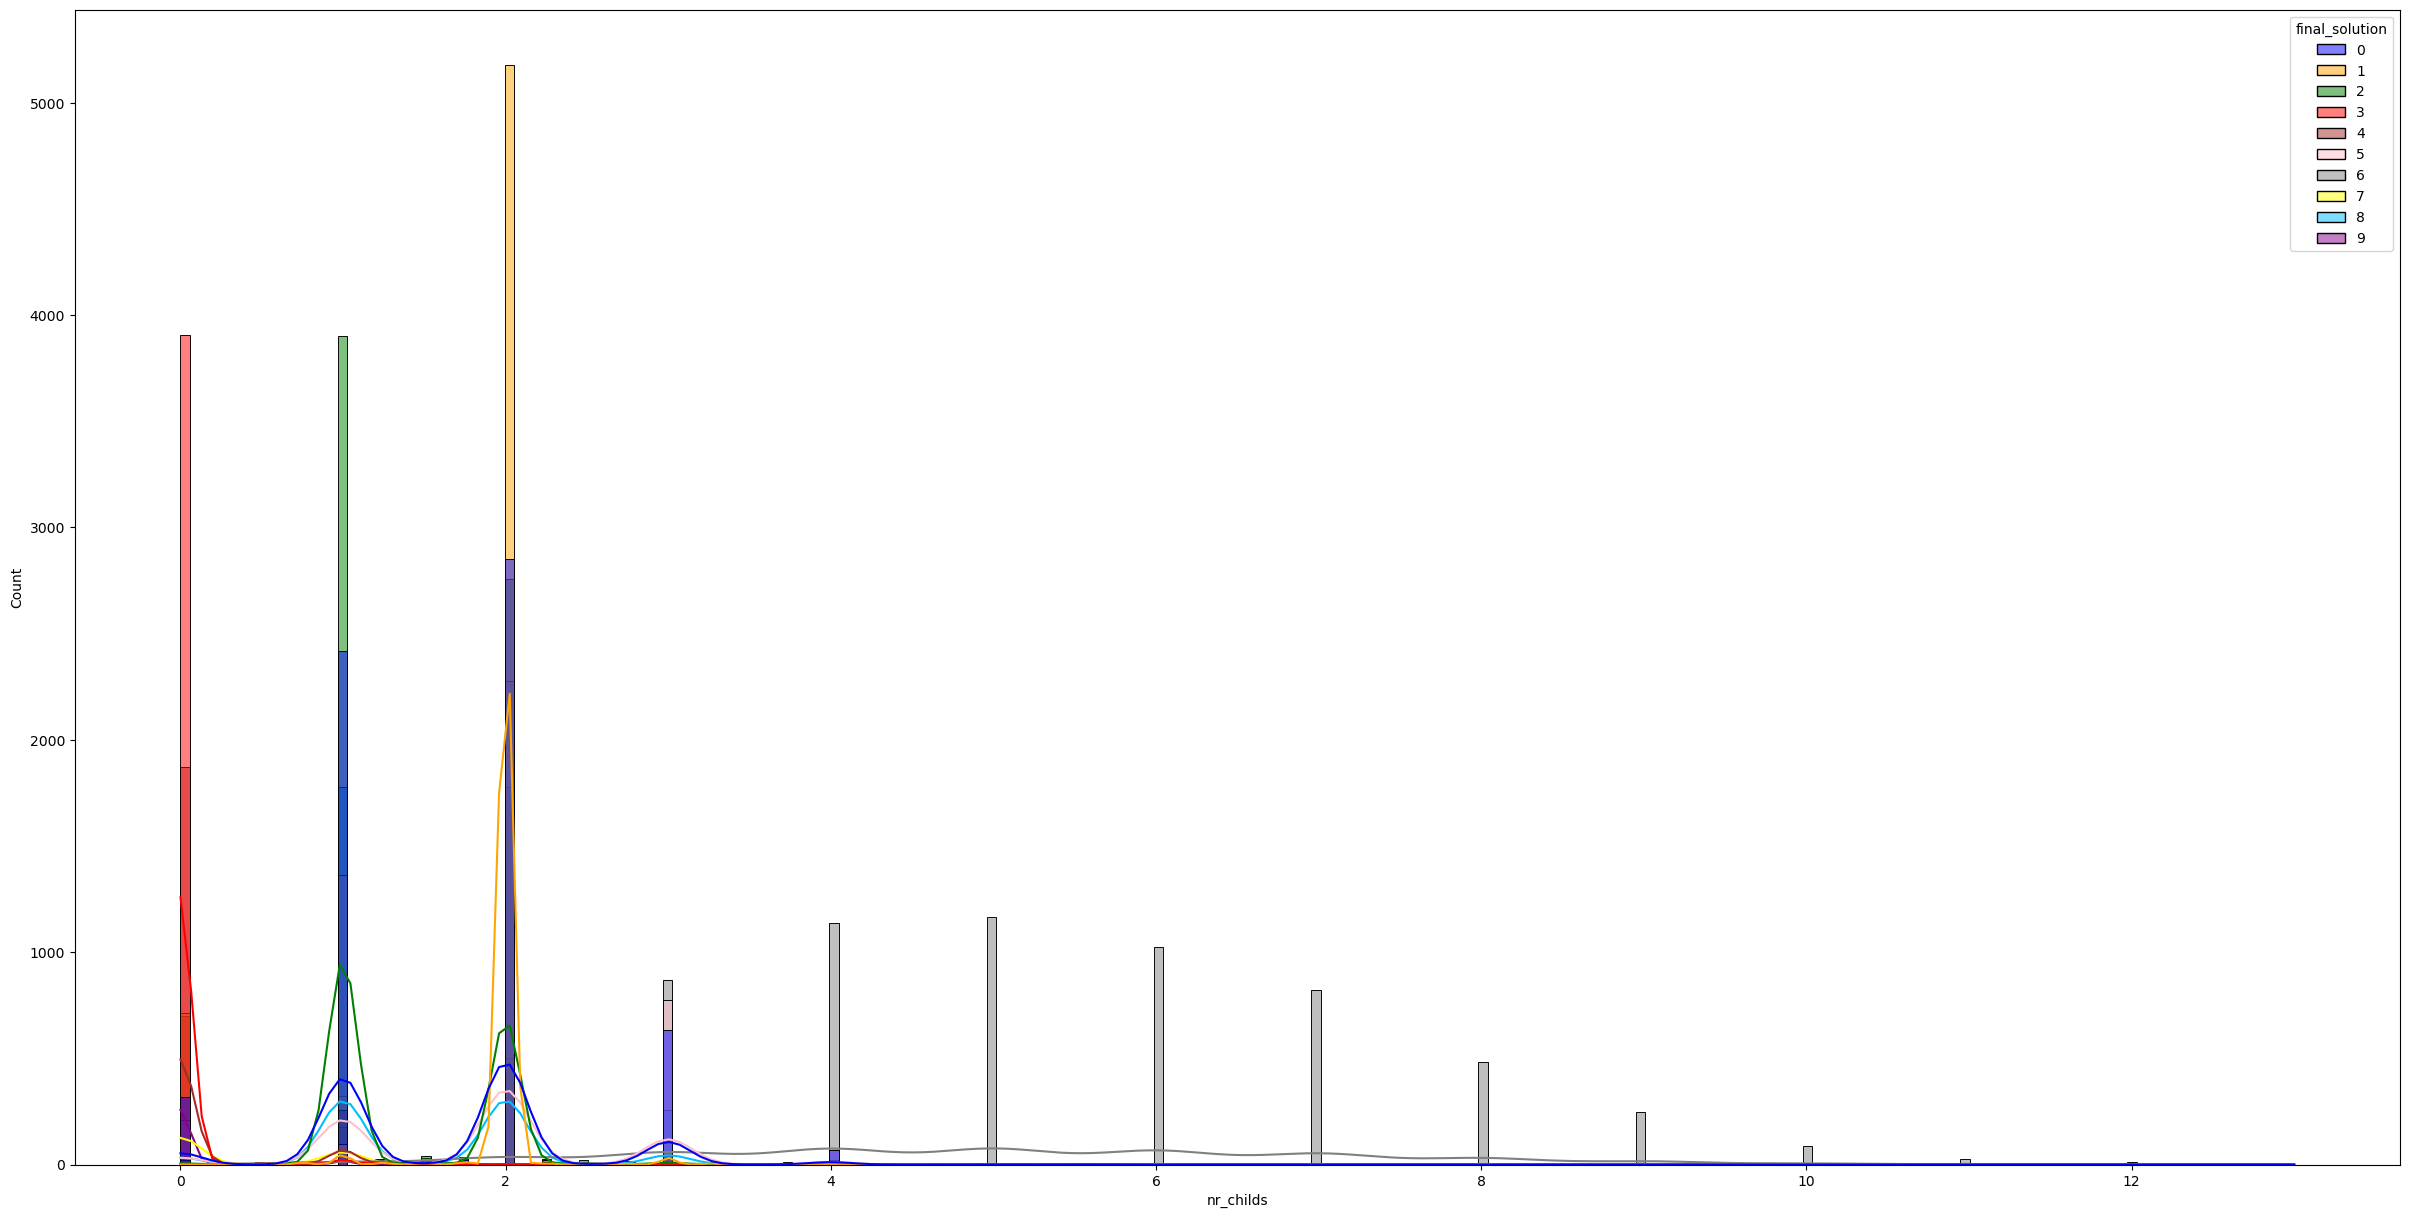

/var/folders/hb/v5rg6chx2rdc4kjf0p3sfwfc0000gn/T/ipykernel_95235/2673807878.py:7: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.histplot(merged_df.dropna(subset=[i]), x=i, hue='final_solution', kde=True, legend=True, palette=custom_palette)


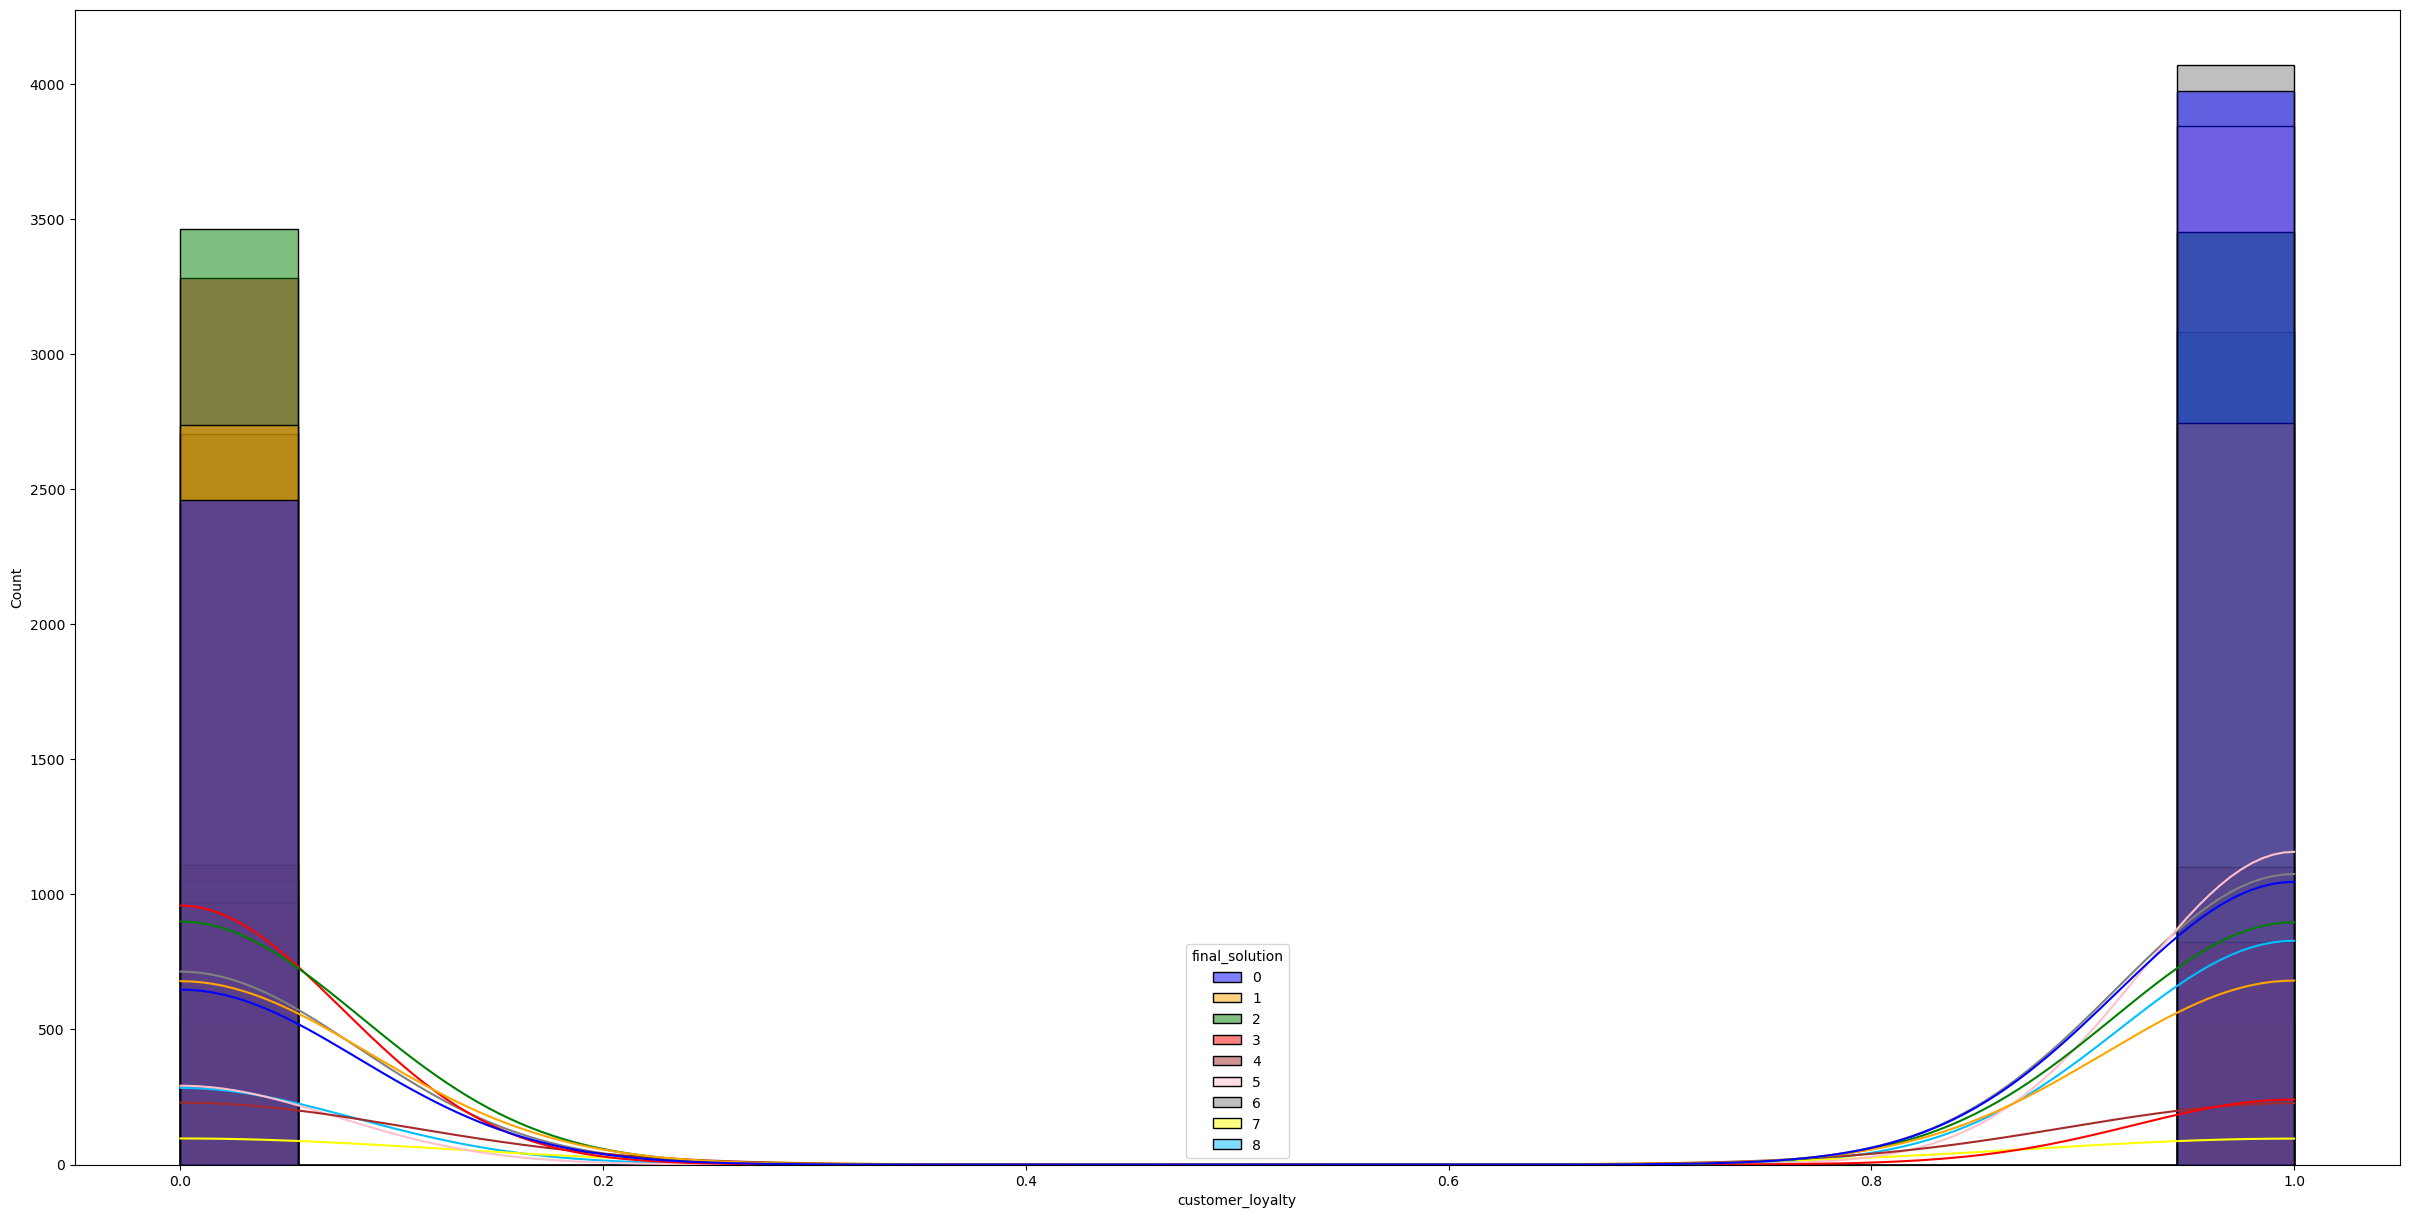

/var/folders/hb/v5rg6chx2rdc4kjf0p3sfwfc0000gn/T/ipykernel_95235/2673807878.py:7: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.histplot(merged_df.dropna(subset=[i]), x=i, hue='final_solution', kde=True, legend=True, palette=custom_palette)


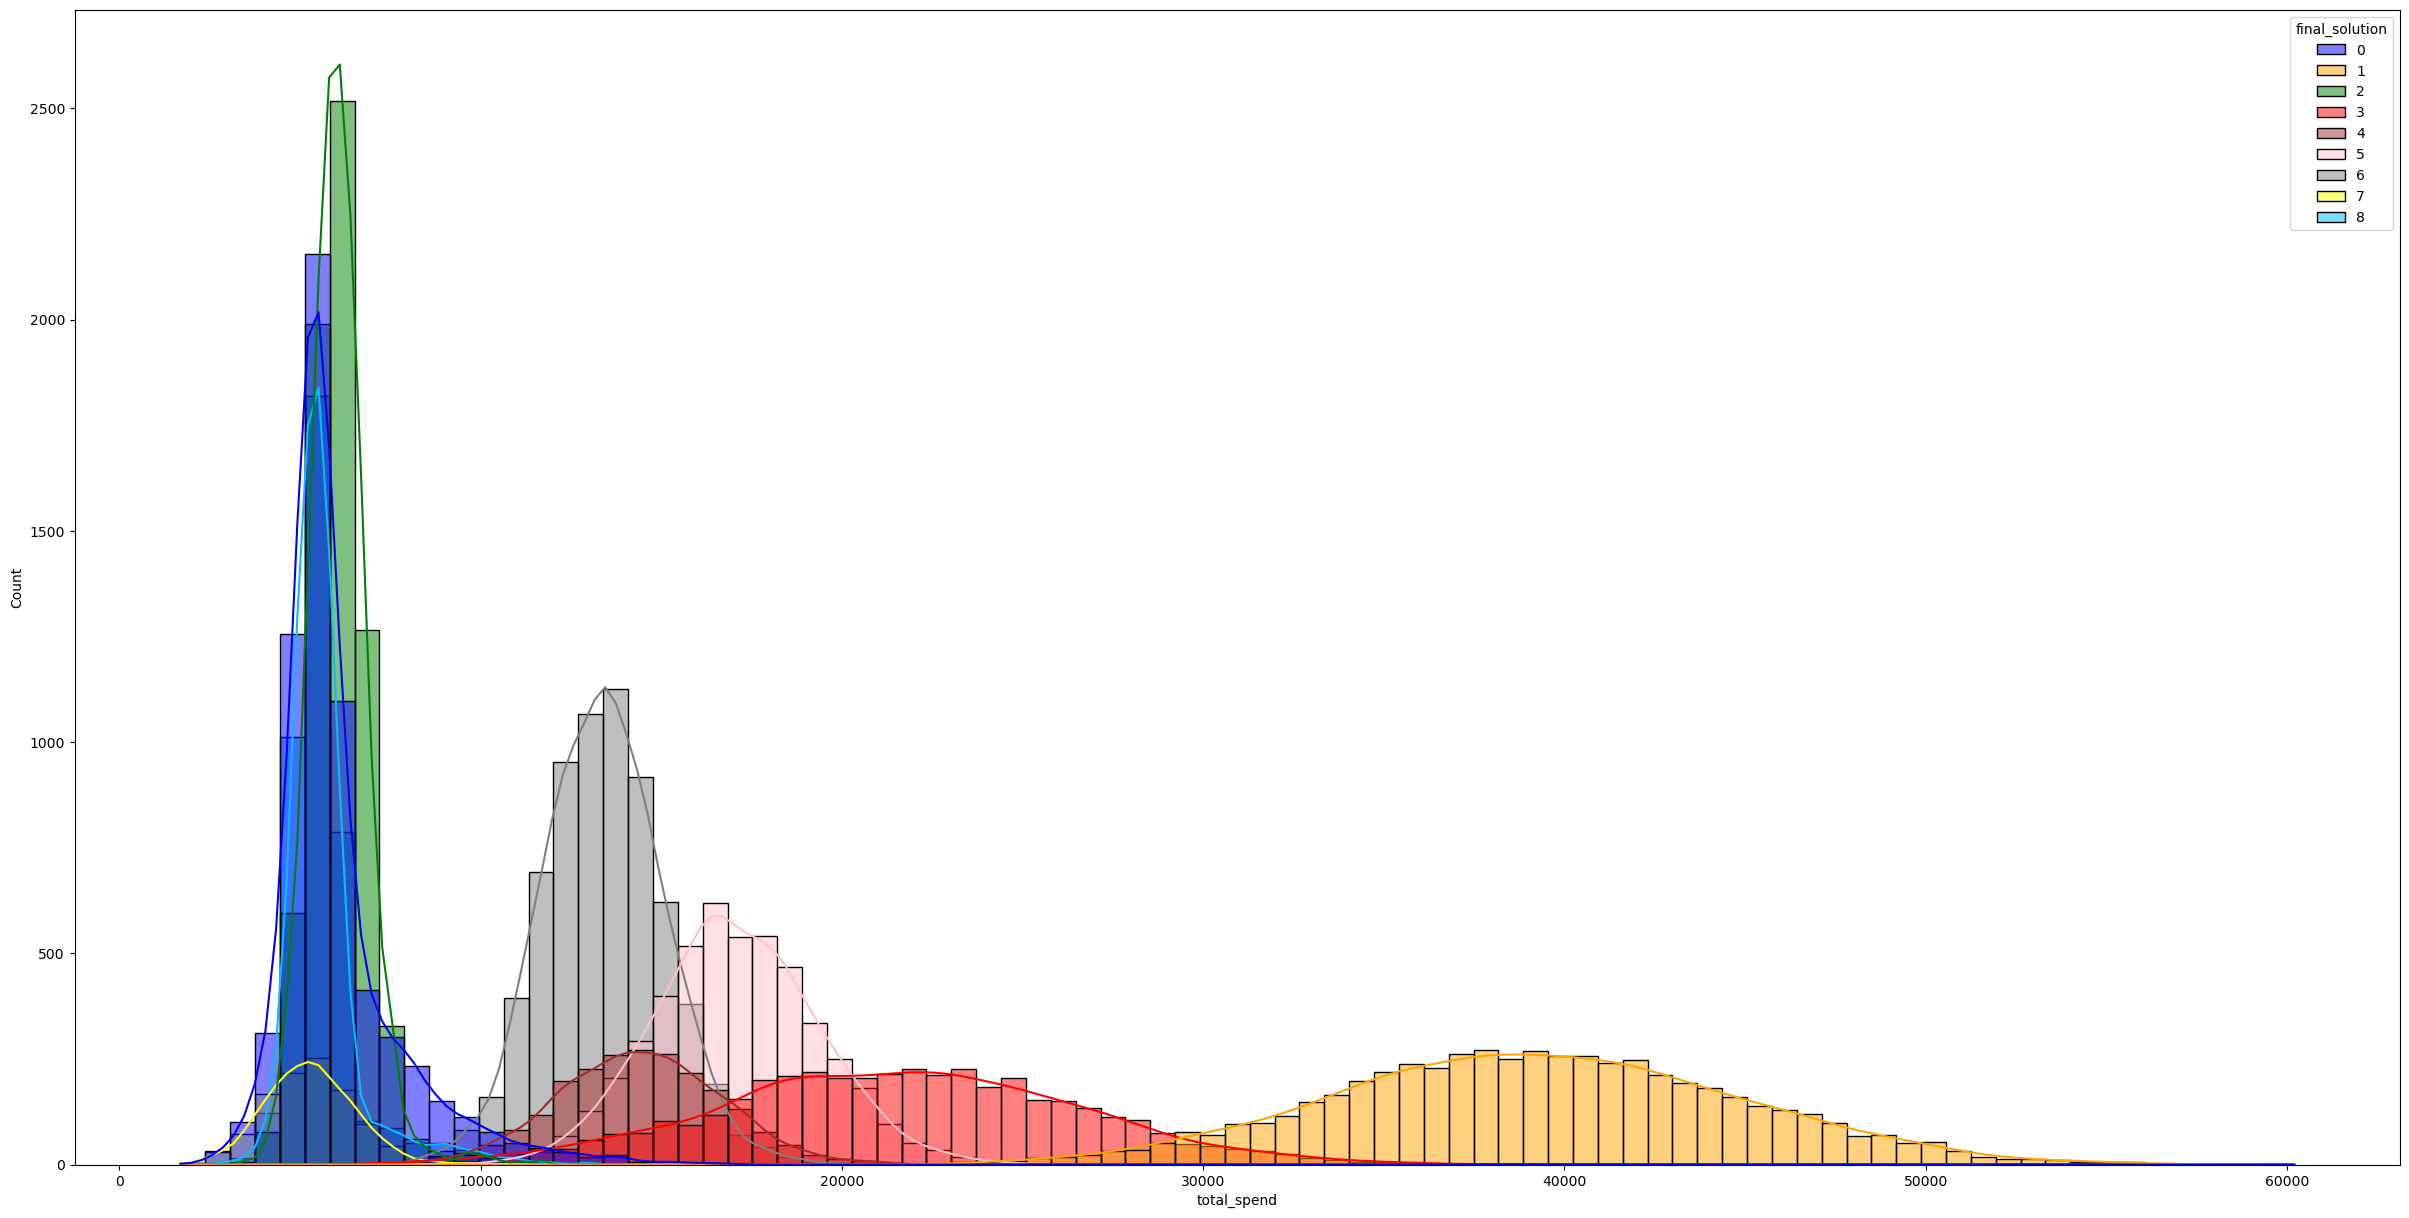

/var/folders/hb/v5rg6chx2rdc4kjf0p3sfwfc0000gn/T/ipykernel_95235/2673807878.py:7: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.histplot(merged_df.dropna(subset=[i]), x=i, hue='final_solution', kde=True, legend=True, palette=custom_palette)


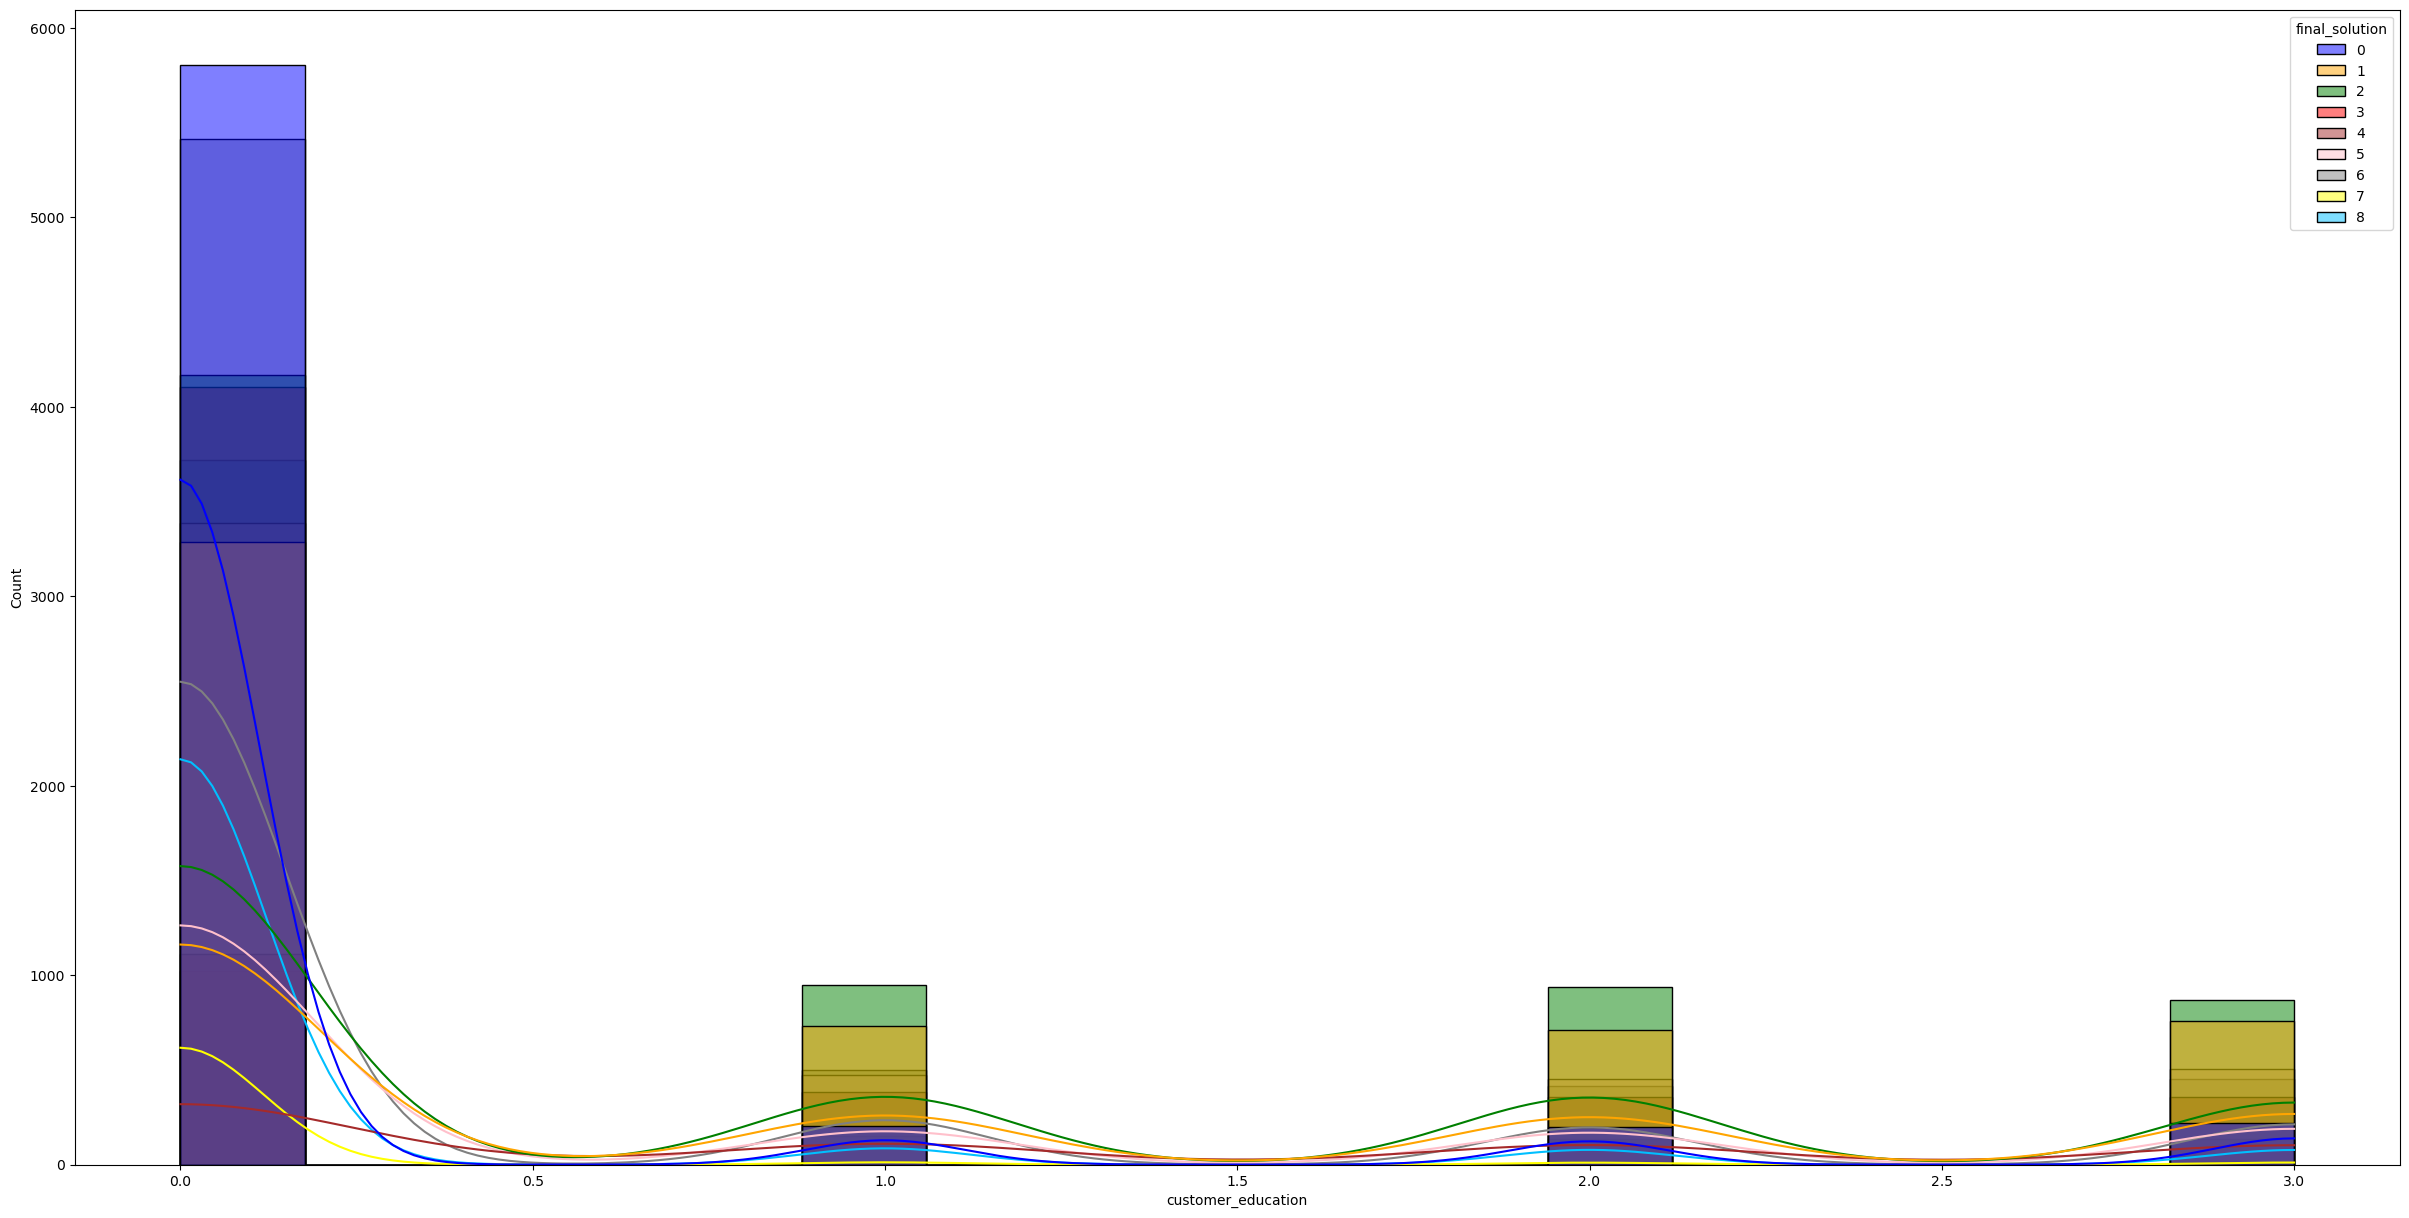

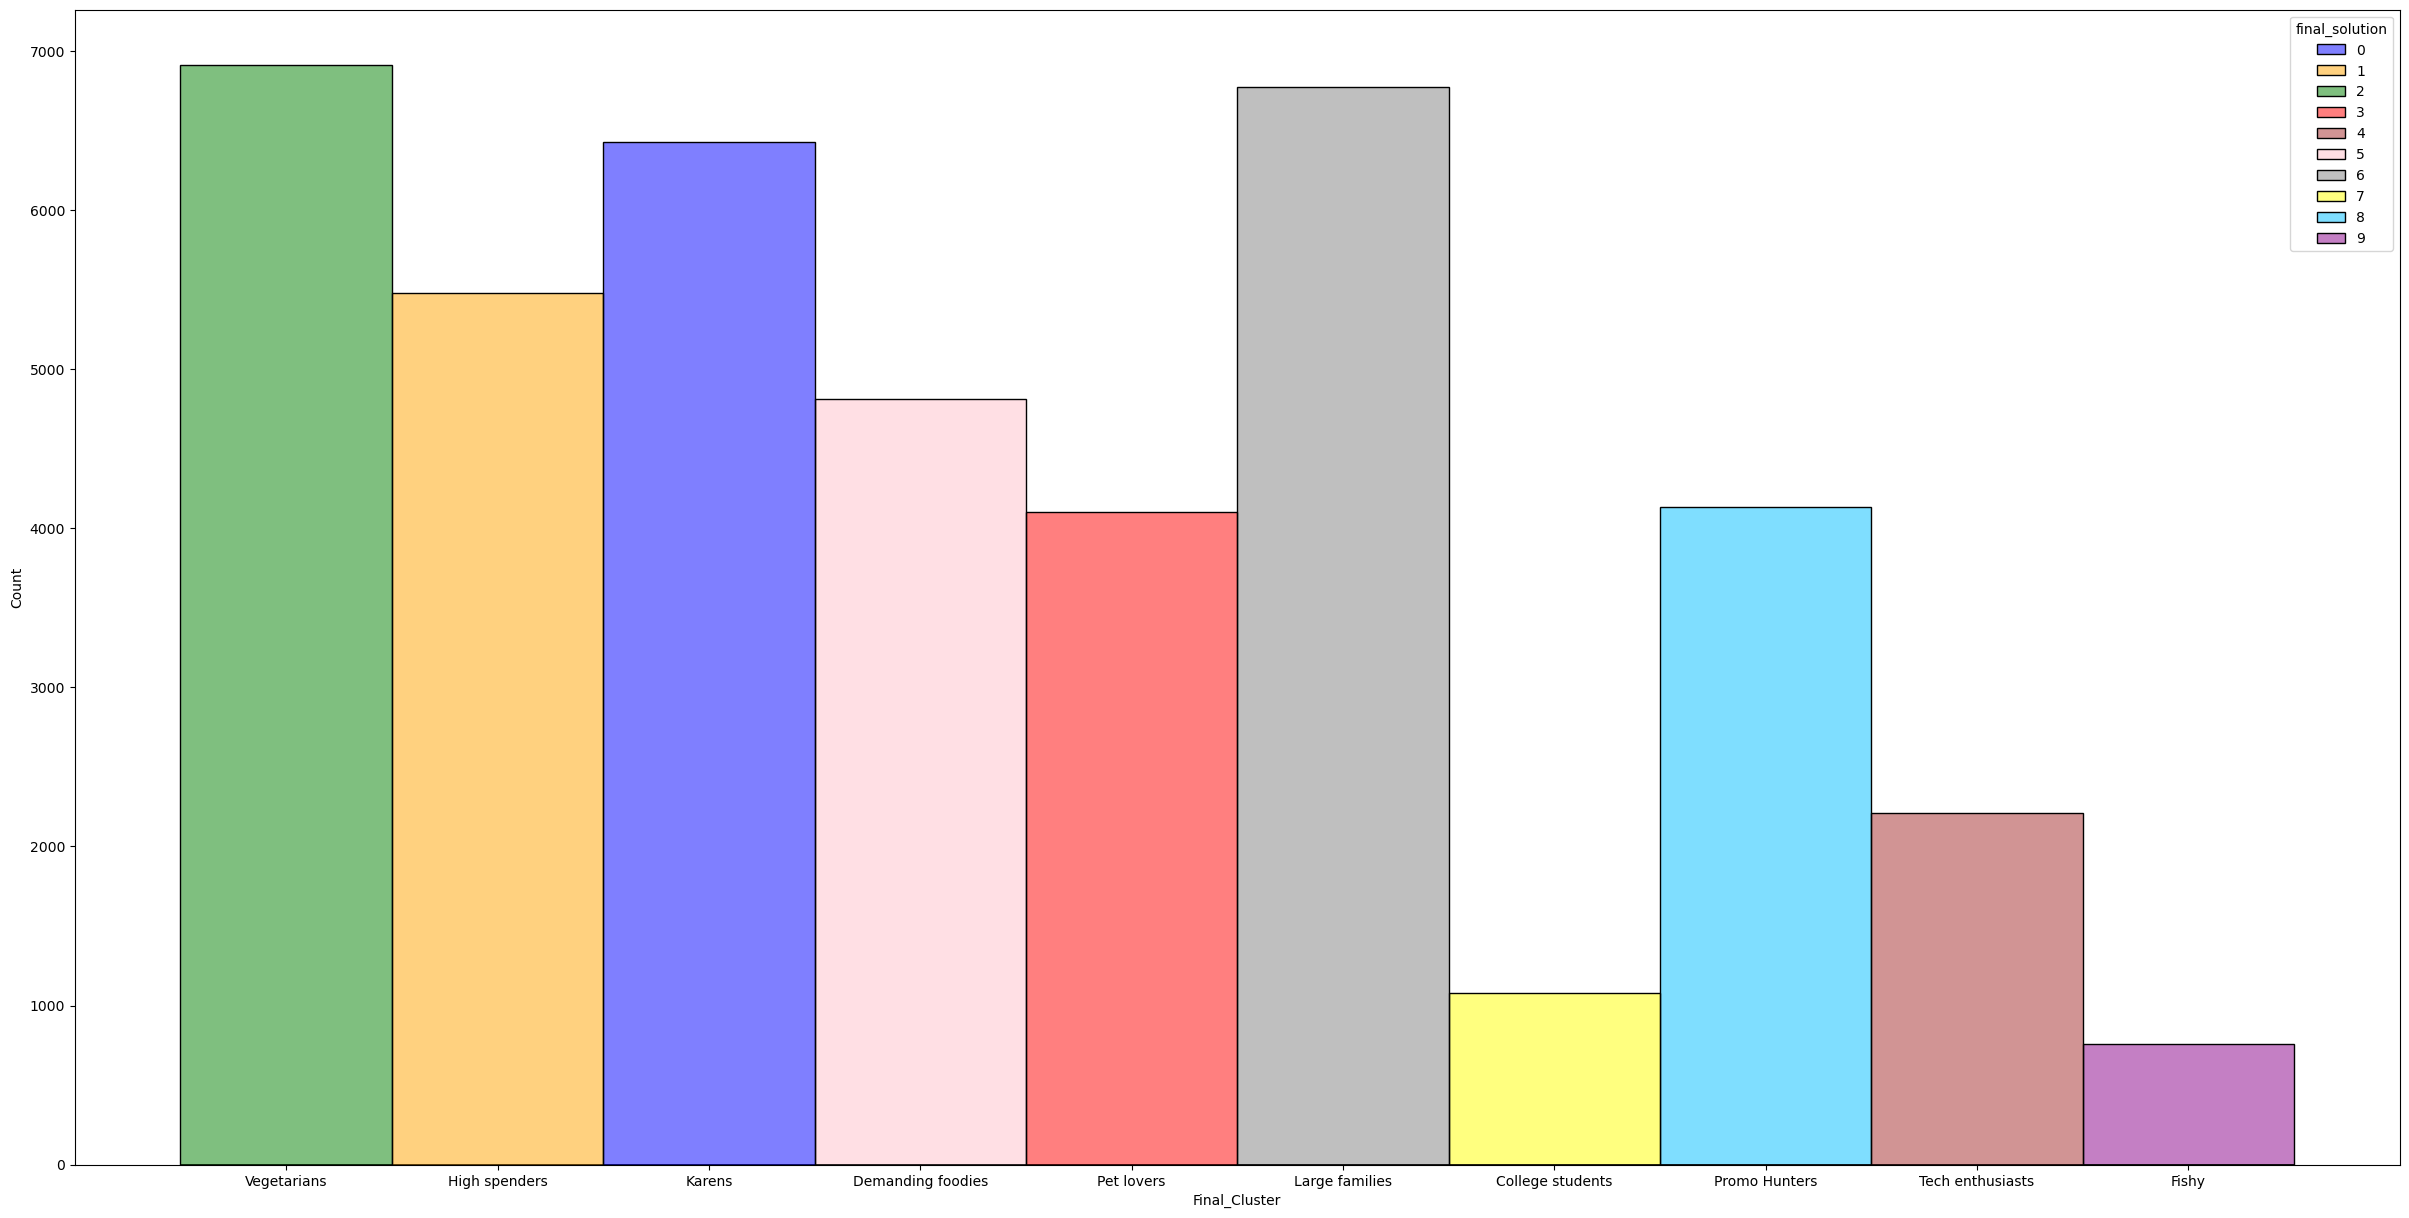

In [42]:
# Define custom color palette
custom_palette = ['blue', 'orange', 'green', 'red', 'brown', 'pink', 'grey','yellow','deepskyblue','darkmagenta']
# Set the palette in Seaborn
sns.set_palette(sns.color_palette(custom_palette))
# Using tqdm for progress bar
for i in tqdm(merged_df.drop(['final_solution','mm_ward9'], axis=1).columns):
    sns.histplot(merged_df.dropna(subset=[i]), x=i, hue='final_solution', kde=True, legend=True, palette=custom_palette)
    plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **Extracting the Data**

In [35]:
persons.reset_index(inplace=True)

In [36]:
customer_id_proposed_cluster = persons[['customer_id', 'Final_Cluster']]

In [41]:
#persons.to_csv("Data/persons_clustered.csv")
#customer_id_proposed_cluster.to_csv('customer_id_proposed_cluster.csv', index=False)